# Collatz 
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 7/17/19
- @University of Tulsa
- Description: An Exploration of the Collatz Conjecture

In [27]:
%matplotlib notebook
#imports
from NumLib import PlotUtil # see https://github.com/Michael-Naguib/NumLib       (side note: this has A LOT of big imports... be patient)
import numpy as np
import random
import math
import sys
import bisect
import tqdm
import multiprocessing as mp

## Collatz Value Cache:
- Stores the memoized values for memoized_collatz(n)
- **NOTE!** AS these values are saved between runs... if there is an error in the functions which place values in these... it may cause an improper value to be stored...
- **WARNING!** although these memoized versions have a benifit by not having to do as many computations if the path length is unique and exceeds python's max recursive depth they will error...

In [28]:
collatz_cache={}
collatz_sequences_cache={1:[1]}
collatz_sequence_length_cache={1:1,0:0}

## Collatz Functions:
- These are regular as well as memoized versions of functions that calculate: collatz of n, the sequence for n, as well as the sequence length for n

In [29]:
#Collatz function:
def collatz(n):
    r=n/2# more efficient than % edge case 0
    if r==n//2:
        return r
    else:
        return 3*n + 1

#Memoizes Collatz values computation:
def memoized_collatz(n):
    if n in collatz_cache:
        return collatz_cache[n]
    else:
        result = collatz(n)
        collatz_cache[n]=result
        return result

In [30]:
#The Collatz sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def collatz_sequence(n):
    all_nums = [n]   
    num = n
    while(num != 1):
        num = memoized_collatz(num)
        all_nums.append(int(num))
    return all_nums

#Memoizes Sequences .... sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def memoized_collatz_sequence(n):
    if n in collatz_sequences_cache:
        return collatz_sequences_cache[n]
    else:
        all_nums=[n]
        all_nums = all_nums + memoized_collatz_sequence(memoized_collatz(n))
        return all_nums
    
#Memoizes the sequence Length ... more memory efficient.... 
def memoized_collatz_sequence_length(n):
    if n in collatz_sequence_length_cache:
        return collatz_sequence_length_cache[n]
    else:
        result = 1+ memoized_collatz_sequence_length(memoized_collatz(n))
        collatz_sequence_length_cache[n] = result
        return result

## Generate a Plot of Path Length vs Number 

In [39]:
#Settings
NUM_OF_POINTS=1000000#int(math.pow(10,5))
#Create the x axis values
x = np.array(list(range(NUM_OF_POINTS)))
#What this does: maps a range same as the x axis to its path length then converts to a numpy array... tqdm logs progress...
y = np.array(list(map(lambda x : memoized_collatz_sequence_length(x),tqdm.tqdm(range(NUM_OF_POINTS)))))

100%|████████████████████████████| 1000000/1000000 [00:02<00:00, 431686.76it/s]


<IPython.core.display.Javascript object>


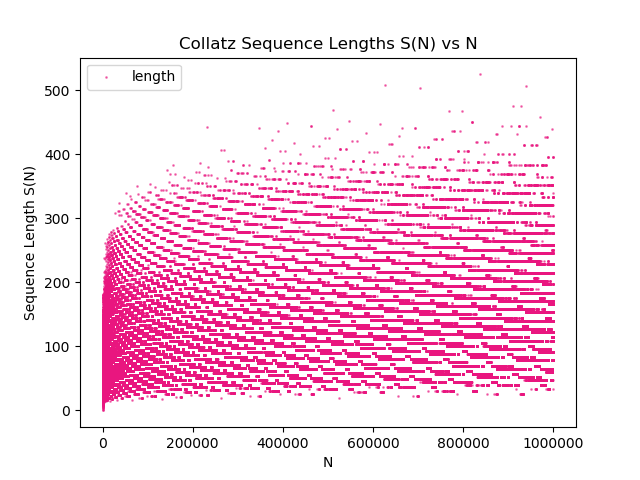

In [40]:
#Plot the Results
#pu = PlotUtil.PlotUtil([x,y])
#pu.interactive_plot()
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"length"},x_name="N", y_name="Sequence Length S(N)",title="Collatz Sequence Lengths S(N) vs N")

## Expiramentation
- I was curious as to what the collatz length for fibonacci numbers looked like graphically... 

In [46]:
#Settings
NUM_OF_POINTS=1000#int(math.pow(10,5))

#The Golden Ratio
phi = (1+math.sqrt(5))/2
#A Quick and easy way to calculate the Nth Fibonacci Number (binet's formula)
fib_n = lambda n: math.floor((math.pow(phi,n)-1/math.pow(0-phi,n))/math.sqrt(5))

#Define the Expirament Function: this will be passed the Input Domain
def expirament(n):
    f = fib_n(n)
    print("Fib: {0}".format(f))
    print("Sequence: {0}".format(memoized_collatz_sequence(f)))
    return memoized_collatz_sequence_length(fib_n(n))

#Create the x axis values
x_2 = np.array(list(range(1,NUM_OF_POINTS)))

#Map The Input Domain (recreated as a range) to te Output 
y_2 = np.array(list(map(expirament,range(1,NUM_OF_POINTS))))


Fib: 1
Sequence: [1]
Fib: 1
Sequence: [1]
Fib: 2
Sequence: [2, 1]
Fib: 3
Sequence: [3, 10, 5.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 5
Sequence: [5, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 8
Sequence: [8, 4.0, 2.0, 1]
Fib: 13
Sequence: [13, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 21
Sequence: [21, 64, 32.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 34
Sequence: [34, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 55
Sequence: [55, 166, 83.0, 250.0, 125.0, 376.0, 188.0, 94.0, 47.0, 142.0, 71.0, 214.0, 107.0, 322.0, 161.0, 484.0, 242.0, 121.0, 364.0, 182.0, 91.0, 274.0, 137.0, 412.0, 206.0, 103.0, 310.0, 155.0, 466.0, 233.0, 700.0, 350.0, 175.0, 526.0, 263.0, 790.0, 395.0, 1186.0, 593.0, 1780.0, 890.0, 445.0, 1336.0, 668.0, 334.0, 167.0, 502.0, 251.0, 754.0, 377.0, 1132.0, 566.0, 283.0, 850.0, 425.0, 1276.0, 638.0, 319.0, 958.0, 479.0, 1438.0, 719.0, 2158.0, 1079.0, 3238.0, 1619.0, 4858.0, 2429.0, 7288.0, 3644.0, 1822.0, 911.0, 2734.0, 1367.0, 4102.0, 2051.0, 6154.0, 3077.0, 9232

Sequence: [28657, 85972, 42986.0, 21493.0, 64480, 32240.0, 16120.0, 8060.0, 4030.0, 2015.0, 6046.0, 3023.0, 9070.0, 4535.0, 13606.0, 6803.0, 20410.0, 10205.0, 30616.0, 15308.0, 7654.0, 3827.0, 11482.0, 5741.0, 17224.0, 8612.0, 4306.0, 2153.0, 6460.0, 3230.0, 1615.0, 4846.0, 2423.0, 7270.0, 3635.0, 10906.0, 5453.0, 16360.0, 8180.0, 4090.0, 2045.0, 6136.0, 3068.0, 1534.0, 767.0, 2302.0, 1151.0, 3454.0, 1727.0, 5182.0, 2591.0, 7774.0, 3887.0, 11662.0, 5831.0, 17494.0, 8747.0, 26242.0, 13121.0, 39364.0, 19682.0, 9841.0, 29524.0, 14762.0, 7381.0, 22144.0, 11072.0, 5536.0, 2768.0, 1384.0, 692.0, 346.0, 173.0, 520.0, 260.0, 130.0, 65.0, 196.0, 98.0, 49.0, 148.0, 74.0, 37.0, 112, 56.0, 28.0, 14.0, 7.0, 22, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 46368
Sequence: [46368, 23184.0, 11592.0, 5796.0, 2898.0, 1449.0, 4348, 2174.0, 1087.0, 3262, 1631.0, 4894.0, 2447.0, 7342.0, 3671.0, 11014.0, 5507.0, 16522.0, 8261.0, 24784.0, 12392.0, 6196.0, 3098.0, 15

Sequence: [832040, 416020.0, 208010.0, 104005.0, 312016, 156008.0, 78004.0, 39002.0, 19501.0, 58504, 29252.0, 14626.0, 7313.0, 21940.0, 10970.0, 5485.0, 16456.0, 8228.0, 4114.0, 2057.0, 6172.0, 3086.0, 1543.0, 4630.0, 2315.0, 6946.0, 3473.0, 10420.0, 5210.0, 2605.0, 7816.0, 3908.0, 1954.0, 977.0, 2932.0, 1466.0, 733.0, 2200.0, 1100.0, 550.0, 275.0, 826.0, 413.0, 1240.0, 620.0, 310.0, 155.0, 466.0, 233.0, 700.0, 350.0, 175.0, 526.0, 263.0, 790.0, 395.0, 1186.0, 593.0, 1780.0, 890.0, 445.0, 1336.0, 668.0, 334.0, 167.0, 502.0, 251.0, 754.0, 377.0, 1132.0, 566.0, 283.0, 850.0, 425.0, 1276.0, 638.0, 319.0, 958.0, 479.0, 1438.0, 719.0, 2158.0, 1079.0, 3238.0, 1619.0, 4858.0, 2429.0, 7288.0, 3644.0, 1822.0, 911.0, 2734.0, 1367.0, 4102.0, 2051.0, 6154.0, 3077.0, 9232.0, 4616.0, 2308.0, 1154.0, 577.0, 1732.0, 866.0, 433.0, 1300.0, 650.0, 325.0, 976.0, 488.0, 244.0, 122.0, 61.0, 184.0, 92.0, 46.0, 23.0, 70.0, 35.0, 106.0, 53.0, 160.0, 80.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 134

Sequence: [14930352, 7465176.0, 3732588.0, 1866294.0, 933147.0, 2799442, 1399721.0, 4199164.0, 2099582.0, 1049791.0, 3149374.0, 1574687.0, 4724062.0, 2362031.0, 7086094.0, 3543047.0, 10629142.0, 5314571.0, 15943714.0, 7971857.0, 23915572.0, 11957786.0, 5978893.0, 17936680.0, 8968340.0, 4484170.0, 2242085.0, 6726256.0, 3363128.0, 1681564.0, 840782.0, 420391.0, 1261174, 630587.0, 1891762.0, 945881.0, 2837644.0, 1418822.0, 709411.0, 2128234.0, 1064117.0, 3192352.0, 1596176.0, 798088.0, 399044.0, 199522.0, 99761.0, 299284.0, 149642.0, 74821.0, 224464.0, 112232.0, 56116.0, 28058.0, 14029.0, 42088.0, 21044.0, 10522.0, 5261.0, 15784.0, 7892.0, 3946.0, 1973.0, 5920.0, 2960.0, 1480.0, 740.0, 370.0, 185.0, 556.0, 278.0, 139.0, 418.0, 209.0, 628.0, 314.0, 157.0, 472.0, 236.0, 118.0, 59.0, 178.0, 89.0, 268.0, 134.0, 67.0, 202.0, 101.0, 304.0, 152.0, 76.0, 38.0, 19.0, 58, 29.0, 88.0, 44.0, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1]
Fib: 24157817
Sequenc

Sequence: [102334155, 307002466, 153501233.0, 460503700.0, 230251850.0, 115125925.0, 345377776.0, 172688888.0, 86344444.0, 43172222.0, 21586111.0, 64758334.0, 32379167.0, 97137502.0, 48568751.0, 145706254.0, 72853127.0, 218559382.0, 109279691.0, 327839074.0, 163919537.0, 491758612.0, 245879306.0, 122939653.0, 368818960.0, 184409480.0, 92204740.0, 46102370.0, 23051185.0, 69153556.0, 34576778.0, 17288389.0, 51865168.0, 25932584.0, 12966292.0, 6483146.0, 3241573.0, 9724720.0, 4862360.0, 2431180.0, 1215590.0, 607795.0, 1823386, 911693.0, 2735080.0, 1367540.0, 683770.0, 341885.0, 1025656.0, 512828.0, 256414.0, 128207.0, 384622.0, 192311.0, 576934.0, 288467.0, 865402.0, 432701.0, 1298104.0, 649052.0, 324526.0, 162263.0, 486790.0, 243395.0, 730186.0, 365093.0, 1095280.0, 547640.0, 273820.0, 136910.0, 68455.0, 205366.0, 102683.0, 308050.0, 154025.0, 462076.0, 231038.0, 115519.0, 346558.0, 173279.0, 519838.0, 259919.0, 779758.0, 389879.0, 1169638.0, 584819.0, 1754458.0, 877229.0, 2631688.0, 131

Sequence: [433494437, 1300483312, 650241656.0, 325120828.0, 162560414.0, 81280207.0, 243840622.0, 121920311.0, 365760934.0, 182880467.0, 548641402.0, 274320701.0, 822962104.0, 411481052.0, 205740526.0, 102870263.0, 308610790.0, 154305395.0, 462916186.0, 231458093.0, 694374280.0, 347187140.0, 173593570.0, 86796785.0, 260390356.0, 130195178.0, 65097589.0, 195292768.0, 97646384.0, 48823192.0, 24411596.0, 12205798.0, 6102899.0, 18308698.0, 9154349.0, 27463048.0, 13731524.0, 6865762.0, 3432881.0, 10298644.0, 5149322.0, 2574661.0, 7723984.0, 3861992.0, 1930996.0, 965498.0, 482749.0, 1448248, 724124.0, 362062.0, 181031.0, 543094.0, 271547.0, 814642.0, 407321.0, 1221964.0, 610982.0, 305491.0, 916474.0, 458237.0, 1374712.0, 687356.0, 343678.0, 171839.0, 515518.0, 257759.0, 773278.0, 386639.0, 1159918.0, 579959.0, 1739878.0, 869939.0, 2609818.0, 1304909.0, 3914728.0, 1957364.0, 978682.0, 489341.0, 1468024.0, 734012.0, 367006.0, 183503.0, 550510.0, 275255.0, 825766.0, 412883.0, 1238650.0, 619325.

Sequence: [1836311903, 5508935710, 2754467855.0, 8263403566.0, 4131701783.0, 12395105350.0, 6197552675.0, 18592658026.0, 9296329013.0, 27888987040.0, 13944493520.0, 6972246760.0, 3486123380.0, 1743061690.0, 871530845.0, 2614592536.0, 1307296268.0, 653648134.0, 326824067.0, 980472202.0, 490236101.0, 1470708304.0, 735354152.0, 367677076.0, 183838538.0, 91919269.0, 275757808.0, 137878904.0, 68939452.0, 34469726.0, 17234863.0, 51704590.0, 25852295.0, 77556886.0, 38778443.0, 116335330.0, 58167665.0, 174502996.0, 87251498.0, 43625749.0, 130877248.0, 65438624.0, 32719312.0, 16359656.0, 8179828.0, 4089914.0, 2044957.0, 6134872.0, 3067436.0, 1533718.0, 766859.0, 2300578.0, 1150289.0, 3450868.0, 1725434.0, 862717.0, 2588152.0, 1294076.0, 647038.0, 323519.0, 970558.0, 485279.0, 1455838.0, 727919.0, 2183758.0, 1091879.0, 3275638.0, 1637819.0, 4913458.0, 2456729.0, 7370188.0, 3685094.0, 1842547.0, 5527642.0, 2763821.0, 8291464.0, 4145732.0, 2072866.0, 1036433.0, 3109300.0, 1554650.0, 777325.0, 2331

Sequence: [7778742049, 23336226148, 11668113074.0, 5834056537.0, 17502169612.0, 8751084806.0, 4375542403.0, 13126627210.0, 6563313605.0, 19689940816.0, 9844970408.0, 4922485204.0, 2461242602.0, 1230621301.0, 3691863904.0, 1845931952.0, 922965976.0, 461482988.0, 230741494.0, 115370747.0, 346112242.0, 173056121.0, 519168364.0, 259584182.0, 129792091.0, 389376274.0, 194688137.0, 584064412.0, 292032206.0, 146016103.0, 438048310.0, 219024155.0, 657072466.0, 328536233.0, 985608700.0, 492804350.0, 246402175.0, 739206526.0, 369603263.0, 1108809790.0, 554404895.0, 1663214686.0, 831607343.0, 2494822030.0, 1247411015.0, 3742233046.0, 1871116523.0, 5613349570.0, 2806674785.0, 8420024356.0, 4210012178.0, 2105006089.0, 6315018268.0, 3157509134.0, 1578754567.0, 4736263702.0, 2368131851.0, 7104395554.0, 3552197777.0, 10656593332.0, 5328296666.0, 2664148333.0, 7992445000.0, 3996222500.0, 1998111250.0, 999055625.0, 2997166876.0, 1498583438.0, 749291719.0, 2247875158.0, 1123937579.0, 3371812738.0, 168590

Sequence: [32951280099, 98853840298, 49426920149.0, 148280760448.0, 74140380224.0, 37070190112.0, 18535095056.0, 9267547528.0, 4633773764.0, 2316886882.0, 1158443441.0, 3475330324.0, 1737665162.0, 868832581.0, 2606497744.0, 1303248872.0, 651624436.0, 325812218.0, 162906109.0, 488718328.0, 244359164.0, 122179582.0, 61089791.0, 183269374.0, 91634687.0, 274904062.0, 137452031.0, 412356094.0, 206178047.0, 618534142.0, 309267071.0, 927801214.0, 463900607.0, 1391701822.0, 695850911.0, 2087552734.0, 1043776367.0, 3131329102.0, 1565664551.0, 4696993654.0, 2348496827.0, 7045490482.0, 3522745241.0, 10568235724.0, 5284117862.0, 2642058931.0, 7926176794.0, 3963088397.0, 11889265192.0, 5944632596.0, 2972316298.0, 1486158149.0, 4458474448.0, 2229237224.0, 1114618612.0, 557309306.0, 278654653.0, 835963960.0, 417981980.0, 208990990.0, 104495495.0, 313486486.0, 156743243.0, 470229730.0, 235114865.0, 705344596.0, 352672298.0, 176336149.0, 529008448.0, 264504224.0, 132252112.0, 66126056.0, 33063028.0, 16

Sequence: [139583862445, 418751587336, 209375793668.0, 104687896834.0, 52343948417.0, 157031845252.0, 78515922626.0, 39257961313.0, 117773883940.0, 58886941970.0, 29443470985.0, 88330412956.0, 44165206478.0, 22082603239.0, 66247809718.0, 33123904859.0, 99371714578.0, 49685857289.0, 149057571868.0, 74528785934.0, 37264392967.0, 111793178902.0, 55896589451.0, 167689768354.0, 83844884177.0, 251534652532.0, 125767326266.0, 62883663133.0, 188650989400.0, 94325494700.0, 47162747350.0, 23581373675.0, 70744121026.0, 35372060513.0, 106116181540.0, 53058090770.0, 26529045385.0, 79587136156.0, 39793568078.0, 19896784039.0, 59690352118.0, 29845176059.0, 89535528178.0, 44767764089.0, 134303292268.0, 67151646134.0, 33575823067.0, 100727469202.0, 50363734601.0, 151091203804.0, 75545601902.0, 37772800951.0, 113318402854.0, 56659201427.0, 169977604282.0, 84988802141.0, 254966406424.0, 127483203212.0, 63741601606.0, 31870800803.0, 95612402410.0, 47806201205.0, 143418603616.0, 71709301808.0, 35854650904.

Sequence: [225851433717, 677554301152, 338777150576.0, 169388575288.0, 84694287644.0, 42347143822.0, 21173571911.0, 63520715734.0, 31760357867.0, 95281073602.0, 47640536801.0, 142921610404.0, 71460805202.0, 35730402601.0, 107191207804.0, 53595603902.0, 26797801951.0, 80393405854.0, 40196702927.0, 120590108782.0, 60295054391.0, 180885163174.0, 90442581587.0, 271327744762.0, 135663872381.0, 406991617144.0, 203495808572.0, 101747904286.0, 50873952143.0, 152621856430.0, 76310928215.0, 228932784646.0, 114466392323.0, 343399176970.0, 171699588485.0, 515098765456.0, 257549382728.0, 128774691364.0, 64387345682.0, 32193672841.0, 96581018524.0, 48290509262.0, 24145254631.0, 72435763894.0, 36217881947.0, 108653645842.0, 54326822921.0, 162980468764.0, 81490234382.0, 40745117191.0, 122235351574.0, 61117675787.0, 183353027362.0, 91676513681.0, 275029541044.0, 137514770522.0, 68757385261.0, 206272155784.0, 103136077892.0, 51568038946.0, 25784019473.0, 77352058420.0, 38676029210.0, 19338014605.0, 5801

Sequence: [365435296162, 182717648081.0, 548152944244.0, 274076472122.0, 137038236061.0, 411114708184.0, 205557354092.0, 102778677046.0, 51389338523.0, 154168015570.0, 77084007785.0, 231252023356.0, 115626011678.0, 57813005839.0, 173439017518.0, 86719508759.0, 260158526278.0, 130079263139.0, 390237789418.0, 195118894709.0, 585356684128.0, 292678342064.0, 146339171032.0, 73169585516.0, 36584792758.0, 18292396379.0, 54877189138.0, 27438594569.0, 82315783708.0, 41157891854.0, 20578945927.0, 61736837782.0, 30868418891.0, 92605256674.0, 46302628337.0, 138907885012.0, 69453942506.0, 34726971253.0, 104180913760.0, 52090456880.0, 26045228440.0, 13022614220.0, 6511307110.0, 3255653555.0, 9766960666.0, 4883480333.0, 14650441000.0, 7325220500.0, 3662610250.0, 1831305125.0, 5493915376.0, 2746957688.0, 1373478844.0, 686739422.0, 343369711.0, 1030109134.0, 515054567.0, 1545163702.0, 772581851.0, 2317745554.0, 1158872777.0, 3476618332.0, 1738309166.0, 869154583.0, 2607463750.0, 1303731875.0, 39111956

Sequence: [591286729879, 1773860189638, 886930094819.0, 2660790284458.0, 1330395142229.0, 3991185426688.0, 1995592713344.0, 997796356672.0, 498898178336.0, 249449089168.0, 124724544584.0, 62362272292.0, 31181136146.0, 15590568073.0, 46771704220.0, 23385852110.0, 11692926055.0, 35078778166.0, 17539389083.0, 52618167250.0, 26309083625.0, 78927250876.0, 39463625438.0, 19731812719.0, 59195438158.0, 29597719079.0, 88793157238.0, 44396578619.0, 133189735858.0, 66594867929.0, 199784603788.0, 99892301894.0, 49946150947.0, 149838452842.0, 74919226421.0, 224757679264.0, 112378839632.0, 56189419816.0, 28094709908.0, 14047354954.0, 7023677477.0, 21071032432.0, 10535516216.0, 5267758108.0, 2633879054.0, 1316939527.0, 3950818582.0, 1975409291.0, 5926227874.0, 2963113937.0, 8889341812.0, 4444670906.0, 2222335453.0, 6667006360.0, 3333503180.0, 1666751590.0, 833375795.0, 2500127386.0, 1250063693.0, 3750191080.0, 1875095540.0, 937547770.0, 468773885.0, 1406321656.0, 703160828.0, 351580414.0, 175790207.0

Sequence: [2504730781961, 7514192345884, 3757096172942.0, 1878548086471.0, 5635644259414.0, 2817822129707.0, 8453466389122.0, 4226733194561.0, 12680199583684.0, 6340099791842.0, 3170049895921.0, 9510149687764.0, 4755074843882.0, 2377537421941.0, 7132612265824.0, 3566306132912.0, 1783153066456.0, 891576533228.0, 445788266614.0, 222894133307.0, 668682399922.0, 334341199961.0, 1003023599884.0, 501511799942.0, 250755899971.0, 752267699914.0, 376133849957.0, 1128401549872.0, 564200774936.0, 282100387468.0, 141050193734.0, 70525096867.0, 211575290602.0, 105787645301.0, 317362935904.0, 158681467952.0, 79340733976.0, 39670366988.0, 19835183494.0, 9917591747.0, 29752775242.0, 14876387621.0, 44629162864.0, 22314581432.0, 11157290716.0, 5578645358.0, 2789322679.0, 8367968038.0, 4183984019.0, 12551952058.0, 6275976029.0, 18827928088.0, 9413964044.0, 4706982022.0, 2353491011.0, 7060473034.0, 3530236517.0, 10590709552.0, 5295354776.0, 2647677388.0, 1323838694.0, 661919347.0, 1985758042.0, 992879021.

Sequence: [6557470319842, 3278735159921.0, 9836205479764.0, 4918102739882.0, 2459051369941.0, 7377154109824.0, 3688577054912.0, 1844288527456.0, 922144263728.0, 461072131864.0, 230536065932.0, 115268032966.0, 57634016483.0, 172902049450.0, 86451024725.0, 259353074176.0, 129676537088.0, 64838268544.0, 32419134272.0, 16209567136.0, 8104783568.0, 4052391784.0, 2026195892.0, 1013097946.0, 506548973.0, 1519646920.0, 759823460.0, 379911730.0, 189955865.0, 569867596.0, 284933798.0, 142466899.0, 427400698.0, 213700349.0, 641101048.0, 320550524.0, 160275262.0, 80137631.0, 240412894.0, 120206447.0, 360619342.0, 180309671.0, 540929014.0, 270464507.0, 811393522.0, 405696761.0, 1217090284.0, 608545142.0, 304272571.0, 912817714.0, 456408857.0, 1369226572.0, 684613286.0, 342306643.0, 1026919930.0, 513459965.0, 1540379896.0, 770189948.0, 385094974.0, 192547487.0, 577642462.0, 288821231.0, 866463694.0, 433231847.0, 1299695542.0, 649847771.0, 1949543314.0, 974771657.0, 2924314972.0, 1462157486.0, 731078

Sequence: [10610209857723, 31830629573170, 15915314786585.0, 47745944359756.0, 23872972179878.0, 11936486089939.0, 35809458269818.0, 17904729134909.0, 53714187404728.0, 26857093702364.0, 13428546851182.0, 6714273425591.0, 20142820276774.0, 10071410138387.0, 30214230415162.0, 15107115207581.0, 45321345622744.0, 22660672811372.0, 11330336405686.0, 5665168202843.0, 16995504608530.0, 8497752304265.0, 25493256912796.0, 12746628456398.0, 6373314228199.0, 19119942684598.0, 9559971342299.0, 28679914026898.0, 14339957013449.0, 43019871040348.0, 21509935520174.0, 10754967760087.0, 32264903280262.0, 16132451640131.0, 48397354920394.0, 24198677460197.0, 72596032380592.0, 36298016190296.0, 18149008095148.0, 9074504047574.0, 4537252023787.0, 13611756071362.0, 6805878035681.0, 20417634107044.0, 10208817053522.0, 5104408526761.0, 15313225580284.0, 7656612790142.0, 3828306395071.0, 11484919185214.0, 5742459592607.0, 17227378777822.0, 8613689388911.0, 25841068166734.0, 12920534083367.0, 38761602250102.0

Sequence: [17167680177565, 51503040532696, 25751520266348.0, 12875760133174.0, 6437880066587.0, 19313640199762.0, 9656820099881.0, 28970460299644.0, 14485230149822.0, 7242615074911.0, 21727845224734.0, 10863922612367.0, 32591767837102.0, 16295883918551.0, 48887651755654.0, 24443825877827.0, 73331477633482.0, 36665738816741.0, 109997216450224.0, 54998608225112.0, 27499304112556.0, 13749652056278.0, 6874826028139.0, 20624478084418.0, 10312239042209.0, 30936717126628.0, 15468358563314.0, 7734179281657.0, 23202537844972.0, 11601268922486.0, 5800634461243.0, 17401903383730.0, 8700951691865.0, 26102855075596.0, 13051427537798.0, 6525713768899.0, 19577141306698.0, 9788570653349.0, 29365711960048.0, 14682855980024.0, 7341427990012.0, 3670713995006.0, 1835356997503.0, 5506070992510.0, 2753035496255.0, 8259106488766.0, 4129553244383.0, 12388659733150.0, 6194329866575.0, 18582989599726.0, 9291494799863.0, 27874484399590.0, 13937242199795.0, 41811726599386.0, 20905863299693.0, 62717589899080.0, 31

Sequence: [44945570212853, 134836710638560, 67418355319280.0, 33709177659640.0, 16854588829820.0, 8427294414910.0, 4213647207455.0, 12640941622366.0, 6320470811183.0, 18961412433550.0, 9480706216775.0, 28442118650326.0, 14221059325163.0, 42663177975490.0, 21331588987745.0, 63994766963236.0, 31997383481618.0, 15998691740809.0, 47996075222428.0, 23998037611214.0, 11999018805607.0, 35997056416822.0, 17998528208411.0, 53995584625234.0, 26997792312617.0, 80993376937852.0, 40496688468926.0, 20248344234463.0, 60745032703390.0, 30372516351695.0, 91117549055086.0, 45558774527543.0, 136676323582630.0, 68338161791315.0, 205014485373946.0, 102507242686973.0, 307521728060920.0, 153760864030460.0, 76880432015230.0, 38440216007615.0, 115320648022846.0, 57660324011423.0, 172980972034270.0, 86490486017135.0, 259471458051406.0, 129735729025703.0, 389207187077110.0, 194603593538555.0, 583810780615666.0, 291905390307833.0, 875716170923500.0, 437858085461750.0, 218929042730875.0, 656787128192626.0, 3283935

Sequence: [72723460248141, 218170380744424, 109085190372212.0, 54542595186106.0, 27271297593053.0, 81813892779160.0, 40906946389580.0, 20453473194790.0, 10226736597395.0, 30680209792186.0, 15340104896093.0, 46020314688280.0, 23010157344140.0, 11505078672070.0, 5752539336035.0, 17257618008106.0, 8628809004053.0, 25886427012160.0, 12943213506080.0, 6471606753040.0, 3235803376520.0, 1617901688260.0, 808950844130.0, 404475422065.0, 1213426266196.0, 606713133098.0, 303356566549.0, 910069699648.0, 455034849824.0, 227517424912.0, 113758712456.0, 56879356228.0, 28439678114.0, 14219839057.0, 42659517172.0, 21329758586.0, 10664879293.0, 31994637880.0, 15997318940.0, 7998659470.0, 3999329735.0, 11997989206.0, 5998994603.0, 17996983810.0, 8998491905.0, 26995475716.0, 13497737858.0, 6748868929.0, 20246606788.0, 10123303394.0, 5061651697.0, 15184955092.0, 7592477546.0, 3796238773.0, 11388716320.0, 5694358160.0, 2847179080.0, 1423589540.0, 711794770.0, 355897385.0, 1067692156.0, 533846078.0, 26692303

Sequence: [190392490709135, 571177472127406, 285588736063703.0, 856766208191110.0, 428383104095555.0, 1285149312286666.0, 642574656143333.0, 1927723968430000.0, 963861984215000.0, 481930992107500.0, 240965496053750.0, 120482748026875.0, 361448244080626.0, 180724122040313.0, 542172366120940.0, 271086183060470.0, 135543091530235.0, 406629274590706.0, 203314637295353.0, 609943911886060.0, 304971955943030.0, 152485977971515.0, 457457933914546.0, 228728966957273.0, 686186900871820.0, 343093450435910.0, 171546725217955.0, 514640175653866.0, 257320087826933.0, 771960263480800.0, 385980131740400.0, 192990065870200.0, 96495032935100.0, 48247516467550.0, 24123758233775.0, 72371274701326.0, 36185637350663.0, 108556912051990.0, 54278456025995.0, 162835368077986.0, 81417684038993.0, 244253052116980.0, 122126526058490.0, 61063263029245.0, 183189789087736.0, 91594894543868.0, 45797447271934.0, 22898723635967.0, 68696170907902.0, 34348085453951.0, 103044256361854.0, 51522128180927.0, 154566384542782.0

Sequence: [308061521170129, 924184563510388, 462092281755194.0, 231046140877597.0, 693138422632792.0, 346569211316396.0, 173284605658198.0, 86642302829099.0, 259926908487298.0, 129963454243649.0, 389890362730948.0, 194945181365474.0, 97472590682737.0, 292417772048212.0, 146208886024106.0, 73104443012053.0, 219313329036160.0, 109656664518080.0, 54828332259040.0, 27414166129520.0, 13707083064760.0, 6853541532380.0, 3426770766190.0, 1713385383095.0, 5140156149286.0, 2570078074643.0, 7710234223930.0, 3855117111965.0, 11565351335896.0, 5782675667948.0, 2891337833974.0, 1445668916987.0, 4337006750962.0, 2168503375481.0, 6505510126444.0, 3252755063222.0, 1626377531611.0, 4879132594834.0, 2439566297417.0, 7318698892252.0, 3659349446126.0, 1829674723063.0, 5489024169190.0, 2744512084595.0, 8233536253786.0, 4116768126893.0, 12350304380680.0, 6175152190340.0, 3087576095170.0, 1543788047585.0, 4631364142756.0, 2315682071378.0, 1157841035689.0, 3473523107068.0, 1736761553534.0, 868380776767.0, 2605

Sequence: [498454011879265, 1495362035637796, 747681017818898.0, 373840508909449.0, 1121521526728348.0, 560760763364174.0, 280380381682087.0, 841141145046262.0, 420570572523131.0, 1261711717569394.0, 630855858784697.0, 1892567576354092.0, 946283788177046.0, 473141894088523.0, 1419425682265570.0, 709712841132785.0, 2129138523398356.0, 1064569261699178.0, 532284630849589.0, 1596853892548768.0, 798426946274384.0, 399213473137192.0, 199606736568596.0, 99803368284298.0, 49901684142149.0, 149705052426448.0, 74852526213224.0, 37426263106612.0, 18713131553306.0, 9356565776653.0, 28069697329960.0, 14034848664980.0, 7017424332490.0, 3508712166245.0, 10526136498736.0, 5263068249368.0, 2631534124684.0, 1315767062342.0, 657883531171.0, 1973650593514.0, 986825296757.0, 2960475890272.0, 1480237945136.0, 740118972568.0, 370059486284.0, 185029743142.0, 92514871571.0, 277544614714.0, 138772307357.0, 416316922072.0, 208158461036.0, 104079230518.0, 52039615259.0, 156118845778.0, 78059422889.0, 23417826866

Sequence: [806515533049395, 2419546599148186, 1209773299574093.0, 3629319898722280.0, 1814659949361140.0, 907329974680570.0, 453664987340285.0, 1360994962020856.0, 680497481010428.0, 340248740505214.0, 170124370252607.0, 510373110757822.0, 255186555378911.0, 765559666136734.0, 382779833068367.0, 1148339499205102.0, 574169749602551.0, 1722509248807654.0, 861254624403827.0, 2583763873211482.0, 1291881936605741.0, 3875645809817224.0, 1937822904908612.0, 968911452454306.0, 484455726227153.0, 1453367178681460.0, 726683589340730.0, 363341794670365.0, 1090025384011096.0, 545012692005548.0, 272506346002774.0, 136253173001387.0, 408759519004162.0, 204379759502081.0, 613139278506244.0, 306569639253122.0, 153284819626561.0, 459854458879684.0, 229927229439842.0, 114963614719921.0, 344890844159764.0, 172445422079882.0, 86222711039941.0, 258668133119824.0, 129334066559912.0, 64667033279956.0, 32333516639978.0, 16166758319989.0, 48500274959968.0, 24250137479984.0, 12125068739992.0, 6062534369996.0, 3

Sequence: [1304969544928660, 652484772464330.0, 326242386232165.0, 978727158696496.0, 489363579348248.0, 244681789674124.0, 122340894837062.0, 61170447418531.0, 183511342255594.0, 91755671127797.0, 275267013383392.0, 137633506691696.0, 68816753345848.0, 34408376672924.0, 17204188336462.0, 8602094168231.0, 25806282504694.0, 12903141252347.0, 38709423757042.0, 19354711878521.0, 58064135635564.0, 29032067817782.0, 14516033908891.0, 43548101726674.0, 21774050863337.0, 65322152590012.0, 32661076295006.0, 16330538147503.0, 48991614442510.0, 24495807221255.0, 73487421663766.0, 36743710831883.0, 110231132495650.0, 55115566247825.0, 165346698743476.0, 82673349371738.0, 41336674685869.0, 124010024057608.0, 62005012028804.0, 31002506014402.0, 15501253007201.0, 46503759021604.0, 23251879510802.0, 11625939755401.0, 34877819266204.0, 17438909633102.0, 8719454816551.0, 26158364449654.0, 13079182224827.0, 39237546674482.0, 19618773337241.0, 58856320011724.0, 29428160005862.0, 14714080002931.0, 4414224

Sequence: [3416454622906715, 10249363868720146, 5124681934360073.0, 1.537404580308022e+16, 7687022901540110.0, 3843511450770055.0, 1.1530534352310164e+16, 5765267176155082.0, 2882633588077541.0, 8647900764232624.0, 4323950382116312.0, 2161975191058156.0, 1080987595529078.0, 540493797764539.0, 1621481393293618.0, 810740696646809.0, 2432222089940428.0, 1216111044970214.0, 608055522485107.0, 1824166567455322.0, 912083283727661.0, 2736249851182984.0, 1368124925591492.0, 684062462795746.0, 342031231397873.0, 1026093694193620.0, 513046847096810.0, 256523423548405.0, 769570270645216.0, 384785135322608.0, 192392567661304.0, 96196283830652.0, 48098141915326.0, 24049070957663.0, 72147212872990.0, 36073606436495.0, 108220819309486.0, 54110409654743.0, 162331228964230.0, 81165614482115.0, 243496843446346.0, 121748421723173.0, 365245265169520.0, 182622632584760.0, 91311316292380.0, 45655658146190.0, 22827829073095.0, 68483487219286.0, 34241743609643.0, 102725230828930.0, 51362615414465.0, 154087846

Sequence: [5527939700884771, 16583819102654314, 8291909551327157.0, 2.487572865398147e+16, 1.2437864326990736e+16, 6218932163495368.0, 3109466081747684.0, 1554733040873842.0, 777366520436921.0, 2332099561310764.0, 1166049780655382.0, 583024890327691.0, 1749074670983074.0, 874537335491537.0, 2623612006474612.0, 1311806003237306.0, 655903001618653.0, 1967709004855960.0, 983854502427980.0, 491927251213990.0, 245963625606995.0, 737890876820986.0, 368945438410493.0, 1106836315231480.0, 553418157615740.0, 276709078807870.0, 138354539403935.0, 415063618211806.0, 207531809105903.0, 622595427317710.0, 311297713658855.0, 933893140976566.0, 466946570488283.0, 1400839711464850.0, 700419855732425.0, 2101259567197276.0, 1050629783598638.0, 525314891799319.0, 1575944675397958.0, 787972337698979.0, 2363917013096938.0, 1181958506548469.0, 3545875519645408.0, 1772937759822704.0, 886468879911352.0, 443234439955676.0, 221617219977838.0, 110808609988919.0, 332425829966758.0, 166212914983379.0, 498638744950

Fib: 8944394323791488
Sequence: [8944394323791488, 4472197161895744.0, 2236098580947872.0, 1118049290473936.0, 559024645236968.0, 279512322618484.0, 139756161309242.0, 69878080654621.0, 209634241963864.0, 104817120981932.0, 52408560490966.0, 26204280245483.0, 78612840736450.0, 39306420368225.0, 117919261104676.0, 58959630552338.0, 29479815276169.0, 88439445828508.0, 44219722914254.0, 22109861457127.0, 66329584371382.0, 33164792185691.0, 99494376557074.0, 49747188278537.0, 149241564835612.0, 74620782417806.0, 37310391208903.0, 111931173626710.0, 55965586813355.0, 167896760440066.0, 83948380220033.0, 251845140660100.0, 125922570330050.0, 62961285165025.0, 188883855495076.0, 94441927747538.0, 47220963873769.0, 141662891621308.0, 70831445810654.0, 35415722905327.0, 106247168715982.0, 53123584357991.0, 159370753073974.0, 79685376536987.0, 239056129610962.0, 119528064805481.0, 358584194416444.0, 179292097208222.0, 89646048604111.0, 268938145812334.0, 134469072906167.0, 403407218718502.0, 201

Sequence: [14472334024676260, 7236167012338130.0, 3618083506169065.0, 1.0854250518507196e+16, 5427125259253598.0, 2713562629626799.0, 8140687888880398.0, 4070343944440199.0, 1.2211031833320596e+16, 6105515916660298.0, 3052757958330149.0, 9158273874990448.0, 4579136937495224.0, 2289568468747612.0, 1144784234373806.0, 572392117186903.0, 1717176351560710.0, 858588175780355.0, 2575764527341066.0, 1287882263670533.0, 3863646791011600.0, 1931823395505800.0, 965911697752900.0, 482955848876450.0, 241477924438225.0, 724433773314676.0, 362216886657338.0, 181108443328669.0, 543325329986008.0, 271662664993004.0, 135831332496502.0, 67915666248251.0, 203746998744754.0, 101873499372377.0, 305620498117132.0, 152810249058566.0, 76405124529283.0, 229215373587850.0, 114607686793925.0, 343823060381776.0, 171911530190888.0, 85955765095444.0, 42977882547722.0, 21488941273861.0, 64466823821584.0, 32233411910792.0, 16116705955396.0, 8058352977698.0, 4029176488849.0, 12087529466548.0, 6043764733274.0, 30218823

Sequence: [23416728348467744, 1.1708364174233872e+16, 5854182087116936.0, 2927091043558468.0, 1463545521779234.0, 731772760889617.0, 2195318282668852.0, 1097659141334426.0, 548829570667213.0, 1646488712001640.0, 823244356000820.0, 411622178000410.0, 205811089000205.0, 617433267000616.0, 308716633500308.0, 154358316750154.0, 77179158375077.0, 231537475125232.0, 115768737562616.0, 57884368781308.0, 28942184390654.0, 14471092195327.0, 43413276585982.0, 21706638292991.0, 65119914878974.0, 32559957439487.0, 97679872318462.0, 48839936159231.0, 146519808477694.0, 73259904238847.0, 219779712716542.0, 109889856358271.0, 329669569074814.0, 164834784537407.0, 494504353612222.0, 247252176806111.0, 741756530418334.0, 370878265209167.0, 1112634795627502.0, 556317397813751.0, 1668952193441254.0, 834476096720627.0, 2503428290161882.0, 1251714145080941.0, 3755142435242824.0, 1877571217621412.0, 938785608810706.0, 469392804405353.0, 1408178413216060.0, 704089206608030.0, 352044603304015.0, 1056133809912

Sequence: [37889062373144008, 1.8944531186572004e+16, 9472265593286002.0, 4736132796643001.0, 1.4208398389929004e+16, 7104199194964502.0, 3552099597482251.0, 1.0656298792446752e+16, 5328149396223376.0, 2664074698111688.0, 1332037349055844.0, 666018674527922.0, 333009337263961.0, 999028011791884.0, 499514005895942.0, 249757002947971.0, 749271008843914.0, 374635504421957.0, 1123906513265872.0, 561953256632936.0, 280976628316468.0, 140488314158234.0, 70244157079117.0, 210732471237352.0, 105366235618676.0, 52683117809338.0, 26341558904669.0, 79024676714008.0, 39512338357004.0, 19756169178502.0, 9878084589251.0, 29634253767754.0, 14817126883877.0, 44451380651632.0, 22225690325816.0, 11112845162908.0, 5556422581454.0, 2778211290727.0, 8334633872182.0, 4167316936091.0, 12501950808274.0, 6250975404137.0, 18752926212412.0, 9376463106206.0, 4688231553103.0, 14064694659310.0, 7032347329655.0, 21097041988966.0, 10548520994483.0, 31645562983450.0, 15822781491725.0, 47468344475176.0, 23734172237588.

Sequence: [61305790721611752, 3.0652895360805876e+16, 1.5326447680402938e+16, 7663223840201469.0, 2.298967152060441e+16, 1.1494835760302204e+16, 5747417880151102.0, 2873708940075551.0, 8621126820226654.0, 4310563410113327.0, 1.293169023033998e+16, 6465845115169990.0, 3232922557584995.0, 9698767672754984.0, 4849383836377492.0, 2424691918188746.0, 1212345959094373.0, 3637037877283120.0, 1818518938641560.0, 909259469320780.0, 454629734660390.0, 227314867330195.0, 681944601990586.0, 340972300995293.0, 1022916902985880.0, 511458451492940.0, 255729225746470.0, 127864612873235.0, 383593838619706.0, 191796919309853.0, 575390757929560.0, 287695378964780.0, 143847689482390.0, 71923844741195.0, 215771534223586.0, 107885767111793.0, 323657301335380.0, 161828650667690.0, 80914325333845.0, 242742976001536.0, 121371488000768.0, 60685744000384.0, 30342872000192.0, 15171436000096.0, 7585718000048.0, 3792859000024.0, 1896429500012.0, 948214750006.0, 474107375003.0, 1422322125010.0, 711161062505.0, 21334

Sequence: [99194853094755776, 4.959742654737789e+16, 2.4798713273688944e+16, 1.2399356636844472e+16, 6199678318422236.0, 3099839159211118.0, 1549919579605559.0, 4649758738816678.0, 2324879369408339.0, 6974638108225018.0, 3487319054112509.0, 1.0461957162337528e+16, 5230978581168764.0, 2615489290584382.0, 1307744645292191.0, 3923233935876574.0, 1961616967938287.0, 5884850903814862.0, 2942425451907431.0, 8827276355722294.0, 4413638177861147.0, 1.324091453358344e+16, 6620457266791720.0, 3310228633395860.0, 1655114316697930.0, 827557158348965.0, 2482671475046896.0, 1241335737523448.0, 620667868761724.0, 310333934380862.0, 155166967190431.0, 465500901571294.0, 232750450785647.0, 698251352356942.0, 349125676178471.0, 1047377028535414.0, 523688514267707.0, 1571065542803122.0, 785532771401561.0, 2356598314204684.0, 1178299157102342.0, 589149578551171.0, 1767448735653514.0, 883724367826757.0, 2651173103480272.0, 1325586551740136.0, 662793275870068.0, 331396637935034.0, 165698318967517.0, 4970949

Sequence: [160500643816367552, 8.025032190818378e+16, 4.012516095409189e+16, 2.0062580477045944e+16, 1.0031290238522972e+16, 5015645119261486.0, 2507822559630743.0, 7523467678892230.0, 3761733839446115.0, 1.1285201518338344e+16, 5642600759169172.0, 2821300379584586.0, 1410650189792293.0, 4231950569376880.0, 2115975284688440.0, 1057987642344220.0, 528993821172110.0, 264496910586055.0, 793490731758166.0, 396745365879083.0, 1190236097637250.0, 595118048818625.0, 1785354146455876.0, 892677073227938.0, 446338536613969.0, 1339015609841908.0, 669507804920954.0, 334753902460477.0, 1004261707381432.0, 502130853690716.0, 251065426845358.0, 125532713422679.0, 376598140268038.0, 188299070134019.0, 564897210402058.0, 282448605201029.0, 847345815603088.0, 423672907801544.0, 211836453900772.0, 105918226950386.0, 52959113475193.0, 158877340425580.0, 79438670212790.0, 39719335106395.0, 119158005319186.0, 59579002659593.0, 178737007978780.0, 89368503989390.0, 44684251994695.0, 134052755984086.0, 6702637

Sequence: [259695496911123328, 1.2984774845556166e+17, 6.492387422778083e+16, 3.2461937113890416e+16, 1.6230968556945208e+16, 8115484278472604.0, 4057742139236302.0, 2028871069618151.0, 6086613208854454.0, 3043306604427227.0, 9129919813281680.0, 4564959906640840.0, 2282479953320420.0, 1141239976660210.0, 570619988330105.0, 1711859964990316.0, 855929982495158.0, 427964991247579.0, 1283894973742738.0, 641947486871369.0, 1925842460614108.0, 962921230307054.0, 481460615153527.0, 1444381845460582.0, 722190922730291.0, 2166572768190874.0, 1083286384095437.0, 3249859152286312.0, 1624929576143156.0, 812464788071578.0, 406232394035789.0, 1218697182107368.0, 609348591053684.0, 304674295526842.0, 152337147763421.0, 457011443290264.0, 228505721645132.0, 114252860822566.0, 57126430411283.0, 171379291233850.0, 85689645616925.0, 257068936850776.0, 128534468425388.0, 64267234212694.0, 32133617106347.0, 96400851319042.0, 48200425659521.0, 144601276978564.0, 72300638489282.0, 36150319244641.0, 108450957

Sequence: [420196140727490880, 2.1009807036374544e+17, 1.0504903518187272e+17, 5.252451759093636e+16, 2.626225879546818e+16, 1.313112939773409e+16, 6565564698867045.0, 1.9696694096601136e+16, 9848347048300568.0, 4924173524150284.0, 2462086762075142.0, 1231043381037571.0, 3693130143112714.0, 1846565071556357.0, 5539695214669072.0, 2769847607334536.0, 1384923803667268.0, 692461901833634.0, 346230950916817.0, 1038692852750452.0, 519346426375226.0, 259673213187613.0, 779019639562840.0, 389509819781420.0, 194754909890710.0, 97377454945355.0, 292132364836066.0, 146066182418033.0, 438198547254100.0, 219099273627050.0, 109549636813525.0, 328648910440576.0, 164324455220288.0, 82162227610144.0, 41081113805072.0, 20540556902536.0, 10270278451268.0, 5135139225634.0, 2567569612817.0, 7702708838452.0, 3851354419226.0, 1925677209613.0, 5777031628840.0, 2888515814420.0, 1444257907210.0, 722128953605.0, 2166386860816.0, 1083193430408.0, 541596715204.0, 270798357602.0, 135399178801.0, 406197536404.0, 20

Sequence: [679891637638614272, 3.3994581881930714e+17, 1.6997290940965357e+17, 8.498645470482678e+16, 4.249322735241339e+16, 2.1246613676206696e+16, 1.0623306838103348e+16, 5311653419051674.0, 2655826709525837.0, 7967480128577512.0, 3983740064288756.0, 1991870032144378.0, 995935016072189.0, 2987805048216568.0, 1493902524108284.0, 746951262054142.0, 373475631027071.0, 1120426893081214.0, 560213446540607.0, 1680640339621822.0, 840320169810911.0, 2520960509432734.0, 1260480254716367.0, 3781440764149102.0, 1890720382074551.0, 5672161146223654.0, 2836080573111827.0, 8508241719335482.0, 4254120859667741.0, 1.2762362579003224e+16, 6381181289501612.0, 3190590644750806.0, 1595295322375403.0, 4785885967126210.0, 2392942983563105.0, 7178828950689316.0, 3589414475344658.0, 1794707237672329.0, 5384121713016988.0, 2692060856508494.0, 1346030428254247.0, 4038091284762742.0, 2019045642381371.0, 6057136927144114.0, 3028568463572057.0, 9085705390716172.0, 4542852695358086.0, 2271426347679043.0, 68142790

Fib: 1100087778366105088
Sequence: [1100087778366105088, 5.5004388918305254e+17, 2.7502194459152627e+17, 1.3751097229576314e+17, 6.875548614788157e+16, 3.4377743073940784e+16, 1.7188871536970392e+16, 8594435768485196.0, 4297217884242598.0, 2148608942121299.0, 6445826826363898.0, 3222913413181949.0, 9668740239545848.0, 4834370119772924.0, 2417185059886462.0, 1208592529943231.0, 3625777589829694.0, 1812888794914847.0, 5438666384744542.0, 2719333192372271.0, 8157999577116814.0, 4078999788558407.0, 1.223699936567522e+16, 6118499682837610.0, 3059249841418805.0, 9177749524256416.0, 4588874762128208.0, 2294437381064104.0, 1147218690532052.0, 573609345266026.0, 286804672633013.0, 860414017899040.0, 430207008949520.0, 215103504474760.0, 107551752237380.0, 53775876118690.0, 26887938059345.0, 80663814178036.0, 40331907089018.0, 20165953544509.0, 60497860633528.0, 30248930316764.0, 15124465158382.0, 7562232579191.0, 22686697737574.0, 11343348868787.0, 34030046606362.0, 17015023303181.0, 5104506990

Sequence: [1779979416004719360, 8.899897080023597e+17, 4.4499485400117984e+17, 2.2249742700058992e+17, 1.1124871350029496e+17, 5.562435675014748e+16, 2.781217837507374e+16, 1.390608918753687e+16, 6953044593768435.0, 2.0859133781305304e+16, 1.0429566890652652e+16, 5214783445326326.0, 2607391722663163.0, 7822175167989490.0, 3911087583994745.0, 1.1733262751984236e+16, 5866631375992118.0, 2933315687996059.0, 8799947063988178.0, 4399973531994089.0, 1.3199920595982268e+16, 6599960297991134.0, 3299980148995567.0, 9899940446986700.0, 4949970223493350.0, 2474985111746675.0, 7424955335240026.0, 3712477667620013.0, 1.113743300286004e+16, 5568716501430020.0, 2784358250715010.0, 1392179125357505.0, 4176537376072516.0, 2088268688036258.0, 1044134344018129.0, 3132403032054388.0, 1566201516027194.0, 783100758013597.0, 2349302274040792.0, 1174651137020396.0, 587325568510198.0, 293662784255099.0, 880988352765298.0, 440494176382649.0, 1321482529147948.0, 660741264573974.0, 330370632286987.0, 991111896860

Sequence: [2880067194370824704, 1.4400335971854124e+18, 7.200167985927062e+17, 3.600083992963531e+17, 1.8000419964817654e+17, 9.000209982408827e+16, 4.5001049912044136e+16, 2.2500524956022068e+16, 1.1250262478011034e+16, 5625131239005517.0, 1.6875393717016552e+16, 8437696858508276.0, 4218848429254138.0, 2109424214627069.0, 6328272643881208.0, 3164136321940604.0, 1582068160970302.0, 791034080485151.0, 2373102241455454.0, 1186551120727727.0, 3559653362183182.0, 1779826681091591.0, 5339480043274774.0, 2669740021637387.0, 8009220064912162.0, 4004610032456081.0, 1.2013830097368244e+16, 6006915048684122.0, 3003457524342061.0, 9010372573026184.0, 4505186286513092.0, 2252593143256546.0, 1126296571628273.0, 3378889714884820.0, 1689444857442410.0, 844722428721205.0, 2534167286163616.0, 1267083643081808.0, 633541821540904.0, 316770910770452.0, 158385455385226.0, 79192727692613.0, 237578183077840.0, 118789091538920.0, 59394545769460.0, 29697272884730.0, 14848636442365.0, 44545909327096.0, 22272954

Sequence: [4660046610375544832, 2.3300233051877724e+18, 1.1650116525938862e+18, 5.825058262969431e+17, 2.9125291314847155e+17, 1.4562645657423578e+17, 7.281322828711789e+16, 3.640661414355894e+16, 1.820330707177947e+16, 9101653535889736.0, 4550826767944868.0, 2275413383972434.0, 1137706691986217.0, 3413120075958652.0, 1706560037979326.0, 853280018989663.0, 2559840056968990.0, 1279920028484495.0, 3839760085453486.0, 1919880042726743.0, 5759640128180230.0, 2879820064090115.0, 8639460192270346.0, 4319730096135173.0, 1.295919028840552e+16, 6479595144202760.0, 3239797572101380.0, 1619898786050690.0, 809949393025345.0, 2429848179076036.0, 1214924089538018.0, 607462044769009.0, 1822386134307028.0, 911193067153514.0, 455596533576757.0, 1366789600730272.0, 683394800365136.0, 341697400182568.0, 170848700091284.0, 85424350045642.0, 42712175022821.0, 128136525068464.0, 64068262534232.0, 32034131267116.0, 16017065633558.0, 8008532816779.0, 24025598450338.0, 12012799225169.0, 36038397675508.0, 18019

Sequence: [7540113804746369024, 3.7700569023731845e+18, 1.8850284511865923e+18, 9.425142255932961e+17, 4.7125711279664806e+17, 2.3562855639832403e+17, 1.1781427819916202e+17, 5.890713909958101e+16, 2.9453569549790504e+16, 1.4726784774895252e+16, 7363392387447626.0, 3681696193723813.0, 1.104508858117144e+16, 5522544290585720.0, 2761272145292860.0, 1380636072646430.0, 690318036323215.0, 2070954108969646.0, 1035477054484823.0, 3106431163454470.0, 1553215581727235.0, 4659646745181706.0, 2329823372590853.0, 6989470117772560.0, 3494735058886280.0, 1747367529443140.0, 873683764721570.0, 436841882360785.0, 1310525647082356.0, 655262823541178.0, 327631411770589.0, 982894235311768.0, 491447117655884.0, 245723558827942.0, 122861779413971.0, 368585338241914.0, 184292669120957.0, 552878007362872.0, 276439003681436.0, 138219501840718.0, 69109750920359.0, 207329252761078.0, 103664626380539.0, 310993879141618.0, 155496939570809.0, 466490818712428.0, 233245409356214.0, 116622704678107.0, 34986811403432

Sequence: [12200160415121913856, 6.100080207560957e+18, 3.0500401037804785e+18, 1.5250200518902392e+18, 7.625100259451196e+17, 3.812550129725598e+17, 1.906275064862799e+17, 9.531375324313995e+16, 4.7656876621569976e+16, 2.3828438310784988e+16, 1.1914219155392494e+16, 5957109577696247.0, 1.787132873308874e+16, 8935664366544370.0, 4467832183272185.0, 1.3403496549816556e+16, 6701748274908278.0, 3350874137454139.0, 1.0052622412362416e+16, 5026311206181208.0, 2513155603090604.0, 1256577801545302.0, 628288900772651.0, 1884866702317954.0, 942433351158977.0, 2827300053476932.0, 1413650026738466.0, 706825013369233.0, 2120475040107700.0, 1060237520053850.0, 530118760026925.0, 1590356280080776.0, 795178140040388.0, 397589070020194.0, 198794535010097.0, 596383605030292.0, 298191802515146.0, 149095901257573.0, 447287703772720.0, 223643851886360.0, 111821925943180.0, 55910962971590.0, 27955481485795.0, 83866444457386.0, 41933222228693.0, 125799666686080.0, 62899833343040.0, 31449916671520.0, 1572495

Sequence: [19740274219868282880, 9.870137109934141e+18, 4.935068554967071e+18, 2.4675342774835354e+18, 1.2337671387417677e+18, 6.168835693708838e+17, 3.084417846854419e+17, 1.5422089234272096e+17, 7.711044617136048e+16, 3.855522308568024e+16, 1.927761154284012e+16, 9638805771420060.0, 4819402885710030.0, 2409701442855015.0, 7229104328565046.0, 3614552164282523.0, 1.0843656492847568e+16, 5421828246423784.0, 2710914123211892.0, 1355457061605946.0, 677728530802973.0, 2033185592408920.0, 1016592796204460.0, 508296398102230.0, 254148199051115.0, 762444597153346.0, 381222298576673.0, 1143666895730020.0, 571833447865010.0, 285916723932505.0, 857750171797516.0, 428875085898758.0, 214437542949379.0, 643312628848138.0, 321656314424069.0, 964968943272208.0, 482484471636104.0, 241242235818052.0, 120621117909026.0, 60310558954513.0, 180931676863540.0, 90465838431770.0, 45232919215885.0, 135698757647656.0, 67849378823828.0, 33924689411914.0, 16962344705957.0, 50887034117872.0, 25443517058936.0, 1272

Sequence: [31940434634990198784, 1.59702173174951e+19, 7.98510865874755e+18, 3.992554329373775e+18, 1.9962771646868874e+18, 9.981385823434437e+17, 4.9906929117172186e+17, 2.4953464558586093e+17, 1.2476732279293046e+17, 6.238366139646523e+16, 3.1191830698232616e+16, 1.5595915349116308e+16, 7797957674558154.0, 3898978837279077.0, 1.1696936511837232e+16, 5848468255918616.0, 2924234127959308.0, 1462117063979654.0, 731058531989827.0, 2193175595969482.0, 1096587797984741.0, 3289763393954224.0, 1644881696977112.0, 822440848488556.0, 411220424244278.0, 205610212122139.0, 616830636366418.0, 308415318183209.0, 925245954549628.0, 462622977274814.0, 231311488637407.0, 693934465912222.0, 346967232956111.0, 1040901698868334.0, 520450849434167.0, 1561352548302502.0, 780676274151251.0, 2342028822453754.0, 1171014411226877.0, 3513043233680632.0, 1756521616840316.0, 878260808420158.0, 439130404210079.0, 1317391212630238.0, 658695606315119.0, 1976086818945358.0, 988043409472679.0, 2964130228418038.0, 148

Sequence: [51680708854858489856, 2.5840354427429245e+19, 1.2920177213714622e+19, 6.460088606857311e+18, 3.2300443034286556e+18, 1.6150221517143278e+18, 8.075110758571639e+17, 4.0375553792858195e+17, 2.0187776896429098e+17, 1.0093888448214549e+17, 5.0469442241072744e+16, 2.5234721120536372e+16, 1.2617360560268186e+16, 6308680280134093.0, 1.892604084040228e+16, 9463020420201140.0, 4731510210100570.0, 2365755105050285.0, 7097265315150856.0, 3548632657575428.0, 1774316328787714.0, 887158164393857.0, 2661474493181572.0, 1330737246590786.0, 665368623295393.0, 1996105869886180.0, 998052934943090.0, 499026467471545.0, 1497079402414636.0, 748539701207318.0, 374269850603659.0, 1122809551810978.0, 561404775905489.0, 1684214327716468.0, 842107163858234.0, 421053581929117.0, 1263160745787352.0, 631580372893676.0, 315790186446838.0, 157895093223419.0, 473685279670258.0, 236842639835129.0, 710527919505388.0, 355263959752694.0, 177631979876347.0, 532895939629042.0, 266447969814521.0, 799343909443564.0

Sequence: [83621143489848688640, 4.1810571744924344e+19, 2.0905285872462172e+19, 1.0452642936231086e+19, 5.226321468115543e+18, 2.6131607340577715e+18, 1.3065803670288858e+18, 6.532901835144429e+17, 3.2664509175722144e+17, 1.6332254587861072e+17, 8.166127293930536e+16, 4.083063646965268e+16, 2.041531823482634e+16, 1.020765911741317e+16, 5103829558706585.0, 1.5311488676119756e+16, 7655744338059878.0, 3827872169029939.0, 1.1483616507089816e+16, 5741808253544908.0, 2870904126772454.0, 1435452063386227.0, 4306356190158682.0, 2153178095079341.0, 6459534285238024.0, 3229767142619012.0, 1614883571309506.0, 807441785654753.0, 2422325356964260.0, 1211162678482130.0, 605581339241065.0, 1816744017723196.0, 908372008861598.0, 454186004430799.0, 1362558013292398.0, 681279006646199.0, 2043837019938598.0, 1021918509969299.0, 3065755529907898.0, 1532877764953949.0, 4598633294861848.0, 2299316647430924.0, 1149658323715462.0, 574829161857731.0, 1724487485573194.0, 862243742786597.0, 2586731228359792.0, 

Sequence: [135301852344707186688, 6.765092617235359e+19, 3.3825463086176797e+19, 1.6912731543088398e+19, 8.456365771544199e+18, 4.2281828857720996e+18, 2.1140914428860498e+18, 1.0570457214430249e+18, 5.2852286072151245e+17, 2.6426143036075622e+17, 1.3213071518037811e+17, 6.606535759018906e+16, 3.303267879509453e+16, 1.6516339397547264e+16, 8258169698773632.0, 4129084849386816.0, 2064542424693408.0, 1032271212346704.0, 516135606173352.0, 258067803086676.0, 129033901543338.0, 64516950771669.0, 193550852315008.0, 96775426157504.0, 48387713078752.0, 24193856539376.0, 12096928269688.0, 6048464134844.0, 3024232067422.0, 1512116033711.0, 4536348101134.0, 2268174050567.0, 6804522151702.0, 3402261075851.0, 10206783227554.0, 5103391613777.0, 15310174841332.0, 7655087420666.0, 3827543710333.0, 11482631131000.0, 5741315565500.0, 2870657782750.0, 1435328891375.0, 4305986674126.0, 2152993337063.0, 6458980011190.0, 3229490005595.0, 9688470016786.0, 4844235008393.0, 14532705025180.0, 7266352512590.0, 

Sequence: [354224848179263111168, 1.7711242408963156e+20, 8.855621204481578e+19, 4.427810602240789e+19, 2.2139053011203944e+19, 1.1069526505601972e+19, 5.534763252800986e+18, 2.767381626400493e+18, 1.3836908132002465e+18, 6.918454066001233e+17, 3.4592270330006163e+17, 1.7296135165003082e+17, 8.648067582501541e+16, 4.3240337912507704e+16, 2.1620168956253852e+16, 1.0810084478126926e+16, 5405042239063463.0, 1.6215126717190388e+16, 8107563358595194.0, 4053781679297597.0, 1.2161345037892792e+16, 6080672518946396.0, 3040336259473198.0, 1520168129736599.0, 4560504389209798.0, 2280252194604899.0, 6840756583814698.0, 3420378291907349.0, 1.0261134875722048e+16, 5130567437861024.0, 2565283718930512.0, 1282641859465256.0, 641320929732628.0, 320660464866314.0, 160330232433157.0, 480990697299472.0, 240495348649736.0, 120247674324868.0, 60123837162434.0, 30061918581217.0, 90185755743652.0, 45092877871826.0, 22546438935913.0, 67639316807740.0, 33819658403870.0, 16909829201935.0, 50729487605806.0, 2536

Sequence: [573147844013818970112, 2.865739220069095e+20, 1.4328696100345474e+20, 7.164348050172737e+19, 3.5821740250863686e+19, 1.7910870125431843e+19, 8.955435062715921e+18, 4.4777175313579607e+18, 2.2388587656789804e+18, 1.1194293828394902e+18, 5.597146914197451e+17, 2.7985734570987254e+17, 1.3992867285493627e+17, 6.9964336427468136e+16, 3.4982168213734068e+16, 1.7491084106867034e+16, 8745542053433517.0, 2.623662616030055e+16, 1.3118313080150276e+16, 6559156540075138.0, 3279578270037569.0, 9838734810112708.0, 4919367405056354.0, 2459683702528177.0, 7379051107584532.0, 3689525553792266.0, 1844762776896133.0, 5534288330688400.0, 2767144165344200.0, 1383572082672100.0, 691786041336050.0, 345893020668025.0, 1037679062004076.0, 518839531002038.0, 259419765501019.0, 778259296503058.0, 389129648251529.0, 1167388944754588.0, 583694472377294.0, 291847236188647.0, 875541708565942.0, 437770854282971.0, 1313312562848914.0, 656656281424457.0, 1969968844273372.0, 984984422136686.0, 492492211068343

Sequence: [927372692193082081280, 4.6368634609654104e+20, 2.3184317304827052e+20, 1.1592158652413526e+20, 5.796079326206763e+19, 2.8980396631033815e+19, 1.4490198315516908e+19, 7.245099157758454e+18, 3.622549578879227e+18, 1.8112747894396134e+18, 9.056373947198067e+17, 4.5281869735990336e+17, 2.2640934867995168e+17, 1.1320467433997584e+17, 5.660233716998792e+16, 2.830116858499396e+16, 1.415058429249698e+16, 7075292146248490.0, 3537646073124245.0, 1.0612938219372736e+16, 5306469109686368.0, 2653234554843184.0, 1326617277421592.0, 663308638710796.0, 331654319355398.0, 165827159677699.0, 497481479033098.0, 248740739516549.0, 746222218549648.0, 373111109274824.0, 186555554637412.0, 93277777318706.0, 46638888659353.0, 139916665978060.0, 69958332989030.0, 34979166494515.0, 104937499483546.0, 52468749741773.0, 157406249225320.0, 78703124612660.0, 39351562306330.0, 19675781153165.0, 59027343459496.0, 29513671729748.0, 14756835864874.0, 7378417932437.0, 22135253797312.0, 11067626898656.0, 55338

Sequence: [1500520536206901248000, 7.502602681034506e+20, 3.751301340517253e+20, 1.8756506702586266e+20, 9.378253351293133e+19, 4.689126675646566e+19, 2.344563337823283e+19, 1.1722816689116416e+19, 5.861408344558208e+18, 2.930704172279104e+18, 1.465352086139552e+18, 7.32676043069776e+17, 3.66338021534888e+17, 1.83169010767444e+17, 9.1584505383722e+16, 4.5792252691861e+16, 2.28961263459305e+16, 1.144806317296525e+16, 5724031586482625.0, 1.7172094759447876e+16, 8586047379723938.0, 4293023689861969.0, 1.2879071069585908e+16, 6439535534792954.0, 3219767767396477.0, 9659303302189432.0, 4829651651094716.0, 2414825825547358.0, 1207412912773679.0, 3622238738321038.0, 1811119369160519.0, 5433358107481558.0, 2716679053740779.0, 8150037161222338.0, 4075018580611169.0, 1.2225055741833508e+16, 6112527870916754.0, 3056263935458377.0, 9168791806375132.0, 4584395903187566.0, 2292197951593783.0, 6876593854781350.0, 3438296927390675.0, 1.0314890782172024e+16, 5157445391086012.0, 2578722695543006.0, 1289

Sequence: [2427893228399983329280, 1.2139466141999917e+21, 6.069733070999958e+20, 3.034866535499979e+20, 1.5174332677499896e+20, 7.587166338749948e+19, 3.793583169374974e+19, 1.896791584687487e+19, 9.483957923437435e+18, 4.741978961718717e+18, 2.3709894808593587e+18, 1.1854947404296794e+18, 5.927473702148397e+17, 2.9637368510741984e+17, 1.4818684255370992e+17, 7.409342127685496e+16, 3.704671063842748e+16, 1.852335531921374e+16, 9261677659606870.0, 4630838829803435.0, 1.3892516489410304e+16, 6946258244705152.0, 3473129122352576.0, 1736564561176288.0, 868282280588144.0, 434141140294072.0, 217070570147036.0, 108535285073518.0, 54267642536759.0, 162802927610278.0, 81401463805139.0, 244204391415418.0, 122102195707709.0, 366306587123128.0, 183153293561564.0, 91576646780782.0, 45788323390391.0, 137364970171174.0, 68682485085587.0, 206047455256762.0, 103023727628381.0, 309071182885144.0, 154535591442572.0, 77267795721286.0, 38633897860643.0, 115901693581930.0, 57950846790965.0, 173852540372896

Sequence: [3928413764606884839424, 1.9642068823034424e+21, 9.821034411517212e+20, 4.910517205758606e+20, 2.455258602879303e+20, 1.2276293014396515e+20, 6.1381465071982576e+19, 3.0690732535991288e+19, 1.5345366267995644e+19, 7.672683133997822e+18, 3.836341566998911e+18, 1.9181707834994555e+18, 9.590853917497277e+17, 4.795426958748639e+17, 2.3977134793743194e+17, 1.1988567396871597e+17, 5.994283698435798e+16, 2.997141849217899e+16, 1.4985709246089496e+16, 7492854623044748.0, 3746427311522374.0, 1873213655761187.0, 5619640967283562.0, 2809820483641781.0, 8429461450925344.0, 4214730725462672.0, 2107365362731336.0, 1053682681365668.0, 526841340682834.0, 263420670341417.0, 790262011024252.0, 395131005512126.0, 197565502756063.0, 592696508268190.0, 296348254134095.0, 889044762402286.0, 444522381201143.0, 1333567143603430.0, 666783571801715.0, 2000350715405146.0, 1000175357702573.0, 3000526073107720.0, 1500263036553860.0, 750131518276930.0, 375065759138465.0, 1125197277415396.0, 56259863870769

Sequence: [6356306993006868692992, 3.1781534965034343e+21, 1.5890767482517172e+21, 7.945383741258586e+20, 3.972691870629293e+20, 1.9863459353146465e+20, 9.931729676573232e+19, 4.965864838286616e+19, 2.482932419143308e+19, 1.241466209571654e+19, 6.20733104785827e+18, 3.103665523929135e+18, 1.5518327619645676e+18, 7.759163809822838e+17, 3.879581904911419e+17, 1.9397909524557094e+17, 9.698954762278547e+16, 4.849477381139274e+16, 2.424738690569637e+16, 1.2123693452848184e+16, 6061846726424092.0, 3030923363212046.0, 1515461681606023.0, 4546385044818070.0, 2273192522409035.0, 6819577567227106.0, 3409788783613553.0, 1.022936635084066e+16, 5114683175420330.0, 2557341587710165.0, 7672024763130496.0, 3836012381565248.0, 1918006190782624.0, 959003095391312.0, 479501547695656.0, 239750773847828.0, 119875386923914.0, 59937693461957.0, 179813080385872.0, 89906540192936.0, 44953270096468.0, 22476635048234.0, 11238317524117.0, 33714952572352.0, 16857476286176.0, 8428738143088.0, 4214369071544.0, 21071

Sequence: [10284720757613753532416, 5.142360378806877e+21, 2.5711801894034384e+21, 1.2855900947017192e+21, 6.427950473508596e+20, 3.213975236754298e+20, 1.606987618377149e+20, 8.034938091885745e+19, 4.0174690459428725e+19, 2.0087345229714362e+19, 1.0043672614857181e+19, 5.021836307428591e+18, 2.5109181537142953e+18, 1.2554590768571476e+18, 6.277295384285738e+17, 3.138647692142869e+17, 1.5693238460714346e+17, 7.846619230357173e+16, 3.9233096151785864e+16, 1.9616548075892932e+16, 9808274037946466.0, 4904137018973233.0, 1.47124110569197e+16, 7356205528459850.0, 3678102764229925.0, 1.1034308292689776e+16, 5517154146344888.0, 2758577073172444.0, 1379288536586222.0, 689644268293111.0, 2068932804879334.0, 1034466402439667.0, 3103399207319002.0, 1551699603659501.0, 4655098810978504.0, 2327549405489252.0, 1163774702744626.0, 581887351372313.0, 1745662054116940.0, 872831027058470.0, 436415513529235.0, 1309246540587706.0, 654623270293853.0, 1963869810881560.0, 981934905440780.0, 490967452720390.0

Sequence: [26925748508234379952128, 1.346287425411719e+22, 6.731437127058595e+21, 3.3657185635292975e+21, 1.6828592817646487e+21, 8.414296408823244e+20, 4.207148204411622e+20, 2.103574102205811e+20, 1.0517870511029055e+20, 5.258935255514527e+19, 2.6294676277572637e+19, 1.3147338138786318e+19, 6.573669069393159e+18, 3.2868345346965796e+18, 1.6434172673482898e+18, 8.217086336741449e+17, 4.1085431683707245e+17, 2.0542715841853622e+17, 1.0271357920926811e+17, 5.1356789604634056e+16, 2.5678394802317028e+16, 1.2839197401158514e+16, 6419598700579257.0, 1.9258796101737772e+16, 9629398050868886.0, 4814699025434443.0, 1.4444097076303328e+16, 7222048538151664.0, 3611024269075832.0, 1805512134537916.0, 902756067268958.0, 451378033634479.0, 1354134100903438.0, 677067050451719.0, 2031201151355158.0, 1015600575677579.0, 3046801727032738.0, 1523400863516369.0, 4570202590549108.0, 2285101295274554.0, 1142550647637277.0, 3427651942911832.0, 1713825971455916.0, 856912985727958.0, 428456492863979.0, 12853

Sequence: [43566776258855008468992, 2.1783388129427504e+22, 1.0891694064713752e+22, 5.445847032356876e+21, 2.722923516178438e+21, 1.361461758089219e+21, 6.807308790446095e+20, 3.4036543952230475e+20, 1.7018271976115238e+20, 8.509135988057619e+19, 4.2545679940288094e+19, 2.1272839970144047e+19, 1.0636419985072024e+19, 5.318209992536012e+18, 2.659104996268006e+18, 1.329552498134003e+18, 6.647762490670015e+17, 3.3238812453350074e+17, 1.6619406226675037e+17, 8.309703113337518e+16, 4.154851556668759e+16, 2.0774257783343796e+16, 1.0387128891671898e+16, 5193564445835949.0, 1.5580693337507848e+16, 7790346668753924.0, 3895173334376962.0, 1947586667188481.0, 5842760001565444.0, 2921380000782722.0, 1460690000391361.0, 4382070001174084.0, 2191035000587042.0, 1095517500293521.0, 3286552500880564.0, 1643276250440282.0, 821638125220141.0, 2464914375660424.0, 1232457187830212.0, 616228593915106.0, 308114296957553.0, 924342890872660.0, 462171445436330.0, 231085722718165.0, 693257168154496.0, 3466285840

Sequence: [70492524767089384226816, 3.5246262383544692e+22, 1.7623131191772346e+22, 8.811565595886173e+21, 4.4057827979430865e+21, 2.2028913989715433e+21, 1.1014456994857716e+21, 5.507228497428858e+20, 2.753614248714429e+20, 1.3768071243572145e+20, 6.884035621786073e+19, 3.4420178108930363e+19, 1.7210089054465182e+19, 8.605044527232591e+18, 4.3025222636162954e+18, 2.1512611318081477e+18, 1.0756305659040739e+18, 5.378152829520369e+17, 2.6890764147601846e+17, 1.3445382073800923e+17, 6.7226910369004616e+16, 3.3613455184502308e+16, 1.6806727592251154e+16, 8403363796125577.0, 2.5210091388376732e+16, 1.2605045694188366e+16, 6302522847094183.0, 1.8907568541282548e+16, 9453784270641274.0, 4726892135320637.0, 1.4180676405961912e+16, 7090338202980956.0, 3545169101490478.0, 1772584550745239.0, 5317753652235718.0, 2658876826117859.0, 7976630478353578.0, 3988315239176789.0, 1.1964945717530368e+16, 5982472858765184.0, 2991236429382592.0, 1495618214691296.0, 747809107345648.0, 373904553672824.0, 1869

Sequence: [184551825793033785311232, 9.22759128965169e+22, 4.613795644825845e+22, 2.3068978224129223e+22, 1.1534489112064612e+22, 5.767244556032306e+21, 2.883622278016153e+21, 1.4418111390080764e+21, 7.209055695040382e+20, 3.604527847520191e+20, 1.8022639237600956e+20, 9.011319618800478e+19, 4.505659809400239e+19, 2.2528299047001194e+19, 1.1264149523500597e+19, 5.632074761750299e+18, 2.8160373808751493e+18, 1.4080186904375747e+18, 7.040093452187873e+17, 3.5200467260939366e+17, 1.7600233630469683e+17, 8.800116815234842e+16, 4.400058407617421e+16, 2.2000292038087104e+16, 1.1000146019043552e+16, 5500073009521776.0, 2750036504760888.0, 1375018252380444.0, 687509126190222.0, 343754563095111.0, 1031263689285334.0, 515631844642667.0, 1546895533928002.0, 773447766964001.0, 2320343300892004.0, 1160171650446002.0, 580085825223001.0, 1740257475669004.0, 870128737834502.0, 435064368917251.0, 1305193106751754.0, 652596553375877.0, 1957789660127632.0, 978894830063816.0, 489447415031908.0, 2447237075

Sequence: [298611126818978194784256, 1.493055634094891e+23, 7.465278170474455e+22, 3.7326390852372274e+22, 1.8663195426186137e+22, 9.331597713093069e+21, 4.6657988565465343e+21, 2.3328994282732671e+21, 1.1664497141366336e+21, 5.832248570683168e+20, 2.916124285341584e+20, 1.458062142670792e+20, 7.29031071335396e+19, 3.64515535667698e+19, 1.82257767833849e+19, 9.11288839169245e+18, 4.556444195846225e+18, 2.2782220979231124e+18, 1.1391110489615562e+18, 5.695555244807781e+17, 2.8477776224038906e+17, 1.4238888112019453e+17, 7.119444056009726e+16, 3.559722028004863e+16, 1.7798610140024316e+16, 8899305070012158.0, 4449652535006079.0, 1.3348957605018236e+16, 6674478802509118.0, 3337239401254559.0, 1.0011718203763676e+16, 5005859101881838.0, 2502929550940919.0, 7508788652822758.0, 3754394326411379.0, 1.1263182979234136e+16, 5631591489617068.0, 2815795744808534.0, 1407897872404267.0, 4223693617212802.0, 2111846808606401.0, 6335540425819204.0, 3167770212909602.0, 1583885106454801.0, 4751655319364

Sequence: [483162952612011980095488, 2.41581476306006e+23, 1.20790738153003e+23, 6.03953690765015e+22, 3.019768453825075e+22, 1.5098842269125374e+22, 7.549421134562687e+21, 3.7747105672813436e+21, 1.8873552836406718e+21, 9.436776418203359e+20, 4.7183882091016795e+20, 2.3591941045508397e+20, 1.1795970522754199e+20, 5.897985261377099e+19, 2.9489926306885497e+19, 1.4744963153442748e+19, 7.372481576721374e+18, 3.686240788360687e+18, 1.8431203941803436e+18, 9.215601970901718e+17, 4.607800985450859e+17, 2.3039004927254294e+17, 1.1519502463627147e+17, 5.7597512318135736e+16, 2.8798756159067868e+16, 1.4399378079533934e+16, 7199689039766967.0, 2.15990671193009e+16, 1.079953355965045e+16, 5399766779825225.0, 1.6199300339475676e+16, 8099650169737838.0, 4049825084868919.0, 1.2149475254606756e+16, 6074737627303378.0, 3037368813651689.0, 9112106440955068.0, 4556053220477534.0, 2278026610238767.0, 6834079830716302.0, 3417039915358151.0, 1.0251119746074452e+16, 5125559873037226.0, 2562779936518613.0, 

Sequence: [781774079430990309097472, 3.9088703971549515e+23, 1.9544351985774758e+23, 9.772175992887379e+22, 4.8860879964436894e+22, 2.4430439982218447e+22, 1.2215219991109224e+22, 6.107609995554612e+21, 3.053804997777306e+21, 1.526902498888653e+21, 7.634512494443265e+20, 3.8172562472216324e+20, 1.9086281236108162e+20, 9.543140618054081e+19, 4.7715703090270405e+19, 2.3857851545135202e+19, 1.1928925772567601e+19, 5.964462886283801e+18, 2.9822314431419003e+18, 1.4911157215709501e+18, 7.455578607854751e+17, 3.7277893039273754e+17, 1.8638946519636877e+17, 9.319473259818438e+16, 4.659736629909219e+16, 2.3298683149546096e+16, 1.1649341574773048e+16, 5824670787386524.0, 2912335393693262.0, 1456167696846631.0, 4368503090539894.0, 2184251545269947.0, 6552754635809842.0, 3276377317904921.0, 9829131953714764.0, 4914565976857382.0, 2457282988428691.0, 7371848965286074.0, 3685924482643037.0, 1.1057773447929112e+16, 5528886723964556.0, 2764443361982278.0, 1382221680991139.0, 4146665042973418.0, 20733

Sequence: [2046711111473992665399296, 1.0233555557369963e+24, 5.1167777786849817e+23, 2.5583888893424908e+23, 1.2791944446712454e+23, 6.395972223356227e+22, 3.1979861116781135e+22, 1.5989930558390568e+22, 7.994965279195284e+21, 3.997482639597642e+21, 1.998741319798821e+21, 9.993706598994105e+20, 4.9968532994970524e+20, 2.4984266497485262e+20, 1.2492133248742631e+20, 6.2460666243713155e+19, 3.1230333121856578e+19, 1.5615166560928289e+19, 7.807583280464144e+18, 3.903791640232072e+18, 1.951895820116036e+18, 9.75947910058018e+17, 4.87973955029009e+17, 2.439869775145045e+17, 1.2199348875725226e+17, 6.099674437862613e+16, 3.0498372189313064e+16, 1.5249186094656532e+16, 7624593047328266.0, 3812296523664133.0, 1.14368895709924e+16, 5718444785496200.0, 2859222392748100.0, 1429611196374050.0, 714805598187025.0, 2144416794561076.0, 1072208397280538.0, 536104198640269.0, 1608312595920808.0, 804156297960404.0, 402078148980202.0, 201039074490101.0, 603117223470304.0, 301558611735152.0, 1507793058675

Sequence: [3311648143516995021701120, 1.6558240717584975e+24, 8.279120358792488e+23, 4.139560179396244e+23, 2.069780089698122e+23, 1.034890044849061e+23, 5.174450224245305e+22, 2.5872251121226524e+22, 1.2936125560613262e+22, 6.468062780306631e+21, 3.2340313901533155e+21, 1.6170156950766577e+21, 8.085078475383289e+20, 4.042539237691644e+20, 2.021269618845822e+20, 1.010634809422911e+20, 5.053174047114555e+19, 2.5265870235572777e+19, 1.2632935117786388e+19, 6.316467558893194e+18, 3.158233779446597e+18, 1.5791168897232986e+18, 7.895584448616493e+17, 3.9477922243082464e+17, 1.9738961121541232e+17, 9.869480560770616e+16, 4.934740280385308e+16, 2.467370140192654e+16, 1.233685070096327e+16, 6168425350481635.0, 1.8505276051444904e+16, 9252638025722452.0, 4626319012861226.0, 2313159506430613.0, 6939478519291840.0, 3469739259645920.0, 1734869629822960.0, 867434814911480.0, 433717407455740.0, 216858703727870.0, 108429351863935.0, 325288055591806.0, 162644027795903.0, 487932083387710.0, 24396604169

Sequence: [5358359254990987687100416, 2.679179627495494e+24, 1.339589813747747e+24, 6.697949068738735e+23, 3.348974534369367e+23, 1.6744872671846837e+23, 8.372436335923418e+22, 4.186218167961709e+22, 2.0931090839808546e+22, 1.0465545419904273e+22, 5.232772709952136e+21, 2.616386354976068e+21, 1.308193177488034e+21, 6.54096588744017e+20, 3.270482943720085e+20, 1.6352414718600426e+20, 8.176207359300213e+19, 4.0881036796501066e+19, 2.0440518398250533e+19, 1.0220259199125266e+19, 5.110129599562633e+18, 2.5550647997813166e+18, 1.2775323998906583e+18, 6.387661999453292e+17, 3.193830999726646e+17, 1.596915499863323e+17, 7.984577499316614e+16, 3.992288749658307e+16, 1.9961443748291536e+16, 9980721874145768.0, 4990360937072884.0, 2495180468536442.0, 1247590234268221.0, 3742770702804664.0, 1871385351402332.0, 935692675701166.0, 467846337850583.0, 1403539013551750.0, 701769506775875.0, 2105308520327626.0, 1052654260163813.0, 3157962780491440.0, 1578981390245720.0, 789490695122860.0, 3947453475614

Sequence: [8670007398507983245672448, 4.3350036992539916e+24, 2.1675018496269958e+24, 1.0837509248134979e+24, 5.4187546240674895e+23, 2.7093773120337448e+23, 1.3546886560168724e+23, 6.773443280084362e+22, 3.386721640042181e+22, 1.6933608200210905e+22, 8.466804100105452e+21, 4.233402050052726e+21, 2.116701025026363e+21, 1.0583505125131815e+21, 5.291752562565908e+20, 2.645876281282954e+20, 1.322938140641477e+20, 6.614690703207385e+19, 3.3073453516036923e+19, 1.6536726758018462e+19, 8.268363379009231e+18, 4.1341816895046154e+18, 2.0670908447523077e+18, 1.0335454223761539e+18, 5.167727111880769e+17, 2.5838635559403846e+17, 1.2919317779701923e+17, 6.459658889850962e+16, 3.229829444925481e+16, 1.6149147224627404e+16, 8074573612313702.0, 4037286806156851.0, 1.2111860418470552e+16, 6055930209235276.0, 3027965104617638.0, 1513982552308819.0, 4541947656926458.0, 2270973828463229.0, 6812921485389688.0, 3406460742694844.0, 1703230371347422.0, 851615185673711.0, 2554845557021134.0, 1277422778510567

Sequence: [14028366653498970932772864, 7.014183326749485e+24, 3.507091663374743e+24, 1.7535458316873714e+24, 8.767729158436857e+23, 4.3838645792184284e+23, 2.1919322896092142e+23, 1.0959661448046071e+23, 5.4798307240230355e+22, 2.7399153620115178e+22, 1.3699576810057589e+22, 6.849788405028794e+21, 3.424894202514397e+21, 1.7124471012571986e+21, 8.562235506285993e+20, 4.2811177531429965e+20, 2.1405588765714983e+20, 1.0702794382857491e+20, 5.351397191428746e+19, 2.675698595714373e+19, 1.3378492978571864e+19, 6.689246489285932e+18, 3.344623244642966e+18, 1.672311622321483e+18, 8.361558111607415e+17, 4.1807790558037075e+17, 2.0903895279018538e+17, 1.0451947639509269e+17, 5.2259738197546344e+16, 2.6129869098773172e+16, 1.3064934549386586e+16, 6532467274693293.0, 1.959740182407988e+16, 9798700912039940.0, 4899350456019970.0, 2449675228009985.0, 7349025684029956.0, 3674512842014978.0, 1837256421007489.0, 5511769263022468.0, 2755884631511234.0, 1377942315755617.0, 4133826947266852.0, 2066913473

Sequence: [22698374052006954178445312, 1.1349187026003477e+25, 5.674593513001739e+24, 2.8372967565008693e+24, 1.4186483782504346e+24, 7.093241891252173e+23, 3.5466209456260866e+23, 1.7733104728130433e+23, 8.866552364065216e+22, 4.433276182032608e+22, 2.216638091016304e+22, 1.108319045508152e+22, 5.54159522754076e+21, 2.77079761377038e+21, 1.38539880688519e+21, 6.92699403442595e+20, 3.463497017212975e+20, 1.7317485086064876e+20, 8.658742543032438e+19, 4.329371271516219e+19, 2.1646856357581095e+19, 1.0823428178790547e+19, 5.411714089395274e+18, 2.705857044697637e+18, 1.3529285223488184e+18, 6.764642611744092e+17, 3.382321305872046e+17, 1.691160652936023e+17, 8.455803264680115e+16, 4.227901632340058e+16, 2.113950816170029e+16, 1.0569754080850144e+16, 5284877040425072.0, 2642438520212536.0, 1321219260106268.0, 660609630053134.0, 330304815026567.0, 990914445079702.0, 495457222539851.0, 1486371667619554.0, 743185833809777.0, 2229557501429332.0, 1114778750714666.0, 557389375357333.0, 16721681

Sequence: [36726740705505935848636416, 1.8363370352752968e+25, 9.181685176376484e+24, 4.590842588188242e+24, 2.295421294094121e+24, 1.1477106470470605e+24, 5.7385532352353025e+23, 2.8692766176176512e+23, 1.4346383088088256e+23, 7.173191544044128e+22, 3.586595772022064e+22, 1.793297886011032e+22, 8.96648943005516e+21, 4.48324471502758e+21, 2.24162235751379e+21, 1.120811178756895e+21, 5.604055893784475e+20, 2.8020279468922375e+20, 1.4010139734461188e+20, 7.005069867230594e+19, 3.502534933615297e+19, 1.7512674668076485e+19, 8.756337334038242e+18, 4.378168667019121e+18, 2.1890843335095606e+18, 1.0945421667547803e+18, 5.4727108337739014e+17, 2.7363554168869507e+17, 1.3681777084434754e+17, 6.840888542217377e+16, 3.4204442711086884e+16, 1.7102221355543442e+16, 8551110677771721.0, 2.5653332033315164e+16, 1.2826666016657582e+16, 6413333008328791.0, 1.9239999024986372e+16, 9619999512493186.0, 4809999756246593.0, 1.442999926873978e+16, 7214999634369890.0, 3607499817184945.0, 1.0822499451554836e+1

Sequence: [59425114757512894322049024, 2.9712557378756447e+25, 1.4856278689378224e+25, 7.428139344689112e+24, 3.714069672344556e+24, 1.857034836172278e+24, 9.28517418086139e+23, 4.642587090430695e+23, 2.3212935452153474e+23, 1.1606467726076737e+23, 5.803233863038369e+22, 2.9016169315191843e+22, 1.4508084657595921e+22, 7.254042328797961e+21, 3.6270211643989804e+21, 1.8135105821994902e+21, 9.067552910997451e+20, 4.5337764554987255e+20, 2.2668882277493627e+20, 1.1334441138746814e+20, 5.667220569373407e+19, 2.8336102846867034e+19, 1.4168051423433517e+19, 7.084025711716759e+18, 3.5420128558583793e+18, 1.7710064279291896e+18, 8.855032139645948e+17, 4.427516069822974e+17, 2.213758034911487e+17, 1.1068790174557435e+17, 5.5343950872787176e+16, 2.7671975436393588e+16, 1.3835987718196794e+16, 6917993859098397.0, 2.075398157729519e+16, 1.0376990788647596e+16, 5188495394323798.0, 2594247697161899.0, 7782743091485698.0, 3891371545742849.0, 1.1674114637228548e+16, 5837057318614274.0, 2918528659307137

Sequence: [96151855463018834465652736, 4.807592773150942e+25, 2.403796386575471e+25, 1.2018981932877354e+25, 6.009490966438677e+24, 3.0047454832193386e+24, 1.5023727416096693e+24, 7.511863708048346e+23, 3.755931854024173e+23, 1.8779659270120866e+23, 9.389829635060433e+22, 4.6949148175302165e+22, 2.3474574087651083e+22, 1.1737287043825541e+22, 5.868643521912771e+21, 2.9343217609563853e+21, 1.4671608804781927e+21, 7.335804402390963e+20, 3.6679022011954817e+20, 1.8339511005977408e+20, 9.169755502988704e+19, 4.584877751494352e+19, 2.292438875747176e+19, 1.146219437873588e+19, 5.73109718936794e+18, 2.86554859468397e+18, 1.432774297341985e+18, 7.163871486709925e+17, 3.5819357433549626e+17, 1.7909678716774813e+17, 8.954839358387406e+16, 4.477419679193703e+16, 2.2387098395968516e+16, 1.1193549197984258e+16, 5596774598992129.0, 1.6790323796976388e+16, 8395161898488194.0, 4197580949244097.0, 1.2592742847732292e+16, 6296371423866146.0, 3148185711933073.0, 9444557135799220.0, 4722278567899610.0, 2

Sequence: [155576970220531703017897984, 7.778848511026585e+25, 3.889424255513293e+25, 1.9447121277566463e+25, 9.723560638783231e+24, 4.861780319391616e+24, 2.430890159695808e+24, 1.215445079847904e+24, 6.07722539923952e+23, 3.03861269961976e+23, 1.51930634980988e+23, 7.5965317490494e+22, 3.7982658745247e+22, 1.89913293726235e+22, 9.49566468631175e+21, 4.747832343155875e+21, 2.3739161715779374e+21, 1.1869580857889687e+21, 5.934790428944843e+20, 2.967395214472422e+20, 1.483697607236211e+20, 7.418488036181054e+19, 3.709244018090527e+19, 1.8546220090452636e+19, 9.273110045226318e+18, 4.636555022613159e+18, 2.3182775113065795e+18, 1.1591387556532897e+18, 5.795693778266449e+17, 2.8978468891332243e+17, 1.4489234445666122e+17, 7.244617222833061e+16, 3.6223086114165304e+16, 1.8111543057082652e+16, 9055771528541326.0, 4527885764270663.0, 1.3583657292811988e+16, 6791828646405994.0, 3395914323202997.0, 1.0187742969608992e+16, 5093871484804496.0, 2546935742402248.0, 1273467871201124.0, 636733935600

Sequence: [251728825683550554663419904, 1.2586441284177528e+26, 6.293220642088764e+25, 3.146610321044382e+25, 1.573305160522191e+25, 7.866525802610955e+24, 3.9332629013054774e+24, 1.9666314506527387e+24, 9.833157253263694e+23, 4.916578626631847e+23, 2.4582893133159234e+23, 1.2291446566579617e+23, 6.1457232832898085e+22, 3.0728616416449042e+22, 1.5364308208224521e+22, 7.682154104112261e+21, 3.8410770520561303e+21, 1.9205385260280651e+21, 9.602692630140326e+20, 4.801346315070163e+20, 2.4006731575350814e+20, 1.2003365787675407e+20, 6.0016828938377036e+19, 3.0008414469188518e+19, 1.5004207234594259e+19, 7.502103617297129e+18, 3.7510518086485647e+18, 1.8755259043242824e+18, 9.377629521621412e+17, 4.688814760810706e+17, 2.344407380405353e+17, 1.1722036902026765e+17, 5.861018451013382e+16, 2.930509225506691e+16, 1.4652546127533456e+16, 7326273063766728.0, 3663136531883364.0, 1831568265941682.0, 915784132970841.0, 2747352398912524.0, 1373676199456262.0, 686838099728131.0, 2060514299184394.0, 1

Sequence: [407305795904082360760532992, 2.0365289795204118e+26, 1.0182644897602059e+26, 5.0913224488010295e+25, 2.5456612244005148e+25, 1.2728306122002574e+25, 6.364153061001287e+24, 3.1820765305006434e+24, 1.5910382652503217e+24, 7.955191326251609e+23, 3.977595663125804e+23, 1.988797831562902e+23, 9.94398915781451e+22, 4.971994578907255e+22, 2.4859972894536277e+22, 1.2429986447268138e+22, 6.214993223634069e+21, 3.1074966118170346e+21, 1.5537483059085173e+21, 7.768741529542587e+20, 3.884370764771293e+20, 1.9421853823856466e+20, 9.710926911928233e+19, 4.8554634559641166e+19, 2.4277317279820583e+19, 1.2138658639910291e+19, 6.069329319955146e+18, 3.034664659977573e+18, 1.5173323299887864e+18, 7.586661649943932e+17, 3.793330824971966e+17, 1.896665412485983e+17, 9.483327062429915e+16, 4.7416635312149576e+16, 2.3708317656074788e+16, 1.1854158828037394e+16, 5927079414018697.0, 1.7781238242056092e+16, 8890619121028046.0, 4445309560514023.0, 1.3335928681542068e+16, 6667964340771034.0, 333398217

Sequence: [659034621587632984143429632, 3.295173107938165e+26, 1.6475865539690825e+26, 8.237932769845412e+25, 4.118966384922706e+25, 2.059483192461353e+25, 1.0297415962306765e+25, 5.148707981153383e+24, 2.5743539905766913e+24, 1.2871769952883457e+24, 6.435884976441728e+23, 3.217942488220864e+23, 1.608971244110432e+23, 8.04485622055216e+22, 4.02242811027608e+22, 2.01121405513804e+22, 1.00560702756902e+22, 5.0280351378451e+21, 2.51401756892255e+21, 1.257008784461275e+21, 6.285043922306375e+20, 3.142521961153188e+20, 1.571260980576594e+20, 7.85630490288297e+19, 3.928152451441485e+19, 1.9640762257207423e+19, 9.820381128603711e+18, 4.910190564301856e+18, 2.455095282150928e+18, 1.227547641075464e+18, 6.13773820537732e+17, 3.06886910268866e+17, 1.53443455134433e+17, 7.67217275672165e+16, 3.836086378360825e+16, 1.9180431891804124e+16, 9590215945902062.0, 4795107972951031.0, 1.4385323918853092e+16, 7192661959426546.0, 3596330979713273.0, 1.078899293913982e+16, 5394496469569910.0, 26972482347849

Sequence: [1066340417491715138745532416, 5.331702087458576e+26, 2.665851043729288e+26, 1.332925521864644e+26, 6.66462760932322e+25, 3.33231380466161e+25, 1.666156902330805e+25, 8.330784511654025e+24, 4.165392255827012e+24, 2.082696127913506e+24, 1.041348063956753e+24, 5.206740319783765e+23, 2.6033701598918827e+23, 1.3016850799459413e+23, 6.508425399729707e+22, 3.2542126998648533e+22, 1.6271063499324267e+22, 8.135531749662133e+21, 4.0677658748310667e+21, 2.0338829374155333e+21, 1.0169414687077667e+21, 5.084707343538833e+20, 2.5423536717694167e+20, 1.2711768358847083e+20, 6.355884179423542e+19, 3.177942089711771e+19, 1.5889710448558854e+19, 7.944855224279427e+18, 3.9724276121397135e+18, 1.9862138060698568e+18, 9.931069030349284e+17, 4.965534515174642e+17, 2.482767257587321e+17, 1.2413836287936605e+17, 6.206918143968302e+16, 3.103459071984151e+16, 1.5517295359920756e+16, 7758647679960378.0, 3879323839980189.0, 1.1637971519940568e+16, 5818985759970284.0, 2909492879985142.0, 145474643999257

Sequence: [1725375039079348260327915520, 8.626875195396741e+26, 4.3134375976983707e+26, 2.1567187988491853e+26, 1.0783593994245927e+26, 5.391796997122963e+25, 2.6958984985614817e+25, 1.3479492492807408e+25, 6.739746246403704e+24, 3.369873123201852e+24, 1.684936561600926e+24, 8.42468280800463e+23, 4.212341404002315e+23, 2.1061707020011575e+23, 1.0530853510005788e+23, 5.265426755002894e+22, 2.632713377501447e+22, 1.3163566887507235e+22, 6.581783443753617e+21, 3.2908917218768087e+21, 1.6454458609384043e+21, 8.227229304692022e+20, 4.113614652346011e+20, 2.0568073261730054e+20, 1.0284036630865027e+20, 5.1420183154325135e+19, 2.5710091577162568e+19, 1.2855045788581284e+19, 6.427522894290642e+18, 3.213761447145321e+18, 1.6068807235726605e+18, 8.034403617863302e+17, 4.017201808931651e+17, 2.0086009044658256e+17, 1.0043004522329128e+17, 5.021502261164564e+16, 2.510751130582282e+16, 1.255375565291141e+16, 6276877826455705.0, 1.8830633479367116e+16, 9415316739683558.0, 4707658369841779.0, 1.41229

Sequence: [2791715456571063399073447936, 1.3958577282855317e+27, 6.979288641427658e+26, 3.489644320713829e+26, 1.7448221603569146e+26, 8.724110801784573e+25, 4.3620554008922866e+25, 2.1810277004461433e+25, 1.0905138502230716e+25, 5.452569251115358e+24, 2.726284625557679e+24, 1.3631423127788396e+24, 6.815711563894198e+23, 3.407855781947099e+23, 1.7039278909735494e+23, 8.519639454867747e+22, 4.259819727433874e+22, 2.129909863716937e+22, 1.0649549318584684e+22, 5.324774659292342e+21, 2.662387329646171e+21, 1.3311936648230855e+21, 6.655968324115427e+20, 3.327984162057714e+20, 1.663992081028857e+20, 8.319960405144284e+19, 4.159980202572142e+19, 2.079990101286071e+19, 1.0399950506430355e+19, 5.199975253215178e+18, 2.599987626607589e+18, 1.2999938133037944e+18, 6.499969066518972e+17, 3.249984533259486e+17, 1.624992266629743e+17, 8.124961333148715e+16, 4.0624806665743576e+16, 2.0312403332871788e+16, 1.0156201666435894e+16, 5078100833217947.0, 1.523430249965384e+16, 7617151249826920.0, 38085756

Sequence: [4517090495650411934279270400, 2.258545247825206e+27, 1.129272623912603e+27, 5.646363119563015e+26, 2.8231815597815075e+26, 1.4115907798907537e+26, 7.057953899453769e+25, 3.5289769497268843e+25, 1.7644884748634422e+25, 8.822442374317211e+24, 4.4112211871586054e+24, 2.2056105935793027e+24, 1.1028052967896514e+24, 5.514026483948257e+23, 2.7570132419741284e+23, 1.3785066209870642e+23, 6.892533104935321e+22, 3.4462665524676605e+22, 1.7231332762338302e+22, 8.615666381169151e+21, 4.3078331905845756e+21, 2.1539165952922878e+21, 1.0769582976461439e+21, 5.3847914882307195e+20, 2.6923957441153597e+20, 1.3461978720576799e+20, 6.730989360288399e+19, 3.3654946801441997e+19, 1.6827473400720998e+19, 8.413736700360499e+18, 4.2068683501802496e+18, 2.1034341750901248e+18, 1.0517170875450624e+18, 5.258585437725312e+17, 2.629292718862656e+17, 1.314646359431328e+17, 6.57323179715664e+16, 3.28661589857832e+16, 1.64330794928916e+16, 8216539746445800.0, 4108269873222900.0, 2054134936611450.0, 102706

Fib: 7308805952221475883108532224
Sequence: [7308805952221475883108532224, 3.654402976110738e+27, 1.827201488055369e+27, 9.136007440276845e+26, 4.5680037201384224e+26, 2.2840018600692112e+26, 1.1420009300346056e+26, 5.710004650173028e+25, 2.855002325086514e+25, 1.427501162543257e+25, 7.137505812716285e+24, 3.5687529063581425e+24, 1.7843764531790713e+24, 8.921882265895356e+23, 4.460941132947678e+23, 2.230470566473839e+23, 1.1152352832369195e+23, 5.576176416184598e+22, 2.788088208092299e+22, 1.3940441040461494e+22, 6.970220520230747e+21, 3.4851102601153736e+21, 1.7425551300576868e+21, 8.712775650288434e+20, 4.356387825144217e+20, 2.1781939125721085e+20, 1.0890969562860542e+20, 5.445484781430271e+19, 2.7227423907151356e+19, 1.3613711953575678e+19, 6.806855976787839e+18, 3.4034279883939195e+18, 1.7017139941969597e+18, 8.508569970984799e+17, 4.2542849854923994e+17, 2.1271424927461997e+17, 1.0635712463730998e+17, 5.317856231865499e+16, 2.6589281159327496e+16, 1.3294640579663748e+16, 66473202

Sequence: [11825896447871887817387802624, 5.912948223935944e+27, 2.956474111967972e+27, 1.478237055983986e+27, 7.39118527991993e+26, 3.695592639959965e+26, 1.8477963199799825e+26, 9.238981599899912e+25, 4.619490799949956e+25, 2.309745399974978e+25, 1.154872699987489e+25, 5.774363499937445e+24, 2.8871817499687226e+24, 1.4435908749843613e+24, 7.217954374921807e+23, 3.608977187460903e+23, 1.8044885937304516e+23, 9.022442968652258e+22, 4.511221484326129e+22, 2.2556107421630645e+22, 1.1278053710815323e+22, 5.639026855407661e+21, 2.8195134277038307e+21, 1.4097567138519153e+21, 7.048783569259577e+20, 3.5243917846297883e+20, 1.7621958923148942e+20, 8.810979461574471e+19, 4.4054897307872354e+19, 2.2027448653936177e+19, 1.1013724326968089e+19, 5.506862163484044e+18, 2.753431081742022e+18, 1.376715540871011e+18, 6.883577704355055e+17, 3.4417888521775277e+17, 1.7208944260887638e+17, 8.604472130443819e+16, 4.3022360652219096e+16, 2.1511180326109548e+16, 1.0755590163054774e+16, 5377795081527387.0, 1

Fib: 19134702400093363700496334848
Sequence: [19134702400093363700496334848, 9.567351200046682e+27, 4.783675600023341e+27, 2.3918378000116705e+27, 1.1959189000058352e+27, 5.979594500029176e+26, 2.989797250014588e+26, 1.494898625007294e+26, 7.47449312503647e+25, 3.737246562518235e+25, 1.8686232812591175e+25, 9.343116406295588e+24, 4.671558203147794e+24, 2.335779101573897e+24, 1.1678895507869485e+24, 5.8394477539347423e+23, 2.9197238769673712e+23, 1.4598619384836856e+23, 7.299309692418428e+22, 3.649654846209214e+22, 1.824827423104607e+22, 9.124137115523035e+21, 4.5620685577615175e+21, 2.2810342788807587e+21, 1.1405171394403794e+21, 5.702585697201897e+20, 2.8512928486009484e+20, 1.4256464243004742e+20, 7.128232121502371e+19, 3.5641160607511855e+19, 1.7820580303755928e+19, 8.910290151877964e+18, 4.455145075938982e+18, 2.227572537969491e+18, 1.1137862689847455e+18, 5.5689313449237274e+17, 2.7844656724618637e+17, 1.3922328362309318e+17, 6.961164181154659e+16, 3.4805820905773296e+16, 1.740291

Sequence: [30960598847965253716907393024, 1.5480299423982627e+28, 7.740149711991313e+27, 3.8700748559956567e+27, 1.9350374279978284e+27, 9.675187139989142e+26, 4.837593569994571e+26, 2.4187967849972854e+26, 1.2093983924986427e+26, 6.046991962493214e+25, 3.023495981246607e+25, 1.5117479906233034e+25, 7.558739953116517e+24, 3.7793699765582585e+24, 1.8896849882791293e+24, 9.448424941395646e+23, 4.724212470697823e+23, 2.3621062353489116e+23, 1.1810531176744558e+23, 5.905265588372279e+22, 2.9526327941861395e+22, 1.4763163970930697e+22, 7.381581985465349e+21, 3.6907909927326743e+21, 1.8453954963663372e+21, 9.226977481831686e+20, 4.613488740915843e+20, 2.3067443704579215e+20, 1.1533721852289607e+20, 5.766860926144804e+19, 2.883430463072402e+19, 1.441715231536201e+19, 7.208576157681005e+18, 3.6042880788405023e+18, 1.8021440394202511e+18, 9.010720197101256e+17, 4.505360098550628e+17, 2.252680049275314e+17, 1.126340024637657e+17, 5.631700123188285e+16, 2.8158500615941424e+16, 1.4079250307970712e

Sequence: [50095301248058617417403727872, 2.504765062402931e+28, 1.2523825312014654e+28, 6.261912656007327e+27, 3.1309563280036636e+27, 1.5654781640018318e+27, 7.827390820009159e+26, 3.9136954100045795e+26, 1.9568477050022897e+26, 9.784238525011449e+25, 4.892119262505724e+25, 2.446059631252862e+25, 1.223029815626431e+25, 6.115149078132155e+24, 3.0575745390660777e+24, 1.5287872695330389e+24, 7.643936347665194e+23, 3.821968173832597e+23, 1.9109840869162986e+23, 9.554920434581493e+22, 4.7774602172907464e+22, 2.3887301086453732e+22, 1.1943650543226866e+22, 5.971825271613433e+21, 2.9859126358067165e+21, 1.4929563179033583e+21, 7.464781589516791e+20, 3.7323907947583957e+20, 1.8661953973791978e+20, 9.330976986895989e+19, 4.6654884934479946e+19, 2.3327442467239973e+19, 1.1663721233619986e+19, 5.831860616809993e+18, 2.9159303084049966e+18, 1.4579651542024983e+18, 7.289825771012492e+17, 3.644912885506246e+17, 1.822456442753123e+17, 9.112282213765614e+16, 4.556141106882807e+16, 2.2780705534414036

Sequence: [81055900096023879930404143104, 4.052795004801194e+28, 2.026397502400597e+28, 1.0131987512002985e+28, 5.065993756001492e+27, 2.532996878000746e+27, 1.266498439000373e+27, 6.332492195001866e+26, 3.166246097500933e+26, 1.5831230487504664e+26, 7.915615243752332e+25, 3.957807621876166e+25, 1.978903810938083e+25, 9.894519054690415e+24, 4.947259527345208e+24, 2.473629763672604e+24, 1.236814881836302e+24, 6.18407440918151e+23, 3.092037204590755e+23, 1.5460186022953773e+23, 7.730093011476887e+22, 3.865046505738443e+22, 1.9325232528692217e+22, 9.662616264346108e+21, 4.831308132173054e+21, 2.415654066086527e+21, 1.2078270330432636e+21, 6.039135165216318e+20, 3.019567582608159e+20, 1.5097837913040794e+20, 7.548918956520397e+19, 3.774459478260199e+19, 1.8872297391300993e+19, 9.436148695650497e+18, 4.718074347825248e+18, 2.359037173912624e+18, 1.179518586956312e+18, 5.89759293478156e+17, 2.94879646739078e+17, 1.47439823369539e+17, 7.37199116847695e+16, 3.685995584238475e+16, 1.84299779211

Sequence: [131151201344082506143900893184, 6.557560067204125e+28, 3.2787800336020627e+28, 1.6393900168010313e+28, 8.196950084005157e+27, 4.0984750420025783e+27, 2.0492375210012892e+27, 1.0246187605006446e+27, 5.123093802503223e+26, 2.5615469012516114e+26, 1.2807734506258057e+26, 6.403867253129029e+25, 3.2019336265645143e+25, 1.6009668132822572e+25, 8.004834066411286e+24, 4.002417033205643e+24, 2.0012085166028214e+24, 1.0006042583014107e+24, 5.0030212915070536e+23, 2.5015106457535268e+23, 1.2507553228767634e+23, 6.253776614383817e+22, 3.1268883071919085e+22, 1.5634441535959543e+22, 7.817220767979771e+21, 3.9086103839898856e+21, 1.9543051919949428e+21, 9.771525959974714e+20, 4.885762979987357e+20, 2.4428814899936785e+20, 1.2214407449968393e+20, 6.107203724984196e+19, 3.053601862492098e+19, 1.526800931246049e+19, 7.634004656230245e+18, 3.8170023281151227e+18, 1.9085011640575613e+18, 9.542505820287807e+17, 4.7712529101439034e+17, 2.3856264550719517e+17, 1.1928132275359758e+17, 5.9640661376

Fib: 212207101440106403666491080704
Sequence: [212207101440106403666491080704, 1.061035507200532e+29, 5.30517753600266e+28, 2.65258876800133e+28, 1.326294384000665e+28, 6.631471920003325e+27, 3.3157359600016626e+27, 1.6578679800008313e+27, 8.289339900004156e+26, 4.144669950002078e+26, 2.072334975001039e+26, 1.0361674875005195e+26, 5.180837437502598e+25, 2.590418718751299e+25, 1.2952093593756494e+25, 6.476046796878247e+24, 3.2380233984391236e+24, 1.6190116992195618e+24, 8.095058496097809e+23, 4.0475292480489045e+23, 2.0237646240244522e+23, 1.0118823120122261e+23, 5.059411560061131e+22, 2.5297057800305653e+22, 1.2648528900152827e+22, 6.324264450076413e+21, 3.1621322250382066e+21, 1.5810661125191033e+21, 7.905330562595517e+20, 3.952665281297758e+20, 1.976332640648879e+20, 9.881663203244396e+19, 4.940831601622198e+19, 2.470415800811099e+19, 1.2352079004055495e+19, 6.176039502027747e+18, 3.0880197510138737e+18, 1.5440098755069368e+18, 7.720049377534684e+17, 3.860024688767342e+17, 1.93001234

Sequence: [343358302784188962586950107136, 1.7167915139209448e+29, 8.583957569604724e+28, 4.291978784802362e+28, 2.145989392401181e+28, 1.0729946962005905e+28, 5.364973481002953e+27, 2.682486740501476e+27, 1.341243370250738e+27, 6.70621685125369e+26, 3.353108425626845e+26, 1.6765542128134227e+26, 8.382771064067113e+25, 4.191385532033557e+25, 2.0956927660167783e+25, 1.0478463830083892e+25, 5.239231915041946e+24, 2.619615957520973e+24, 1.3098079787604865e+24, 6.549039893802432e+23, 3.274519946901216e+23, 1.637259973450608e+23, 8.18629986725304e+22, 4.09314993362652e+22, 2.04657496681326e+22, 1.02328748340663e+22, 5.11643741703315e+21, 2.558218708516575e+21, 1.2791093542582876e+21, 6.395546771291438e+20, 3.197773385645719e+20, 1.5988866928228594e+20, 7.994433464114297e+19, 3.997216732057149e+19, 1.9986083660285743e+19, 9.993041830142872e+18, 4.996520915071436e+18, 2.498260457535718e+18, 1.249130228767859e+18, 6.245651143839295e+17, 3.1228255719196474e+17, 1.5614127859598237e+17, 7.8070639

Sequence: [555565404224295295884697010176, 2.7778270211214765e+29, 1.3889135105607382e+29, 6.944567552803691e+28, 3.4722837764018456e+28, 1.7361418882009228e+28, 8.680709441004614e+27, 4.340354720502307e+27, 2.1701773602511535e+27, 1.0850886801255767e+27, 5.425443400627884e+26, 2.712721700313942e+26, 1.356360850156971e+26, 6.781804250784855e+25, 3.3909021253924273e+25, 1.6954510626962137e+25, 8.477255313481068e+24, 4.238627656740534e+24, 2.119313828370267e+24, 1.0596569141851335e+24, 5.298284570925668e+23, 2.649142285462834e+23, 1.324571142731417e+23, 6.622855713657085e+22, 3.3114278568285423e+22, 1.6557139284142712e+22, 8.278569642071356e+21, 4.139284821035678e+21, 2.069642410517839e+21, 1.0348212052589195e+21, 5.1741060262945974e+20, 2.5870530131472987e+20, 1.2935265065736493e+20, 6.467632532868247e+19, 3.2338162664341234e+19, 1.6169081332170617e+19, 8.084540666085308e+18, 4.042270333042654e+18, 2.021135166521327e+18, 1.0105675832606636e+18, 5.052837916303318e+17, 2.526418958151659e+

Sequence: [898923707008484328840391294976, 4.4946185350424216e+29, 2.2473092675212108e+29, 1.1236546337606054e+29, 5.618273168803027e+28, 2.8091365844015135e+28, 1.4045682922007568e+28, 7.022841461003784e+27, 3.511420730501892e+27, 1.755710365250946e+27, 8.77855182625473e+26, 4.389275913127365e+26, 2.1946379565636824e+26, 1.0973189782818412e+26, 5.486594891409206e+25, 2.743297445704603e+25, 1.3716487228523015e+25, 6.858243614261508e+24, 3.429121807130754e+24, 1.714560903565377e+24, 8.572804517826885e+23, 4.286402258913442e+23, 2.143201129456721e+23, 1.0716005647283606e+23, 5.358002823641803e+22, 2.6790014118209014e+22, 1.3395007059104507e+22, 6.697503529552254e+21, 3.348751764776127e+21, 1.6743758823880634e+21, 8.371879411940317e+20, 4.1859397059701585e+20, 2.0929698529850792e+20, 1.0464849264925396e+20, 5.232424632462698e+19, 2.616212316231349e+19, 1.3081061581156745e+19, 6.540530790578373e+18, 3.2702653952891863e+18, 1.6351326976445932e+18, 8.175663488222966e+17, 4.087831744111483e+1

Sequence: [1454489111232779765462576660480, 7.272445556163899e+29, 3.6362227780819494e+29, 1.8181113890409747e+29, 9.090556945204874e+28, 4.545278472602437e+28, 2.2726392363012184e+28, 1.1363196181506092e+28, 5.681598090753046e+27, 2.840799045376523e+27, 1.4203995226882615e+27, 7.101997613441307e+26, 3.550998806720654e+26, 1.775499403360327e+26, 8.877497016801634e+25, 4.438748508400817e+25, 2.2193742542004086e+25, 1.1096871271002043e+25, 5.548435635501021e+24, 2.7742178177505107e+24, 1.3871089088752554e+24, 6.935544544376277e+23, 3.4677722721881384e+23, 1.7338861360940692e+23, 8.669430680470346e+22, 4.334715340235173e+22, 2.1673576701175865e+22, 1.0836788350587933e+22, 5.418394175293966e+21, 2.709197087646983e+21, 1.3545985438234916e+21, 6.772992719117458e+20, 3.386496359558729e+20, 1.6932481797793645e+20, 8.466240898896822e+19, 4.233120449448411e+19, 2.1165602247242056e+19, 1.0582801123621028e+19, 5.291400561810514e+18, 2.645700280905257e+18, 1.3228501404526285e+18, 6.614250702263142e

Sequence: [2353412818241264094302967955456, 1.176706409120632e+30, 5.88353204560316e+29, 2.94176602280158e+29, 1.47088301140079e+29, 7.35441505700395e+28, 3.677207528501975e+28, 1.8386037642509876e+28, 9.193018821254938e+27, 4.596509410627469e+27, 2.2982547053137345e+27, 1.1491273526568672e+27, 5.745636763284336e+26, 2.872818381642168e+26, 1.436409190821084e+26, 7.18204595410542e+25, 3.59102297705271e+25, 1.795511488526355e+25, 8.977557442631775e+24, 4.4887787213158876e+24, 2.2443893606579438e+24, 1.1221946803289719e+24, 5.6109734016448595e+23, 2.8054867008224298e+23, 1.4027433504112149e+23, 7.0137167520560744e+22, 3.5068583760280372e+22, 1.7534291880140186e+22, 8.767145940070093e+21, 4.3835729700350465e+21, 2.1917864850175233e+21, 1.0958932425087616e+21, 5.479466212543808e+20, 2.739733106271904e+20, 1.369866553135952e+20, 6.84933276567976e+19, 3.42466638283988e+19, 1.71233319141994e+19, 8.5616659570997e+18, 4.28083297854985e+18, 2.140416489274925e+18, 1.0702082446374625e+18, 5.3510412

Sequence: [3807901929474044422715498037248, 1.9039509647370222e+30, 9.519754823685111e+29, 4.7598774118425555e+29, 2.3799387059212778e+29, 1.1899693529606389e+29, 5.949846764803194e+28, 2.974923382401597e+28, 1.4874616912007986e+28, 7.437308456003993e+27, 3.7186542280019965e+27, 1.8593271140009983e+27, 9.296635570004991e+26, 4.6483177850024956e+26, 2.3241588925012478e+26, 1.1620794462506239e+26, 5.8103972312531195e+25, 2.9051986156265598e+25, 1.4525993078132799e+25, 7.262996539066399e+24, 3.6314982695331997e+24, 1.8157491347665999e+24, 9.078745673832999e+23, 4.5393728369164996e+23, 2.2696864184582498e+23, 1.1348432092291249e+23, 5.6742160461456246e+22, 2.8371080230728123e+22, 1.4185540115364061e+22, 7.092770057682031e+21, 3.5463850288410153e+21, 1.7731925144205077e+21, 8.865962572102538e+20, 4.432981286051269e+20, 2.2164906430256346e+20, 1.1082453215128173e+20, 5.5412266075640865e+19, 2.7706133037820432e+19, 1.3853066518910216e+19, 6.926533259455108e+18, 3.463266629727554e+18, 1.731633

Sequence: [6161314747715309079968419414016, 3.0806573738576545e+30, 1.5403286869288273e+30, 7.701643434644136e+29, 3.850821717322068e+29, 1.925410858661034e+29, 9.62705429330517e+28, 4.813527146652585e+28, 2.4067635733262926e+28, 1.2033817866631463e+28, 6.016908933315732e+27, 3.008454466657866e+27, 1.504227233328933e+27, 7.521136166644664e+26, 3.760568083322332e+26, 1.880284041661166e+26, 9.40142020830583e+25, 4.700710104152915e+25, 2.3503550520764576e+25, 1.1751775260382288e+25, 5.875887630191144e+24, 2.937943815095572e+24, 1.468971907547786e+24, 7.34485953773893e+23, 3.672429768869465e+23, 1.8362148844347325e+23, 9.181074422173663e+22, 4.590537211086831e+22, 2.2952686055434157e+22, 1.1476343027717078e+22, 5.738171513858539e+21, 2.8690857569292696e+21, 1.4345428784646348e+21, 7.172714392323174e+20, 3.586357196161587e+20, 1.7931785980807935e+20, 8.965892990403967e+19, 4.482946495201984e+19, 2.241473247600992e+19, 1.120736623800496e+19, 5.60368311900248e+18, 2.80184155950124e+18, 1.4009

Sequence: [9969216677189352939733964029952, 4.9846083385946765e+30, 2.4923041692973382e+30, 1.2461520846486691e+30, 6.2307604232433456e+29, 3.1153802116216728e+29, 1.5576901058108364e+29, 7.788450529054182e+28, 3.894225264527091e+28, 1.9471126322635455e+28, 9.735563161317727e+27, 4.867781580658864e+27, 2.433890790329432e+27, 1.216945395164716e+27, 6.08472697582358e+26, 3.04236348791179e+26, 1.521181743955895e+26, 7.605908719779475e+25, 3.8029543598897373e+25, 1.9014771799448686e+25, 9.507385899724343e+24, 4.7536929498621716e+24, 2.3768464749310858e+24, 1.1884232374655429e+24, 5.9421161873277145e+23, 2.9710580936638573e+23, 1.4855290468319286e+23, 7.427645234159643e+22, 3.7138226170798216e+22, 1.8569113085399108e+22, 9.284556542699554e+21, 4.642278271349777e+21, 2.3211391356748885e+21, 1.1605695678374442e+21, 5.802847839187221e+20, 2.9014239195936106e+20, 1.4507119597968053e+20, 7.2535597989840265e+19, 3.6267798994920133e+19, 1.8133899497460066e+19, 9.066949748730033e+18, 4.533474874365

Sequence: [16130531424904662019702383443968, 8.065265712452331e+30, 4.0326328562261655e+30, 2.0163164281130828e+30, 1.0081582140565414e+30, 5.040791070282707e+29, 2.5203955351413534e+29, 1.2601977675706767e+29, 6.300988837853384e+28, 3.150494418926692e+28, 1.575247209463346e+28, 7.87623604731673e+27, 3.938118023658365e+27, 1.9690590118291824e+27, 9.845295059145912e+26, 4.922647529572956e+26, 2.461323764786478e+26, 1.230661882393239e+26, 6.153309411966195e+25, 3.0766547059830975e+25, 1.5383273529915487e+25, 7.691636764957744e+24, 3.845818382478872e+24, 1.922909191239436e+24, 9.61454595619718e+23, 4.80727297809859e+23, 2.403636489049295e+23, 1.2018182445246474e+23, 6.009091222623237e+22, 3.0045456113116186e+22, 1.5022728056558093e+22, 7.511364028279047e+21, 3.7556820141395233e+21, 1.8778410070697616e+21, 9.389205035348808e+20, 4.694602517674404e+20, 2.347301258837202e+20, 1.173650629418601e+20, 5.868253147093005e+19, 2.9341265735465026e+19, 1.4670632867732513e+19, 7.335316433866256e+18, 

Sequence: [26099748102094013833536440631296, 1.3049874051047007e+31, 6.524937025523503e+30, 3.262468512761752e+30, 1.631234256380876e+30, 8.15617128190438e+29, 4.07808564095219e+29, 2.039042820476095e+29, 1.0195214102380474e+29, 5.097607051190237e+28, 2.5488035255951185e+28, 1.2744017627975593e+28, 6.372008813987796e+27, 3.186004406993898e+27, 1.593002203496949e+27, 7.965011017484745e+26, 3.982505508742373e+26, 1.9912527543711864e+26, 9.956263771855932e+25, 4.978131885927966e+25, 2.489065942963983e+25, 1.2445329714819915e+25, 6.222664857409957e+24, 3.1113324287049787e+24, 1.5556662143524893e+24, 7.778331071762447e+23, 3.8891655358812234e+23, 1.9445827679406117e+23, 9.722913839703058e+22, 4.861456919851529e+22, 2.4307284599257646e+22, 1.2153642299628823e+22, 6.076821149814411e+21, 3.038410574907206e+21, 1.519205287453603e+21, 7.596026437268014e+20, 3.798013218634007e+20, 1.8990066093170036e+20, 9.495033046585018e+19, 4.747516523292509e+19, 2.3737582616462545e+19, 1.1868791308231272e+19,

Sequence: [42230279526998680356838451445760, 2.111513976349934e+31, 1.055756988174967e+31, 5.278784940874835e+30, 2.6393924704374175e+30, 1.3196962352187088e+30, 6.598481176093544e+29, 3.299240588046772e+29, 1.649620294023386e+29, 8.24810147011693e+28, 4.124050735058465e+28, 2.0620253675292324e+28, 1.0310126837646162e+28, 5.155063418823081e+27, 2.5775317094115405e+27, 1.2887658547057703e+27, 6.443829273528851e+26, 3.221914636764426e+26, 1.610957318382213e+26, 8.054786591911064e+25, 4.027393295955532e+25, 2.013696647977766e+25, 1.006848323988883e+25, 5.034241619944415e+24, 2.5171208099722076e+24, 1.2585604049861038e+24, 6.292802024930519e+23, 3.1464010124652595e+23, 1.5732005062326297e+23, 7.866002531163149e+22, 3.933001265581574e+22, 1.966500632790787e+22, 9.832503163953936e+21, 4.916251581976968e+21, 2.458125790988484e+21, 1.229062895494242e+21, 6.14531447747121e+20, 3.072657238735605e+20, 1.5363286193678025e+20, 7.681643096839012e+19, 3.840821548419506e+19, 1.920410774209753e+19, 9.6

Sequence: [68330027629092698693974519447552, 3.416501381454635e+31, 1.7082506907273175e+31, 8.541253453636587e+30, 4.2706267268182937e+30, 2.1353133634091468e+30, 1.0676566817045734e+30, 5.338283408522867e+29, 2.6691417042614335e+29, 1.3345708521307168e+29, 6.672854260653584e+28, 3.336427130326792e+28, 1.668213565163396e+28, 8.34106782581698e+27, 4.17053391290849e+27, 2.085266956454245e+27, 1.0426334782271225e+27, 5.2131673911356124e+26, 2.6065836955678062e+26, 1.3032918477839031e+26, 6.5164592389195155e+25, 3.2582296194597577e+25, 1.6291148097298789e+25, 8.145574048649394e+24, 4.072787024324697e+24, 2.0363935121623486e+24, 1.0181967560811743e+24, 5.0909837804058715e+23, 2.5454918902029357e+23, 1.2727459451014679e+23, 6.363729725507339e+22, 3.1818648627536697e+22, 1.5909324313768348e+22, 7.954662156884174e+21, 3.977331078442087e+21, 1.9886655392210435e+21, 9.943327696105218e+20, 4.971663848052609e+20, 2.4858319240263044e+20, 1.2429159620131522e+20, 6.214579810065761e+19, 3.107289905032

Sequence: [110560307156091388058012225634304, 5.528015357804569e+31, 2.7640076789022847e+31, 1.3820038394511424e+31, 6.910019197255712e+30, 3.455009598627856e+30, 1.727504799313928e+30, 8.63752399656964e+29, 4.31876199828482e+29, 2.15938099914241e+29, 1.079690499571205e+29, 5.398452497856025e+28, 2.6992262489280124e+28, 1.3496131244640062e+28, 6.748065622320031e+27, 3.3740328111600155e+27, 1.6870164055800078e+27, 8.435082027900039e+26, 4.2175410139500194e+26, 2.1087705069750097e+26, 1.0543852534875048e+26, 5.271926267437524e+25, 2.635963133718762e+25, 1.317981566859381e+25, 6.589907834296905e+24, 3.2949539171484526e+24, 1.6474769585742263e+24, 8.237384792871132e+23, 4.118692396435566e+23, 2.059346198217783e+23, 1.0296730991088915e+23, 5.148365495544457e+22, 2.5741827477722286e+22, 1.2870913738861143e+22, 6.435456869430572e+21, 3.217728434715286e+21, 1.608864217357643e+21, 8.044321086788214e+20, 4.022160543394107e+20, 2.0110802716970536e+20, 1.0055401358485268e+20, 5.027700679242634e+19

Sequence: [178890334785184113773584509304832, 8.944516739259206e+31, 4.472258369629603e+31, 2.2361291848148014e+31, 1.1180645924074007e+31, 5.590322962037004e+30, 2.795161481018502e+30, 1.397580740509251e+30, 6.987903702546254e+29, 3.493951851273127e+29, 1.7469759256365636e+29, 8.734879628182818e+28, 4.367439814091409e+28, 2.1837199070457045e+28, 1.0918599535228523e+28, 5.459299767614261e+27, 2.7296498838071306e+27, 1.3648249419035653e+27, 6.824124709517827e+26, 3.412062354758913e+26, 1.7060311773794567e+26, 8.530155886897283e+25, 4.265077943448642e+25, 2.132538971724321e+25, 1.0662694858621604e+25, 5.331347429310802e+24, 2.665673714655401e+24, 1.3328368573277005e+24, 6.664184286638503e+23, 3.332092143319251e+23, 1.6660460716596256e+23, 8.330230358298128e+22, 4.165115179149064e+22, 2.082557589574532e+22, 1.041278794787266e+22, 5.20639397393633e+21, 2.603196986968165e+21, 1.3015984934840825e+21, 6.507992467420413e+20, 3.253996233710206e+20, 1.626998116855103e+20, 8.134990584275516e+19, 

Sequence: [289450641941275501831596734939136, 1.4472532097063775e+32, 7.2362660485318875e+31, 3.6181330242659438e+31, 1.8090665121329719e+31, 9.045332560664859e+30, 4.5226662803324297e+30, 2.2613331401662149e+30, 1.1306665700831074e+30, 5.653332850415537e+29, 2.8266664252077686e+29, 1.4133332126038843e+29, 7.066666063019421e+28, 3.5333330315097107e+28, 1.7666665157548554e+28, 8.833332578774277e+27, 4.4166662893871384e+27, 2.2083331446935692e+27, 1.1041665723467846e+27, 5.520832861733923e+26, 2.7604164308669615e+26, 1.3802082154334807e+26, 6.901041077167404e+25, 3.450520538583702e+25, 1.725260269291851e+25, 8.626301346459255e+24, 4.3131506732296273e+24, 2.1565753366148137e+24, 1.0782876683074068e+24, 5.391438341537034e+23, 2.695719170768517e+23, 1.3478595853842585e+23, 6.739297926921293e+22, 3.3696489634606464e+22, 1.6848244817303232e+22, 8.424122408651616e+21, 4.212061204325808e+21, 2.106030602162904e+21, 1.053015301081452e+21, 5.26507650540726e+20, 2.63253825270363e+20, 1.316269126351

Sequence: [468340976726459579576384225280000, 2.341704883632298e+32, 1.170852441816149e+32, 5.854262209080745e+31, 2.9271311045403724e+31, 1.4635655522701862e+31, 7.317827761350931e+30, 3.6589138806754655e+30, 1.8294569403377327e+30, 9.147284701688664e+29, 4.573642350844332e+29, 2.286821175422166e+29, 1.143410587711083e+29, 5.717052938555415e+28, 2.8585264692777074e+28, 1.4292632346388537e+28, 7.146316173194268e+27, 3.573158086597134e+27, 1.786579043298567e+27, 8.932895216492836e+26, 4.466447608246418e+26, 2.233223804123209e+26, 1.1166119020616045e+26, 5.583059510308022e+25, 2.791529755154011e+25, 1.3957648775770056e+25, 6.978824387885028e+24, 3.489412193942514e+24, 1.744706096971257e+24, 8.723530484856285e+23, 4.3617652424281424e+23, 2.1808826212140712e+23, 1.0904413106070356e+23, 5.452206553035178e+22, 2.726103276517589e+22, 1.3630516382587945e+22, 6.815258191293972e+21, 3.407629095646986e+21, 1.703814547823493e+21, 8.519072739117466e+20, 4.259536369558733e+20, 2.1297681847793664e+20

Sequence: [757791618667735081407980960219136, 3.7889580933386754e+32, 1.8944790466693377e+32, 9.472395233346689e+31, 4.736197616673344e+31, 2.368098808336672e+31, 1.184049404168336e+31, 5.92024702084168e+30, 2.96012351042084e+30, 1.48006175521042e+30, 7.4003087760521e+29, 3.70015438802605e+29, 1.850077194013025e+29, 9.250385970065126e+28, 4.625192985032563e+28, 2.3125964925162814e+28, 1.1562982462581407e+28, 5.781491231290703e+27, 2.8907456156453517e+27, 1.4453728078226759e+27, 7.226864039113379e+26, 3.6134320195566897e+26, 1.8067160097783448e+26, 9.033580048891724e+25, 4.516790024445862e+25, 2.258395012222931e+25, 1.1291975061114655e+25, 5.645987530557328e+24, 2.822993765278664e+24, 1.411496882639332e+24, 7.05748441319666e+23, 3.52874220659833e+23, 1.764371103299165e+23, 8.821855516495824e+22, 4.410927758247912e+22, 2.205463879123956e+22, 1.102731939561978e+22, 5.51365969780989e+21, 2.756829848904945e+21, 1.3784149244524726e+21, 6.892074622262363e+20, 3.4460373111311814e+20, 1.7230186

Sequence: [1226132595394194733041959223427072, 6.130662976970974e+32, 3.065331488485487e+32, 1.5326657442427434e+32, 7.663328721213717e+31, 3.8316643606068585e+31, 1.9158321803034293e+31, 9.579160901517146e+30, 4.789580450758573e+30, 2.3947902253792866e+30, 1.1973951126896433e+30, 5.9869755634482165e+29, 2.9934877817241082e+29, 1.4967438908620541e+29, 7.483719454310271e+28, 3.7418597271551353e+28, 1.8709298635775676e+28, 9.354649317887838e+27, 4.677324658943919e+27, 2.3386623294719596e+27, 1.1693311647359798e+27, 5.846655823679899e+26, 2.9233279118399494e+26, 1.4616639559199747e+26, 7.308319779599874e+25, 3.654159889799937e+25, 1.8270799448999684e+25, 9.135399724499842e+24, 4.567699862249921e+24, 2.2838499311249605e+24, 1.1419249655624803e+24, 5.709624827812401e+23, 2.8548124139062006e+23, 1.4274062069531003e+23, 7.137031034765502e+22, 3.568515517382751e+22, 1.7842577586913754e+22, 8.921288793456877e+21, 4.4606443967284385e+21, 2.2303221983642192e+21, 1.1151610991821096e+21, 5.57580549

Sequence: [1983924214061930102680316335357952, 9.91962107030965e+32, 4.959810535154825e+32, 2.4799052675774126e+32, 1.2399526337887063e+32, 6.199763168943532e+31, 3.099881584471766e+31, 1.549940792235883e+31, 7.749703961179414e+30, 3.874851980589707e+30, 1.9374259902948536e+30, 9.687129951474268e+29, 4.843564975737134e+29, 2.421782487868567e+29, 1.2108912439342835e+29, 6.0544562196714175e+28, 3.0272281098357088e+28, 1.5136140549178544e+28, 7.568070274589272e+27, 3.784035137294636e+27, 1.892017568647318e+27, 9.46008784323659e+26, 4.730043921618295e+26, 2.3650219608091475e+26, 1.1825109804045737e+26, 5.912554902022869e+25, 2.9562774510114344e+25, 1.4781387255057172e+25, 7.390693627528586e+24, 3.695346813764293e+24, 1.8476734068821465e+24, 9.238367034410732e+23, 4.619183517205366e+23, 2.309591758602683e+23, 1.1547958793013415e+23, 5.773979396506708e+22, 2.886989698253354e+22, 1.443494849126677e+22, 7.217474245633385e+21, 3.6087371228166923e+21, 1.8043685614083462e+21, 9.021842807041731e+2

Sequence: [3210056809456124835722275558785024, 1.6050284047280624e+33, 8.025142023640312e+32, 4.012571011820156e+32, 2.006285505910078e+32, 1.003142752955039e+32, 5.015713764775195e+31, 2.5078568823875975e+31, 1.2539284411937988e+31, 6.269642205968994e+30, 3.134821102984497e+30, 1.5674105514922485e+30, 7.837052757461242e+29, 3.918526378730621e+29, 1.9592631893653106e+29, 9.796315946826553e+28, 4.898157973413276e+28, 2.449078986706638e+28, 1.224539493353319e+28, 6.122697466766596e+27, 3.061348733383298e+27, 1.530674366691649e+27, 7.653371833458244e+26, 3.826685916729122e+26, 1.913342958364561e+26, 9.566714791822806e+25, 4.783357395911403e+25, 2.3916786979557014e+25, 1.1958393489778507e+25, 5.979196744889253e+24, 2.9895983724446267e+24, 1.4947991862223134e+24, 7.473995931111567e+23, 3.7369979655557834e+23, 1.8684989827778917e+23, 9.342494913889459e+22, 4.671247456944729e+22, 2.3356237284723646e+22, 1.1678118642361823e+22, 5.839059321180912e+21, 2.919529660590456e+21, 1.459764830295228e+2

Sequence: [5193981023518054650172215742431232, 2.5969905117590273e+33, 1.2984952558795137e+33, 6.492476279397568e+32, 3.246238139698784e+32, 1.623119069849392e+32, 8.11559534924696e+31, 4.05779767462348e+31, 2.02889883731174e+31, 1.01444941865587e+31, 5.07224709327935e+30, 2.536123546639675e+30, 1.2680617733198376e+30, 6.340308866599188e+29, 3.170154433299594e+29, 1.585077216649797e+29, 7.925386083248985e+28, 3.962693041624492e+28, 1.981346520812246e+28, 9.90673260406123e+27, 4.953366302030615e+27, 2.476683151015308e+27, 1.238341575507654e+27, 6.19170787753827e+26, 3.095853938769135e+26, 1.5479269693845673e+26, 7.739634846922837e+25, 3.869817423461418e+25, 1.934908711730709e+25, 9.674543558653546e+24, 4.837271779326773e+24, 2.4186358896633865e+24, 1.2093179448316932e+24, 6.046589724158466e+23, 3.023294862079233e+23, 1.5116474310396165e+23, 7.558237155198083e+22, 3.779118577599041e+22, 1.8895592887995207e+22, 9.447796443997603e+21, 4.723898221998802e+21, 2.361949110999401e+21, 1.1809745

Fib: 8404037832974180638815995908063232
Sequence: [8404037832974180638815995908063232, 4.2020189164870903e+33, 2.1010094582435452e+33, 1.0505047291217726e+33, 5.252523645608863e+32, 2.6262618228044314e+32, 1.3131309114022157e+32, 6.565654557011079e+31, 3.2828272785055393e+31, 1.6414136392527697e+31, 8.207068196263848e+30, 4.103534098131924e+30, 2.051767049065962e+30, 1.025883524532981e+30, 5.129417622664905e+29, 2.5647088113324526e+29, 1.2823544056662263e+29, 6.4117720283311315e+28, 3.2058860141655657e+28, 1.6029430070827829e+28, 8.014715035413914e+27, 4.007357517706957e+27, 2.0036787588534786e+27, 1.0018393794267393e+27, 5.0091968971336965e+26, 2.5045984485668482e+26, 1.2522992242834241e+26, 6.261496121417121e+25, 3.1307480607085603e+25, 1.5653740303542801e+25, 7.826870151771401e+24, 3.9134350758857004e+24, 1.9567175379428502e+24, 9.783587689714251e+23, 4.8917938448571254e+23, 2.4458969224285627e+23, 1.2229484612142814e+23, 6.114742306071407e+22, 3.0573711530357034e+22, 1.528685576517

Sequence: [13598018856492236441909716257341440, 6.799009428246118e+33, 3.399504714123059e+33, 1.6997523570615296e+33, 8.498761785307648e+32, 4.249380892653824e+32, 2.124690446326912e+32, 1.062345223163456e+32, 5.31172611581728e+31, 2.65586305790864e+31, 1.32793152895432e+31, 6.6396576447716e+30, 3.3198288223858e+30, 1.6599144111929e+30, 8.2995720559645e+29, 4.14978602798225e+29, 2.074893013991125e+29, 1.0374465069955625e+29, 5.187232534977812e+28, 2.593616267488906e+28, 1.296808133744453e+28, 6.484040668722265e+27, 3.242020334361133e+27, 1.6210101671805664e+27, 8.105050835902832e+26, 4.052525417951416e+26, 2.026262708975708e+26, 1.013131354487854e+26, 5.06565677243927e+25, 2.532828386219635e+25, 1.2664141931098175e+25, 6.332070965549087e+24, 3.1660354827745437e+24, 1.5830177413872718e+24, 7.915088706936359e+23, 3.9575443534681796e+23, 1.9787721767340898e+23, 9.893860883670449e+22, 4.9469304418352245e+22, 2.4734652209176122e+22, 1.2367326104588061e+22, 6.183663052294031e+21, 3.091831526

Sequence: [22002056689466421692411730592792576, 1.100102834473321e+34, 5.500514172366605e+33, 2.7502570861833027e+33, 1.3751285430916514e+33, 6.875642715458257e+32, 3.4378213577291284e+32, 1.7189106788645642e+32, 8.594553394322821e+31, 4.2972766971614105e+31, 2.1486383485807052e+31, 1.0743191742903526e+31, 5.371595871451763e+30, 2.6857979357258816e+30, 1.3428989678629408e+30, 6.714494839314704e+29, 3.357247419657352e+29, 1.678623709828676e+29, 8.39311854914338e+28, 4.19655927457169e+28, 2.098279637285845e+28, 1.0491398186429225e+28, 5.245699093214612e+27, 2.622849546607306e+27, 1.311424773303653e+27, 6.557123866518266e+26, 3.278561933259133e+26, 1.6392809666295664e+26, 8.196404833147832e+25, 4.098202416573916e+25, 2.049101208286958e+25, 1.024550604143479e+25, 5.122753020717395e+24, 2.5613765103586975e+24, 1.2806882551793487e+24, 6.403441275896744e+23, 3.201720637948372e+23, 1.600860318974186e+23, 8.00430159487093e+22, 4.002150797435465e+22, 2.0010753987177324e+22, 1.0005376993588662e+2

Sequence: [35600075545958655828478437636440064, 1.7800037772979328e+34, 8.900018886489664e+33, 4.450009443244832e+33, 2.225004721622416e+33, 1.112502360811208e+33, 5.56251180405604e+32, 2.78125590202802e+32, 1.39062795101401e+32, 6.95313975507005e+31, 3.476569877535025e+31, 1.7382849387675125e+31, 8.691424693837562e+30, 4.345712346918781e+30, 2.1728561734593906e+30, 1.0864280867296953e+30, 5.4321404336484765e+29, 2.7160702168242383e+29, 1.3580351084121191e+29, 6.790175542060596e+28, 3.395087771030298e+28, 1.697543885515149e+28, 8.487719427575745e+27, 4.2438597137878723e+27, 2.1219298568939361e+27, 1.0609649284469681e+27, 5.3048246422348404e+26, 2.6524123211174202e+26, 1.3262061605587101e+26, 6.6310308027935505e+25, 3.3155154013967752e+25, 1.6577577006983876e+25, 8.288788503491938e+24, 4.144394251745969e+24, 2.0721971258729845e+24, 1.0360985629364923e+24, 5.180492814682461e+23, 2.5902464073412306e+23, 1.2951232036706153e+23, 6.475616018353077e+22, 3.2378080091765383e+22, 1.6189040045882

Sequence: [57602132235425082132576186656620544, 2.880106611771254e+34, 1.440053305885627e+34, 7.200266529428135e+33, 3.6001332647140676e+33, 1.8000666323570338e+33, 9.000333161785169e+32, 4.5001665808925845e+32, 2.2500832904462923e+32, 1.1250416452231461e+32, 5.625208226115731e+31, 2.8126041130578653e+31, 1.4063020565289327e+31, 7.031510282644663e+30, 3.5157551413223317e+30, 1.7578775706611658e+30, 8.789387853305829e+29, 4.3946939266529146e+29, 2.1973469633264573e+29, 1.0986734816632286e+29, 5.493367408316143e+28, 2.7466837041580716e+28, 1.3733418520790358e+28, 6.866709260395179e+27, 3.4333546301975895e+27, 1.7166773150987948e+27, 8.583386575493974e+26, 4.291693287746987e+26, 2.1458466438734935e+26, 1.0729233219367467e+26, 5.364616609683734e+25, 2.682308304841867e+25, 1.3411541524209334e+25, 6.705770762104667e+24, 3.3528853810523335e+24, 1.6764426905261668e+24, 8.382213452630834e+23, 4.191106726315417e+23, 2.0955533631577085e+23, 1.0477766815788542e+23, 5.238883407894271e+22, 2.6194417

Sequence: [93202207781383742572740642720448512, 4.660110389069187e+34, 2.3300551945345936e+34, 1.1650275972672968e+34, 5.825137986336484e+33, 2.912568993168242e+33, 1.456284496584121e+33, 7.281422482920605e+32, 3.6407112414603024e+32, 1.8203556207301512e+32, 9.101778103650756e+31, 4.550889051825378e+31, 2.275444525912689e+31, 1.1377222629563445e+31, 5.688611314781723e+30, 2.8443056573908613e+30, 1.4221528286954306e+30, 7.110764143477153e+29, 3.5553820717385766e+29, 1.7776910358692883e+29, 8.888455179346442e+28, 4.444227589673221e+28, 2.2221137948366104e+28, 1.1110568974183052e+28, 5.555284487091526e+27, 2.777642243545763e+27, 1.3888211217728815e+27, 6.944105608864407e+26, 3.472052804432204e+26, 1.736026402216102e+26, 8.68013201108051e+25, 4.340066005540255e+25, 2.1700330027701273e+25, 1.0850165013850637e+25, 5.425082506925318e+24, 2.712541253462659e+24, 1.3562706267313296e+24, 6.781353133656648e+23, 3.390676566828324e+23, 1.695338283414162e+23, 8.47669141707081e+22, 4.238345708535405e+

Sequence: [150804340016808806258572755667517440, 7.54021700084044e+34, 3.77010850042022e+34, 1.88505425021011e+34, 9.42527125105055e+33, 4.712635625525275e+33, 2.3563178127626376e+33, 1.1781589063813188e+33, 5.890794531906594e+32, 2.945397265953297e+32, 1.4726986329766485e+32, 7.3634931648832425e+31, 3.6817465824416212e+31, 1.8408732912208106e+31, 9.204366456104053e+30, 4.6021832280520266e+30, 2.3010916140260133e+30, 1.1505458070130066e+30, 5.752729035065033e+29, 2.8763645175325166e+29, 1.4381822587662583e+29, 7.1909112938312915e+28, 3.5954556469156457e+28, 1.7977278234578229e+28, 8.988639117289114e+27, 4.494319558644557e+27, 2.2471597793222786e+27, 1.1235798896611393e+27, 5.6178994483056965e+26, 2.8089497241528482e+26, 1.4044748620764241e+26, 7.022374310382121e+25, 3.5111871551910603e+25, 1.7555935775955302e+25, 8.777967887977651e+24, 4.3889839439888254e+24, 2.1944919719944127e+24, 1.0972459859972063e+24, 5.486229929986032e+23, 2.743114964993016e+23, 1.371557482496508e+23, 6.857787412

Sequence: [244006547798192585724801545807069184, 1.220032738990963e+35, 6.100163694954815e+34, 3.0500818474774073e+34, 1.5250409237387037e+34, 7.625204618693518e+33, 3.812602309346759e+33, 1.9063011546733796e+33, 9.531505773366898e+32, 4.765752886683449e+32, 2.3828764433417245e+32, 1.1914382216708622e+32, 5.957191108354311e+31, 2.9785955541771556e+31, 1.4892977770885778e+31, 7.446488885442889e+30, 3.7232444427214445e+30, 1.8616222213607222e+30, 9.308111106803611e+29, 4.6540555534018056e+29, 2.3270277767009028e+29, 1.1635138883504514e+29, 5.817569441752257e+28, 2.9087847208761285e+28, 1.4543923604380643e+28, 7.271961802190321e+27, 3.6359809010951606e+27, 1.8179904505475803e+27, 9.089952252737902e+26, 4.544976126368951e+26, 2.2724880631844754e+26, 1.1362440315922377e+26, 5.6812201579611885e+25, 2.8406100789805942e+25, 1.4203050394902971e+25, 7.101525197451486e+24, 3.550762598725743e+24, 1.7753812993628714e+24, 8.876906496814357e+23, 4.4384532484071785e+23, 2.2192266242035893e+23, 1.10961

Sequence: [394810887815001391983374301474586624, 1.974054439075007e+35, 9.870272195375035e+34, 4.935136097687517e+34, 2.4675680488437587e+34, 1.2337840244218793e+34, 6.168920122109397e+33, 3.0844600610546984e+33, 1.5422300305273492e+33, 7.711150152636746e+32, 3.855575076318373e+32, 1.9277875381591865e+32, 9.638937690795932e+31, 4.819468845397966e+31, 2.409734422698983e+31, 1.2048672113494916e+31, 6.024336056747458e+30, 3.012168028373729e+30, 1.5060840141868644e+30, 7.530420070934322e+29, 3.765210035467161e+29, 1.8826050177335806e+29, 9.413025088667903e+28, 4.706512544333951e+28, 2.3532562721669757e+28, 1.1766281360834878e+28, 5.883140680417439e+27, 2.9415703402087196e+27, 1.4707851701043598e+27, 7.353925850521799e+26, 3.6769629252608995e+26, 1.8384814626304498e+26, 9.192407313152249e+25, 4.596203656576124e+25, 2.298101828288062e+25, 1.149050914144031e+25, 5.745254570720155e+24, 2.872627285360078e+24, 1.436313642680039e+24, 7.181568213400194e+23, 3.590784106700097e+23, 1.795392053350048

Sequence: [638817435613194051495152142119862272, 3.1940871780659703e+35, 1.5970435890329851e+35, 7.985217945164926e+34, 3.992608972582463e+34, 1.9963044862912314e+34, 9.981522431456157e+33, 4.9907612157280785e+33, 2.4953806078640393e+33, 1.2476903039320196e+33, 6.238451519660098e+32, 3.119225759830049e+32, 1.5596128799150245e+32, 7.798064399575123e+31, 3.8990321997875613e+31, 1.9495160998937807e+31, 9.747580499468903e+30, 4.8737902497344517e+30, 2.4368951248672258e+30, 1.2184475624336129e+30, 6.0922378121680646e+29, 3.0461189060840323e+29, 1.5230594530420162e+29, 7.615297265210081e+28, 3.8076486326050404e+28, 1.9038243163025202e+28, 9.519121581512601e+27, 4.7595607907563005e+27, 2.3797803953781502e+27, 1.1898901976890751e+27, 5.9494509884453756e+26, 2.9747254942226878e+26, 1.4873627471113439e+26, 7.4368137355567195e+25, 3.7184068677783597e+25, 1.8592034338891799e+25, 9.296017169445899e+24, 4.6480085847229497e+24, 2.3240042923614748e+24, 1.1620021461807374e+24, 5.810010730903687e+23, 2.

Fib: 1033628323428195517265502738432655360
Sequence: [1033628323428195517265502738432655360, 5.1681416171409776e+35, 2.5840708085704888e+35, 1.2920354042852444e+35, 6.460177021426222e+34, 3.230088510713111e+34, 1.6150442553565555e+34, 8.075221276782777e+33, 4.037610638391389e+33, 2.0188053191956944e+33, 1.0094026595978472e+33, 5.047013297989236e+32, 2.523506648994618e+32, 1.261753324497309e+32, 6.308766622486545e+31, 3.1543833112432725e+31, 1.5771916556216362e+31, 7.885958278108181e+30, 3.9429791390540906e+30, 1.9714895695270453e+30, 9.857447847635226e+29, 4.928723923817613e+29, 2.4643619619088066e+29, 1.2321809809544033e+29, 6.1609049047720165e+28, 3.0804524523860083e+28, 1.5402262261930041e+28, 7.701131130965021e+27, 3.8505655654825103e+27, 1.9252827827412552e+27, 9.626413913706276e+26, 4.813206956853138e+26, 2.406603478426569e+26, 1.2033017392132845e+26, 6.016508696066422e+25, 3.008254348033211e+25, 1.5041271740166056e+25, 7.520635870083028e+24, 3.760317935041514e+24, 1.880158967520

Sequence: [1672445759041389421186702290876104704, 8.362228795206947e+35, 4.1811143976034736e+35, 2.0905571988017368e+35, 1.0452785994008684e+35, 5.226392997004342e+34, 2.613196498502171e+34, 1.3065982492510855e+34, 6.532991246255427e+33, 3.266495623127714e+33, 1.633247811563857e+33, 8.166239057819284e+32, 4.083119528909642e+32, 2.041559764454821e+32, 1.0207798822274105e+32, 5.103899411137053e+31, 2.5519497055685263e+31, 1.2759748527842632e+31, 6.379874263921316e+30, 3.189937131960658e+30, 1.594968565980329e+30, 7.974842829901645e+29, 3.9874214149508224e+29, 1.9937107074754112e+29, 9.968553537377056e+28, 4.984276768688528e+28, 2.492138384344264e+28, 1.246069192172132e+28, 6.23034596086066e+27, 3.11517298043033e+27, 1.557586490215165e+27, 7.787932451075825e+26, 3.8939662255379125e+26, 1.9469831127689563e+26, 9.734915563844781e+25, 4.867457781922391e+25, 2.4337288909611953e+25, 1.2168644454805977e+25, 6.084322227402988e+24, 3.042161113701494e+24, 1.521080556850747e+24, 7.605402784253735e+

Sequence: [2706074082469585381174062798337998848, 1.3530370412347927e+36, 6.765185206173963e+35, 3.382592603086982e+35, 1.691296301543491e+35, 8.456481507717454e+34, 4.228240753858727e+34, 2.1141203769293636e+34, 1.0570601884646818e+34, 5.285300942323409e+33, 2.6426504711617045e+33, 1.3213252355808522e+33, 6.606626177904261e+32, 3.3033130889521306e+32, 1.6516565444760653e+32, 8.258282722380326e+31, 4.129141361190163e+31, 2.0645706805950816e+31, 1.0322853402975408e+31, 5.161426701487704e+30, 2.580713350743852e+30, 1.290356675371926e+30, 6.45178337685963e+29, 3.225891688429815e+29, 1.6129458442149075e+29, 8.064729221074538e+28, 4.032364610537269e+28, 2.0161823052686344e+28, 1.0080911526343172e+28, 5.040455763171586e+27, 2.520227881585793e+27, 1.2601139407928965e+27, 6.300569703964482e+26, 3.150284851982241e+26, 1.5751424259911206e+26, 7.875712129955603e+25, 3.9378560649778016e+25, 1.9689280324889008e+25, 9.844640162444504e+24, 4.922320081222252e+24, 2.461160040611126e+24, 1.2305800203055

Sequence: [4378519841510974802360765089214103552, 2.1892599207554874e+36, 1.0946299603777437e+36, 5.4731498018887185e+35, 2.7365749009443593e+35, 1.3682874504721796e+35, 6.841437252360898e+34, 3.420718626180449e+34, 1.7103593130902245e+34, 8.551796565451123e+33, 4.2758982827255613e+33, 2.1379491413627807e+33, 1.0689745706813903e+33, 5.344872853406952e+32, 2.672436426703476e+32, 1.336218213351738e+32, 6.68109106675869e+31, 3.340545533379345e+31, 1.6702727666896724e+31, 8.351363833448362e+30, 4.175681916724181e+30, 2.0878409583620905e+30, 1.0439204791810452e+30, 5.219602395905226e+29, 2.609801197952613e+29, 1.3049005989763066e+29, 6.524502994881533e+28, 3.2622514974407664e+28, 1.6311257487203832e+28, 8.155628743601916e+27, 4.077814371800958e+27, 2.038907185900479e+27, 1.0194535929502395e+27, 5.0972679647511975e+26, 2.5486339823755987e+26, 1.2743169911877994e+26, 6.371584955938997e+25, 3.1857924779694984e+25, 1.5928962389847492e+25, 7.964481194923746e+24, 3.982240597461873e+24, 1.99112029

Sequence: [7084593923980560773830638246257754112, 3.5422969619902804e+36, 1.7711484809951402e+36, 8.855742404975701e+35, 4.4278712024878505e+35, 2.2139356012439252e+35, 1.1069678006219626e+35, 5.534839003109813e+34, 2.7674195015549066e+34, 1.3837097507774533e+34, 6.918548753887266e+33, 3.459274376943633e+33, 1.7296371884718166e+33, 8.648185942359083e+32, 4.3240929711795415e+32, 2.1620464855897707e+32, 1.0810232427948854e+32, 5.405116213974427e+31, 2.7025581069872134e+31, 1.3512790534936067e+31, 6.756395267468034e+30, 3.378197633734017e+30, 1.6890988168670084e+30, 8.445494084335042e+29, 4.222747042167521e+29, 2.1113735210837605e+29, 1.0556867605418802e+29, 5.278433802709401e+28, 2.6392169013547006e+28, 1.3196084506773503e+28, 6.598042253386752e+27, 3.299021126693376e+27, 1.649510563346688e+27, 8.24755281673344e+26, 4.12377640836672e+26, 2.06188820418336e+26, 1.03094410209168e+26, 5.1547205104584e+25, 2.5773602552292e+25, 1.2886801276146e+25, 6.443400638073e+24, 3.2217003190365e+24, 1.61

Sequence: [11463113765491535576191403335471857664, 5.731556882745768e+36, 2.865778441372884e+36, 1.432889220686442e+36, 7.16444610343221e+35, 3.582223051716105e+35, 1.7911115258580524e+35, 8.955557629290262e+34, 4.477778814645131e+34, 2.2388894073225655e+34, 1.1194447036612828e+34, 5.597223518306414e+33, 2.798611759153207e+33, 1.3993058795766035e+33, 6.996529397883017e+32, 3.498264698941509e+32, 1.7491323494707543e+32, 8.745661747353772e+31, 4.372830873676886e+31, 2.186415436838443e+31, 1.0932077184192215e+31, 5.466038592096107e+30, 2.7330192960480536e+30, 1.3665096480240268e+30, 6.832548240120134e+29, 3.416274120060067e+29, 1.7081370600300335e+29, 8.540685300150168e+28, 4.270342650075084e+28, 2.135171325037542e+28, 1.067585662518771e+28, 5.337928312593855e+27, 2.6689641562969274e+27, 1.3344820781484637e+27, 6.672410390742318e+26, 3.336205195371159e+26, 1.6681025976855796e+26, 8.340512988427898e+25, 4.170256494213949e+25, 2.0851282471069745e+25, 1.0425641235534873e+25, 5.21282061776743

Sequence: [18547707689472097530613662299140915200, 9.273853844736049e+36, 4.6369269223680244e+36, 2.3184634611840122e+36, 1.1592317305920061e+36, 5.7961586529600305e+35, 2.8980793264800152e+35, 1.4490396632400076e+35, 7.245198316200038e+34, 3.622599158100019e+34, 1.8112995790500095e+34, 9.056497895250048e+33, 4.528248947625024e+33, 2.264124473812512e+33, 1.132062236906256e+33, 5.66031118453128e+32, 2.83015559226564e+32, 1.41507779613282e+32, 7.0753889806641e+31, 3.53769449033205e+31, 1.768847245166025e+31, 8.844236225830125e+30, 4.4221181129150623e+30, 2.2110590564575312e+30, 1.1055295282287656e+30, 5.527647641143828e+29, 2.763823820571914e+29, 1.381911910285957e+29, 6.909559551429785e+28, 3.4547797757148924e+28, 1.7273898878574462e+28, 8.636949439287231e+27, 4.3184747196436155e+27, 2.1592373598218078e+27, 1.0796186799109039e+27, 5.3980933995545194e+26, 2.6990466997772597e+26, 1.3495233498886299e+26, 6.747616749443149e+25, 3.3738083747215746e+25, 1.6869041873607873e+25, 8.4345209368039

Sequence: [30010821454963633106805065634612772864, 1.5005410727481817e+37, 7.502705363740908e+36, 3.751352681870454e+36, 1.875676340935227e+36, 9.378381704676135e+35, 4.689190852338068e+35, 2.344595426169034e+35, 1.172297713084517e+35, 5.861488565422585e+34, 2.9307442827112923e+34, 1.4653721413556461e+34, 7.326860706778231e+33, 3.6634303533891154e+33, 1.8317151766945577e+33, 9.158575883472788e+32, 4.579287941736394e+32, 2.289643970868197e+32, 1.1448219854340986e+32, 5.724109927170493e+31, 2.8620549635852464e+31, 1.4310274817926232e+31, 7.155137408963116e+30, 3.577568704481558e+30, 1.788784352240779e+30, 8.943921761203895e+29, 4.4719608806019475e+29, 2.2359804403009737e+29, 1.1179902201504869e+29, 5.589951100752434e+28, 2.794975550376217e+28, 1.3974877751881086e+28, 6.987438875940543e+27, 3.4937194379702715e+27, 1.7468597189851357e+27, 8.734298594925679e+26, 4.367149297462839e+26, 2.1835746487314197e+26, 1.0917873243657098e+26, 5.458936621828549e+25, 2.7294683109142746e+25, 1.3647341554

Sequence: [48558529144435735359785210803398901760, 2.427926457221787e+37, 1.2139632286108934e+37, 6.069816143054467e+36, 3.0349080715272335e+36, 1.5174540357636167e+36, 7.587270178818084e+35, 3.793635089409042e+35, 1.896817544704521e+35, 9.484087723522605e+34, 4.742043861761302e+34, 2.371021930880651e+34, 1.1855109654403256e+34, 5.927554827201628e+33, 2.963777413600814e+33, 1.481888706800407e+33, 7.409443534002035e+32, 3.7047217670010174e+32, 1.8523608835005087e+32, 9.261804417502544e+31, 4.630902208751272e+31, 2.315451104375636e+31, 1.157725552187818e+31, 5.78862776093909e+30, 2.894313880469545e+30, 1.4471569402347724e+30, 7.235784701173862e+29, 3.617892350586931e+29, 1.8089461752934655e+29, 9.044730876467328e+28, 4.522365438233664e+28, 2.261182719116832e+28, 1.130591359558416e+28, 5.65295679779208e+27, 2.82647839889604e+27, 1.41323919944802e+27, 7.0661959972401e+26, 3.53309799862005e+26, 1.766548999310025e+26, 8.832744996550125e+25, 4.416372498275062e+25, 2.208186249137531e+25, 1.104

Sequence: [78569350599399373188956759307656888320, 3.9284675299699687e+37, 1.9642337649849843e+37, 9.821168824924922e+36, 4.910584412462461e+36, 2.4552922062312304e+36, 1.2276461031156152e+36, 6.138230515578076e+35, 3.069115257789038e+35, 1.534557628894519e+35, 7.672788144472595e+34, 3.8363940722362975e+34, 1.9181970361181488e+34, 9.590985180590744e+33, 4.795492590295372e+33, 2.397746295147686e+33, 1.198873147573843e+33, 5.994365737869215e+32, 2.9971828689346074e+32, 1.4985914344673037e+32, 7.492957172336519e+31, 3.7464785861682593e+31, 1.8732392930841296e+31, 9.366196465420648e+30, 4.683098232710324e+30, 2.341549116355162e+30, 1.170774558177581e+30, 5.853872790887905e+29, 2.9269363954439526e+29, 1.4634681977219763e+29, 7.317340988609881e+28, 3.6586704943049407e+28, 1.8293352471524704e+28, 9.146676235762352e+27, 4.573338117881176e+27, 2.286669058940588e+27, 1.143334529470294e+27, 5.71667264735147e+26, 2.858336323675735e+26, 1.4291681618378675e+26, 7.145840809189337e+25, 3.5729204045946

Fib: 127127879743835117993474935850346217472
Sequence: [127127879743835117993474935850346217472, 6.356393987191756e+37, 3.178196993595878e+37, 1.589098496797939e+37, 7.945492483989695e+36, 3.9727462419948474e+36, 1.9863731209974237e+36, 9.931865604987119e+35, 4.965932802493559e+35, 2.4829664012467796e+35, 1.2414832006233898e+35, 6.207416003116949e+34, 3.1037080015584746e+34, 1.5518540007792373e+34, 7.759270003896186e+33, 3.879635001948093e+33, 1.9398175009740466e+33, 9.699087504870233e+32, 4.8495437524351165e+32, 2.4247718762175583e+32, 1.2123859381087791e+32, 6.061929690543896e+31, 3.030964845271948e+31, 1.515482422635974e+31, 7.57741211317987e+30, 3.788706056589935e+30, 1.8943530282949674e+30, 9.471765141474837e+29, 4.7358825707374185e+29, 2.3679412853687092e+29, 1.1839706426843546e+29, 5.919853213421773e+28, 2.9599266067108865e+28, 1.4799633033554433e+28, 7.399816516777216e+27, 3.699908258388608e+27, 1.849954129194304e+27, 9.24977064597152e+26, 4.62488532298576e+26, 2.31244266149288

Sequence: [205697230343234491182431695158003105792, 1.0284861517161725e+38, 5.142430758580862e+37, 2.571215379290431e+37, 1.2856076896452156e+37, 6.428038448226078e+36, 3.214019224113039e+36, 1.6070096120565195e+36, 8.035048060282597e+35, 4.017524030141299e+35, 2.0087620150706493e+35, 1.0043810075353247e+35, 5.021905037676623e+34, 2.5109525188383117e+34, 1.2554762594191558e+34, 6.277381297095779e+33, 3.1386906485478896e+33, 1.5693453242739448e+33, 7.846726621369724e+32, 3.923363310684862e+32, 1.961681655342431e+32, 9.808408276712155e+31, 4.9042041383560775e+31, 2.4521020691780387e+31, 1.2260510345890194e+31, 6.130255172945097e+30, 3.0651275864725484e+30, 1.5325637932362742e+30, 7.662818966181371e+29, 3.8314094830906855e+29, 1.9157047415453428e+29, 9.578523707726714e+28, 4.789261853863357e+28, 2.3946309269316784e+28, 1.1973154634658392e+28, 5.986577317329196e+27, 2.993288658664598e+27, 1.496644329332299e+27, 7.483221646661495e+26, 3.7416108233307476e+26, 1.8708054116653738e+26, 9.354027

Sequence: [332825110087069590286440699529768468480, 1.664125550435348e+38, 8.32062775217674e+37, 4.16031387608837e+37, 2.080156938044185e+37, 1.0400784690220925e+37, 5.2003923451104623e+36, 2.6001961725552312e+36, 1.3000980862776156e+36, 6.500490431388078e+35, 3.250245215694039e+35, 1.6251226078470195e+35, 8.125613039235097e+34, 4.0628065196175487e+34, 2.0314032598087744e+34, 1.0157016299043872e+34, 5.078508149521936e+33, 2.539254074760968e+33, 1.269627037380484e+33, 6.34813518690242e+32, 3.17406759345121e+32, 1.587033796725605e+32, 7.935168983628025e+31, 3.9675844918140124e+31, 1.9837922459070062e+31, 9.918961229535031e+30, 4.9594806147675155e+30, 2.4797403073837578e+30, 1.2398701536918789e+30, 6.1993507684593944e+29, 3.0996753842296972e+29, 1.5498376921148486e+29, 7.749188460574243e+28, 3.8745942302871215e+28, 1.9372971151435607e+28, 9.686485575717804e+27, 4.843242787858902e+27, 2.421621393929451e+27, 1.2108106969647255e+27, 6.054053484823627e+26, 3.0270267424118137e+26, 1.5135133712

Sequence: [538522340430304119247804257644933283840, 2.6926117021515206e+38, 1.3463058510757603e+38, 6.7315292553788015e+37, 3.3657646276894007e+37, 1.6828823138447004e+37, 8.414411569223502e+36, 4.207205784611751e+36, 2.1036028923058755e+36, 1.0518014461529377e+36, 5.259007230764689e+35, 2.6295036153823443e+35, 1.3147518076911722e+35, 6.573759038455861e+34, 3.2868795192279304e+34, 1.6434397596139652e+34, 8.217198798069826e+33, 4.108599399034913e+33, 2.0542996995174565e+33, 1.0271498497587283e+33, 5.135749248793641e+32, 2.5678746243968206e+32, 1.2839373121984103e+32, 6.419686560992052e+31, 3.209843280496026e+31, 1.604921640248013e+31, 8.024608201240064e+30, 4.012304100620032e+30, 2.006152050310016e+30, 1.003076025155008e+30, 5.01538012577504e+29, 2.50769006288752e+29, 1.25384503144376e+29, 6.2692251572188e+28, 3.1346125786094e+28, 1.5673062893047e+28, 7.8365314465235e+27, 3.91826572326175e+27, 1.959132861630875e+27, 9.795664308154376e+26, 4.897832154077188e+26, 2.448916077038594e+26, 1.

Sequence: [871347450517373822871040546046186881024, 4.356737252586869e+38, 2.1783686262934346e+38, 1.0891843131467173e+38, 5.445921565733586e+37, 2.722960782866793e+37, 1.3614803914333966e+37, 6.807401957166983e+36, 3.4037009785834915e+36, 1.7018504892917457e+36, 8.509252446458729e+35, 4.2546262232293644e+35, 2.1273131116146822e+35, 1.0636565558073411e+35, 5.3182827790367055e+34, 2.6591413895183527e+34, 1.3295706947591764e+34, 6.647853473795882e+33, 3.323926736897941e+33, 1.6619633684489705e+33, 8.309816842244852e+32, 4.154908421122426e+32, 2.077454210561213e+32, 1.0387271052806065e+32, 5.193635526403033e+31, 2.5968177632015163e+31, 1.2984088816007582e+31, 6.492044408003791e+30, 3.2460222040018954e+30, 1.6230111020009477e+30, 8.115055510004739e+29, 4.057527755002369e+29, 2.0287638775011846e+29, 1.0143819387505923e+29, 5.071909693752962e+28, 2.535954846876481e+28, 1.2679774234382404e+28, 6.339887117191202e+27, 3.169943558595601e+27, 1.5849717792978005e+27, 7.924858896489002e+26, 3.96242

Sequence: [1409869790947677866560981077776796745728, 7.04934895473839e+38, 3.524674477369195e+38, 1.7623372386845973e+38, 8.811686193422987e+37, 4.405843096711493e+37, 2.2029215483557467e+37, 1.1014607741778733e+37, 5.507303870889367e+36, 2.7536519354446833e+36, 1.3768259677223417e+36, 6.884129838611708e+35, 3.442064919305854e+35, 1.721032459652927e+35, 8.605162298264635e+34, 4.302581149132318e+34, 2.151290574566159e+34, 1.0756452872830794e+34, 5.378226436415397e+33, 2.6891132182076986e+33, 1.3445566091038493e+33, 6.722783045519246e+32, 3.361391522759623e+32, 1.6806957613798116e+32, 8.403478806899058e+31, 4.201739403449529e+31, 2.1008697017247645e+31, 1.0504348508623823e+31, 5.252174254311911e+30, 2.6260871271559556e+30, 1.3130435635779778e+30, 6.565217817889889e+29, 3.2826089089449445e+29, 1.6413044544724723e+29, 8.206522272362361e+28, 4.103261136181181e+28, 2.0516305680905903e+28, 1.0258152840452952e+28, 5.129076420226476e+27, 2.564538210113238e+27, 1.282269105056619e+27, 6.411345525

Sequence: [2281217241465051689432021623822983626752, 1.1406086207325258e+39, 5.703043103662629e+38, 2.8515215518313146e+38, 1.4257607759156573e+38, 7.128803879578287e+37, 3.5644019397891433e+37, 1.7822009698945716e+37, 8.911004849472858e+36, 4.455502424736429e+36, 2.2277512123682145e+36, 1.1138756061841073e+36, 5.569378030920536e+35, 2.784689015460268e+35, 1.392344507730134e+35, 6.96172253865067e+34, 3.480861269325335e+34, 1.7404306346626676e+34, 8.702153173313338e+33, 4.351076586656669e+33, 2.1755382933283345e+33, 1.0877691466641673e+33, 5.438845733320836e+32, 2.719422866660418e+32, 1.359711433330209e+32, 6.798557166651045e+31, 3.3992785833255227e+31, 1.6996392916627613e+31, 8.498196458313807e+30, 4.2490982291569033e+30, 2.1245491145784517e+30, 1.0622745572892258e+30, 5.311372786446129e+29, 2.6556863932230646e+29, 1.3278431966115323e+29, 6.6392159830576615e+28, 3.3196079915288307e+28, 1.6598039957644154e+28, 8.299019978822077e+27, 4.1495099894110384e+27, 2.0747549947055192e+27, 1.0373

Sequence: [3691087032412729858224457605257074049024, 1.845543516206365e+39, 9.227717581031825e+38, 4.613858790515912e+38, 2.306929395257956e+38, 1.153464697628978e+38, 5.76732348814489e+37, 2.883661744072445e+37, 1.4418308720362226e+37, 7.209154360181113e+36, 3.6045771800905565e+36, 1.8022885900452783e+36, 9.011442950226391e+35, 4.5057214751131956e+35, 2.2528607375565978e+35, 1.1264303687782989e+35, 5.6321518438914945e+34, 2.8160759219457473e+34, 1.4080379609728736e+34, 7.040189804864368e+33, 3.520094902432184e+33, 1.760047451216092e+33, 8.80023725608046e+32, 4.40011862804023e+32, 2.200059314020115e+32, 1.1000296570100575e+32, 5.500148285050288e+31, 2.750074142525144e+31, 1.375037071262572e+31, 6.87518535631286e+30, 3.43759267815643e+30, 1.718796339078215e+30, 8.593981695391074e+29, 4.296990847695537e+29, 2.1484954238477686e+29, 1.0742477119238843e+29, 5.3712385596194215e+28, 2.6856192798097108e+28, 1.3428096399048554e+28, 6.714048199524277e+27, 3.3570240997621384e+27, 1.67851204988106

Sequence: [5972304273877782152119389036394645028864, 2.986152136938891e+39, 1.4930760684694455e+39, 7.465380342347228e+38, 3.732690171173614e+38, 1.866345085586807e+38, 9.331725427934035e+37, 4.665862713967017e+37, 2.3329313569835087e+37, 1.1664656784917543e+37, 5.832328392458772e+36, 2.916164196229386e+36, 1.458082098114693e+36, 7.290410490573465e+35, 3.645205245286732e+35, 1.822602622643366e+35, 9.11301311321683e+34, 4.556506556608415e+34, 2.2782532783042077e+34, 1.1391266391521038e+34, 5.695633195760519e+33, 2.8478165978802596e+33, 1.4239082989401298e+33, 7.119541494700649e+32, 3.5597707473503245e+32, 1.7798853736751622e+32, 8.899426868375811e+31, 4.449713434187906e+31, 2.224856717093953e+31, 1.1124283585469764e+31, 5.562141792734882e+30, 2.781070896367441e+30, 1.3905354481837205e+30, 6.952677240918603e+29, 3.476338620459301e+29, 1.7381693102296506e+29, 8.690846551148253e+28, 4.345423275574127e+28, 2.1727116377870633e+28, 1.0863558188935316e+28, 5.431779094467658e+27, 2.715889547233

Sequence: [9663391306290513219269666256280893784064, 4.8316956531452566e+39, 2.4158478265726283e+39, 1.2079239132863142e+39, 6.039619566431571e+38, 3.0198097832157854e+38, 1.5099048916078927e+38, 7.549524458039463e+37, 3.7747622290197317e+37, 1.8873811145098659e+37, 9.436905572549329e+36, 4.7184527862746647e+36, 2.3592263931373323e+36, 1.1796131965686662e+36, 5.898065982843331e+35, 2.9490329914216654e+35, 1.4745164957108327e+35, 7.3725824785541635e+34, 3.6862912392770818e+34, 1.8431456196385409e+34, 9.215728098192704e+33, 4.607864049096352e+33, 2.303932024548176e+33, 1.151966012274088e+33, 5.75983006137044e+32, 2.87991503068522e+32, 1.43995751534261e+32, 7.19978757671305e+31, 3.599893788356525e+31, 1.7999468941782626e+31, 8.999734470891313e+30, 4.4998672354456565e+30, 2.2499336177228282e+30, 1.1249668088614141e+30, 5.6248340443070706e+29, 2.8124170221535353e+29, 1.4062085110767676e+29, 7.031042555383838e+28, 3.515521277691919e+28, 1.7577606388459596e+28, 8.788803194229798e+27, 4.394401

Sequence: [15635695580168295371389055292675538812928, 7.817847790084148e+39, 3.908923895042074e+39, 1.954461947521037e+39, 9.772309737605185e+38, 4.886154868802592e+38, 2.443077434401296e+38, 1.221538717200648e+38, 6.10769358600324e+37, 3.05384679300162e+37, 1.52692339650081e+37, 7.63461698250405e+36, 3.817308491252025e+36, 1.9086542456260126e+36, 9.543271228130063e+35, 4.7716356140650315e+35, 2.3858178070325158e+35, 1.1929089035162579e+35, 5.964544517581289e+34, 2.9822722587906447e+34, 1.4911361293953224e+34, 7.455680646976612e+33, 3.727840323488306e+33, 1.863920161744153e+33, 9.319600808720765e+32, 4.6598004043603824e+32, 2.3299002021801912e+32, 1.1649501010900956e+32, 5.824750505450478e+31, 2.912375252725239e+31, 1.4561876263626195e+31, 7.280938131813097e+30, 3.640469065906549e+30, 1.8202345329532744e+30, 9.101172664766372e+29, 4.550586332383186e+29, 2.275293166191593e+29, 1.1376465830957965e+29, 5.688232915478982e+28, 2.844116457739491e+28, 1.4220582288697456e+28, 7.110291144348728

Sequence: [25299086886458809799584541163585607303168, 1.2649543443229405e+40, 6.324771721614702e+39, 3.162385860807351e+39, 1.5811929304036756e+39, 7.905964652018378e+38, 3.952982326009189e+38, 1.9764911630045945e+38, 9.882455815022973e+37, 4.941227907511486e+37, 2.470613953755743e+37, 1.2353069768778716e+37, 6.176534884389358e+36, 3.088267442194679e+36, 1.5441337210973395e+36, 7.720668605486697e+35, 3.860334302743349e+35, 1.9301671513716743e+35, 9.650835756858372e+34, 4.825417878429186e+34, 2.412708939214593e+34, 1.2063544696072965e+34, 6.031772348036482e+33, 3.015886174018241e+33, 1.5079430870091206e+33, 7.539715435045603e+32, 3.7698577175228014e+32, 1.8849288587614007e+32, 9.424644293807004e+31, 4.712322146903502e+31, 2.356161073451751e+31, 1.1780805367258754e+31, 5.890402683629377e+30, 2.9452013418146886e+30, 1.4726006709073443e+30, 7.363003354536722e+29, 3.681501677268361e+29, 1.8407508386341804e+29, 9.203754193170902e+28, 4.601877096585451e+28, 2.3009385482927255e+28, 1.150469274

Sequence: [40934782466627112424528514144036194353152, 2.0467391233313556e+40, 1.0233695616656778e+40, 5.116847808328389e+39, 2.5584239041641945e+39, 1.2792119520820973e+39, 6.396059760410486e+38, 3.198029880205243e+38, 1.5990149401026216e+38, 7.995074700513108e+37, 3.997537350256554e+37, 1.998768675128277e+37, 9.993843375641385e+36, 4.9969216878206924e+36, 2.4984608439103462e+36, 1.2492304219551731e+36, 6.2461521097758655e+35, 3.1230760548879328e+35, 1.5615380274439664e+35, 7.807690137219832e+34, 3.903845068609916e+34, 1.951922534304958e+34, 9.75961267152479e+33, 4.879806335762395e+33, 2.4399031678811975e+33, 1.2199515839405987e+33, 6.099757919702994e+32, 3.049878959851497e+32, 1.5249394799257484e+32, 7.624697399628742e+31, 3.812348699814371e+31, 1.9061743499071855e+31, 9.530871749535928e+30, 4.765435874767964e+30, 2.382717937383982e+30, 1.191358968691991e+30, 5.956794843459955e+29, 2.9783974217299774e+29, 1.4891987108649887e+29, 7.4459935543249435e+28, 3.7229967771624717e+28, 1.861498

Sequence: [66233869353085917388409776849105102831616, 3.311693467654296e+40, 1.655846733827148e+40, 8.27923366913574e+39, 4.13961683456787e+39, 2.069808417283935e+39, 1.0349042086419675e+39, 5.174521043209837e+38, 2.5872605216049186e+38, 1.2936302608024593e+38, 6.468151304012297e+37, 3.2340756520061483e+37, 1.6170378260030742e+37, 8.085189130015371e+36, 4.0425945650076854e+36, 2.0212972825038427e+36, 1.0106486412519213e+36, 5.053243206259607e+35, 2.5266216031298034e+35, 1.2633108015649017e+35, 6.316554007824508e+34, 3.158277003912254e+34, 1.579138501956127e+34, 7.895692509780636e+33, 3.947846254890318e+33, 1.973923127445159e+33, 9.869615637225794e+32, 4.934807818612897e+32, 2.4674039093064486e+32, 1.2337019546532243e+32, 6.1685097732661215e+31, 3.0842548866330608e+31, 1.5421274433165304e+31, 7.710637216582652e+30, 3.855318608291326e+30, 1.927659304145663e+30, 9.638296520728315e+29, 4.8191482603641574e+29, 2.4095741301820787e+29, 1.2047870650910394e+29, 6.023935325455197e+28, 3.01196766

Fib: 107168651819713029812938290993141297184768
Sequence: [107168651819713029812938290993141297184768, 5.3584325909856515e+40, 2.6792162954928257e+40, 1.3396081477464129e+40, 6.698040738732064e+39, 3.349020369366032e+39, 1.674510184683016e+39, 8.37255092341508e+38, 4.18627546170754e+38, 2.09313773085377e+38, 1.046568865426885e+38, 5.232844327134425e+37, 2.6164221635672126e+37, 1.3082110817836063e+37, 6.541055408918032e+36, 3.270527704459016e+36, 1.635263852229508e+36, 8.17631926114754e+35, 4.08815963057377e+35, 2.044079815286885e+35, 1.0220399076434424e+35, 5.110199538217212e+34, 2.555099769108606e+34, 1.277549884554303e+34, 6.387749422771515e+33, 3.1938747113857576e+33, 1.5969373556928788e+33, 7.984686778464394e+32, 3.992343389232197e+32, 1.9961716946160985e+32, 9.980858473080493e+31, 4.990429236540246e+31, 2.495214618270123e+31, 1.2476073091350616e+31, 6.238036545675308e+30, 3.119018272837654e+30, 1.559509136418827e+30, 7.797545682094135e+29, 3.8987728410470674e+29, 1.949386420523533

Sequence: [173402521172798966544161181676313195315200, 8.670126058639948e+40, 4.335063029319974e+40, 2.167531514659987e+40, 1.0837657573299935e+40, 5.418828786649968e+39, 2.709414393324984e+39, 1.354707196662492e+39, 6.77353598331246e+38, 3.38676799165623e+38, 1.693383995828115e+38, 8.466919979140575e+37, 4.2334599895702873e+37, 2.1167299947851436e+37, 1.0583649973925718e+37, 5.291824986962859e+36, 2.6459124934814295e+36, 1.3229562467407148e+36, 6.614781233703574e+35, 3.307390616851787e+35, 1.6536953084258935e+35, 8.268476542129467e+34, 4.1342382710647337e+34, 2.0671191355323668e+34, 1.0335595677661834e+34, 5.167797838830917e+33, 2.5838989194154585e+33, 1.2919494597077293e+33, 6.459747298538646e+32, 3.229873649269323e+32, 1.6149368246346616e+32, 8.074684123173308e+31, 4.037342061586654e+31, 2.018671030793327e+31, 1.0093355153966635e+31, 5.0466775769833175e+30, 2.5233387884916587e+30, 1.2616693942458294e+30, 6.308346971229147e+29, 3.1541734856145734e+29, 1.5770867428072867e+29, 7.885433

Sequence: [280571172992512015699912586503521287798784, 1.40285586496256e+41, 7.0142793248128e+40, 3.5071396624064e+40, 1.7535698312032e+40, 8.767849156016e+39, 4.383924578008e+39, 2.191962289004e+39, 1.095981144502e+39, 5.47990572251e+38, 2.739952861255e+38, 1.3699764306275e+38, 6.8498821531375e+37, 3.42494107656875e+37, 1.712470538284375e+37, 8.562352691421875e+36, 4.281176345710938e+36, 2.140588172855469e+36, 1.0702940864277344e+36, 5.351470432138672e+35, 2.675735216069336e+35, 1.337867608034668e+35, 6.68933804017334e+34, 3.34466902008667e+34, 1.672334510043335e+34, 8.361672550216675e+33, 4.1808362751083376e+33, 2.0904181375541688e+33, 1.0452090687770844e+33, 5.226045343885422e+32, 2.613022671942711e+32, 1.3065113359713555e+32, 6.532556679856778e+31, 3.266278339928389e+31, 1.6331391699641944e+31, 8.165695849820972e+30, 4.082847924910486e+30, 2.041423962455243e+30, 1.0207119812276215e+30, 5.1035599061381075e+29, 2.5517799530690537e+29, 1.2758899765345269e+29, 6.379449882672634e+28, 3.

Sequence: [453973694165310982244073768179834483113984, 2.269868470826555e+41, 1.1349342354132775e+41, 5.674671177066387e+40, 2.8373355885331936e+40, 1.4186677942665968e+40, 7.093338971332984e+39, 3.546669485666492e+39, 1.773334742833246e+39, 8.86667371416623e+38, 4.433336857083115e+38, 2.2166684285415575e+38, 1.1083342142707788e+38, 5.541671071353894e+37, 2.770835535676947e+37, 1.3854177678384735e+37, 6.927088839192367e+36, 3.4635444195961836e+36, 1.7317722097980918e+36, 8.658861048990459e+35, 4.3294305244952296e+35, 2.1647152622476148e+35, 1.0823576311238074e+35, 5.411788155619037e+34, 2.7058940778095185e+34, 1.3529470389047592e+34, 6.764735194523796e+33, 3.382367597261898e+33, 1.691183798630949e+33, 8.455918993154745e+32, 4.2279594965773726e+32, 2.1139797482886863e+32, 1.0569898741443432e+32, 5.284949370721716e+31, 2.642474685360858e+31, 1.321237342680429e+31, 6.606186713402145e+30, 3.3030933567010724e+30, 1.6515466783505362e+30, 8.257733391752681e+29, 4.1288666958763404e+29, 2.06443

Sequence: [734544867157822997943986354683355770912768, 3.672724335789115e+41, 1.8363621678945575e+41, 9.181810839472787e+40, 4.590905419736394e+40, 2.295452709868197e+40, 1.1477263549340984e+40, 5.738631774670492e+39, 2.869315887335246e+39, 1.434657943667623e+39, 7.173289718338115e+38, 3.5866448591690576e+38, 1.7933224295845288e+38, 8.966612147922644e+37, 4.483306073961322e+37, 2.241653036980661e+37, 1.1208265184903305e+37, 5.604132592451653e+36, 2.802066296225826e+36, 1.401033148112913e+36, 7.005165740564566e+35, 3.502582870282283e+35, 1.7512914351411414e+35, 8.756457175705707e+34, 4.3782285878528535e+34, 2.1891142939264268e+34, 1.0945571469632134e+34, 5.472785734816067e+33, 2.7363928674080335e+33, 1.3681964337040167e+33, 6.840982168520084e+32, 3.420491084260042e+32, 1.710245542130021e+32, 8.551227710650105e+31, 4.275613855325052e+31, 2.137806927662526e+31, 1.068903463831263e+31, 5.344517319156315e+30, 2.6722586595781577e+30, 1.3361293297890788e+30, 6.680646648945394e+29, 3.3403233244

Sequence: [1188518561323134057559312578199457435222016, 5.94259280661567e+41, 2.971296403307835e+41, 1.4856482016539176e+41, 7.428241008269588e+40, 3.714120504134794e+40, 1.857060252067397e+40, 9.285301260336985e+39, 4.6426506301684924e+39, 2.3213253150842462e+39, 1.1606626575421231e+39, 5.8033132877106155e+38, 2.9016566438553078e+38, 1.4508283219276539e+38, 7.254141609638269e+37, 3.6270708048191347e+37, 1.8135354024095673e+37, 9.067677012047837e+36, 4.5338385060239184e+36, 2.2669192530119592e+36, 1.1334596265059796e+36, 5.667298132529898e+35, 2.833649066264949e+35, 1.4168245331324745e+35, 7.084122665662372e+34, 3.542061332831186e+34, 1.771030666415593e+34, 8.855153332077966e+33, 4.427576666038983e+33, 2.2137883330194914e+33, 1.1068941665097457e+33, 5.5344708325487285e+32, 2.7672354162743642e+32, 1.3836177081371821e+32, 6.918088540685911e+31, 3.4590442703429553e+31, 1.7295221351714777e+31, 8.647610675857388e+30, 4.323805337928694e+30, 2.161902668964347e+30, 1.0809513344821735e+30, 5.40

Sequence: [1923063428480957210245803843555347568525312, 9.615317142404786e+41, 4.807658571202393e+41, 2.4038292856011965e+41, 1.2019146428005983e+41, 6.009573214002991e+40, 3.0047866070014956e+40, 1.5023933035007478e+40, 7.511966517503739e+39, 3.7559832587518696e+39, 1.8779916293759348e+39, 9.389958146879674e+38, 4.694979073439837e+38, 2.3474895367199185e+38, 1.1737447683599592e+38, 5.868723841799796e+37, 2.934361920899898e+37, 1.467180960449949e+37, 7.335904802249745e+36, 3.6679524011248726e+36, 1.8339762005624363e+36, 9.169881002812182e+35, 4.584940501406091e+35, 2.2924702507030454e+35, 1.1462351253515227e+35, 5.731175626757613e+34, 2.8655878133788067e+34, 1.4327939066894034e+34, 7.163969533447017e+33, 3.5819847667235084e+33, 1.7909923833617542e+33, 8.954961916808771e+32, 4.4774809584043855e+32, 2.2387404792021928e+32, 1.1193702396010964e+32, 5.596851198005482e+31, 2.798425599002741e+31, 1.3992127995013705e+31, 6.996063997506852e+30, 3.498031998753426e+30, 1.749015999376713e+30, 8.74

Sequence: [3111581989804091732032631153772408090918912, 1.555790994902046e+42, 7.77895497451023e+41, 3.889477487255115e+41, 1.9447387436275573e+41, 9.723693718137787e+40, 4.861846859068893e+40, 2.4309234295344467e+40, 1.2154617147672233e+40, 6.077308573836117e+39, 3.0386542869180583e+39, 1.5193271434590292e+39, 7.596635717295146e+38, 3.798317858647573e+38, 1.8991589293237865e+38, 9.495794646618932e+37, 4.747897323309466e+37, 2.373948661654733e+37, 1.1869743308273665e+37, 5.934871654136833e+36, 2.9674358270684163e+36, 1.4837179135342082e+36, 7.418589567671041e+35, 3.7092947838355204e+35, 1.8546473919177602e+35, 9.273236959588801e+34, 4.6366184797944005e+34, 2.3183092398972003e+34, 1.1591546199486001e+34, 5.795773099743001e+33, 2.8978865498715003e+33, 1.4489432749357502e+33, 7.244716374678751e+32, 3.6223581873393754e+32, 1.8111790936696877e+32, 9.055895468348439e+31, 4.527947734174219e+31, 2.2639738670871096e+31, 1.1319869335435548e+31, 5.659934667717774e+30, 2.829967333858887e+30, 1.414

Sequence: [5034645418285049251763444818672824384225280, 2.5173227091425246e+42, 1.2586613545712623e+42, 6.2933067728563116e+41, 3.1466533864281558e+41, 1.5733266932140779e+41, 7.866633466070389e+40, 3.9333167330351947e+40, 1.9666583665175974e+40, 9.833291832587987e+39, 4.9166459162939934e+39, 2.4583229581469967e+39, 1.2291614790734984e+39, 6.145807395367492e+38, 3.072903697683746e+38, 1.536451848841873e+38, 7.682259244209365e+37, 3.8411296221046824e+37, 1.9205648110523412e+37, 9.602824055261706e+36, 4.801412027630853e+36, 2.4007060138154265e+36, 1.2003530069077132e+36, 6.001765034538566e+35, 3.000882517269283e+35, 1.5004412586346415e+35, 7.502206293173208e+34, 3.751103146586604e+34, 1.875551573293302e+34, 9.37775786646651e+33, 4.688878933233255e+33, 2.3444394666166274e+33, 1.1722197333083137e+33, 5.8610986665415685e+32, 2.9305493332707843e+32, 1.4652746666353921e+32, 7.326373333176961e+31, 3.6631866665884803e+31, 1.8315933332942402e+31, 9.157966666471201e+30, 4.5789833332356004e+30, 2.

Sequence: [8146227408089140364826056329755095025582080, 4.07311370404457e+42, 2.036556852022285e+42, 1.0182784260111425e+42, 5.091392130055713e+41, 2.5456960650278564e+41, 1.2728480325139282e+41, 6.364240162569641e+40, 3.1821200812848205e+40, 1.5910600406424102e+40, 7.955300203212051e+39, 3.9776501016060256e+39, 1.9888250508030128e+39, 9.944125254015064e+38, 4.972062627007532e+38, 2.486031313503766e+38, 1.243015656751883e+38, 6.215078283759415e+37, 3.1075391418797075e+37, 1.5537695709398537e+37, 7.768847854699269e+36, 3.8844239273496343e+36, 1.9422119636748172e+36, 9.711059818374086e+35, 4.855529909187043e+35, 2.4277649545935215e+35, 1.2138824772967607e+35, 6.069412386483804e+34, 3.034706193241902e+34, 1.517353096620951e+34, 7.586765483104755e+33, 3.7933827415523773e+33, 1.8966913707761886e+33, 9.483456853880943e+32, 4.7417284269404716e+32, 2.3708642134702358e+32, 1.1854321067351179e+32, 5.9271605336755895e+31, 2.9635802668377948e+31, 1.4817901334188974e+31, 7.408950667094487e+30, 3.70

Sequence: [13180872826374190235559520791118056859369472, 6.590436413187095e+42, 3.2952182065935476e+42, 1.6476091032967738e+42, 8.238045516483869e+41, 4.1190227582419344e+41, 2.0595113791209672e+41, 1.0297556895604836e+41, 5.148778447802418e+40, 2.574389223901209e+40, 1.2871946119506045e+40, 6.435973059753023e+39, 3.217986529876511e+39, 1.6089932649382556e+39, 8.044966324691278e+38, 4.022483162345639e+38, 2.0112415811728196e+38, 1.0056207905864098e+38, 5.028103952932049e+37, 2.5140519764660244e+37, 1.2570259882330122e+37, 6.285129941165061e+36, 3.1425649705825306e+36, 1.5712824852912653e+36, 7.856412426456326e+35, 3.928206213228163e+35, 1.9641031066140816e+35, 9.820515533070408e+34, 4.910257766535204e+34, 2.455128883267602e+34, 1.227564441633801e+34, 6.137822208169005e+33, 3.0689111040845025e+33, 1.5344555520422512e+33, 7.672277760211256e+32, 3.836138880105628e+32, 1.918069440052814e+32, 9.59034720026407e+31, 4.795173600132035e+31, 2.3975868000660176e+31, 1.1987934000330088e+31, 5.9939

Sequence: [21327100234463330600385577120873151884951552, 1.0663550117231665e+43, 5.3317750586158327e+42, 2.6658875293079163e+42, 1.3329437646539582e+42, 6.664718823269791e+41, 3.3323594116348954e+41, 1.6661797058174477e+41, 8.3308985290872385e+40, 4.1654492645436193e+40, 2.0827246322718096e+40, 1.0413623161359048e+40, 5.206811580679524e+39, 2.603405790339762e+39, 1.301702895169881e+39, 6.508514475849405e+38, 3.2542572379247025e+38, 1.6271286189623513e+38, 8.135643094811756e+37, 4.067821547405878e+37, 2.033910773702939e+37, 1.0169553868514695e+37, 5.084776934257348e+36, 2.542388467128674e+36, 1.271194233564337e+36, 6.355971167821685e+35, 3.1779855839108423e+35, 1.5889927919554212e+35, 7.944963959777106e+34, 3.972481979888553e+34, 1.9862409899442765e+34, 9.931204949721382e+33, 4.965602474860691e+33, 2.4828012374303456e+33, 1.2414006187151728e+33, 6.207003093575864e+32, 3.103501546787932e+32, 1.551750773393966e+32, 7.75875386696983e+31, 3.879376933484915e+31, 1.9396884667424575e+31, 9.698

Sequence: [34507973060837523311825176482751758542569472, 1.7253986530418762e+43, 8.626993265209381e+42, 4.3134966326046904e+42, 2.1567483163023452e+42, 1.0783741581511726e+42, 5.391870790755863e+41, 2.6959353953779315e+41, 1.3479676976889658e+41, 6.739838488444829e+40, 3.3699192442224144e+40, 1.6849596221112072e+40, 8.424798110556036e+39, 4.212399055278018e+39, 2.106199527639009e+39, 1.0530997638195045e+39, 5.2654988190975225e+38, 2.6327494095487612e+38, 1.3163747047743806e+38, 6.581873523871903e+37, 3.2909367619359515e+37, 1.6454683809679758e+37, 8.227341904839879e+36, 4.1136709524199394e+36, 2.0568354762099697e+36, 1.0284177381049849e+36, 5.142088690524924e+35, 2.571044345262462e+35, 1.285522172631231e+35, 6.427610863156155e+34, 3.2138054315780777e+34, 1.6069027157890388e+34, 8.034513578945194e+33, 4.017256789472597e+33, 2.0086283947362986e+33, 1.0043141973681493e+33, 5.0215709868407464e+32, 2.5107854934203732e+32, 1.2553927467101866e+32, 6.276963733550933e+31, 3.1384818667754665e+31

Fib: 55835073295300858863970910745146010024017920
Sequence: [55835073295300858863970910745146010024017920, 2.791753664765043e+43, 1.3958768323825215e+43, 6.979384161912607e+42, 3.4896920809563037e+42, 1.7448460404781518e+42, 8.724230202390759e+41, 4.3621151011953796e+41, 2.1810575505976898e+41, 1.0905287752988449e+41, 5.4526438764942245e+40, 2.7263219382471122e+40, 1.3631609691235561e+40, 6.815804845617781e+39, 3.4079024228088903e+39, 1.7039512114044452e+39, 8.519756057022226e+38, 4.259878028511113e+38, 2.1299390142555564e+38, 1.0649695071277782e+38, 5.324847535638891e+37, 2.6624237678194456e+37, 1.3312118839097228e+37, 6.656059419548614e+36, 3.328029709774307e+36, 1.6640148548871535e+36, 8.320074274435767e+35, 4.160037137217884e+35, 2.080018568608942e+35, 1.040009284304471e+35, 5.200046421522355e+34, 2.6000232107611773e+34, 1.3000116053805887e+34, 6.500058026902943e+33, 3.2500290134514716e+33, 1.6250145067257358e+33, 8.125072533628679e+32, 4.0625362668143395e+32, 2.0312681334071698e+3

Sequence: [90343046356138382175796087227897768566587392, 4.517152317806919e+43, 2.2585761589034596e+43, 1.1292880794517298e+43, 5.646440397258649e+42, 2.8232201986293244e+42, 1.4116100993146622e+42, 7.058050496573311e+41, 3.5290252482866556e+41, 1.7645126241433278e+41, 8.822563120716639e+40, 4.411281560358319e+40, 2.2056407801791597e+40, 1.1028203900895799e+40, 5.514101950447899e+39, 2.7570509752239497e+39, 1.3785254876119748e+39, 6.892627438059874e+38, 3.446313719029937e+38, 1.7231568595149685e+38, 8.615784297574843e+37, 4.307892148787421e+37, 2.1539460743937107e+37, 1.0769730371968553e+37, 5.384865185984277e+36, 2.6924325929921383e+36, 1.3462162964960692e+36, 6.731081482480346e+35, 3.365540741240173e+35, 1.6827703706200865e+35, 8.413851853100432e+34, 4.206925926550216e+34, 2.103462963275108e+34, 1.051731481637554e+34, 5.25865740818777e+33, 2.629328704093885e+33, 1.3146643520469425e+33, 6.573321760234713e+32, 3.2866608801173564e+32, 1.6433304400586782e+32, 8.216652200293391e+31, 4.108

Sequence: [146178119651439260846807626539128176976592896, 7.308905982571963e+43, 3.6544529912859815e+43, 1.8272264956429908e+43, 9.136132478214954e+42, 4.568066239107477e+42, 2.2840331195537385e+42, 1.1420165597768692e+42, 5.710082798884346e+41, 2.855041399442173e+41, 1.4275206997210865e+41, 7.137603498605433e+40, 3.5688017493027163e+40, 1.7844008746513582e+40, 8.922004373256791e+39, 4.4610021866283954e+39, 2.2305010933141977e+39, 1.1152505466570989e+39, 5.576252733285494e+38, 2.788126366642747e+38, 1.3940631833213736e+38, 6.970315916606868e+37, 3.485157958303434e+37, 1.742578979151717e+37, 8.712894895758585e+36, 4.3564474478792924e+36, 2.1782237239396462e+36, 1.0891118619698231e+36, 5.4455593098491155e+35, 2.7227796549245577e+35, 1.3613898274622789e+35, 6.806949137311394e+34, 3.403474568655697e+34, 1.7017372843278486e+34, 8.508686421639243e+33, 4.2543432108196215e+33, 2.1271716054098107e+33, 1.0635858027049054e+33, 5.317929013524527e+32, 2.6589645067622634e+32, 1.3294822533811317e+32,

Sequence: [236521166007577643022603713767025945543180288, 1.1826058300378882e+44, 5.913029150189441e+43, 2.9565145750947205e+43, 1.4782572875473603e+43, 7.391286437736801e+42, 3.6956432188684007e+42, 1.8478216094342003e+42, 9.239108047171002e+41, 4.619554023585501e+41, 2.3097770117927504e+41, 1.1548885058963752e+41, 5.774442529481876e+40, 2.887221264740938e+40, 1.443610632370469e+40, 7.218053161852345e+39, 3.6090265809261725e+39, 1.8045132904630863e+39, 9.022566452315431e+38, 4.511283226157716e+38, 2.255641613078858e+38, 1.127820806539429e+38, 5.639104032697145e+37, 2.8195520163485723e+37, 1.4097760081742861e+37, 7.048880040871431e+36, 3.5244400204357154e+36, 1.7622200102178577e+36, 8.811100051089288e+35, 4.405550025544644e+35, 2.202775012772322e+35, 1.101387506386161e+35, 5.506937531930805e+34, 2.7534687659654026e+34, 1.3767343829827013e+34, 6.883671914913507e+33, 3.441835957456753e+33, 1.7209179787283766e+33, 8.604589893641883e+32, 4.3022949468209416e+32, 2.1511474734104708e+32, 1.07

Sequence: [382699285659016864255330083173985325747798016, 1.9134964282950843e+44, 9.567482141475422e+43, 4.783741070737711e+43, 2.3918705353688554e+43, 1.1959352676844277e+43, 5.979676338422139e+42, 2.989838169211069e+42, 1.4949190846055346e+42, 7.474595423027673e+41, 3.7372977115138366e+41, 1.8686488557569183e+41, 9.343244278784591e+40, 4.671622139392296e+40, 2.335811069696148e+40, 1.167905534848074e+40, 5.83952767424037e+39, 2.919763837120185e+39, 1.4598819185600924e+39, 7.299409592800462e+38, 3.649704796400231e+38, 1.8248523982001155e+38, 9.124261991000578e+37, 4.562130995500289e+37, 2.2810654977501444e+37, 1.1405327488750722e+37, 5.702663744375361e+36, 2.8513318721876805e+36, 1.4256659360938402e+36, 7.128329680469201e+35, 3.5641648402346006e+35, 1.7820824201173003e+35, 8.910412100586502e+34, 4.455206050293251e+34, 2.2276030251466254e+34, 1.1138015125733127e+34, 5.569007562866563e+33, 2.784503781433282e+33, 1.392251890716641e+33, 6.961259453583204e+32, 3.480629726791602e+32, 1.74031

Sequence: [619220451666594626120177568337517661606903808, 3.096102258332973e+44, 1.5480511291664866e+44, 7.740255645832433e+43, 3.8701278229162164e+43, 1.9350639114581082e+43, 9.675319557290541e+42, 4.8376597786452705e+42, 2.4188298893226353e+42, 1.2094149446613176e+42, 6.047074723306588e+41, 3.023537361653294e+41, 1.511768680826647e+41, 7.558843404133235e+40, 3.7794217020666176e+40, 1.8897108510333088e+40, 9.448554255166544e+39, 4.724277127583272e+39, 2.362138563791636e+39, 1.181069281895818e+39, 5.90534640947909e+38, 2.952673204739545e+38, 1.4763366023697725e+38, 7.3816830118488625e+37, 3.6908415059244312e+37, 1.8454207529622156e+37, 9.227103764811078e+36, 4.613551882405539e+36, 2.3067759412027695e+36, 1.1533879706013848e+36, 5.766939853006924e+35, 2.883469926503462e+35, 1.441734963251731e+35, 7.208674816258655e+34, 3.6043374081293274e+34, 1.8021687040646637e+34, 9.010843520323318e+33, 4.505421760161659e+33, 2.2527108800808296e+33, 1.1263554400404148e+33, 5.631777200202074e+32, 2.815

Sequence: [1001919737325611490375507651511502987354701824, 5.0095986866280575e+44, 2.5047993433140287e+44, 1.2523996716570144e+44, 6.261998358285072e+43, 3.130999179142536e+43, 1.565499589571268e+43, 7.82749794785634e+42, 3.91374897392817e+42, 1.956874486964085e+42, 9.784372434820425e+41, 4.892186217410212e+41, 2.446093108705106e+41, 1.223046554352553e+41, 6.115232771762765e+40, 3.0576163858813827e+40, 1.5288081929406914e+40, 7.644040964703457e+39, 3.8220204823517284e+39, 1.9110102411758642e+39, 9.555051205879321e+38, 4.7775256029396605e+38, 2.3887628014698303e+38, 1.1943814007349151e+38, 5.971907003674576e+37, 2.985953501837288e+37, 1.492976750918644e+37, 7.46488375459322e+36, 3.73244187729661e+36, 1.866220938648305e+36, 9.331104693241524e+35, 4.665552346620762e+35, 2.332776173310381e+35, 1.1663880866551906e+35, 5.831940433275953e+34, 2.9159702166379764e+34, 1.4579851083189882e+34, 7.289925541594941e+33, 3.6449627707974705e+33, 1.8224813853987352e+33, 9.112406926993676e+32, 4.55620346

Sequence: [1621140188992206274952010248377695836049506304, 8.105700944961031e+44, 4.052850472480516e+44, 2.026425236240258e+44, 1.013212618120129e+44, 5.066063090600645e+43, 2.5330315453003223e+43, 1.2665157726501612e+43, 6.332578863250806e+42, 3.166289431625403e+42, 1.5831447158127014e+42, 7.915723579063507e+41, 3.9578617895317536e+41, 1.9789308947658768e+41, 9.894654473829384e+40, 4.947327236914692e+40, 2.473663618457346e+40, 1.236831809228673e+40, 6.184159046143365e+39, 3.0920795230716825e+39, 1.5460397615358413e+39, 7.730198807679206e+38, 3.865099403839603e+38, 1.9325497019198016e+38, 9.662748509599008e+37, 4.831374254799504e+37, 2.415687127399752e+37, 1.207843563699876e+37, 6.03921781849938e+36, 3.01960890924969e+36, 1.509804454624845e+36, 7.549022273124225e+35, 3.7745111365621124e+35, 1.8872555682810562e+35, 9.436277841405281e+34, 4.7181389207026405e+34, 2.3590694603513203e+34, 1.1795347301756601e+34, 5.897673650878301e+33, 2.9488368254391503e+33, 1.4744184127195752e+33, 7.372092

Sequence: [2623059926317818082240167956946549197580009472, 1.311529963158909e+45, 6.557649815794545e+44, 3.2788249078972726e+44, 1.6394124539486363e+44, 8.197062269743182e+43, 4.098531134871591e+43, 2.0492655674357954e+43, 1.0246327837178977e+43, 5.1231639185894884e+42, 2.5615819592947442e+42, 1.2807909796473721e+42, 6.4039548982368606e+41, 3.2019774491184303e+41, 1.6009887245592151e+41, 8.004943622796076e+40, 4.002471811398038e+40, 2.001235905699019e+40, 1.0006179528495095e+40, 5.0030897642475473e+39, 2.5015448821237737e+39, 1.2507724410618868e+39, 6.253862205309434e+38, 3.126931102654717e+38, 1.5634655513273585e+38, 7.817327756636793e+37, 3.9086638783183963e+37, 1.9543319391591982e+37, 9.771659695795991e+36, 4.8858298478979954e+36, 2.4429149239489977e+36, 1.2214574619744989e+36, 6.107287309872494e+35, 3.053643654936247e+35, 1.5268218274681236e+35, 7.634109137340618e+34, 3.817054568670309e+34, 1.9085272843351545e+34, 9.542636421675772e+33, 4.771318210837886e+33, 2.385659105418943e+33,

Fib: 4244200115310024357192178205324245033629515776


Sequence: [4244200115310024357192178205324245033629515776, 2.1221000576550122e+45, 1.0610500288275061e+45, 5.3052501441375304e+44, 2.6526250720687652e+44, 1.3263125360343826e+44, 6.631562680171913e+43, 3.3157813400859565e+43, 1.6578906700429783e+43, 8.289453350214891e+42, 4.1447266751074457e+42, 2.0723633375537228e+42, 1.0361816687768614e+42, 5.180908343884307e+41, 2.5904541719421535e+41, 1.2952270859710768e+41, 6.476135429855384e+40, 3.238067714927692e+40, 1.619033857463846e+40, 8.09516928731923e+39, 4.047584643659615e+39, 2.0237923218298075e+39, 1.0118961609149037e+39, 5.059480804574519e+38, 2.5297404022872593e+38, 1.2648702011436297e+38, 6.324351005718148e+37, 3.162175502859074e+37, 1.581087751429537e+37, 7.905438757147685e+36, 3.9527193785738427e+36, 1.9763596892869213e+36, 9.881798446434607e+35, 4.940899223217303e+35, 2.4704496116086517e+35, 1.2352248058043258e+35, 6.176124029021629e+34, 3.0880620145108146e+34, 1.5440310072554073e+34, 7.720155036277036e+33, 3.860077518138518e+33, 

Fib: 6867260041627842439432346162270794231209525248


Sequence: [6867260041627842439432346162270794231209525248, 3.433630020813921e+45, 1.7168150104069606e+45, 8.584075052034803e+44, 4.2920375260174015e+44, 2.1460187630087008e+44, 1.0730093815043504e+44, 5.365046907521752e+43, 2.682523453760876e+43, 1.341261726880438e+43, 6.70630863440219e+42, 3.353154317201095e+42, 1.6765771586005475e+42, 8.382885793002737e+41, 4.191442896501369e+41, 2.0957214482506843e+41, 1.0478607241253422e+41, 5.239303620626711e+40, 2.6196518103133554e+40, 1.3098259051566777e+40, 6.549129525783389e+39, 3.274564762891694e+39, 1.637282381445847e+39, 8.186411907229236e+38, 4.093205953614618e+38, 2.046602976807309e+38, 1.0233014884036545e+38, 5.116507442018272e+37, 2.558253721009136e+37, 1.279126860504568e+37, 6.39563430252284e+36, 3.19781715126142e+36, 1.59890857563071e+36, 7.99454287815355e+35, 3.997271439076775e+35, 1.9986357195383876e+35, 9.993178597691938e+34, 4.996589298845969e+34, 2.4982946494229845e+34, 1.2491473247114923e+34, 6.245736623557461e+33, 3.12286831177

Fib: 11111460156937867430449824481709740013190643712
Sequence: [11111460156937867430449824481709740013190643712, 5.555730078468934e+45, 2.777865039234467e+45, 1.3889325196172334e+45, 6.944662598086167e+44, 3.4723312990430836e+44, 1.7361656495215418e+44, 8.680828247607709e+43, 4.3404141238038545e+43, 2.1702070619019272e+43, 1.0851035309509636e+43, 5.425517654754818e+42, 2.712758827377409e+42, 1.3563794136887045e+42, 6.7818970684435226e+41, 3.3909485342217613e+41, 1.6954742671108807e+41, 8.477371335554403e+40, 4.2386856677772016e+40, 2.1193428338886008e+40, 1.0596714169443004e+40, 5.298357084721502e+39, 2.649178542360751e+39, 1.3245892711803755e+39, 6.6229463559018775e+38, 3.3114731779509388e+38, 1.6557365889754694e+38, 8.278682944877347e+37, 4.1393414724386735e+37, 2.0696707362193367e+37, 1.0348353681096684e+37, 5.174176840548342e+36, 2.587088420274171e+36, 1.2935442101370855e+36, 6.467721050685427e+35, 3.2338605253427136e+35, 1.6169302626713568e+35, 8.084651313356784e+34, 4.04232565667

Sequence: [17978720198565708602231570415751132747696963584, 8.989360099282854e+45, 4.494680049641427e+45, 2.2473400248207136e+45, 1.1236700124103568e+45, 5.618350062051784e+44, 2.809175031025892e+44, 1.404587515512946e+44, 7.02293757756473e+43, 3.511468788782365e+43, 1.7557343943911825e+43, 8.778671971955912e+42, 4.389335985977956e+42, 2.194667992988978e+42, 1.097333996494489e+42, 5.486669982472445e+41, 2.7433349912362226e+41, 1.3716674956181113e+41, 6.858337478090557e+40, 3.4291687390452783e+40, 1.7145843695226391e+40, 8.572921847613196e+39, 4.286460923806598e+39, 2.143230461903299e+39, 1.0716152309516495e+39, 5.358076154758247e+38, 2.6790380773791237e+38, 1.3395190386895618e+38, 6.697595193447809e+37, 3.3487975967239046e+37, 1.6743987983619523e+37, 8.371993991809761e+36, 4.185996995904881e+36, 2.0929984979524404e+36, 1.0464992489762202e+36, 5.232496244881101e+35, 2.6162481224405504e+35, 1.3081240612202752e+35, 6.540620306101376e+34, 3.270310153050688e+34, 1.635155076525344e+34, 8.175

Fib: 29090180355503578567982595353919675754294018048
Sequence: [29090180355503578567982595353919675754294018048, 1.454509017775179e+46, 7.272545088875895e+45, 3.6362725444379473e+45, 1.8181362722189737e+45, 9.090681361094868e+44, 4.545340680547434e+44, 2.272670340273717e+44, 1.1363351701368585e+44, 5.681675850684293e+43, 2.8408379253421463e+43, 1.4204189626710732e+43, 7.102094813355366e+42, 3.551047406677683e+42, 1.7755237033388415e+42, 8.877618516694207e+41, 4.438809258347104e+41, 2.219404629173552e+41, 1.109702314586776e+41, 5.54851157293388e+40, 2.77425578646694e+40, 1.38712789323347e+40, 6.93563946616735e+39, 3.467819733083675e+39, 1.7339098665418374e+39, 8.669549332709187e+38, 4.3347746663545934e+38, 2.1673873331772967e+38, 1.0836936665886484e+38, 5.418468332943242e+37, 2.709234166471621e+37, 1.3546170832358104e+37, 6.773085416179052e+36, 3.386542708089526e+36, 1.693271354044763e+36, 8.466356770223815e+35, 4.233178385111908e+35, 2.116589192555954e+35, 1.058294596277977e+35, 5.2914

Sequence: [47068900554069294776117767139047217482210213888, 2.3534450277034647e+46, 1.1767225138517324e+46, 5.883612569258662e+45, 2.941806284629331e+45, 1.4709031423146655e+45, 7.354515711573327e+44, 3.677257855786664e+44, 1.838628927893332e+44, 9.19314463946666e+43, 4.59657231973333e+43, 2.298286159866665e+43, 1.1491430799333324e+43, 5.745715399666662e+42, 2.872857699833331e+42, 1.4364288499166655e+42, 7.182144249583327e+41, 3.591072124791664e+41, 1.795536062395832e+41, 8.97768031197916e+40, 4.48884015598958e+40, 2.24442007799479e+40, 1.122210038997395e+40, 5.611050194986975e+39, 2.805525097493487e+39, 1.4027625487467436e+39, 7.013812743733718e+38, 3.506906371866859e+38, 1.7534531859334296e+38, 8.767265929667148e+37, 4.383632964833574e+37, 2.191816482416787e+37, 1.0959082412083935e+37, 5.479541206041967e+36, 2.7397706030209837e+36, 1.3698853015104918e+36, 6.849426507552459e+35, 3.4247132537762296e+35, 1.7123566268881148e+35, 8.561783134440574e+34, 4.280891567220287e+34, 2.14044578361

Fib: 76159080909572873344100362492966893236504231936
Sequence: [76159080909572873344100362492966893236504231936, 3.8079540454786437e+46, 1.9039770227393218e+46, 9.519885113696609e+45, 4.7599425568483046e+45, 2.3799712784241523e+45, 1.1899856392120761e+45, 5.949928196060381e+44, 2.9749640980301904e+44, 1.4874820490150952e+44, 7.437410245075476e+43, 3.718705122537738e+43, 1.859352561268869e+43, 9.296762806344345e+42, 4.6483814031721724e+42, 2.3241907015860862e+42, 1.1620953507930431e+42, 5.8104767539652156e+41, 2.9052383769826078e+41, 1.4526191884913039e+41, 7.263095942456519e+40, 3.6315479712282597e+40, 1.8157739856141299e+40, 9.078869928070649e+39, 4.5394349640353247e+39, 2.2697174820176623e+39, 1.1348587410088312e+39, 5.674293705044156e+38, 2.837146852522078e+38, 1.418573426261039e+38, 7.092867131305195e+37, 3.5464335656525974e+37, 1.7732167828262987e+37, 8.866083914131493e+36, 4.433041957065747e+36, 2.2165209785328734e+36, 1.1082604892664367e+36, 5.5413024463321834e+35, 2.77065122316

Sequence: [123227981463642178261422931457849322692340088832, 6.161399073182109e+46, 3.0806995365910545e+46, 1.5403497682955272e+46, 7.701748841477636e+45, 3.850874420738818e+45, 1.925437210369409e+45, 9.627186051847045e+44, 4.8135930259235226e+44, 2.4067965129617613e+44, 1.2033982564808806e+44, 6.016991282404403e+43, 3.0084956412022016e+43, 1.5042478206011008e+43, 7.521239103005504e+42, 3.760619551502752e+42, 1.880309775751376e+42, 9.40154887875688e+41, 4.70077443937844e+41, 2.35038721968922e+41, 1.17519360984461e+41, 5.87596804922305e+40, 2.937984024611525e+40, 1.4689920123057625e+40, 7.344960061528813e+39, 3.672480030764406e+39, 1.836240015382203e+39, 9.181200076911016e+38, 4.590600038455508e+38, 2.295300019227754e+38, 1.147650009613877e+38, 5.738250048069385e+37, 2.8691250240346924e+37, 1.4345625120173462e+37, 7.172812560086731e+36, 3.5864062800433655e+36, 1.7932031400216827e+36, 8.966015700108414e+35, 4.483007850054207e+35, 2.2415039250271034e+35, 1.1207519625135517e+35, 5.60375981

Fib: 199387062373215051605523293950816215928844320768
Sequence: [199387062373215051605523293950816215928844320768, 9.969353118660753e+46, 4.984676559330376e+46, 2.492338279665188e+46, 1.246169139832594e+46, 6.23084569916297e+45, 3.115422849581485e+45, 1.5577114247907426e+45, 7.788557123953713e+44, 3.8942785619768565e+44, 1.9471392809884282e+44, 9.735696404942141e+43, 4.867848202471071e+43, 2.4339241012355353e+43, 1.2169620506177676e+43, 6.084810253088838e+42, 3.042405126544419e+42, 1.5212025632722096e+42, 7.606012816361048e+41, 3.803006408180524e+41, 1.901503204090262e+41, 9.50751602045131e+40, 4.753758010225655e+40, 2.3768790051128274e+40, 1.1884395025564137e+40, 5.942197512782069e+39, 2.971098756391034e+39, 1.485549378195517e+39, 7.427746890977586e+38, 3.713873445488793e+38, 1.8569367227443964e+38, 9.284683613721982e+37, 4.642341806860991e+37, 2.3211709034304955e+37, 1.1605854517152478e+37, 5.802927258576239e+36, 2.9014636292881194e+36, 1.4507318146440597e+36, 7.253659073220299e+35, 

Sequence: [322615043836857250149355829060335962568435695616, 1.6130752191842863e+47, 8.065376095921431e+46, 4.0326880479607156e+46, 2.0163440239803578e+46, 1.0081720119901789e+46, 5.0408600599508945e+45, 2.5204300299754473e+45, 1.2602150149877236e+45, 6.301075074938618e+44, 3.150537537469309e+44, 1.5752687687346545e+44, 7.876343843673273e+43, 3.9381719218366364e+43, 1.9690859609183182e+43, 9.845429804591591e+42, 4.9227149022957954e+42, 2.4613574511478977e+42, 1.2306787255739489e+42, 6.153393627869744e+41, 3.076696813934872e+41, 1.538348406967436e+41, 7.69174203483718e+40, 3.84587101741859e+40, 1.922935508709295e+40, 9.614677543546475e+39, 4.807338771773238e+39, 2.403669385886619e+39, 1.2018346929433094e+39, 6.009173464716547e+38, 3.0045867323582736e+38, 1.5022933661791368e+38, 7.511466830895684e+37, 3.755733415447842e+37, 1.877866707723921e+37, 9.389333538619605e+36, 4.6946667693098025e+36, 2.3473333846549012e+36, 1.1736666923274506e+36, 5.868333461637253e+35, 2.9341667308186265e+35, 1

Sequence: [522002106210072382884517537617833874286285160448, 2.610010531050362e+47, 1.305005265525181e+47, 6.525026327625905e+46, 3.2625131638129524e+46, 1.6312565819064762e+46, 8.156282909532381e+45, 4.0781414547661905e+45, 2.0390707273830952e+45, 1.0195353636915476e+45, 5.097676818457738e+44, 2.548838409228869e+44, 1.2744192046144345e+44, 6.372096023072173e+43, 3.1860480115360863e+43, 1.5930240057680432e+43, 7.965120028840216e+42, 3.982560014420108e+42, 1.991280007210054e+42, 9.95640003605027e+41, 4.978200018025135e+41, 2.4891000090125674e+41, 1.2445500045062837e+41, 6.222750022531419e+40, 3.1113750112657093e+40, 1.5556875056328546e+40, 7.778437528164273e+39, 3.8892187640821366e+39, 1.9446093820410683e+39, 9.723046910205342e+38, 4.861523455102671e+38, 2.4307617275513354e+38, 1.2153808637756677e+38, 6.0769043188783385e+37, 3.0384521594391692e+37, 1.5192260797195846e+37, 7.596130398597923e+36, 3.7980651992989615e+36, 1.8990325996494808e+36, 9.495162998247404e+35, 4.747581499123702e+35,

Sequence: [844617150046929592469054159374828988960218284032, 4.223085750234648e+47, 2.111542875117324e+47, 1.055771437558662e+47, 5.27885718779331e+46, 2.639428593896655e+46, 1.3197142969483275e+46, 6.598571484741637e+45, 3.299285742370819e+45, 1.6496428711854094e+45, 8.248214355927047e+44, 4.1241071779635234e+44, 2.0620535889817617e+44, 1.0310267944908809e+44, 5.155133972454404e+43, 2.577566986227202e+43, 1.288783493113601e+43, 6.443917465568005e+42, 3.2219587327840027e+42, 1.6109793663920013e+42, 8.054896831960007e+41, 4.027448415980003e+41, 2.0137242079900017e+41, 1.0068621039950008e+41, 5.034310519975004e+40, 2.517155259987502e+40, 1.258577629993751e+40, 6.292888149968755e+39, 3.1464440749843776e+39, 1.5732220374921888e+39, 7.866110187460944e+38, 3.933055093730472e+38, 1.966527546865236e+38, 9.83263773432618e+37, 4.91631886716309e+37, 2.458159433581545e+37, 1.2290797167907725e+37, 6.145398583953862e+36, 3.072699291976931e+36, 1.5363496459884656e+36, 7.681748229942328e+35, 3.8408741

Fib: 1366619256257001975353571696992662863246503444480
Sequence: [1366619256257001975353571696992662863246503444480, 6.83309628128501e+47, 3.416548140642505e+47, 1.7082740703212525e+47, 8.541370351606262e+46, 4.270685175803131e+46, 2.1353425879015656e+46, 1.0676712939507828e+46, 5.338356469753914e+45, 2.669178234876957e+45, 1.3345891174384785e+45, 6.6729455871923925e+44, 3.3364727935961962e+44, 1.6682363967980981e+44, 8.341181983990491e+43, 4.1705909919952453e+43, 2.0852954959976226e+43, 1.0426477479988113e+43, 5.2132387399940566e+42, 2.6066193699970283e+42, 1.3033096849985142e+42, 6.516548424992571e+41, 3.2582742124962854e+41, 1.6291371062481427e+41, 8.145685531240713e+40, 4.0728427656203567e+40, 2.0364213828101784e+40, 1.0182106914050892e+40, 5.091053457025446e+39, 2.545526728512723e+39, 1.2727633642563615e+39, 6.3638168212818074e+38, 3.1819084106409037e+38, 1.5909542053204518e+38, 7.954771026602259e+37, 3.9773855133011296e+37, 1.9886927566505648e+37, 9.943463783252824e+36, 4.9717318

Sequence: [2211236406303931730081902685580855243784732016640, 1.1056182031519659e+48, 5.528091015759829e+47, 2.7640455078799147e+47, 1.3820227539399573e+47, 6.910113769699787e+46, 3.4550568848498933e+46, 1.7275284424249467e+46, 8.637642212124733e+45, 4.3188211060623667e+45, 2.1594105530311833e+45, 1.0797052765155917e+45, 5.398526382577958e+44, 2.699263191288979e+44, 1.3496315956444896e+44, 6.748157978222448e+43, 3.374078989111224e+43, 1.687039494555612e+43, 8.43519747277806e+42, 4.21759873638903e+42, 2.108799368194515e+42, 1.0543996840972575e+42, 5.2719984204862874e+41, 2.6359992102431437e+41, 1.3179996051215719e+41, 6.589998025607859e+40, 3.2949990128039296e+40, 1.6474995064019648e+40, 8.237497532009824e+39, 4.118748766004912e+39, 2.059374383002456e+39, 1.029687191501228e+39, 5.14843595750614e+38, 2.57421797875307e+38, 1.287108989376535e+38, 6.435544946882675e+37, 3.2177724734413375e+37, 1.6088862367206688e+37, 8.044431183603344e+36, 4.022215591801672e+36, 2.011107795900836e+36, 1.005

Sequence: [3577855662560933867694751211786881498609245749248, 1.788927831280467e+48, 8.944639156402335e+47, 4.472319578201167e+47, 2.2361597891005837e+47, 1.1180798945502918e+47, 5.590399472751459e+46, 2.7951997363757296e+46, 1.3975998681878648e+46, 6.987999340939324e+45, 3.493999670469662e+45, 1.746999835234831e+45, 8.734999176174155e+44, 4.3674995880870775e+44, 2.1837497940435387e+44, 1.0918748970217694e+44, 5.459374485108847e+43, 2.7296872425544234e+43, 1.3648436212772117e+43, 6.824218106386059e+42, 3.412109053193029e+42, 1.7060545265965146e+42, 8.530272632982573e+41, 4.2651363164912866e+41, 2.1325681582456433e+41, 1.0662840791228216e+41, 5.331420395614108e+40, 2.665710197807054e+40, 1.332855098903527e+40, 6.664275494517635e+39, 3.3321377472588177e+39, 1.6660688736294088e+39, 8.330344368147044e+38, 4.165172184073522e+38, 2.082586092036761e+38, 1.0412930460183805e+38, 5.206465230091903e+37, 2.6032326150459513e+37, 1.3016163075229756e+37, 6.508081537614878e+36, 3.254040768807439e+36, 

Sequence: [5789092068864866246813761214221190308706018918400, 2.894546034432433e+48, 1.4472730172162166e+48, 7.236365086081083e+47, 3.6181825430405414e+47, 1.8090912715202707e+47, 9.045456357601354e+46, 4.522728178800677e+46, 2.2613640894003384e+46, 1.1306820447001692e+46, 5.653410223500846e+45, 2.826705111750423e+45, 1.4133525558752115e+45, 7.0667627793760574e+44, 3.5333813896880287e+44, 1.7666906948440144e+44, 8.833453474220072e+43, 4.416726737110036e+43, 2.208363368555018e+43, 1.104181684277509e+43, 5.520908421387545e+42, 2.7604542106937724e+42, 1.3802271053468862e+42, 6.901135526734431e+41, 3.4505677633672155e+41, 1.7252838816836078e+41, 8.626419408418039e+40, 4.3132097042090194e+40, 2.1566048521045097e+40, 1.0783024260522549e+40, 5.391512130261274e+39, 2.695756065130637e+39, 1.3478780325653186e+39, 6.739390162826593e+38, 3.3696950814132964e+38, 1.6848475407066482e+38, 8.424237703533241e+37, 4.2121188517666205e+37, 2.1060594258833103e+37, 1.0530297129416551e+37, 5.2651485647082757e

Sequence: [9366947731425800763545619742861525373627305820160, 4.6834738657129004e+48, 2.3417369328564502e+48, 1.1708684664282251e+48, 5.8543423321411255e+47, 2.9271711660705627e+47, 1.4635855830352814e+47, 7.317927915176407e+46, 3.6589639575882034e+46, 1.8294819787941017e+46, 9.147409893970509e+45, 4.573704946985254e+45, 2.286852473492627e+45, 1.1434262367463136e+45, 5.717131183731568e+44, 2.858565591865784e+44, 1.429282795932892e+44, 7.14641397966446e+43, 3.57320698983223e+43, 1.786603494916115e+43, 8.933017474580575e+42, 4.4665087372902874e+42, 2.2332543686451437e+42, 1.1166271843225718e+42, 5.583135921612859e+41, 2.7915679608064296e+41, 1.3957839804032148e+41, 6.978919902016074e+40, 3.489459951008037e+40, 1.7447299755040185e+40, 8.723649877520093e+39, 4.361824938760046e+39, 2.180912469380023e+39, 1.0904562346900116e+39, 5.452281173450058e+38, 2.726140586725029e+38, 1.3630702933625145e+38, 6.815351466812572e+37, 3.407675733406286e+37, 1.703837866703143e+37, 8.519189333515715e+36, 4.2

Sequence: [15156039800290665712285166323375808549709242433536, 7.578019900145333e+48, 3.7890099500726664e+48, 1.8945049750363332e+48, 9.472524875181666e+47, 4.736262437590833e+47, 2.3681312187954165e+47, 1.1840656093977083e+47, 5.920328046988541e+46, 2.9601640234942706e+46, 1.4800820117471353e+46, 7.400410058735677e+45, 3.700205029367838e+45, 1.850102514683919e+45, 9.250512573419596e+44, 4.625256286709798e+44, 2.312628143354899e+44, 1.1563140716774495e+44, 5.781570358387247e+43, 2.8907851791936237e+43, 1.4453925895968118e+43, 7.226962947984059e+42, 3.6134814739920296e+42, 1.8067407369960148e+42, 9.033703684980074e+41, 4.516851842490037e+41, 2.2584259212450185e+41, 1.1292129606225092e+41, 5.646064803112546e+40, 2.823032401556273e+40, 1.4115162007781366e+40, 7.057581003890683e+39, 3.5287905019453414e+39, 1.7643952509726707e+39, 8.821976254863354e+38, 4.410988127431677e+38, 2.2054940637158384e+38, 1.1027470318579192e+38, 5.513735159289596e+37, 2.756867579644798e+37, 1.378433789822399e+37,

Sequence: [24522987531716470370053429967358055321208795168768, 1.2261493765858235e+49, 6.130746882929118e+48, 3.065373441464559e+48, 1.5326867207322794e+48, 7.663433603661397e+47, 3.8317168018306985e+47, 1.9158584009153492e+47, 9.579292004576746e+46, 4.789646002288373e+46, 2.3948230011441866e+46, 1.1974115005720933e+46, 5.987057502860466e+45, 2.993528751430233e+45, 1.4967643757151166e+45, 7.483821878575583e+44, 3.7419109392877915e+44, 1.8709554696438957e+44, 9.354777348219479e+43, 4.677388674109739e+43, 2.3386943370548697e+43, 1.1693471685274348e+43, 5.846735842637174e+42, 2.923367921318587e+42, 1.4616839606592936e+42, 7.308419803296468e+41, 3.654209901648234e+41, 1.827104950824117e+41, 9.135524754120585e+40, 4.567762377060292e+40, 2.283881188530146e+40, 1.141940594265073e+40, 5.709702971325365e+39, 2.854851485662683e+39, 1.4274257428313414e+39, 7.137128714156707e+38, 3.5685643570783534e+38, 1.7842821785391767e+38, 8.921410892695884e+37, 4.460705446347942e+37, 2.230352723173971e+37, 1.

Sequence: [39679027332007138678487025558147678136166202212352, 1.983951366600357e+49, 9.919756833001785e+48, 4.9598784165008923e+48, 2.4799392082504462e+48, 1.2399696041252231e+48, 6.1998480206261154e+47, 3.0999240103130577e+47, 1.5499620051565289e+47, 7.749810025782644e+46, 3.874905012891322e+46, 1.937452506445661e+46, 9.687262532228305e+45, 4.8436312661141527e+45, 2.4218156330570763e+45, 1.2109078165285382e+45, 6.054539082642691e+44, 3.0272695413213454e+44, 1.5136347706606727e+44, 7.568173853303364e+43, 3.784086926651682e+43, 1.892043463325841e+43, 9.460217316629204e+42, 4.730108658314602e+42, 2.365054329157301e+42, 1.1825271645786506e+42, 5.912635822893253e+41, 2.9563179114466264e+41, 1.4781589557233132e+41, 7.390794778616566e+40, 3.695397389308283e+40, 1.8476986946541415e+40, 9.238493473270707e+39, 4.619246736635354e+39, 2.309623368317677e+39, 1.1548116841588384e+39, 5.774058420794192e+38, 2.887029210397096e+38, 1.443514605198548e+38, 7.21757302599274e+37, 3.60878651299637e+37, 1.8

Sequence: [64202014863723609048540455525505733457374997381120, 3.2101007431861805e+49, 1.6050503715930902e+49, 8.025251857965451e+48, 4.0126259289827256e+48, 2.0063129644913628e+48, 1.0031564822456814e+48, 5.015782411228407e+47, 2.5078912056142035e+47, 1.2539456028071017e+47, 6.269728014035509e+46, 3.1348640070177543e+46, 1.5674320035088772e+46, 7.837160017544386e+45, 3.918580008772193e+45, 1.9592900043860965e+45, 9.796450021930482e+44, 4.898225010965241e+44, 2.4491125054826206e+44, 1.2245562527413103e+44, 6.122781263706551e+43, 3.0613906318532757e+43, 1.5306953159266379e+43, 7.653476579633189e+42, 3.8267382898165947e+42, 1.9133691449082973e+42, 9.566845724541487e+41, 4.783422862270743e+41, 2.3917114311353717e+41, 1.1958557155676858e+41, 5.979278577838429e+40, 2.9896392889192146e+40, 1.4948196444596073e+40, 7.474098222298036e+39, 3.737049111149018e+39, 1.868524555574509e+39, 9.342622777872546e+38, 4.671311388936273e+38, 2.3356556944681364e+38, 1.1678278472340682e+38, 5.839139236170341e

Sequence: [103881042195730758111621198153308668654533858033664, 5.194052109786538e+49, 2.597026054893269e+49, 1.2985130274466345e+49, 6.492565137233172e+48, 3.246282568616586e+48, 1.623141284308293e+48, 8.115706421541465e+47, 4.057853210770733e+47, 2.0289266053853664e+47, 1.0144633026926832e+47, 5.072316513463416e+46, 2.536158256731708e+46, 1.268079128365854e+46, 6.34039564182927e+45, 3.170197820914635e+45, 1.5850989104573175e+45, 7.925494552286587e+44, 3.962747276143294e+44, 1.981373638071647e+44, 9.906868190358234e+43, 4.953434095179117e+43, 2.4767170475895586e+43, 1.2383585237947793e+43, 6.191792618973896e+42, 3.095896309486948e+42, 1.547948154743474e+42, 7.73974077371737e+41, 3.869870386858685e+41, 1.9349351934293426e+41, 9.674675967146713e+40, 4.837337983573357e+40, 2.4186689917866783e+40, 1.2093344958933391e+40, 6.046672479466696e+39, 3.023336239733348e+39, 1.511668119866674e+39, 7.55834059933337e+38, 3.779170299666685e+38, 1.8895851498333424e+38, 9.447925749166712e+37, 4.7239628

Sequence: [168083057059454356775567936609159145050916196974592, 8.404152852972718e+49, 4.202076426486359e+49, 2.1010382132431795e+49, 1.0505191066215897e+49, 5.2525955331079486e+48, 2.6262977665539743e+48, 1.3131488832769872e+48, 6.565744416384936e+47, 3.282872208192468e+47, 1.641436104096234e+47, 8.20718052048117e+46, 4.103590260240585e+46, 2.0517951301202924e+46, 1.0258975650601462e+46, 5.129487825300731e+45, 2.5647439126503656e+45, 1.2823719563251828e+45, 6.411859781625914e+44, 3.205929890812957e+44, 1.6029649454064785e+44, 8.014824727032392e+43, 4.007412363516196e+43, 2.003706181758098e+43, 1.001853090879049e+43, 5.009265454395245e+42, 2.5046327271976226e+42, 1.2523163635988113e+42, 6.2615818179940565e+41, 3.1307909089970283e+41, 1.5653954544985141e+41, 7.826977272492571e+40, 3.9134886362462853e+40, 1.9567443181231427e+40, 9.783721590615713e+39, 4.8918607953078567e+39, 2.4459303976539283e+39, 1.2229651988269642e+39, 6.114825994134821e+38, 3.0574129970674104e+38, 1.5287064985337052e

Sequence: [271964099255185114887189134762467813705450055008256, 1.3598204962759256e+50, 6.799102481379628e+49, 3.399551240689814e+49, 1.699775620344907e+49, 8.498878101724535e+48, 4.2494390508622674e+48, 2.1247195254311337e+48, 1.0623597627155669e+48, 5.311798813577834e+47, 2.655899406788917e+47, 1.3279497033944586e+47, 6.639748516972293e+46, 3.3198742584861464e+46, 1.6599371292430732e+46, 8.299685646215366e+45, 4.149842823107683e+45, 2.0749214115538415e+45, 1.0374607057769208e+45, 5.187303528884604e+44, 2.593651764442302e+44, 1.296825882221151e+44, 6.484129411105755e+43, 3.2420647055528774e+43, 1.6210323527764387e+43, 8.105161763882193e+42, 4.052580881941097e+42, 2.0262904409705484e+42, 1.0131452204852742e+42, 5.065726102426371e+41, 2.5328630512131854e+41, 1.2664315256065927e+41, 6.332157628032964e+40, 3.166078814016482e+40, 1.583039407008241e+40, 7.915197035041205e+39, 3.957598517520602e+39, 1.978799258760301e+39, 9.893996293801506e+38, 4.946998146900753e+38, 2.4734990734503764e+38, 

Sequence: [440047156314639471662757071371626958756366251982848, 2.2002357815731974e+50, 1.1001178907865987e+50, 5.500589453932993e+49, 2.7502947269664967e+49, 1.3751473634832483e+49, 6.875736817416242e+48, 3.437868408708121e+48, 1.7189342043540604e+48, 8.594671021770302e+47, 4.297335510885151e+47, 2.1486677554425755e+47, 1.0743338777212878e+47, 5.371669388606439e+46, 2.6858346943032194e+46, 1.3429173471516097e+46, 6.714586735758049e+45, 3.357293367879024e+45, 1.678646683939512e+45, 8.39323341969756e+44, 4.19661670984878e+44, 2.09830835492439e+44, 1.049154177462195e+44, 5.245770887310975e+43, 2.6228854436554877e+43, 1.3114427218277439e+43, 6.557213609138719e+42, 3.2786068045693597e+42, 1.6393034022846798e+42, 8.196517011423399e+41, 4.0982585057116996e+41, 2.0491292528558498e+41, 1.0245646264279249e+41, 5.122823132139624e+40, 2.561411566069812e+40, 1.280705783034906e+40, 6.40352891517453e+39, 3.201764457587265e+39, 1.6008822287936326e+39, 8.004411143968163e+38, 4.0022055719840816e+38, 2.

Sequence: [712011255569824669626695942691336828949757574512640, 3.5600562778491233e+50, 1.7800281389245617e+50, 8.900140694622808e+49, 4.450070347311404e+49, 2.225035173655702e+49, 1.112517586827851e+49, 5.562587934139255e+48, 2.7812939670696276e+48, 1.3906469835348138e+48, 6.953234917674069e+47, 3.4766174588370345e+47, 1.7383087294185173e+47, 8.691543647092586e+46, 4.345771823546293e+46, 2.1728859117731466e+46, 1.0864429558865733e+46, 5.4322147794328664e+45, 2.7161073897164332e+45, 1.3580536948582166e+45, 6.790268474291083e+44, 3.3951342371455415e+44, 1.6975671185727708e+44, 8.487835592863854e+43, 4.243917796431927e+43, 2.1219588982159635e+43, 1.0609794491079817e+43, 5.3048972455399086e+42, 2.6524486227699543e+42, 1.3262243113849772e+42, 6.631121556924886e+41, 3.315560778462443e+41, 1.6577803892312214e+41, 8.288901946156107e+40, 4.1444509730780536e+40, 2.0722254865390268e+40, 1.0361127432695134e+40, 5.180563716347567e+39, 2.5902818581737835e+39, 1.2951409290868918e+39, 6.4757046454344

Sequence: [1152058411884464224366202750620205844194065094017024, 5.760292059422321e+50, 2.8801460297111606e+50, 1.4400730148555803e+50, 7.200365074277901e+49, 3.6001825371389507e+49, 1.8000912685694754e+49, 9.000456342847377e+48, 4.5002281714236884e+48, 2.2501140857118442e+48, 1.1250570428559221e+48, 5.6252852142796105e+47, 2.8126426071398052e+47, 1.4063213035699026e+47, 7.031606517849513e+46, 3.5158032589247565e+46, 1.7579016294623783e+46, 8.789508147311891e+45, 4.3947540736559457e+45, 2.1973770368279728e+45, 1.0986885184139864e+45, 5.493442592069932e+44, 2.746721296034966e+44, 1.373360648017483e+44, 6.866803240087415e+43, 3.4334016200437076e+43, 1.7167008100218538e+43, 8.583504050109269e+42, 4.2917520250546345e+42, 2.1458760125273172e+42, 1.0729380062636586e+42, 5.364690031318293e+41, 2.6823450156591465e+41, 1.3411725078295733e+41, 6.705862539147866e+40, 3.352931269573933e+40, 1.6764656347869666e+40, 8.382328173934833e+39, 4.1911640869674165e+39, 2.0955820434837082e+39, 1.04779102174

Fib: 1864069667454289060146398166426026786119705203572736
Sequence: [1864069667454289060146398166426026786119705203572736, 9.320348337271445e+50, 4.660174168635723e+50, 2.3300870843178613e+50, 1.1650435421589307e+50, 5.825217710794653e+49, 2.9126088553973267e+49, 1.4563044276986633e+49, 7.281522138493317e+48, 3.640761069246658e+48, 1.820380534623329e+48, 9.101902673116646e+47, 4.550951336558323e+47, 2.2754756682791615e+47, 1.1377378341395807e+47, 5.688689170697904e+46, 2.844344585348952e+46, 1.422172292674476e+46, 7.11086146337238e+45, 3.55543073168619e+45, 1.777715365843095e+45, 8.888576829215474e+44, 4.444288414607737e+44, 2.2221442073038686e+44, 1.1110721036519343e+44, 5.555360518259672e+43, 2.777680259129836e+43, 1.388840129564918e+43, 6.94420064782459e+42, 3.472100323912295e+42, 1.7360501619561473e+42, 8.680250809780737e+41, 4.340125404890368e+41, 2.170062702445184e+41, 1.085031351222592e+41, 5.42515675611296e+40, 2.71257837805648e+40, 1.35628918902824e+40, 6.7814459451412e+39, 3.

Sequence: [3016128079338753118359101443931748517337887762546688, 1.5080640396693766e+51, 7.540320198346883e+50, 3.770160099173441e+50, 1.8850800495867207e+50, 9.425400247933603e+49, 4.712700123966802e+49, 2.356350061983401e+49, 1.1781750309917004e+49, 5.890875154958502e+48, 2.945437577479251e+48, 1.4727187887396255e+48, 7.363593943698128e+47, 3.681796971849064e+47, 1.840898485924532e+47, 9.20449242962266e+46, 4.60224621481133e+46, 2.301123107405665e+46, 1.1505615537028325e+46, 5.752807768514162e+45, 2.876403884257081e+45, 1.4382019421285406e+45, 7.191009710642703e+44, 3.5955048553213514e+44, 1.7977524276606757e+44, 8.988762138303379e+43, 4.494381069151689e+43, 2.2471905345758446e+43, 1.1235952672879223e+43, 5.617976336439612e+42, 2.808988168219806e+42, 1.404494084109903e+42, 7.022470420549515e+41, 3.511235210274757e+41, 1.7556176051373786e+41, 8.778088025686893e+40, 4.389044012843447e+40, 2.1945220064217233e+40, 1.0972610032108616e+40, 5.486305016054308e+39, 2.743152508027154e+39, 1.37

Fib: 4880197746793042843119497502815711755361123106291712
Sequence: [4880197746793042843119497502815711755361123106291712, 2.4400988733965214e+51, 1.2200494366982607e+51, 6.1002471834913036e+50, 3.0501235917456518e+50, 1.5250617958728259e+50, 7.625308979364129e+49, 3.8126544896820647e+49, 1.9063272448410324e+49, 9.531636224205162e+48, 4.765818112102581e+48, 2.3829090560512905e+48, 1.1914545280256452e+48, 5.957272640128226e+47, 2.978636320064113e+47, 1.4893181600320565e+47, 7.446590800160283e+46, 3.7232954000801413e+46, 1.8616477000400707e+46, 9.308238500200353e+45, 4.6541192501001767e+45, 2.3270596250500883e+45, 1.1635298125250442e+45, 5.817649062625221e+44, 2.9088245313126104e+44, 1.4544122656563052e+44, 7.272061328281526e+43, 3.636030664140763e+43, 1.8180153320703815e+43, 9.090076660351908e+42, 4.545038330175954e+42, 2.272519165087977e+42, 1.1362595825439884e+42, 5.681297912719942e+41, 2.840648956359971e+41, 1.4203244781799856e+41, 7.101622390899928e+40, 3.550811195449964e+40, 1.7754

Sequence: [7896325826131796626092596839205396724602541009010688, 3.948162913065898e+51, 1.974081456532949e+51, 9.870407282664746e+50, 4.935203641332373e+50, 2.4676018206661864e+50, 1.2338009103330932e+50, 6.169004551665466e+49, 3.084502275832733e+49, 1.5422511379163665e+49, 7.711255689581833e+48, 3.855627844790916e+48, 1.927813922395458e+48, 9.63906961197729e+47, 4.819534805988645e+47, 2.4097674029943227e+47, 1.2048837014971614e+47, 6.024418507485807e+46, 3.0122092537429034e+46, 1.5061046268714517e+46, 7.530523134357258e+45, 3.765261567178629e+45, 1.8826307835893146e+45, 9.413153917946573e+44, 4.7065769589732865e+44, 2.3532884794866433e+44, 1.1766442397433216e+44, 5.883221198716608e+43, 2.941610599358304e+43, 1.470805299679152e+43, 7.35402649839576e+42, 3.67701324919788e+42, 1.83850662459894e+42, 9.1925331229947e+41, 4.59626656149735e+41, 2.298133280748675e+41, 1.1490666403743375e+41, 5.745333201871688e+40, 2.872666600935844e+40, 1.436333300467922e+40, 7.18166650233961e+39, 3.590833251

Fib: 12776523572924839469212094342021108479963664115302400
Sequence: [12776523572924839469212094342021108479963664115302400, 6.38826178646242e+51, 3.19413089323121e+51, 1.597065446615605e+51, 7.985327233078025e+50, 3.992663616539012e+50, 1.996331808269506e+50, 9.98165904134753e+49, 4.990829520673765e+49, 2.4954147603368827e+49, 1.2477073801684414e+49, 6.238536900842207e+48, 3.1192684504211034e+48, 1.5596342252105517e+48, 7.798171126052758e+47, 3.899085563026379e+47, 1.9495427815131896e+47, 9.747713907565948e+46, 4.873856953782974e+46, 2.436928476891487e+46, 1.2184642384457435e+46, 6.092321192228718e+45, 3.046160596114359e+45, 1.5230802980571794e+45, 7.615401490285897e+44, 3.8077007451429485e+44, 1.9038503725714742e+44, 9.519251862857371e+43, 4.759625931428686e+43, 2.379812965714343e+43, 1.1899064828571714e+43, 5.949532414285857e+42, 2.9747662071429285e+42, 1.4873831035714642e+42, 7.436915517857321e+41, 3.718457758928661e+41, 1.8592288794643303e+41, 9.296144397321652e+40, 4.648072198660

Sequence: [20672849399056636095304691181226505204566205124313088, 1.0336424699528318e+52, 5.168212349764159e+51, 2.5841061748820795e+51, 1.2920530874410398e+51, 6.460265437205199e+50, 3.2301327186025994e+50, 1.6150663593012997e+50, 8.075331796506498e+49, 4.037665898253249e+49, 2.0188329491266246e+49, 1.0094164745633123e+49, 5.0470823728165615e+48, 2.5235411864082808e+48, 1.2617705932041404e+48, 6.308852966020702e+47, 3.154426483010351e+47, 1.5772132415051755e+47, 7.886066207525877e+46, 3.9430331037629387e+46, 1.9715165518814694e+46, 9.857582759407347e+45, 4.9287913797036734e+45, 2.4643956898518367e+45, 1.2321978449259183e+45, 6.160989224629592e+44, 3.080494612314796e+44, 1.540247306157398e+44, 7.70123653078699e+43, 3.850618265393495e+43, 1.9253091326967474e+43, 9.626545663483737e+42, 4.8132728317418685e+42, 2.4066364158709343e+42, 1.2033182079354671e+42, 6.016591039677336e+41, 3.008295519838668e+41, 1.504147759919334e+41, 7.52073879959667e+40, 3.760369399798335e+40, 1.8801846998991674e

Sequence: [33449372971981478222972777093079359492143989800304640, 1.672468648599074e+52, 8.36234324299537e+51, 4.181171621497685e+51, 2.0905858107488424e+51, 1.0452929053744212e+51, 5.226464526872106e+50, 2.613232263436053e+50, 1.3066161317180265e+50, 6.533080658590132e+49, 3.266540329295066e+49, 1.633270164647533e+49, 8.166350823237666e+48, 4.083175411618833e+48, 2.0415877058094164e+48, 1.0207938529047082e+48, 5.103969264523541e+47, 2.5519846322617705e+47, 1.2759923161308852e+47, 6.379961580654426e+46, 3.189980790327213e+46, 1.5949903951636066e+46, 7.974951975818033e+45, 3.9874759879090164e+45, 1.9937379939545082e+45, 9.968689969772541e+44, 4.9843449848862705e+44, 2.4921724924431352e+44, 1.2460862462215676e+44, 6.230431231107838e+43, 3.115215615553919e+43, 1.5576078077769595e+43, 7.788039038884798e+42, 3.894019519442399e+42, 1.9470097597211994e+42, 9.735048798605997e+41, 4.8675243993029985e+41, 2.4337621996514993e+41, 1.2168810998257496e+41, 6.084405499128748e+40, 3.042202749564374e+4

Sequence: [54122222371038116976733459844137610504324315485306880, 2.706111118551906e+52, 1.353055559275953e+52, 6.765277796379765e+51, 3.382638898189882e+51, 1.691319449094941e+51, 8.456597245474706e+50, 4.228298622737353e+50, 2.1141493113686764e+50, 1.0570746556843382e+50, 5.285373278421691e+49, 2.6426866392108456e+49, 1.3213433196054228e+49, 6.606716598027114e+48, 3.303358299013557e+48, 1.6516791495067785e+48, 8.258395747533892e+47, 4.129197873766946e+47, 2.064598936883473e+47, 1.0322994684417365e+47, 5.161497342208683e+46, 2.5807486711043414e+46, 1.2903743355521707e+46, 6.451871677760853e+45, 3.225935838880427e+45, 1.6129679194402134e+45, 8.064839597201067e+44, 4.032419798600533e+44, 2.0162098993002667e+44, 1.0081049496501333e+44, 5.040524748250667e+43, 2.5202623741253334e+43, 1.2601311870626667e+43, 6.300655935313333e+42, 3.150327967656667e+42, 1.5751639838283334e+42, 7.875819919141667e+41, 3.937909959570833e+41, 1.9689549797854167e+41, 9.844774898927083e+40, 4.922387449463542e+40,

Sequence: [87571595343019595199706236937216969996468305285611520, 4.37857976715098e+52, 2.18928988357549e+52, 1.094644941787745e+52, 5.473224708938725e+51, 2.7366123544693623e+51, 1.3683061772346812e+51, 6.841530886173406e+50, 3.420765443086703e+50, 1.7103827215433515e+50, 8.551913607716757e+49, 4.2759568038583787e+49, 2.1379784019291893e+49, 1.0689892009645947e+49, 5.3449460048229733e+48, 2.6724730024114867e+48, 1.3362365012057433e+48, 6.681182506028717e+47, 3.3405912530143583e+47, 1.6702956265071792e+47, 8.351478132535896e+46, 4.175739066267948e+46, 2.087869533133974e+46, 1.043934766566987e+46, 5.219673832834935e+45, 2.6098369164174675e+45, 1.3049184582087337e+45, 6.524592291043669e+44, 3.2622961455218343e+44, 1.6311480727609172e+44, 8.155740363804586e+43, 4.077870181902293e+43, 2.0389350909511464e+43, 1.0194675454755732e+43, 5.097337727377866e+42, 2.548668863688933e+42, 1.2743344318444665e+42, 6.371672159222333e+41, 3.1858360796111663e+41, 1.5929180398055832e+41, 7.964590199027916e+

Sequence: [141693817714057722810263663060681563731249103013675008, 7.084690885702886e+52, 3.542345442851443e+52, 1.7711727214257215e+52, 8.855863607128608e+51, 4.427931803564304e+51, 2.213965901782152e+51, 1.106982950891076e+51, 5.53491475445538e+50, 2.76745737722769e+50, 1.383728688613845e+50, 6.918643443069225e+49, 3.4593217215346124e+49, 1.7296608607673062e+49, 8.648304303836531e+48, 4.3241521519182655e+48, 2.1620760759591327e+48, 1.0810380379795664e+48, 5.405190189897832e+47, 2.702595094948916e+47, 1.351297547474458e+47, 6.75648773737229e+46, 3.378243868686145e+46, 1.6891219343430724e+46, 8.445609671715362e+45, 4.222804835857681e+45, 2.1114024179288406e+45, 1.0557012089644203e+45, 5.2785060448221014e+44, 2.6392530224110507e+44, 1.3196265112055253e+44, 6.598132556027627e+43, 3.2990662780138134e+43, 1.6495331390069067e+43, 8.247665695034533e+42, 4.123832847517267e+42, 2.0619164237586334e+42, 1.0309582118793167e+42, 5.1547910593965834e+41, 2.5773955296982917e+41, 1.2886977648491458e+4

Sequence: [229265413057077318009969899997898533727717408299286528, 1.1463270652853866e+53, 5.731635326426933e+52, 2.8658176632134665e+52, 1.4329088316067332e+52, 7.164544158033666e+51, 3.582272079016833e+51, 1.7911360395084165e+51, 8.955680197542083e+50, 4.477840098771041e+50, 2.2389200493855207e+50, 1.1194600246927603e+50, 5.597300123463802e+49, 2.798650061731901e+49, 1.3993250308659504e+49, 6.996625154329752e+48, 3.498312577164876e+48, 1.749156288582438e+48, 8.74578144291219e+47, 4.372890721456095e+47, 2.1864453607280475e+47, 1.0932226803640238e+47, 5.466113401820119e+46, 2.7330567009100594e+46, 1.3665283504550297e+46, 6.832641752275149e+45, 3.416320876137574e+45, 1.708160438068787e+45, 8.540802190343936e+44, 4.270401095171968e+44, 2.135200547585984e+44, 1.067600273792992e+44, 5.33800136896496e+43, 2.66900068448248e+43, 1.33450034224124e+43, 6.6725017112062e+42, 3.3362508556031e+42, 1.66812542780155e+42, 8.34062713900775e+41, 4.170313569503875e+41, 2.0851567847519374e+41, 1.042578392

Sequence: [370959230771135062087881495617234063919879475798474752, 1.8547961538556753e+53, 9.273980769278377e+52, 4.6369903846391883e+52, 2.3184951923195941e+52, 1.1592475961597971e+52, 5.7962379807989853e+51, 2.8981189903994927e+51, 1.4490594951997463e+51, 7.245297475998732e+50, 3.622648737999366e+50, 1.811324368999683e+50, 9.056621844998415e+49, 4.5283109224992073e+49, 2.2641554612496037e+49, 1.1320777306248018e+49, 5.660388653124009e+48, 2.8301943265620046e+48, 1.4150971632810023e+48, 7.0754858164050114e+47, 3.5377429082025057e+47, 1.7688714541012529e+47, 8.844357270506264e+46, 4.422178635253132e+46, 2.211089317626566e+46, 1.105544658813283e+46, 5.527723294066415e+45, 2.7638616470332076e+45, 1.3819308235166038e+45, 6.909654117583019e+44, 3.4548270587915095e+44, 1.7274135293957547e+44, 8.637067646978774e+43, 4.318533823489387e+43, 2.1592669117446934e+43, 1.0796334558723467e+43, 5.3981672793617336e+42, 2.6990836396808668e+42, 1.3495418198404334e+42, 6.747709099202167e+41, 3.3738545496

Sequence: [600224643828212422633147260732440530569422813068787712, 3.001123219141062e+53, 1.500561609570531e+53, 7.502808047852655e+52, 3.7514040239263276e+52, 1.8757020119631638e+52, 9.378510059815819e+51, 4.6892550299079096e+51, 2.3446275149539548e+51, 1.1723137574769774e+51, 5.861568787384887e+50, 2.9307843936924435e+50, 1.4653921968462217e+50, 7.326960984231109e+49, 3.6634804921155543e+49, 1.8317402460577772e+49, 9.158701230288886e+48, 4.579350615144443e+48, 2.2896753075722215e+48, 1.1448376537861107e+48, 5.724188268930554e+47, 2.862094134465277e+47, 1.4310470672326384e+47, 7.155235336163192e+46, 3.577617668081596e+46, 1.788808834040798e+46, 8.94404417020399e+45, 4.472022085101995e+45, 2.2360110425509975e+45, 1.1180055212754988e+45, 5.590027606377494e+44, 2.795013803188747e+44, 1.3975069015943735e+44, 6.987534507971867e+43, 3.4937672539859336e+43, 1.7468836269929668e+43, 8.734418134964834e+42, 4.367209067482417e+42, 2.1836045337412085e+42, 1.0918022668706043e+42, 5.459011334353021e

Sequence: [971183874599347612326916351701598393254780075780341760, 4.855919372996738e+53, 2.427959686498369e+53, 1.2139798432491845e+53, 6.069899216245923e+52, 3.0349496081229613e+52, 1.5174748040614806e+52, 7.587374020307403e+51, 3.7936870101537016e+51, 1.8968435050768508e+51, 9.484217525384254e+50, 4.742108762692127e+50, 2.3710543813460635e+50, 1.1855271906730318e+50, 5.927635953365159e+49, 2.9638179766825794e+49, 1.4819089883412897e+49, 7.409544941706448e+48, 3.704772470853224e+48, 1.852386235426612e+48, 9.26193117713306e+47, 4.63096558856653e+47, 2.315482794283265e+47, 1.1577413971416326e+47, 5.788706985708163e+46, 2.8943534928540814e+46, 1.4471767464270407e+46, 7.235883732135204e+45, 3.617941866067602e+45, 1.808970933033801e+45, 9.044854665169004e+44, 4.522427332584502e+44, 2.261213666292251e+44, 1.1306068331461256e+44, 5.653034165730628e+43, 2.826517082865314e+43, 1.413258541432657e+43, 7.066292707163285e+42, 3.5331463535816424e+42, 1.7665731767908212e+42, 8.832865883954106e+41, 

Fib: 1571408518427559949889471882199423057980551030907076608
Sequence: [1571408518427559949889471882199423057980551030907076608, 7.8570425921378e+53, 3.9285212960689e+53, 1.96426064803445e+53, 9.82130324017225e+52, 4.910651620086125e+52, 2.4553258100430624e+52, 1.2276629050215312e+52, 6.138314525107656e+51, 3.069157262553828e+51, 1.534578631276914e+51, 7.67289315638457e+50, 3.836446578192285e+50, 1.9182232890961425e+50, 9.591116445480713e+49, 4.795558222740356e+49, 2.397779111370178e+49, 1.198889555685089e+49, 5.994447778425445e+48, 2.997223889212723e+48, 1.4986119446063613e+48, 7.493059723031807e+47, 3.746529861515903e+47, 1.8732649307579517e+47, 9.366324653789758e+46, 4.683162326894879e+46, 2.3415811634474396e+46, 1.1707905817237198e+46, 5.853952908618599e+45, 2.9269764543092995e+45, 1.4634882271546497e+45, 7.317441135773249e+44, 3.658720567886624e+44, 1.829360283943312e+44, 9.14680141971656e+43, 4.57340070985828e+43, 2.28670035492914e+43, 1.14335017746457e+43, 5.71675088732285e+42, 

Sequence: [2542592393026907562216388233901021451235331106687418368, 1.2712961965134538e+54, 6.356480982567269e+53, 3.1782404912836345e+53, 1.5891202456418172e+53, 7.945601228209086e+52, 3.972800614104543e+52, 1.9864003070522715e+52, 9.932001535261358e+51, 4.966000767630679e+51, 2.4830003838153394e+51, 1.2415001919076697e+51, 6.2075009595383485e+50, 3.1037504797691743e+50, 1.5518752398845871e+50, 7.759376199422936e+49, 3.879688099711468e+49, 1.939844049855734e+49, 9.69922024927867e+48, 4.849610124639335e+48, 2.4248050623196674e+48, 1.2124025311598337e+48, 6.0620126557991685e+47, 3.0310063278995842e+47, 1.5155031639497921e+47, 7.577515819748961e+46, 3.7887579098744803e+46, 1.8943789549372402e+46, 9.471894774686201e+45, 4.7359473873431004e+45, 2.3679736936715502e+45, 1.1839868468357751e+45, 5.9199342341788755e+44, 2.9599671170894377e+44, 1.4799835585447189e+44, 7.399917792723594e+43, 3.699958896361797e+43, 1.8499794481808986e+43, 9.249897240904493e+42, 4.6249486204522465e+42, 2.3124743102

Sequence: [4114000911454467852388227037038907972590489569362706432, 2.057000455727234e+54, 1.028500227863617e+54, 5.142501139318085e+53, 2.5712505696590424e+53, 1.2856252848295212e+53, 6.428126424147606e+52, 3.214063212073803e+52, 1.6070316060369015e+52, 8.035158030184508e+51, 4.017579015092254e+51, 2.008789507546127e+51, 1.0043947537730634e+51, 5.021973768865317e+50, 2.5109868844326586e+50, 1.2554934422163293e+50, 6.277467211081647e+49, 3.138733605540823e+49, 1.5693668027704116e+49, 7.846834013852058e+48, 3.923417006926029e+48, 1.9617085034630145e+48, 9.808542517315073e+47, 4.904271258657536e+47, 2.452135629328768e+47, 1.226067814664384e+47, 6.13033907332192e+46, 3.06516953666096e+46, 1.53258476833048e+46, 7.6629238416524e+45, 3.8314619208262e+45, 1.9157309604131e+45, 9.5786548020655e+44, 4.78932740103275e+44, 2.394663700516375e+44, 1.1973318502581876e+44, 5.986659251290938e+43, 2.993329625645469e+43, 1.4966648128227345e+43, 7.483324064113672e+42, 3.741662032056836e+42, 1.870831016028

Sequence: [6656593304481375414604615270939929423825820676050124800, 3.328296652240688e+54, 1.664148326120344e+54, 8.32074163060172e+53, 4.16037081530086e+53, 2.08018540765043e+53, 1.040092703825215e+53, 5.200463519126075e+52, 2.6002317595630373e+52, 1.3001158797815186e+52, 6.500579398907593e+51, 3.2502896994537966e+51, 1.6251448497268983e+51, 8.125724248634491e+50, 4.062862124317246e+50, 2.031431062158623e+50, 1.0157155310793114e+50, 5.078577655396557e+49, 2.5392888276982786e+49, 1.2696444138491393e+49, 6.348222069245696e+48, 3.174111034622848e+48, 1.587055517311424e+48, 7.93527758655712e+47, 3.96763879327856e+47, 1.98381939663928e+47, 9.9190969831964e+46, 4.9595484915982e+46, 2.4797742457991e+46, 1.23988712289955e+46, 6.19943561449775e+45, 3.099717807248875e+45, 1.5498589036244376e+45, 7.749294518122188e+44, 3.874647259061094e+44, 1.937323629530547e+44, 9.686618147652735e+43, 4.843309073826368e+43, 2.421654536913184e+43, 1.210827268456592e+43, 6.05413634228296e+42, 3.02706817114148e+4

Sequence: [10770594215935844628122309991732691249914739972485677056, 5.385297107967922e+54, 2.692648553983961e+54, 1.3463242769919806e+54, 6.731621384959903e+53, 3.3658106924799514e+53, 1.6829053462399757e+53, 8.414526731199879e+52, 4.2072633655999393e+52, 2.1036316827999697e+52, 1.0518158413999848e+52, 5.259079206999924e+51, 2.629539603499962e+51, 1.314769801749981e+51, 6.573849008749905e+50, 3.2869245043749526e+50, 1.6434622521874763e+50, 8.217311260937381e+49, 4.1086556304686907e+49, 2.0543278152343454e+49, 1.0271639076171727e+49, 5.1358195380858634e+48, 2.5679097690429317e+48, 1.2839548845214659e+48, 6.419774422607329e+47, 3.2098872113036646e+47, 1.6049436056518323e+47, 8.024718028259162e+46, 4.012359014129581e+46, 2.0061795070647904e+46, 1.0030897535323952e+46, 5.015448767661976e+45, 2.507724383830988e+45, 1.253862191915494e+45, 6.26931095957747e+44, 3.134655479788735e+44, 1.5673277398943675e+44, 7.836638699471837e+43, 3.9183193497359187e+43, 1.9591596748679594e+43, 9.795798374339

Sequence: [17427187520417220042726925262672620673740560648535801856, 8.71359376020861e+54, 4.356796880104305e+54, 2.1783984400521525e+54, 1.0891992200260763e+54, 5.445996100130381e+53, 2.7229980500651906e+53, 1.3614990250325953e+53, 6.807495125162977e+52, 3.4037475625814883e+52, 1.7018737812907441e+52, 8.509368906453721e+51, 4.2546844532268604e+51, 2.1273422266134302e+51, 1.0636711133067151e+51, 5.3183555665335755e+50, 2.6591777832667877e+50, 1.3295888916333939e+50, 6.647944458166969e+49, 3.3239722290834847e+49, 1.6619861145417423e+49, 8.309930572708712e+48, 4.154965286354356e+48, 2.077482643177178e+48, 1.038741321588589e+48, 5.193706607942945e+47, 2.5968533039714724e+47, 1.2984266519857362e+47, 6.492133259928681e+46, 3.2460666299643405e+46, 1.6230333149821702e+46, 8.115166574910851e+45, 4.0575832874554256e+45, 2.0287916437277128e+45, 1.0143958218638564e+45, 5.071979109319282e+44, 2.535989554659641e+44, 1.2679947773298205e+44, 6.339973886649103e+43, 3.1699869433245513e+43, 1.5849934716

Sequence: [28197781736353068754237638305666873484150589802240016384, 1.4098890868176534e+55, 7.049445434088267e+54, 3.5247227170441336e+54, 1.7623613585220668e+54, 8.811806792610334e+53, 4.405903396305167e+53, 2.2029516981525835e+53, 1.1014758490762917e+53, 5.507379245381459e+52, 2.7536896226907294e+52, 1.3768448113453647e+52, 6.884224056726823e+51, 3.442112028363412e+51, 1.721056014181706e+51, 8.60528007090853e+50, 4.302640035454265e+50, 2.1513200177271323e+50, 1.0756600088635662e+50, 5.378300044317831e+49, 2.6891500221589154e+49, 1.3445750110794577e+49, 6.722875055397289e+48, 3.361437527698644e+48, 1.680718763849322e+48, 8.40359381924661e+47, 4.201796909623305e+47, 2.1008984548116527e+47, 1.0504492274058263e+47, 5.252246137029132e+46, 2.626123068514566e+46, 1.313061534257283e+46, 6.565307671286415e+45, 3.282653835643207e+45, 1.6413269178216036e+45, 8.206634589108018e+44, 4.103317294554009e+44, 2.0516586472770045e+44, 1.0258293236385023e+44, 5.129146618192511e+43, 2.5645733090962557e+

Sequence: [45624969256770294241482434303354909571884869359067201536, 2.2812484628385147e+55, 1.1406242314192574e+55, 5.703121157096287e+54, 2.8515605785481434e+54, 1.4257802892740717e+54, 7.1289014463703585e+53, 3.5644507231851792e+53, 1.7822253615925896e+53, 8.911126807962948e+52, 4.455563403981474e+52, 2.227781701990737e+52, 1.1138908509953685e+52, 5.5694542549768426e+51, 2.7847271274884213e+51, 1.3923635637442106e+51, 6.961817818721053e+50, 3.4809089093605266e+50, 1.7404544546802633e+50, 8.702272273401316e+49, 4.351136136700658e+49, 2.175568068350329e+49, 1.0877840341751646e+49, 5.438920170875823e+48, 2.7194600854379114e+48, 1.3597300427189557e+48, 6.7986502135947785e+47, 3.3993251067973893e+47, 1.6996625533986946e+47, 8.498312766993473e+46, 4.2491563834967366e+46, 2.1245781917483683e+46, 1.0622890958741841e+46, 5.311445479370921e+45, 2.6557227396854604e+45, 1.3278613698427302e+45, 6.639306849213651e+44, 3.3196534246068254e+44, 1.6598267123034127e+44, 8.299133561517064e+43, 4.149566

Sequence: [73822750993123357551202201874006367642041740253015834624, 3.691137549656168e+55, 1.845568774828084e+55, 9.22784387414042e+54, 4.61392193707021e+54, 2.306960968535105e+54, 1.1534804842675525e+54, 5.767402421337762e+53, 2.883701210668881e+53, 1.4418506053344406e+53, 7.209253026672203e+52, 3.6046265133361014e+52, 1.8023132566680507e+52, 9.011566283340254e+51, 4.505783141670127e+51, 2.2528915708350634e+51, 1.1264457854175317e+51, 5.6322289270876585e+50, 2.8161144635438293e+50, 1.4080572317719146e+50, 7.040286158859573e+49, 3.5201430794297866e+49, 1.7600715397148933e+49, 8.800357698574466e+48, 4.400178849287233e+48, 2.2000894246436166e+48, 1.1000447123218083e+48, 5.5002235616090415e+47, 2.7501117808045208e+47, 1.3750558904022604e+47, 6.875279452011302e+46, 3.437639726005651e+46, 1.7188198630028255e+46, 8.594099315014127e+45, 4.2970496575070637e+45, 2.1485248287535318e+45, 1.0742624143767659e+45, 5.3713120718838296e+44, 2.6856560359419148e+44, 1.3428280179709574e+44, 6.71414008985

Sequence: [119447720249893657237202506912376692627920328520374419456, 5.972386012494683e+55, 2.9861930062473414e+55, 1.4930965031236707e+55, 7.465482515618354e+54, 3.732741257809177e+54, 1.8663706289045884e+54, 9.331853144522942e+53, 4.665926572261471e+53, 2.3329632861307355e+53, 1.1664816430653677e+53, 5.832408215326839e+52, 2.9162041076634194e+52, 1.4581020538317097e+52, 7.290510269158548e+51, 3.645255134579274e+51, 1.822627567289637e+51, 9.113137836448186e+50, 4.556568918224093e+50, 2.2782844591120464e+50, 1.1391422295560232e+50, 5.695711147780116e+49, 2.847855573890058e+49, 1.423927786945029e+49, 7.119638934725145e+48, 3.5598194673625725e+48, 1.7799097336812862e+48, 8.899548668406431e+47, 4.4497743342032156e+47, 2.2248871671016078e+47, 1.1124435835508039e+47, 5.562217917754019e+46, 2.7811089588770097e+46, 1.3905544794385049e+46, 6.952772397192524e+45, 3.476386198596262e+45, 1.738193099298131e+45, 8.690965496490655e+44, 4.345482748245328e+44, 2.172741374122664e+44, 1.086370687061332

Sequence: [193270471243017036566476191726444721925936944406555787264, 9.663523562150852e+55, 4.831761781075426e+55, 2.415880890537713e+55, 1.2079404452688565e+55, 6.0397022263442824e+54, 3.0198511131721412e+54, 1.5099255565860706e+54, 7.549627782930353e+53, 3.7748138914651765e+53, 1.8874069457325882e+53, 9.437034728662941e+52, 4.7185173643314706e+52, 2.3592586821657353e+52, 1.1796293410828677e+52, 5.898146705414338e+51, 2.949073352707169e+51, 1.4745366763535846e+51, 7.372683381767923e+50, 3.6863416908839614e+50, 1.8431708454419807e+50, 9.215854227209904e+49, 4.607927113604952e+49, 2.303963556802476e+49, 1.151981778401238e+49, 5.75990889200619e+48, 2.879954446003095e+48, 1.4399772230015474e+48, 7.199886115007737e+47, 3.5999430575038686e+47, 1.7999715287519343e+47, 8.999857643759671e+46, 4.4999288218798357e+46, 2.2499644109399179e+46, 1.1249822054699589e+46, 5.6249110273497946e+45, 2.8124555136748973e+45, 1.4062277568374487e+45, 7.031138784187243e+44, 3.5155693920936217e+44, 1.7577846960

Sequence: [312718191492910693803678698638821414553857272926930206720, 1.5635909574645535e+56, 7.817954787322767e+55, 3.9089773936613837e+55, 1.9544886968306918e+55, 9.772443484153459e+54, 4.8862217420767296e+54, 2.4431108710383648e+54, 1.2215554355191824e+54, 6.107777177595912e+53, 3.053888588797956e+53, 1.526944294398978e+53, 7.63472147199489e+52, 3.817360735997445e+52, 1.9086803679987225e+52, 9.543401839993612e+51, 4.771700919996806e+51, 2.385850459998403e+51, 1.1929252299992016e+51, 5.964626149996008e+50, 2.982313074998004e+50, 1.491156537499002e+50, 7.45578268749501e+49, 3.727891343747505e+49, 1.8639456718737524e+49, 9.319728359368762e+48, 4.659864179684381e+48, 2.3299320898421905e+48, 1.1649660449210953e+48, 5.824830224605476e+47, 2.912415112302738e+47, 1.456207556151369e+47, 7.281037780756845e+46, 3.6405188903784227e+46, 1.8202594451892114e+46, 9.101297225946057e+45, 4.5506486129730284e+45, 2.2753243064865142e+45, 1.1376621532432571e+45, 5.6883107662162855e+44, 2.8441553831081428

Fib: 505988662735927795704369339185451121447718844232982593536


Sequence: [505988662735927795704369339185451121447718844232982593536, 2.529943313679639e+56, 1.2649716568398195e+56, 6.324858284199097e+55, 3.1624291420995487e+55, 1.5812145710497744e+55, 7.906072855248872e+54, 3.953036427624436e+54, 1.976518213812218e+54, 9.88259106906109e+53, 4.941295534530545e+53, 2.4706477672652724e+53, 1.2353238836326362e+53, 6.176619418163181e+52, 3.0883097090815905e+52, 1.5441548545407953e+52, 7.720774272703976e+51, 3.860387136351988e+51, 1.930193568175994e+51, 9.65096784087997e+50, 4.825483920439985e+50, 2.4127419602199926e+50, 1.2063709801099963e+50, 6.031854900549982e+49, 3.015927450274991e+49, 1.5079637251374954e+49, 7.539818625687477e+48, 3.7699093128437385e+48, 1.8849546564218692e+48, 9.424773282109346e+47, 4.712386641054673e+47, 2.3561933205273365e+47, 1.1780966602636683e+47, 5.890483301318341e+46, 2.9452416506591707e+46, 1.4726208253295853e+46, 7.363104126647927e+45, 3.6815520633239633e+45, 1.8407760316619817e+45, 9.203880158309908e+44, 4.601940079154954

Fib: 818706854228838489508048037824272536001576117159912800256


Sequence: [818706854228838489508048037824272536001576117159912800256, 4.0935342711441924e+56, 2.0467671355720962e+56, 1.0233835677860481e+56, 5.116917838930241e+55, 2.5584589194651203e+55, 1.2792294597325601e+55, 6.396147298662801e+54, 3.1980736493314003e+54, 1.5990368246657002e+54, 7.995184123328501e+53, 3.9975920616642504e+53, 1.9987960308321252e+53, 9.993980154160626e+52, 4.996990077080313e+52, 2.4984950385401565e+52, 1.2492475192700783e+52, 6.246237596350391e+51, 3.1231187981751957e+51, 1.5615593990875978e+51, 7.807796995437989e+50, 3.9038984977189946e+50, 1.9519492488594973e+50, 9.759746244297486e+49, 4.879873122148743e+49, 2.4399365610743716e+49, 1.2199682805371858e+49, 6.099841402685929e+48, 3.0499207013429645e+48, 1.5249603506714823e+48, 7.624801753357411e+47, 3.812400876678706e+47, 1.906200438339353e+47, 9.531002191696764e+46, 4.765501095848382e+46, 2.382750547924191e+46, 1.1913752739620955e+46, 5.956876369810478e+45, 2.978438184905239e+45, 1.4892190924526194e+45, 7.4460954622

Fib: 1324695516964766198100131445249477010825395458860233261056


Sequence: [1324695516964766198100131445249477010825395458860233261056, 6.623477584823831e+56, 3.3117387924119155e+56, 1.6558693962059577e+56, 8.279346981029789e+55, 4.1396734905148944e+55, 2.0698367452574472e+55, 1.0349183726287236e+55, 5.174591863143618e+54, 2.587295931571809e+54, 1.2936479657859045e+54, 6.4682398289295225e+53, 3.2341199144647612e+53, 1.6170599572323806e+53, 8.085299786161903e+52, 4.0426498930809515e+52, 2.0213249465404758e+52, 1.0106624732702379e+52, 5.0533123663511894e+51, 2.5266561831755947e+51, 1.2633280915877974e+51, 6.316640457938987e+50, 3.1583202289694934e+50, 1.5791601144847467e+50, 7.895800572423733e+49, 3.9479002862118667e+49, 1.9739501431059334e+49, 9.869750715529667e+48, 4.9348753577648334e+48, 2.4674376788824167e+48, 1.2337188394412084e+48, 6.168594197206042e+47, 3.084297098603021e+47, 1.5421485493015104e+47, 7.710742746507552e+46, 3.855371373253776e+46, 1.927685686626888e+46, 9.63842843313444e+45, 4.81921421656722e+45, 2.40960710828361e+45, 1.2048035541

Fib: 2143402371193604861832751346594242840074770581085470326784


Sequence: [2143402371193604861832751346594242840074770581085470326784, 1.0717011855968024e+57, 5.358505927984012e+56, 2.679252963992006e+56, 1.339626481996003e+56, 6.698132409980015e+55, 3.3490662049900076e+55, 1.6745331024950038e+55, 8.372665512475019e+54, 4.1863327562375095e+54, 2.0931663781187547e+54, 1.0465831890593774e+54, 5.232915945296887e+53, 2.6164579726484434e+53, 1.3082289863242217e+53, 6.541144931621109e+52, 3.2705724658105543e+52, 1.6352862329052771e+52, 8.176431164526386e+51, 4.088215582263193e+51, 2.0441077911315964e+51, 1.0220538955657982e+51, 5.110269477828991e+50, 2.5551347389144955e+50, 1.2775673694572478e+50, 6.387836847286239e+49, 3.1939184236431194e+49, 1.5969592118215597e+49, 7.984796059107799e+48, 3.992398029553899e+48, 1.9961990147769496e+48, 9.980995073884748e+47, 4.990497536942374e+47, 2.495248768471187e+47, 1.2476243842355935e+47, 6.238121921177968e+46, 3.119060960588984e+46, 1.559530480294492e+46, 7.79765240147246e+45, 3.89882620073623e+45, 1.94941310036811

Fib: 3468097888158371234157454655364213144147965045011027853312
Sequence: [3468097888158371234157454655364213144147965045011027853312, 1.7340489440791856e+57, 8.670244720395928e+56, 4.335122360197964e+56, 2.167561180098982e+56, 1.083780590049491e+56, 5.418902950247455e+55, 2.7094514751237275e+55, 1.3547257375618638e+55, 6.773628687809319e+54, 3.3868143439046594e+54, 1.6934071719523297e+54, 8.467035859761649e+53, 4.233517929880824e+53, 2.116758964940412e+53, 1.058379482470206e+53, 5.29189741235103e+52, 2.645948706175515e+52, 1.3229743530877576e+52, 6.614871765438788e+51, 3.307435882719394e+51, 1.653717941359697e+51, 8.268589706798485e+50, 4.1342948533992424e+50, 2.0671474266996212e+50, 1.0335737133498106e+50, 5.167868566749053e+49, 2.5839342833745265e+49, 1.2919671416872633e+49, 6.459835708436316e+48, 3.229917854218158e+48, 1.614958927109079e+48, 8.074794635545395e+47, 4.037397317772698e+47, 2.018698658886349e+47, 1.0093493294431744e+47, 5.046746647215872e+46, 2.523373323607936e+46, 1.2

Sequence: [5611500259351976444439349728999442570718333636227146711040, 2.8057501296759882e+57, 1.4028750648379941e+57, 7.0143753241899706e+56, 3.5071876620949853e+56, 1.7535938310474926e+56, 8.767969155237463e+55, 4.3839845776187316e+55, 2.1919922888093658e+55, 1.0959961444046829e+55, 5.4799807220234145e+54, 2.7399903610117072e+54, 1.3699951805058536e+54, 6.849975902529268e+53, 3.424987951264634e+53, 1.712493975632317e+53, 8.562469878161585e+52, 4.2812349390807926e+52, 2.1406174695403963e+52, 1.0703087347701981e+52, 5.351543673850991e+51, 2.6757718369254954e+51, 1.3378859184627477e+51, 6.689429592313738e+50, 3.344714796156869e+50, 1.6723573980784346e+50, 8.361786990392173e+49, 4.1808934951960865e+49, 2.0904467475980432e+49, 1.0452233737990216e+49, 5.226116868995108e+48, 2.613058434497554e+48, 1.306529217248777e+48, 6.532646086243885e+47, 3.2663230431219426e+47, 1.6331615215609713e+47, 8.165807607804856e+46, 4.082903803902428e+46, 2.041451901951214e+46, 1.020725950975607e+46, 5.10362975

Fib: 9079598147510348375495091838445628887857494701499471626240
Sequence: [9079598147510348375495091838445628887857494701499471626240, 4.539799073755174e+57, 2.269899536877587e+57, 1.1349497684387935e+57, 5.674748842193968e+56, 2.837374421096984e+56, 1.418687210548492e+56, 7.09343605274246e+55, 3.54671802637123e+55, 1.773359013185615e+55, 8.866795065928075e+54, 4.433397532964037e+54, 2.2166987664820186e+54, 1.1083493832410093e+54, 5.541746916205047e+53, 2.7708734581025233e+53, 1.3854367290512617e+53, 6.927183645256308e+52, 3.463591822628154e+52, 1.731795911314077e+52, 8.658979556570385e+51, 4.329489778285193e+51, 2.1647448891425963e+51, 1.0823724445712982e+51, 5.411862222856491e+50, 2.7059311114282454e+50, 1.3529655557141227e+50, 6.764827778570614e+49, 3.382413889285307e+49, 1.6912069446426534e+49, 8.456034723213267e+48, 4.2280173616066335e+48, 2.1140086808033167e+48, 1.0570043404016584e+48, 5.285021702008292e+47, 2.642510851004146e+47, 1.321255425502073e+47, 6.606277127510365e+46, 3.3

Sequence: [14691098406862326910629303929690990977549416398510509522944, 7.345549203431163e+57, 3.672774601715582e+57, 1.836387300857791e+57, 9.181936504288954e+56, 4.590968252144477e+56, 2.2954841260722386e+56, 1.1477420630361193e+56, 5.738710315180596e+55, 2.869355157590298e+55, 1.434677578795149e+55, 7.173387893975746e+54, 3.586693946987873e+54, 1.7933469734939364e+54, 8.966734867469682e+53, 4.483367433734841e+53, 2.2416837168674205e+53, 1.1208418584337102e+53, 5.604209292168551e+52, 2.8021046460842756e+52, 1.4010523230421378e+52, 7.005261615210689e+51, 3.5026308076053445e+51, 1.7513154038026723e+51, 8.756577019013361e+50, 4.378288509506681e+50, 2.1891442547533403e+50, 1.0945721273766702e+50, 5.472860636883351e+49, 2.7364303184416754e+49, 1.3682151592208377e+49, 6.841075796104189e+48, 3.420537898052094e+48, 1.710268949026047e+48, 8.551344745130236e+47, 4.275672372565118e+47, 2.137836186282559e+47, 1.0689180931412795e+47, 5.344590465706397e+46, 2.6722952328531986e+46, 1.33614761642659

Sequence: [23770696554372676679920970676300566211389303140532575272960, 1.1885348277186338e+58, 5.942674138593169e+57, 2.9713370692965846e+57, 1.4856685346482923e+57, 7.4283426732414615e+56, 3.7141713366207307e+56, 1.8570856683103654e+56, 9.285428341551827e+55, 4.6427141707759134e+55, 2.3213570853879567e+55, 1.1606785426939784e+55, 5.803392713469892e+54, 2.901696356734946e+54, 1.450848178367473e+54, 7.254240891837365e+53, 3.6271204459186824e+53, 1.8135602229593412e+53, 9.067801114796706e+52, 4.533900557398353e+52, 2.2669502786991765e+52, 1.1334751393495882e+52, 5.667375696747941e+51, 2.8336878483739706e+51, 1.4168439241869853e+51, 7.0842196209349265e+50, 3.5421098104674632e+50, 1.7710549052337316e+50, 8.855274526168658e+49, 4.427637263084329e+49, 2.2138186315421645e+49, 1.1069093157710823e+49, 5.534546578855411e+48, 2.7672732894277057e+48, 1.3836366447138528e+48, 6.918183223569264e+47, 3.459091611784632e+47, 1.729545805892316e+47, 8.64772902946158e+46, 4.32386451473079e+46, 2.161932257

Sequence: [38461794961235000802957124789663664496973935457997896548352, 1.92308974806175e+58, 9.61544874030875e+57, 4.807724370154375e+57, 2.4038621850771876e+57, 1.2019310925385938e+57, 6.009655462692969e+56, 3.0048277313464844e+56, 1.5024138656732422e+56, 7.512069328366211e+55, 3.7560346641831055e+55, 1.8780173320915528e+55, 9.390086660457764e+54, 4.695043330228882e+54, 2.347521665114441e+54, 1.1737608325572205e+54, 5.868804162786102e+53, 2.934402081393051e+53, 1.4672010406965256e+53, 7.336005203482628e+52, 3.668002601741314e+52, 1.834001300870657e+52, 9.170006504353285e+51, 4.5850032521766425e+51, 2.2925016260883213e+51, 1.1462508130441606e+51, 5.731254065220803e+50, 2.8656270326104016e+50, 1.4328135163052008e+50, 7.164067581526004e+49, 3.582033790763002e+49, 1.791016895381501e+49, 8.955084476907505e+48, 4.4775422384537525e+48, 2.2387711192268762e+48, 1.1193855596134381e+48, 5.5969277980671906e+47, 2.7984638990335953e+47, 1.3992319495167976e+47, 6.996159747583988e+46, 3.498079873791

Fib: 62232491515607680270471245282292123400328022679575660068864


Sequence: [62232491515607680270471245282292123400328022679575660068864, 3.111624575780384e+58, 1.555812287890192e+58, 7.77906143945096e+57, 3.88953071972548e+57, 1.94476535986274e+57, 9.7238267993137e+56, 4.86191339965685e+56, 2.430956699828425e+56, 1.2154783499142125e+56, 6.077391749571063e+55, 3.038695874785531e+55, 1.5193479373927656e+55, 7.596739686963828e+54, 3.798369843481914e+54, 1.899184921740957e+54, 9.495924608704785e+53, 4.747962304352393e+53, 2.3739811521761963e+53, 1.1869905760880981e+53, 5.934952880440491e+52, 2.9674764402202454e+52, 1.4837382201101227e+52, 7.418691100550613e+51, 3.709345550275307e+51, 1.8546727751376534e+51, 9.273363875688267e+50, 4.636681937844133e+50, 2.3183409689220667e+50, 1.1591704844610333e+50, 5.795852422305167e+49, 2.8979262111525834e+49, 1.4489631055762917e+49, 7.244815527881458e+48, 3.622407763940729e+48, 1.8112038819703646e+48, 9.056019409851823e+47, 4.5280097049259115e+47, 2.2640048524629558e+47, 1.1320024262314779e+47, 5.660012131157389e+46,

Fib: 100694286476842681073428370071955787897301958137573556617216


Sequence: [100694286476842681073428370071955787897301958137573556617216, 5.034714323842134e+58, 2.517357161921067e+58, 1.2586785809605335e+58, 6.293392904802668e+57, 3.146696452401334e+57, 1.573348226200667e+57, 7.866741131003334e+56, 3.933370565501667e+56, 1.9666852827508336e+56, 9.833426413754168e+55, 4.916713206877084e+55, 2.458356603438542e+55, 1.229178301719271e+55, 6.145891508596355e+54, 3.0729457542981775e+54, 1.5364728771490888e+54, 7.682364385745444e+53, 3.841182192872722e+53, 1.920591096436361e+53, 9.602955482181805e+52, 4.801477741090902e+52, 2.400738870545451e+52, 1.2003694352727256e+52, 6.001847176363628e+51, 3.000923588181814e+51, 1.500461794090907e+51, 7.502308970454535e+50, 3.7511544852272675e+50, 1.8755772426136337e+50, 9.377886213068169e+49, 4.688943106534084e+49, 2.344471553267042e+49, 1.172235776633521e+49, 5.861178883167605e+48, 2.930589441583803e+48, 1.4652947207919014e+48, 7.326473603959507e+47, 3.663236801979753e+47, 1.8316184009898767e+47, 9.158092004949384e+46

Fib: 162926777992450383644644813884871052833348253465510722666496
Sequence: [162926777992450383644644813884871052833348253465510722666496, 8.146338899622519e+58, 4.0731694498112596e+58, 2.0365847249056298e+58, 1.0182923624528149e+58, 5.0914618122640745e+57, 2.5457309061320372e+57, 1.2728654530660186e+57, 6.364327265330093e+56, 3.1821636326650466e+56, 1.5910818163325233e+56, 7.955409081662616e+55, 3.977704540831308e+55, 1.988852270415654e+55, 9.94426135207827e+54, 4.972130676039135e+54, 2.4860653380195676e+54, 1.2430326690097838e+54, 6.215163345048919e+53, 3.1075816725244595e+53, 1.5537908362622298e+53, 7.768954181311149e+52, 3.8844770906555744e+52, 1.9422385453277872e+52, 9.711192726638936e+51, 4.855596363319468e+51, 2.427798181659734e+51, 1.213899090829867e+51, 6.069495454149335e+50, 3.0347477270746675e+50, 1.5173738635373338e+50, 7.586869317686669e+49, 3.7934346588433344e+49, 1.8967173294216672e+49, 9.483586647108336e+48, 4.741793323554168e+48, 2.370896661777084e+48, 1.18544833088854

Sequence: [263621064469293087018818382487449982266368484251445785264128, 1.3181053223464654e+59, 6.590526611732327e+58, 3.2952633058661636e+58, 1.6476316529330818e+58, 8.238158264665409e+57, 4.1190791323327045e+57, 2.0595395661663522e+57, 1.0297697830831761e+57, 5.148848915415881e+56, 2.5744244577079403e+56, 1.2872122288539702e+56, 6.436061144269851e+55, 3.2180305721349254e+55, 1.6090152860674627e+55, 8.045076430337313e+54, 4.022538215168657e+54, 2.0112691075843284e+54, 1.0056345537921642e+54, 5.028172768960821e+53, 2.5140863844804105e+53, 1.2570431922402052e+53, 6.285215961201026e+52, 3.142607980600513e+52, 1.5713039903002565e+52, 7.856519951501283e+51, 3.928259975750641e+51, 1.9641299878753207e+51, 9.820649939376603e+50, 4.910324969688302e+50, 2.455162484844151e+50, 1.2275812424220754e+50, 6.137906212110377e+49, 3.0689531060551885e+49, 1.5344765530275943e+49, 7.672382765137971e+48, 3.8361913825689857e+48, 1.9180956912844928e+48, 9.590478456422464e+47, 4.795239228211232e+47, 2.3976196

Sequence: [426547842461743470663463196372321035099716737716956507930624, 2.1327392123087174e+59, 1.0663696061543587e+59, 5.331848030771793e+58, 2.6659240153858967e+58, 1.3329620076929483e+58, 6.664810038464742e+57, 3.332405019232371e+57, 1.6662025096161854e+57, 8.331012548080927e+56, 4.165506274040464e+56, 2.082753137020232e+56, 1.041376568510116e+56, 5.20688284255058e+55, 2.60344142127529e+55, 1.301720710637645e+55, 6.508603553188224e+54, 3.254301776594112e+54, 1.627150888297056e+54, 8.13575444148528e+53, 4.06787722074264e+53, 2.03393861037132e+53, 1.01696930518566e+53, 5.0848465259283e+52, 2.54242326296415e+52, 1.271211631482075e+52, 6.356058157410375e+51, 3.178029078705188e+51, 1.589014539352594e+51, 7.94507269676297e+50, 3.972536348381485e+50, 1.9862681741907423e+50, 9.931340870953711e+49, 4.965670435476856e+49, 2.482835217738428e+49, 1.241417608869214e+49, 6.20708804434607e+48, 3.103544022173035e+48, 1.5517720110865174e+48, 7.758860055432587e+47, 3.8794300277162935e+47, 1.93971501

Fib: 690168906931036557682281578859771017366085221968402293194752


Sequence: [690168906931036557682281578859771017366085221968402293194752, 3.450844534655183e+59, 1.7254222673275914e+59, 8.627111336637957e+58, 4.3135556683189785e+58, 2.1567778341594892e+58, 1.0783889170797446e+58, 5.391944585398723e+57, 2.6959722926993616e+57, 1.3479861463496808e+57, 6.739930731748404e+56, 3.369965365874202e+56, 1.684982682937101e+56, 8.424913414685505e+55, 4.2124567073427524e+55, 2.1062283536713762e+55, 1.0531141768356881e+55, 5.2655708841784405e+54, 2.6327854420892203e+54, 1.3163927210446101e+54, 6.581963605223051e+53, 3.2909818026115253e+53, 1.6454909013057627e+53, 8.227454506528813e+52, 4.1137272532644067e+52, 2.0568636266322033e+52, 1.0284318133161017e+52, 5.1421590665805083e+51, 2.5710795332902542e+51, 1.2855397666451271e+51, 6.4276988332256354e+50, 3.2138494166128177e+50, 1.6069247083064089e+50, 8.034623541532044e+49, 4.017311770766022e+49, 2.008655885383011e+49, 1.0043279426915055e+49, 5.0216397134575277e+48, 2.5108198567287638e+48, 1.2554099283643819e+48, 6.2

Fib: 1116716749392780206751706363477077184751548140872250848968704
Sequence: [1116716749392780206751706363477077184751548140872250848968704, 5.583583746963901e+59, 2.7917918734819505e+59, 1.3958959367409753e+59, 6.979479683704876e+58, 3.489739841852438e+58, 1.744869920926219e+58, 8.724349604631095e+57, 4.362174802315548e+57, 2.181087401157774e+57, 1.090543700578887e+57, 5.452718502894435e+56, 2.7263592514472173e+56, 1.3631796257236087e+56, 6.815898128618043e+55, 3.4079490643090216e+55, 1.7039745321545108e+55, 8.519872660772554e+54, 4.259936330386277e+54, 2.1299681651931385e+54, 1.0649840825965693e+54, 5.324920412982846e+53, 2.662460206491423e+53, 1.3312301032457116e+53, 6.656150516228558e+52, 3.328075258114279e+52, 1.6640376290571395e+52, 8.320188145285697e+51, 4.1600940726428487e+51, 2.0800470363214243e+51, 1.0400235181607122e+51, 5.200117590803561e+50, 2.6000587954017804e+50, 1.3000293977008902e+50, 6.500146988504451e+49, 3.2500734942522255e+49, 1.6250367471261128e+49, 8.125183735630

Fib: 1806885656323817032042930324704325900546252634620991213928448
Sequence: [1806885656323817032042930324704325900546252634620991213928448, 9.034428281619085e+59, 4.517214140809543e+59, 2.2586070704047713e+59, 1.1293035352023856e+59, 5.646517676011928e+58, 2.823258838005964e+58, 1.411629419002982e+58, 7.05814709501491e+57, 3.529073547507455e+57, 1.7645367737537276e+57, 8.822683868768638e+56, 4.411341934384319e+56, 2.2056709671921595e+56, 1.1028354835960797e+56, 5.514177417980399e+55, 2.7570887089901993e+55, 1.3785443544950997e+55, 6.892721772475498e+54, 3.446360886237749e+54, 1.7231804431188746e+54, 8.615902215594373e+53, 4.3079511077971865e+53, 2.1539755538985932e+53, 1.0769877769492966e+53, 5.384938884746483e+52, 2.6924694423732415e+52, 1.3462347211866208e+52, 6.731173605933104e+51, 3.365586802966552e+51, 1.682793401483276e+51, 8.41396700741638e+50, 4.20698350370819e+50, 2.103491751854095e+50, 1.0517458759270475e+50, 5.258729379635237e+49, 2.6293646898176187e+49, 1.3146823449088093e

Sequence: [2923602405716596881982713511691432820726308413119457967210496, 1.4618012028582984e+60, 7.309006014291492e+59, 3.654503007145746e+59, 1.827251503572873e+59, 9.136257517864365e+58, 4.5681287589321826e+58, 2.2840643794660913e+58, 1.1420321897330457e+58, 5.710160948665228e+57, 2.855080474332614e+57, 1.427540237166307e+57, 7.137701185831535e+56, 3.5688505929157677e+56, 1.7844252964578838e+56, 8.922126482289419e+55, 4.4610632411447096e+55, 2.2305316205723548e+55, 1.1152658102861774e+55, 5.576329051430887e+54, 2.7881645257154435e+54, 1.3940822628577217e+54, 6.970411314288609e+53, 3.4852056571443044e+53, 1.7426028285721522e+53, 8.713014142860761e+52, 4.3565070714303805e+52, 2.1782535357151902e+52, 1.0891267678575951e+52, 5.4456338392879756e+51, 2.7228169196439878e+51, 1.3614084598219939e+51, 6.8070422991099695e+50, 3.4035211495549847e+50, 1.7017605747774924e+50, 8.508802873887462e+49, 4.254401436943731e+49, 2.1272007184718655e+49, 1.0636003592359327e+49, 5.3180017961796637e+48, 2.65

Sequence: [4730488062040413914025643836395758721272561047740449181138944, 2.365244031020207e+60, 1.1826220155101035e+60, 5.913110077550517e+59, 2.9565550387752587e+59, 1.4782775193876293e+59, 7.391387596938147e+58, 3.6956937984690734e+58, 1.8478468992345367e+58, 9.239234496172683e+57, 4.619617248086342e+57, 2.309808624043171e+57, 1.1549043120215854e+57, 5.774521560107927e+56, 2.8872607800539636e+56, 1.4436303900269818e+56, 7.218151950134909e+55, 3.6090759750674545e+55, 1.8045379875337272e+55, 9.022689937668636e+54, 4.511344968834318e+54, 2.255672484417159e+54, 1.1278362422085795e+54, 5.639181211042898e+53, 2.819590605521449e+53, 1.4097953027607244e+53, 7.048976513803622e+52, 3.524488256901811e+52, 1.7622441284509055e+52, 8.811220642254527e+51, 4.405610321127264e+51, 2.202805160563632e+51, 1.101402580281816e+51, 5.50701290140908e+50, 2.75350645070454e+50, 1.37675322535227e+50, 6.88376612676135e+49, 3.441883063380675e+49, 1.7209415316903374e+49, 8.604707658451687e+48, 4.3023538292258435e

Fib: 7654090467757012223256050054047072600284838910355043531096064


Sequence: [7654090467757012223256050054047072600284838910355043531096064, 3.827045233878506e+60, 1.913522616939253e+60, 9.567613084696265e+59, 4.783806542348133e+59, 2.3919032711740663e+59, 1.1959516355870332e+59, 5.979758177935166e+58, 2.989879088967583e+58, 1.4949395444837914e+58, 7.474697722418957e+57, 3.7373488612094786e+57, 1.8686744306047393e+57, 9.343372153023697e+56, 4.671686076511848e+56, 2.335843038255924e+56, 1.167921519127962e+56, 5.83960759563981e+55, 2.919803797819905e+55, 1.4599018989099526e+55, 7.299509494549763e+54, 3.6497547472748815e+54, 1.8248773736374407e+54, 9.124386868187204e+53, 4.562193434093602e+53, 2.281096717046801e+53, 1.1405483585234005e+53, 5.702741792617002e+52, 2.851370896308501e+52, 1.4256854481542506e+52, 7.128427240771253e+51, 3.5642136203856264e+51, 1.7821068101928132e+51, 8.910534050964066e+50, 4.455267025482033e+50, 2.2276335127410165e+50, 1.1138167563705083e+50, 5.569083781852541e+49, 2.7845418909262707e+49, 1.3922709454631353e+49, 6.961354727315

Fib: 12384578529797426137281693890442831321557399958095492712235008
Sequence: [12384578529797426137281693890442831321557399958095492712235008, 6.192289264898713e+60, 3.0961446324493565e+60, 1.5480723162246783e+60, 7.740361581123391e+59, 3.8701807905616957e+59, 1.9350903952808478e+59, 9.675451976404239e+58, 4.8377259882021196e+58, 2.4188629941010598e+58, 1.2094314970505299e+58, 6.0471574852526495e+57, 3.0235787426263247e+57, 1.5117893713131624e+57, 7.558946856565812e+56, 3.779473428282906e+56, 1.889736714141453e+56, 9.448683570707265e+55, 4.7243417853536324e+55, 2.3621708926768162e+55, 1.1810854463384081e+55, 5.9054272316920405e+54, 2.9527136158460203e+54, 1.4763568079230101e+54, 7.381784039615051e+53, 3.6908920198075253e+53, 1.8454460099037627e+53, 9.227230049518813e+52, 4.6136150247594066e+52, 2.3068075123797033e+52, 1.1534037561898517e+52, 5.767018780949258e+51, 2.883509390474629e+51, 1.4417546952373146e+51, 7.208773476186573e+50, 3.6043867380932864e+50, 1.8021933690466432e+50, 9.010

Sequence: [20038668997554438360537743944489903921842238868450536243331072, 1.0019334498777219e+61, 5.0096672493886096e+60, 2.5048336246943048e+60, 1.2524168123471524e+60, 6.262084061735762e+59, 3.131042030867881e+59, 1.5655210154339405e+59, 7.827605077169702e+58, 3.913802538584851e+58, 1.9569012692924256e+58, 9.784506346462128e+57, 4.892253173231064e+57, 2.446126586615532e+57, 1.223063293307766e+57, 6.11531646653883e+56, 3.057658233269415e+56, 1.5288291166347075e+56, 7.644145583173538e+55, 3.822072791586769e+55, 1.9110363957933844e+55, 9.555181978966922e+54, 4.777590989483461e+54, 2.3887954947417305e+54, 1.1943977473708652e+54, 5.971988736854326e+53, 2.985994368427163e+53, 1.4929971842135816e+53, 7.464985921067908e+52, 3.732492960533954e+52, 1.866246480266977e+52, 9.331232401334885e+51, 4.6656162006674424e+51, 2.3328081003337212e+51, 1.1664040501668606e+51, 5.832020250834303e+50, 2.9160101254171515e+50, 1.4580050627085757e+50, 7.290025313542879e+49, 3.6450126567714394e+49, 1.8225063283

Sequence: [32423247527351865925067130540892616301685608276041165338312704, 1.6211623763675933e+61, 8.105811881837966e+60, 4.052905940918983e+60, 2.0264529704594916e+60, 1.0132264852297458e+60, 5.066132426148729e+59, 2.5330662130743645e+59, 1.2665331065371823e+59, 6.332665532685911e+58, 3.1663327663429557e+58, 1.5831663831714778e+58, 7.915831915857389e+57, 3.9579159579286946e+57, 1.9789579789643473e+57, 9.894789894821736e+56, 4.947394947410868e+56, 2.473697473705434e+56, 1.236848736852717e+56, 6.184243684263585e+55, 3.0921218421317926e+55, 1.5460609210658963e+55, 7.730304605329482e+54, 3.865152302664741e+54, 1.9325761513323704e+54, 9.662880756661852e+53, 4.831440378330926e+53, 2.415720189165463e+53, 1.2078600945827315e+53, 6.039300472913657e+52, 3.019650236456829e+52, 1.5098251182284144e+52, 7.549125591142072e+51, 3.774562795571036e+51, 1.887281397785518e+51, 9.43640698892759e+50, 4.718203494463795e+50, 2.3591017472318975e+50, 1.1795508736159487e+50, 5.897754368079744e+49, 2.94887718403

Fib: 52461916524906307140100259897302282340099786043481974347137024


Sequence: [52461916524906307140100259897302282340099786043481974347137024, 2.6230958262453154e+61, 1.3115479131226577e+61, 6.557739565613288e+60, 3.278869782806644e+60, 1.639434891403322e+60, 8.19717445701661e+59, 4.098587228508305e+59, 2.0492936142541526e+59, 1.0246468071270763e+59, 5.123234035635382e+58, 2.561617017817691e+58, 1.2808085089088454e+58, 6.404042544544227e+57, 3.2020212722721135e+57, 1.6010106361360567e+57, 8.005053180680284e+56, 4.002526590340142e+56, 2.001263295170071e+56, 1.0006316475850355e+56, 5.003158237925177e+55, 2.5015791189625887e+55, 1.2507895594812943e+55, 6.253947797406472e+54, 3.126973898703236e+54, 1.563486949351618e+54, 7.81743474675809e+53, 3.908717373379045e+53, 1.9543586866895224e+53, 9.771793433447612e+52, 4.885896716723806e+52, 2.442948358361903e+52, 1.2214741791809515e+52, 6.107370895904757e+51, 3.053685447952379e+51, 1.5268427239761894e+51, 7.634213619880947e+50, 3.817106809940473e+50, 1.9085534049702367e+50, 9.542767024851184e+49, 4.77138351242559

Fib: 84885164052258178774158161262034422874929272117503685216436224


Sequence: [84885164052258178774158161262034422874929272117503685216436224, 4.244258202612909e+61, 2.1221291013064545e+61, 1.0610645506532272e+61, 5.305322753266136e+60, 2.652661376633068e+60, 1.326330688316534e+60, 6.63165344158267e+59, 3.315826720791335e+59, 1.6579133603956676e+59, 8.289566801978338e+58, 4.144783400989169e+58, 2.0723917004945844e+58, 1.0361958502472922e+58, 5.180979251236461e+57, 2.5904896256182306e+57, 1.2952448128091153e+57, 6.476224064045576e+56, 3.238112032022788e+56, 1.619056016011394e+56, 8.09528008005697e+55, 4.047640040028485e+55, 2.0238200200142426e+55, 1.0119100100071213e+55, 5.0595500500356065e+54, 2.5297750250178033e+54, 1.2648875125089016e+54, 6.324437562544508e+53, 3.162218781272254e+53, 1.581109390636127e+53, 7.905546953180635e+52, 3.9527734765903176e+52, 1.9763867382951588e+52, 9.881933691475794e+51, 4.940966845737897e+51, 2.4704834228689485e+51, 1.2352417114344743e+51, 6.176208557172371e+50, 3.0881042785861856e+50, 1.5440521392930928e+50, 7.7202606964

Fib: 137347080577164485914258421159336705215029058160985659563573248


Sequence: [137347080577164485914258421159336705215029058160985659563573248, 6.867354028858224e+61, 3.433677014429112e+61, 1.716838507214556e+61, 8.58419253607278e+60, 4.29209626803639e+60, 2.146048134018195e+60, 1.0730240670090975e+60, 5.365120335045488e+59, 2.682560167522744e+59, 1.341280083761372e+59, 6.70640041880686e+58, 3.35320020940343e+58, 1.676600104701715e+58, 8.383000523508575e+57, 4.191500261754287e+57, 2.0957501308771436e+57, 1.0478750654385718e+57, 5.239375327192859e+56, 2.6196876635964296e+56, 1.3098438317982148e+56, 6.549219158991074e+55, 3.274609579495537e+55, 1.6373047897477685e+55, 8.186523948738842e+54, 4.093261974369421e+54, 2.0466309871847106e+54, 1.0233154935923553e+54, 5.1165774679617765e+53, 2.5582887339808882e+53, 1.2791443669904441e+53, 6.395721834952221e+52, 3.1978609174761103e+52, 1.5989304587380551e+52, 7.994652293690276e+51, 3.997326146845138e+51, 1.998663073422569e+51, 9.993315367112845e+50, 4.996657683556422e+50, 2.498328841778211e+50, 1.2491644208891056

Fib: 222232244629422676106398124069050176556246085874450435841982464


Sequence: [222232244629422676106398124069050176556246085874450435841982464, 1.1111612231471134e+62, 5.555806115735567e+61, 2.7779030578677835e+61, 1.3889515289338917e+61, 6.944757644669459e+60, 3.472378822334729e+60, 1.7361894111673647e+60, 8.680947055836823e+59, 4.340473527918412e+59, 2.170236763959206e+59, 1.085118381979603e+59, 5.425591909898015e+58, 2.712795954949007e+58, 1.3563979774745036e+58, 6.781989887372518e+57, 3.390994943686259e+57, 1.6954974718431295e+57, 8.477487359215648e+56, 4.238743679607824e+56, 2.119371839803912e+56, 1.059685919901956e+56, 5.29842959950978e+55, 2.64921479975489e+55, 1.324607399877445e+55, 6.623036999387225e+54, 3.3115184996936124e+54, 1.6557592498468062e+54, 8.278796249234031e+53, 4.1393981246170155e+53, 2.0696990623085077e+53, 1.0348495311542539e+53, 5.174247655771269e+52, 2.5871238278856347e+52, 1.2935619139428173e+52, 6.467809569714087e+51, 3.2339047848570434e+51, 1.6169523924285217e+51, 8.084761962142608e+50, 4.042380981071304e+50, 2.021190490535

Fib: 359579325206587162020656545228386881771275144035436095405555712
Sequence: [359579325206587162020656545228386881771275144035436095405555712, 1.7978966260329358e+62, 8.989483130164679e+61, 4.4947415650823395e+61, 2.2473707825411698e+61, 1.1236853912705849e+61, 5.6184269563529244e+60, 2.8092134781764622e+60, 1.4046067390882311e+60, 7.0230336954411555e+59, 3.5115168477205778e+59, 1.7557584238602889e+59, 8.778792119301444e+58, 4.389396059650722e+58, 2.194698029825361e+58, 1.0973490149126805e+58, 5.486745074563403e+57, 2.7433725372817014e+57, 1.3716862686408507e+57, 6.858431343204253e+56, 3.4292156716021267e+56, 1.7146078358010634e+56, 8.573039179005317e+55, 4.2865195895026584e+55, 2.1432597947513292e+55, 1.0716298973756646e+55, 5.358149486878323e+54, 2.6790747434391615e+54, 1.3395373717195807e+54, 6.697686858597904e+53, 3.348843429298952e+53, 1.674421714649476e+53, 8.37210857324738e+52, 4.18605428662369e+52, 2.093027143311845e+52, 1.0465135716559225e+52, 5.232567858279612e+51, 2.616283

Sequence: [581811569836009929470907002478869446057823274677575259743322112, 2.9090578491800496e+62, 1.4545289245900248e+62, 7.272644622950124e+61, 3.636322311475062e+61, 1.818161155737531e+61, 9.090805778687655e+60, 4.5454028893438276e+60, 2.2727014446719138e+60, 1.1363507223359569e+60, 5.6817536116797845e+59, 2.8408768058398922e+59, 1.4204384029199461e+59, 7.102192014599731e+58, 3.5510960072998653e+58, 1.7755480036499326e+58, 8.877740018249663e+57, 4.4388700091248316e+57, 2.2194350045624158e+57, 1.1097175022812079e+57, 5.5485875114060395e+56, 2.7742937557030198e+56, 1.3871468778515099e+56, 6.935734389257549e+55, 3.4678671946287747e+55, 1.7339335973143873e+55, 8.669667986571937e+54, 4.3348339932859684e+54, 2.1674169966429842e+54, 1.0837084983214921e+54, 5.4185424916074605e+53, 2.7092712458037302e+53, 1.3546356229018651e+53, 6.773178114509326e+52, 3.386589057254663e+52, 1.6932945286273314e+52, 8.466472643136657e+51, 4.2332363215683285e+51, 2.1166181607841642e+51, 1.0583090803920821e+51,

Fib: 941390895042597228507342047479404909424551485864544447892553728
Sequence: [941390895042597228507342047479404909424551485864544447892553728, 4.706954475212986e+62, 2.353477237606493e+62, 1.1767386188032465e+62, 5.883693094016233e+61, 2.9418465470081163e+61, 1.4709232735040582e+61, 7.354616367520291e+60, 3.6773081837601454e+60, 1.8386540918800727e+60, 9.193270459400364e+59, 4.596635229700182e+59, 2.298317614850091e+59, 1.1491588074250454e+59, 5.745794037125227e+58, 2.8728970185626136e+58, 1.4364485092813068e+58, 7.182242546406534e+57, 3.591121273203267e+57, 1.7955606366016335e+57, 8.977803183008168e+56, 4.488901591504084e+56, 2.244450795752042e+56, 1.122225397876021e+56, 5.611126989380105e+55, 2.8055634946900524e+55, 1.4027817473450262e+55, 7.013908736725131e+54, 3.5069543683625654e+54, 1.7534771841812827e+54, 8.767385920906414e+53, 4.383692960453207e+53, 2.1918464802266034e+53, 1.0959232401133017e+53, 5.479616200566509e+52, 2.739808100283254e+52, 1.369904050141627e+52, 6.8495202507

Sequence: [1523202464878607157978249049958274355482374760542119707635875840, 7.616012324393036e+62, 3.808006162196518e+62, 1.904003081098259e+62, 9.520015405491295e+61, 4.7600077027456474e+61, 2.3800038513728237e+61, 1.1900019256864118e+61, 5.950009628432059e+60, 2.9750048142160296e+60, 1.4875024071080148e+60, 7.437512035540074e+59, 3.718756017770037e+59, 1.8593780088850185e+59, 9.296890044425093e+58, 4.648445022212546e+58, 2.324222511106273e+58, 1.1621112555531366e+58, 5.810556277765683e+57, 2.9052781388828414e+57, 1.4526390694414207e+57, 7.2631953472071035e+56, 3.6315976736035518e+56, 1.8157988368017759e+56, 9.078994184008879e+55, 4.5394970920044397e+55, 2.2697485460022199e+55, 1.1348742730011099e+55, 5.6743713650055496e+54, 2.8371856825027748e+54, 1.4185928412513874e+54, 7.092964206256937e+53, 3.5464821031284685e+53, 1.7732410515642343e+53, 8.866205257821171e+52, 4.4331026289105856e+52, 2.2165513144552928e+52, 1.1082756572276464e+52, 5.541378286138232e+51, 2.770689143069116e+51, 1.3

Fib: 2464593359921204386485591097437679264906926246406664155528429568
Sequence: [2464593359921204386485591097437679264906926246406664155528429568, 1.2322966799606022e+63, 6.161483399803011e+62, 3.0807416999015055e+62, 1.5403708499507527e+62, 7.701854249753764e+61, 3.850927124876882e+61, 1.925463562438441e+61, 9.627317812192205e+60, 4.813658906096102e+60, 2.406829453048051e+60, 1.2034147265240256e+60, 6.017073632620128e+59, 3.008536816310064e+59, 1.504268408155032e+59, 7.52134204077516e+58, 3.76067102038758e+58, 1.88033551019379e+58, 9.40167755096895e+57, 4.700838775484475e+57, 2.3504193877422375e+57, 1.1752096938711187e+57, 5.876048469355594e+56, 2.938024234677797e+56, 1.4690121173388984e+56, 7.345060586694492e+55, 3.672530293347246e+55, 1.836265146673623e+55, 9.181325733368115e+54, 4.5906628666840575e+54, 2.2953314333420288e+54, 1.1476657166710144e+54, 5.738328583355072e+53, 2.869164291677536e+53, 1.434582145838768e+53, 7.17291072919384e+52, 3.58645536459692e+52, 1.79322768229846e+52,

Sequence: [3987795824799811179088430814670224069468092827878028949181169664, 1.9938979123999056e+63, 9.969489561999528e+62, 4.984744780999764e+62, 2.492372390499882e+62, 1.246186195249941e+62, 6.230930976249705e+61, 3.1154654881248525e+61, 1.5577327440624262e+61, 7.788663720312131e+60, 3.8943318601560656e+60, 1.9471659300780328e+60, 9.735829650390164e+59, 4.867914825195082e+59, 2.433957412597541e+59, 1.2169787062987705e+59, 6.084893531493853e+58, 3.042446765746926e+58, 1.521223382873463e+58, 7.606116914367316e+57, 3.803058457183658e+57, 1.901529228591829e+57, 9.507646142959145e+56, 4.753823071479572e+56, 2.376911535739786e+56, 1.188455767869893e+56, 5.942278839349465e+55, 2.9711394196747327e+55, 1.4855697098373663e+55, 7.427848549186832e+54, 3.713924274593416e+54, 1.856962137296708e+54, 9.28481068648354e+53, 4.64240534324177e+53, 2.321202671620885e+53, 1.1606013358104424e+53, 5.803006679052212e+52, 2.901503339526106e+52, 1.450751669763053e+52, 7.253758348815265e+51, 3.6268791744076327e

Sequence: [6452389184721015930949431244833632885296227253355448018692734976, 3.226194592360508e+63, 1.613097296180254e+63, 8.06548648090127e+62, 4.032743240450635e+62, 2.0163716202253175e+62, 1.0081858101126587e+62, 5.0409290505632937e+61, 2.5204645252816468e+61, 1.2602322626408234e+61, 6.301161313204117e+60, 3.1505806566020586e+60, 1.5752903283010293e+60, 7.876451641505146e+59, 3.938225820752573e+59, 1.9691129103762866e+59, 9.845564551881433e+58, 4.9227822759407165e+58, 2.4613911379703583e+58, 1.2306955689851791e+58, 6.1534778449258956e+57, 3.0767389224629478e+57, 1.5383694612314739e+57, 7.6918473061573695e+56, 3.8459236530786848e+56, 1.9229618265393424e+56, 9.614809132696712e+55, 4.807404566348356e+55, 2.403702283174178e+55, 1.201851141587089e+55, 6.009255707935445e+54, 3.0046278539677225e+54, 1.5023139269838612e+54, 7.511569634919306e+53, 3.755784817459653e+53, 1.8778924087298265e+53, 9.389462043649133e+52, 4.6947310218245664e+52, 2.3473655109122832e+52, 1.1736827554561416e+52, 5.86

Sequence: [10440185009520827110037862059503856954764320081233476967873904640, 5.2200925047604136e+63, 2.6100462523802068e+63, 1.3050231261901034e+63, 6.525115630950517e+62, 3.2625578154752585e+62, 1.6312789077376292e+62, 8.156394538688146e+61, 4.078197269344073e+61, 2.0390986346720365e+61, 1.0195493173360183e+61, 5.0977465866800914e+60, 2.5488732933400457e+60, 1.2744366466700228e+60, 6.372183233350114e+59, 3.186091616675057e+59, 1.5930458083375286e+59, 7.965229041687643e+58, 3.9826145208438214e+58, 1.9913072604219107e+58, 9.956536302109553e+57, 4.978268151054777e+57, 2.4891340755273884e+57, 1.2445670377636942e+57, 6.222835188818471e+56, 3.1114175944092355e+56, 1.5557087972046177e+56, 7.778543986023089e+55, 3.8892719930115443e+55, 1.9446359965057722e+55, 9.723179982528861e+54, 4.8615899912644304e+54, 2.4307949956322152e+54, 1.2153974978161076e+54, 6.076987489080538e+53, 3.038493744540269e+53, 1.5192468722701345e+53, 7.596234361350672e+52, 3.798117180675336e+52, 1.899058590337668e+52, 9.

Fib: 16892574194241845233239749300691867145587796409013454470465454080


Sequence: [16892574194241845233239749300691867145587796409013454470465454080, 8.446287097120923e+63, 4.223143548560461e+63, 2.1115717742802307e+63, 1.0557858871401153e+63, 5.278929435700577e+62, 2.6394647178502883e+62, 1.3197323589251442e+62, 6.598661794625721e+61, 3.2993308973128604e+61, 1.6496654486564302e+61, 8.248327243282151e+60, 4.1241636216410755e+60, 2.0620818108205377e+60, 1.0310409054102689e+60, 5.155204527051344e+59, 2.577602263525672e+59, 1.288801131762836e+59, 6.44400565881418e+58, 3.22200282940709e+58, 1.611001414703545e+58, 8.055007073517726e+57, 4.027503536758863e+57, 2.0137517683794314e+57, 1.0068758841897157e+57, 5.0343794209485785e+56, 2.5171897104742892e+56, 1.2585948552371446e+56, 6.292974276185723e+55, 3.1464871380928616e+55, 1.5732435690464308e+55, 7.866217845232154e+54, 3.933108922616077e+54, 1.9665544613080385e+54, 9.832772306540192e+53, 4.916386153270096e+53, 2.458193076635048e+53, 1.229096538317524e+53, 6.14548269158762e+52, 3.07274134579381e+52, 1.5363706728

Fib: 27332759203762672343277611360195724100352116490246931438339358720


Sequence: [27332759203762672343277611360195724100352116490246931438339358720, 1.3666379601881336e+64, 6.833189800940668e+63, 3.416594900470334e+63, 1.708297450235167e+63, 8.541487251175835e+62, 4.270743625587918e+62, 2.135371812793959e+62, 1.0676859063969794e+62, 5.338429531984897e+61, 2.6692147659924485e+61, 1.3346073829962242e+61, 6.673036914981121e+60, 3.3365184574905606e+60, 1.6682592287452803e+60, 8.341296143726401e+59, 4.170648071863201e+59, 2.0853240359316004e+59, 1.0426620179658002e+59, 5.213310089829001e+58, 2.6066550449145005e+58, 1.3033275224572502e+58, 6.516637612286251e+57, 3.2583188061431256e+57, 1.6291594030715628e+57, 8.145797015357814e+56, 4.072898507678907e+56, 2.0364492538394535e+56, 1.0182246269197267e+56, 5.091123134598634e+55, 2.545561567299317e+55, 1.2727807836496584e+55, 6.363903918248292e+54, 3.181951959124146e+54, 1.590975979562073e+54, 7.954879897810365e+53, 3.977439948905183e+53, 1.9887199744525913e+53, 9.943599872262956e+52, 4.971799936131478e+52, 2.4858999

Fib: 44225333398004520499520635322693427653309578331826425220669898752


Sequence: [44225333398004520499520635322693427653309578331826425220669898752, 2.211266669900226e+64, 1.105633334950113e+64, 5.528166674750565e+63, 2.7640833373752825e+63, 1.3820416686876413e+63, 6.910208343438206e+62, 3.455104171719103e+62, 1.7275520858595516e+62, 8.637760429297758e+61, 4.318880214648879e+61, 2.1594401073244395e+61, 1.0797200536622197e+61, 5.398600268311099e+60, 2.6993001341555493e+60, 1.3496500670777747e+60, 6.748250335388873e+59, 3.3741251676944367e+59, 1.6870625838472183e+59, 8.435312919236092e+58, 4.217656459618046e+58, 2.108828229809023e+58, 1.0544141149045115e+58, 5.272070574522557e+57, 2.6360352872612787e+57, 1.3180176436306393e+57, 6.590088218153197e+56, 3.2950441090765983e+56, 1.6475220545382992e+56, 8.237610272691496e+55, 4.118805136345748e+55, 2.059402568172874e+55, 1.029701284086437e+55, 5.148506420432185e+54, 2.5742532102160924e+54, 1.2871266051080462e+54, 6.435633025540231e+53, 3.2178165127701156e+53, 1.6089082563850578e+53, 8.044541281925289e+52, 4.02227

Fib: 71558092601767192842798246682889151753661694822073356659009257472


Sequence: [71558092601767192842798246682889151753661694822073356659009257472, 3.5779046300883596e+64, 1.7889523150441798e+64, 8.944761575220899e+63, 4.4723807876104496e+63, 2.2361903938052248e+63, 1.1180951969026124e+63, 5.590475984513062e+62, 2.795237992256531e+62, 1.3976189961282655e+62, 6.988094980641327e+61, 3.4940474903206637e+61, 1.7470237451603319e+61, 8.735118725801659e+60, 4.3675593629008296e+60, 2.1837796814504148e+60, 1.0918898407252074e+60, 5.459449203626037e+59, 2.7297246018130185e+59, 1.3648623009065093e+59, 6.824311504532546e+58, 3.412155752266273e+58, 1.7060778761331366e+58, 8.530389380665683e+57, 4.2651946903328414e+57, 2.1325973451664207e+57, 1.0662986725832104e+57, 5.331493362916052e+56, 2.665746681458026e+56, 1.332873340729013e+56, 6.664366703645065e+55, 3.3321833518225324e+55, 1.6660916759112662e+55, 8.330458379556331e+54, 4.1652291897781655e+54, 2.0826145948890827e+54, 1.0413072974445414e+54, 5.206536487222707e+53, 2.6032682436113534e+53, 1.3016341218056767e+53, 6

Fib: 115783425999771725034331980652805925036449934884163939127139500032
Sequence: [115783425999771725034331980652805925036449934884163939127139500032, 5.789171299988586e+64, 2.894585649994293e+64, 1.4472928249971466e+64, 7.236464124985733e+63, 3.6182320624928664e+63, 1.8091160312464332e+63, 9.045580156232166e+62, 4.522790078116083e+62, 2.2613950390580415e+62, 1.1306975195290208e+62, 5.653487597645104e+61, 2.826743798822552e+61, 1.413371899411276e+61, 7.06685949705638e+60, 3.53342974852819e+60, 1.766714874264095e+60, 8.833574371320475e+59, 4.416787185660237e+59, 2.2083935928301187e+59, 1.1041967964150593e+59, 5.520983982075297e+58, 2.7604919910376483e+58, 1.3802459955188242e+58, 6.901229977594121e+57, 3.4506149887970604e+57, 1.7253074943985302e+57, 8.626537471992651e+56, 4.3132687359963255e+56, 2.1566343679981628e+56, 1.0783171839990814e+56, 5.391585919995407e+55, 2.6957929599977034e+55, 1.3478964799988517e+55, 6.739482399994259e+54, 3.369741199997129e+54, 1.6848705999985646e+54, 8.4243

Sequence: [187341518601538929569143325982918422419590291436501453033609101312, 9.367075930076946e+64, 4.683537965038473e+64, 2.3417689825192366e+64, 1.1708844912596183e+64, 5.8544224562980915e+63, 2.9272112281490458e+63, 1.4636056140745229e+63, 7.318028070372614e+62, 3.659014035186307e+62, 1.8295070175931536e+62, 9.147535087965768e+61, 4.573767543982884e+61, 2.286883771991442e+61, 1.143441885995721e+61, 5.717209429978605e+60, 2.8586047149893025e+60, 1.4293023574946513e+60, 7.146511787473256e+59, 3.573255893736628e+59, 1.786627946868314e+59, 8.93313973434157e+58, 4.466569867170785e+58, 2.2332849335853926e+58, 1.1166424667926963e+58, 5.5832123339634815e+57, 2.7916061669817407e+57, 1.3958030834908704e+57, 6.979015417454352e+56, 3.489507708727176e+56, 1.744753854363588e+56, 8.72376927181794e+55, 4.36188463590897e+55, 2.180942317954485e+55, 1.0904711589772425e+55, 5.4523557948862124e+54, 2.7261778974431062e+54, 1.3630889487215531e+54, 6.8154447436077655e+53, 3.4077223718038827e+53, 1.703861

Sequence: [303124944601310631219449109341277656197082902860137077665827913728, 1.5156247230065532e+65, 7.578123615032766e+64, 3.789061807516383e+64, 1.8945309037581914e+64, 9.472654518790957e+63, 4.7363272593954786e+63, 2.3681636296977393e+63, 1.1840818148488697e+63, 5.920409074244348e+62, 2.960204537122174e+62, 1.480102268561087e+62, 7.400511342805435e+61, 3.7002556714027177e+61, 1.8501278357013588e+61, 9.250639178506794e+60, 4.625319589253397e+60, 2.3126597946266985e+60, 1.1563298973133493e+60, 5.781649486566746e+59, 2.890824743283373e+59, 1.4454123716416866e+59, 7.227061858208433e+58, 3.6135309291042165e+58, 1.8067654645521082e+58, 9.033827322760541e+57, 4.5169136613802706e+57, 2.2584568306901353e+57, 1.1292284153450676e+57, 5.646142076725338e+56, 2.823071038362669e+56, 1.4115355191813346e+56, 7.057677595906673e+55, 3.5288387979533364e+55, 1.7644193989766682e+55, 8.822096994883341e+54, 4.4110484974416705e+54, 2.2055242487208352e+54, 1.1027621243604176e+54, 5.513810621802088e+53, 2.7

Fib: 490466463202849654324697224501982843652502488138751788679119765504


Sequence: [490466463202849654324697224501982843652502488138751788679119765504, 2.4523323160142483e+65, 1.2261661580071241e+65, 6.130830790035621e+64, 3.0654153950178103e+64, 1.5327076975089052e+64, 7.663538487544526e+63, 3.831769243772263e+63, 1.9158846218861315e+63, 9.579423109430657e+62, 4.789711554715329e+62, 2.3948557773576643e+62, 1.1974278886788322e+62, 5.987139443394161e+61, 2.9935697216970804e+61, 1.4967848608485402e+61, 7.483924304242701e+60, 3.7419621521213505e+60, 1.8709810760606753e+60, 9.354905380303376e+59, 4.677452690151688e+59, 2.338726345075844e+59, 1.169363172537922e+59, 5.84681586268961e+58, 2.923407931344805e+58, 1.4617039656724025e+58, 7.308519828362013e+57, 3.6542599141810064e+57, 1.8271299570905032e+57, 9.135649785452516e+56, 4.567824892726258e+56, 2.283912446363129e+56, 1.1419562231815645e+56, 5.709781115907822e+55, 2.854890557953911e+55, 1.4274452789769556e+55, 7.137226394884778e+54, 3.568613197442389e+54, 1.7843065987211945e+54, 8.921532993605973e+53, 4.460766

Fib: 793591407804160332312198728432153882367500037919945495334789054464


Sequence: [793591407804160332312198728432153882367500037919945495334789054464, 3.9679570390208017e+65, 1.9839785195104008e+65, 9.919892597552004e+64, 4.959946298776002e+64, 2.479973149388001e+64, 1.2399865746940005e+64, 6.1999328734700026e+63, 3.0999664367350013e+63, 1.5499832183675006e+63, 7.749916091837503e+62, 3.8749580459187516e+62, 1.9374790229593758e+62, 9.687395114796879e+61, 4.8436975573984395e+61, 2.4218487786992198e+61, 1.2109243893496099e+61, 6.0546219467480494e+60, 3.0273109733740247e+60, 1.5136554866870124e+60, 7.568277433435062e+59, 3.784138716717531e+59, 1.8920693583587654e+59, 9.460346791793827e+58, 4.7301733958969136e+58, 2.3650866979484568e+58, 1.1825433489742284e+58, 5.912716744871142e+57, 2.956358372435571e+57, 1.4781791862177855e+57, 7.3908959310889275e+56, 3.6954479655444638e+56, 1.8477239827722319e+56, 9.238619913861159e+55, 4.6193099569305797e+55, 2.3096549784652898e+55, 1.1548274892326449e+55, 5.7741374461632246e+54, 2.8870687230816123e+54, 1.4435343615408062e+

Fib: 1284057871007010173709105531289710256091661113742923799973274320896
Sequence: [1284057871007010173709105531289710256091661113742923799973274320896, 6.420289355035051e+65, 3.2101446775175254e+65, 1.6050723387587627e+65, 8.025361693793814e+64, 4.012680846896907e+64, 2.0063404234484534e+64, 1.0031702117242267e+64, 5.0158510586211335e+63, 2.5079255293105667e+63, 1.2539627646552834e+63, 6.269813823276417e+62, 3.1349069116382084e+62, 1.5674534558191042e+62, 7.837267279095521e+61, 3.9186336395477605e+61, 1.9593168197738803e+61, 9.796584098869401e+60, 4.898292049434701e+60, 2.4491460247173503e+60, 1.2245730123586752e+60, 6.122865061793376e+59, 3.061432530896688e+59, 1.530716265448344e+59, 7.65358132724172e+58, 3.82679066362086e+58, 1.91339533181043e+58, 9.56697665905215e+57, 4.783488329526075e+57, 2.3917441647630374e+57, 1.1958720823815187e+57, 5.979360411907594e+56, 2.989680205953797e+56, 1.4948401029768984e+56, 7.474200514884492e+55, 3.737100257442246e+55, 1.868550128721123e+55, 9.34275

Sequence: [2077649278811170318949094681366290608387502563978642779348697874432, 1.0388246394055852e+66, 5.194123197027926e+65, 2.597061598513963e+65, 1.2985307992569814e+65, 6.492653996284907e+64, 3.2463269981424536e+64, 1.6231634990712268e+64, 8.115817495356134e+63, 4.057908747678067e+63, 2.0289543738390335e+63, 1.0144771869195168e+63, 5.072385934597584e+62, 2.536192967298792e+62, 1.268096483649396e+62, 6.34048241824698e+61, 3.17024120912349e+61, 1.585120604561745e+61, 7.925603022808725e+60, 3.962801511404362e+60, 1.981400755702181e+60, 9.907003778510906e+59, 4.953501889255453e+59, 2.4767509446277265e+59, 1.2383754723138632e+59, 6.191877361569316e+58, 3.095938680784658e+58, 1.547969340392329e+58, 7.739846701961645e+57, 3.8699233509808226e+57, 1.9349616754904113e+57, 9.674808377452056e+56, 4.837404188726028e+56, 2.418702094363014e+56, 1.209351047181507e+56, 6.046755235907535e+55, 3.0233776179537676e+55, 1.5116888089768838e+55, 7.558444044884419e+54, 3.7792220224422096e+54, 1.8896110112

Sequence: [3361707149818180679730409791011574394550822265405793095281337696256, 1.6808535749090903e+66, 8.404267874545452e+65, 4.202133937272726e+65, 2.101066968636363e+65, 1.0505334843181815e+65, 5.2526674215909073e+64, 2.6263337107954537e+64, 1.3131668553977268e+64, 6.565834276988634e+63, 3.282917138494317e+63, 1.6414585692471585e+63, 8.207292846235793e+62, 4.1036464231178963e+62, 2.0518232115589482e+62, 1.0259116057794741e+62, 5.1295580288973704e+61, 2.5647790144486852e+61, 1.2823895072243426e+61, 6.411947536121713e+60, 3.2059737680608565e+60, 1.6029868840304283e+60, 8.014934420152141e+59, 4.0074672100760706e+59, 2.0037336050380353e+59, 1.0018668025190177e+59, 5.0093340125950883e+58, 2.5046670062975442e+58, 1.2523335031487721e+58, 6.2616675157438604e+57, 3.1308337578719302e+57, 1.5654168789359651e+57, 7.8270843946798255e+56, 3.9135421973399127e+56, 1.9567710986699564e+56, 9.783855493349782e+55, 4.891927746674891e+55, 2.4459638733374455e+55, 1.2229819366687227e+55, 6.1149096833436137

Fib: 5439356428629350998679504472377865002938324829384435874630035570688


Sequence: [5439356428629350998679504472377865002938324829384435874630035570688, 2.7196782143146755e+66, 1.3598391071573377e+66, 6.799195535786689e+65, 3.3995977678933444e+65, 1.6997988839466722e+65, 8.498994419733361e+64, 4.2494972098666805e+64, 2.1247486049333402e+64, 1.0623743024666701e+64, 5.3118715123333506e+63, 2.6559357561666753e+63, 1.3279678780833376e+63, 6.639839390416688e+62, 3.319919695208344e+62, 1.659959847604172e+62, 8.29979923802086e+61, 4.14989961901043e+61, 2.074949809505215e+61, 1.0374749047526075e+61, 5.187374523763038e+60, 2.593687261881519e+60, 1.2968436309407594e+60, 6.484218154703797e+59, 3.2421090773518986e+59, 1.6210545386759493e+59, 8.105272693379746e+58, 4.052636346689873e+58, 2.0263181733449366e+58, 1.0131590866724683e+58, 5.0657954333623415e+57, 2.5328977166811707e+57, 1.2664488583405854e+57, 6.332244291702927e+56, 3.1661221458514634e+56, 1.5830610729257317e+56, 7.915305364628659e+55, 3.9576526823143293e+55, 1.9788263411571646e+55, 9.894131705785823e+54, 4.

Fib: 8801063578447532052554333420100586457632464270158682001830104268800


Sequence: [8801063578447532052554333420100586457632464270158682001830104268800, 4.400531789223766e+66, 2.200265894611883e+66, 1.1001329473059415e+66, 5.500664736529708e+65, 2.750332368264854e+65, 1.375166184132427e+65, 6.875830920662134e+64, 3.437915460331067e+64, 1.7189577301655336e+64, 8.594788650827668e+63, 4.297394325413834e+63, 2.148697162706917e+63, 1.0743485813534585e+63, 5.3717429067672925e+62, 2.6858714533836463e+62, 1.3429357266918231e+62, 6.714678633459116e+61, 3.357339316729558e+61, 1.678669658364779e+61, 8.393348291823895e+60, 4.196674145911947e+60, 2.0983370729559736e+60, 1.0491685364779868e+60, 5.245842682389934e+59, 2.622921341194967e+59, 1.3114606705974835e+59, 6.557303352987418e+58, 3.278651676493709e+58, 1.6393258382468544e+58, 8.196629191234272e+57, 4.098314595617136e+57, 2.049157297808568e+57, 1.024578648904284e+57, 5.12289324452142e+56, 2.56144662226071e+56, 1.280723311130355e+56, 6.403616555651775e+55, 3.2018082778258875e+55, 1.6009041389129438e+55, 8.00452069456

Fib: 14240420007076884547811514519323039701144057801016930004135063846912


Sequence: [14240420007076884547811514519323039701144057801016930004135063846912, 7.120210003538442e+66, 3.560105001769221e+66, 1.7800525008846106e+66, 8.900262504423053e+65, 4.450131252211526e+65, 2.225065626105763e+65, 1.1125328130528816e+65, 5.562664065264408e+64, 2.781332032632204e+64, 1.390666016316102e+64, 6.95333008158051e+63, 3.476665040790255e+63, 1.7383325203951275e+63, 8.691662601975638e+62, 4.345831300987819e+62, 2.1729156504939094e+62, 1.0864578252469547e+62, 5.432289126234773e+61, 2.716144563117387e+61, 1.3580722815586934e+61, 6.790361407793467e+60, 3.3951807038967334e+60, 1.6975903519483667e+60, 8.487951759741834e+59, 4.243975879870917e+59, 2.1219879399354584e+59, 1.0609939699677292e+59, 5.304969849838646e+58, 2.652484924919323e+58, 1.3262424624596615e+58, 6.631212312298307e+57, 3.315606156149154e+57, 1.657803078074577e+57, 8.289015390372884e+56, 4.144507695186442e+56, 2.072253847593221e+56, 1.0361269237966105e+56, 5.180634618983053e+55, 2.5903173094915263e+55, 1.29515865

Fib: 23041483585524415103788171312579037918203253369701799878290244108288


Sequence: [23041483585524415103788171312579037918203253369701799878290244108288, 1.1520741792762208e+67, 5.760370896381104e+66, 2.880185448190552e+66, 1.440092724095276e+66, 7.20046362047638e+65, 3.60023181023819e+65, 1.800115905119095e+65, 9.000579525595475e+64, 4.5002897627977373e+64, 2.2501448813988687e+64, 1.1250724406994343e+64, 5.625362203497172e+63, 2.812681101748586e+63, 1.406340550874293e+63, 7.031702754371465e+62, 3.5158513771857323e+62, 1.7579256885928661e+62, 8.789628442964331e+61, 4.3948142214821654e+61, 2.1974071107410827e+61, 1.0987035553705413e+61, 5.493517776852707e+60, 2.7467588884263533e+60, 1.3733794442131767e+60, 6.866897221065883e+59, 3.4334486105329417e+59, 1.7167243052664708e+59, 8.583621526332354e+58, 4.291810763166177e+58, 2.1459053815830886e+58, 1.0729526907915443e+58, 5.3647634539577214e+57, 2.6823817269788607e+57, 1.3411908634894303e+57, 6.705954317447152e+56, 3.352977158723576e+56, 1.676488579361788e+56, 8.38244289680894e+55, 4.19122144840447e+55, 2.095610

Fib: 37281903592601302644755039085591254100493848573666354137775155970048


Sequence: [37281903592601302644755039085591254100493848573666354137775155970048, 1.864095179630065e+67, 9.320475898150326e+66, 4.660237949075163e+66, 2.3301189745375814e+66, 1.1650594872687907e+66, 5.825297436343954e+65, 2.912648718171977e+65, 1.4563243590859884e+65, 7.281621795429942e+64, 3.640810897714971e+64, 1.8204054488574855e+64, 9.102027244287427e+63, 4.551013622143714e+63, 2.275506811071857e+63, 1.1377534055359284e+63, 5.688767027679642e+62, 2.844383513839821e+62, 1.4221917569199105e+62, 7.110958784599553e+61, 3.5554793922997763e+61, 1.7777396961498882e+61, 8.888698480749441e+60, 4.4443492403747204e+60, 2.2221746201873602e+60, 1.1110873100936801e+60, 5.5554365504684005e+59, 2.7777182752342003e+59, 1.3888591376171001e+59, 6.944295688085501e+58, 3.4721478440427503e+58, 1.7360739220213752e+58, 8.680369610106876e+57, 4.340184805053438e+57, 2.170092402526719e+57, 1.0850462012633595e+57, 5.425231006316797e+56, 2.7126155031583987e+56, 1.3563077515791993e+56, 6.781538757895997e+55, 3.3

Fib: 60323387178125732714319976666616174424429788958106275292814640152576


Sequence: [60323387178125732714319976666616174424429788958106275292814640152576, 3.0161693589062866e+67, 1.5080846794531433e+67, 7.540423397265717e+66, 3.770211698632858e+66, 1.885105849316429e+66, 9.425529246582146e+65, 4.712764623291073e+65, 2.3563823116455364e+65, 1.1781911558227682e+65, 5.890955779113841e+64, 2.9454778895569205e+64, 1.4727389447784603e+64, 7.363694723892301e+63, 3.681847361946151e+63, 1.8409236809730753e+63, 9.204618404865377e+62, 4.602309202432688e+62, 2.301154601216344e+62, 1.150577300608172e+62, 5.75288650304086e+61, 2.87644325152043e+61, 1.438221625760215e+61, 7.191108128801076e+60, 3.595554064400538e+60, 1.797777032200269e+60, 8.988885161001344e+59, 4.494442580500672e+59, 2.247221290250336e+59, 1.123610645125168e+59, 5.61805322562584e+58, 2.80902661281292e+58, 1.40451330640646e+58, 7.0225665320323e+57, 3.51128326601615e+57, 1.755641633008075e+57, 8.778208165040375e+56, 4.389104082520188e+56, 2.194552041260094e+56, 1.097276020630047e+56, 5.486380103150235e+55, 

Fib: 97605290770727041345385722259585781487216712337667877941289492152320


Sequence: [97605290770727041345385722259585781487216712337667877941289492152320, 4.880264538536352e+67, 2.440132269268176e+67, 1.220066134634088e+67, 6.10033067317044e+66, 3.05016533658522e+66, 1.52508266829261e+66, 7.62541334146305e+65, 3.812706670731525e+65, 1.9063533353657625e+65, 9.531766676828813e+64, 4.7658833384144063e+64, 2.3829416692072032e+64, 1.1914708346036016e+64, 5.957354173018008e+63, 2.978677086509004e+63, 1.489338543254502e+63, 7.44669271627251e+62, 3.723346358136255e+62, 1.8616731790681275e+62, 9.308365895340637e+61, 4.6541829476703187e+61, 2.3270914738351593e+61, 1.1635457369175797e+61, 5.817728684587898e+60, 2.908864342293949e+60, 1.4544321711469746e+60, 7.272160855734873e+59, 3.6360804278674365e+59, 1.8180402139337182e+59, 9.090201069668591e+58, 4.5451005348342956e+58, 2.2725502674171478e+58, 1.1362751337085739e+58, 5.6813756685428695e+57, 2.8406878342714347e+57, 1.4203439171357174e+57, 7.101719585678587e+56, 3.5508597928392934e+56, 1.7754298964196467e+56, 8.877149

Fib: 157928677948852774059705698926201955911646501295774153234104132304896


Sequence: [157928677948852774059705698926201955911646501295774153234104132304896, 7.896433897442639e+67, 3.9482169487213194e+67, 1.9741084743606597e+67, 9.870542371803298e+66, 4.935271185901649e+66, 2.4676355929508246e+66, 1.2338177964754123e+66, 6.1690889823770615e+65, 3.0845444911885307e+65, 1.5422722455942654e+65, 7.711361227971327e+64, 3.8556806139856634e+64, 1.9278403069928317e+64, 9.639201534964159e+63, 4.819600767482079e+63, 2.4098003837410396e+63, 1.2049001918705198e+63, 6.024500959352599e+62, 3.0122504796762996e+62, 1.5061252398381498e+62, 7.530626199190749e+61, 3.7653130995953744e+61, 1.8826565497976872e+61, 9.413282748988436e+60, 4.706641374494218e+60, 2.353320687247109e+60, 1.1766603436235545e+60, 5.883301718117773e+59, 2.9416508590588863e+59, 1.4708254295294431e+59, 7.354127147647216e+58, 3.677063573823608e+58, 1.838531786911804e+58, 9.19265893455902e+57, 4.59632946727951e+57, 2.298164733639755e+57, 1.1490823668198775e+57, 5.745411834099387e+56, 2.8727059170496936e+56, 1.4

Fib: 255533968719579815405091421185787737398863213633442031175393624457216
Sequence: [255533968719579815405091421185787737398863213633442031175393624457216, 1.277669843597899e+68, 6.388349217989495e+67, 3.1941746089947477e+67, 1.5970873044973738e+67, 7.985436522486869e+66, 3.9927182612434346e+66, 1.9963591306217173e+66, 9.981795653108587e+65, 4.990897826554293e+65, 2.4954489132771466e+65, 1.2477244566385733e+65, 6.238622283192867e+64, 3.1193111415964333e+64, 1.5596555707982166e+64, 7.798277853991083e+63, 3.8991389269955416e+63, 1.9495694634977708e+63, 9.747847317488854e+62, 4.873923658744427e+62, 2.4369618293722135e+62, 1.2184809146861068e+62, 6.092404573430534e+61, 3.046202286715267e+61, 1.5231011433576334e+61, 7.615505716788167e+60, 3.8077528583940836e+60, 1.9038764291970418e+60, 9.519382145985209e+59, 4.7596910729926045e+59, 2.3798455364963023e+59, 1.1899227682481511e+59, 5.949613841240756e+58, 2.974806920620378e+58, 1.487403460310189e+58, 7.437017301550945e+57, 3.718508650775472e+5

Sequence: [413462646668432589464797120111989693310509714929216184409497756762112, 2.067313233342163e+68, 1.0336566166710815e+68, 5.1682830833554074e+67, 2.5841415416777037e+67, 1.2920707708388518e+67, 6.460353854194259e+66, 3.2301769270971296e+66, 1.6150884635485648e+66, 8.075442317742824e+65, 4.037721158871412e+65, 2.018860579435706e+65, 1.009430289717853e+65, 5.047151448589265e+64, 2.5235757242946325e+64, 1.2617878621473163e+64, 6.308939310736581e+63, 3.1544696553682906e+63, 1.5772348276841453e+63, 7.886174138420727e+62, 3.9430870692103633e+62, 1.9715435346051816e+62, 9.857717673025908e+61, 4.928858836512954e+61, 2.464429418256477e+61, 1.2322147091282385e+61, 6.1610735456411926e+60, 3.0805367728205963e+60, 1.5402683864102982e+60, 7.701341932051491e+59, 3.8506709660257454e+59, 1.9253354830128727e+59, 9.626677415064363e+58, 4.813338707532182e+58, 2.406669353766091e+58, 1.2033346768830454e+58, 6.016673384415227e+57, 3.0083366922076136e+57, 1.5041683461038068e+57, 7.520841730519034e+56, 

Sequence: [668996615388012356979402889238750607011028330115496227499293812981760, 3.344983076940062e+68, 1.672491538470031e+68, 8.362457692350154e+67, 4.181228846175077e+67, 2.0906144230875386e+67, 1.0453072115437693e+67, 5.2265360577188465e+66, 2.6132680288594233e+66, 1.3066340144297116e+66, 6.533170072148558e+65, 3.266585036074279e+65, 1.6332925180371395e+65, 8.166462590185698e+64, 4.083231295092849e+64, 2.0416156475464244e+64, 1.0208078237732122e+64, 5.104039118866061e+63, 2.5520195594330305e+63, 1.2760097797165153e+63, 6.380048898582576e+62, 3.190024449291288e+62, 1.595012224645644e+62, 7.97506112322822e+61, 3.98753056161411e+61, 1.993765280807055e+61, 9.968826404035276e+60, 4.984413202017638e+60, 2.492206601008819e+60, 1.2461033005044094e+60, 6.230516502522047e+59, 3.1152582512610236e+59, 1.5576291256305118e+59, 7.788145628152559e+58, 3.8940728140762795e+58, 1.9470364070381398e+58, 9.735182035190699e+57, 4.8675910175953494e+57, 2.4337955087976747e+57, 1.2168977543988373e+57, 6.084

Sequence: [1082459262056445185896628269645874418813261037280522352336779410931712, 5.412296310282226e+68, 2.706148155141113e+68, 1.3530740775705565e+68, 6.765370387852782e+67, 3.382685193926391e+67, 1.6913425969631956e+67, 8.456712984815978e+66, 4.228356492407989e+66, 2.1141782462039945e+66, 1.0570891231019973e+66, 5.285445615509986e+65, 2.642722807754993e+65, 1.3213614038774966e+65, 6.606807019387483e+64, 3.3034035096937414e+64, 1.6517017548468707e+64, 8.258508774234354e+63, 4.129254387117177e+63, 2.0646271935585884e+63, 1.0323135967792942e+63, 5.161567983896471e+62, 2.5807839919482355e+62, 1.2903919959741177e+62, 6.451959979870589e+61, 3.2259799899352943e+61, 1.6129899949676472e+61, 8.064949974838236e+60, 4.032474987419118e+60, 2.016237493709559e+60, 1.0081187468547795e+60, 5.040593734273897e+59, 2.5202968671369487e+59, 1.2601484335684744e+59, 6.300742167842372e+58, 3.150371083921186e+58, 1.575185541960593e+58, 7.875927709802965e+57, 3.9379638549014824e+57, 1.9689819274507412e+57, 9.

Fib: 1751455877444457542876031158884625025824289367396018579836073223913472


Sequence: [1751455877444457542876031158884625025824289367396018579836073223913472, 8.757279387222288e+68, 4.378639693611144e+68, 2.189319846805572e+68, 1.094659923402786e+68, 5.47329961701393e+67, 2.736649808506965e+67, 1.3683249042534825e+67, 6.841624521267412e+66, 3.420812260633706e+66, 1.710406130316853e+66, 8.552030651584265e+65, 4.276015325792133e+65, 2.1380076628960663e+65, 1.0690038314480332e+65, 5.345019157240166e+64, 2.672509578620083e+64, 1.3362547893100415e+64, 6.681273946550207e+63, 3.340636973275104e+63, 1.670318486637552e+63, 8.35159243318776e+62, 4.17579621659388e+62, 2.08789810829694e+62, 1.04394905414847e+62, 5.21974527074235e+61, 2.609872635371175e+61, 1.3049363176855874e+61, 6.524681588427937e+60, 3.2623407942139684e+60, 1.6311703971069842e+60, 8.155851985534921e+59, 4.0779259927674605e+59, 2.0389629963837303e+59, 1.0194814981918651e+59, 5.097407490959326e+58, 2.548703745479663e+58, 1.2743518727398314e+58, 6.371759363699157e+57, 3.1858796818495785e+57, 1.592939840924

Fib: 2833915139500902728772659428530499444637550404676540932172852634845184


Sequence: [2833915139500902728772659428530499444637550404676540932172852634845184, 1.4169575697504514e+69, 7.084787848752257e+68, 3.5423939243761284e+68, 1.7711969621880642e+68, 8.855984810940321e+67, 4.4279924054701605e+67, 2.2139962027350803e+67, 1.1069981013675401e+67, 5.534990506837701e+66, 2.7674952534188503e+66, 1.3837476267094252e+66, 6.918738133547126e+65, 3.459369066773563e+65, 1.7296845333867815e+65, 8.648422666933907e+64, 4.3242113334669536e+64, 2.1621056667334768e+64, 1.0810528333667384e+64, 5.405264166833692e+63, 2.702632083416846e+63, 1.351316041708423e+63, 6.756580208542115e+62, 3.3782901042710575e+62, 1.6891450521355288e+62, 8.445725260677644e+61, 4.222862630338822e+61, 2.111431315169411e+61, 1.0557156575847055e+61, 5.2785782879235274e+60, 2.6392891439617637e+60, 1.3196445719808818e+60, 6.598222859904409e+59, 3.2991114299522046e+59, 1.6495557149761023e+59, 8.247778574880512e+58, 4.123889287440256e+58, 2.061944643720128e+58, 1.030972321860064e+58, 5.15486160930032e+57, 2

Fib: 4585371016945360654772575803887339060048596559649855416693706404659200


Sequence: [4585371016945360654772575803887339060048596559649855416693706404659200, 2.2926855084726803e+69, 1.1463427542363402e+69, 5.731713771181701e+68, 2.8658568855908504e+68, 1.4329284427954252e+68, 7.164642213977126e+67, 3.582321106988563e+67, 1.7911605534942815e+67, 8.955802767471408e+66, 4.477901383735704e+66, 2.238950691867852e+66, 1.119475345933926e+66, 5.59737672966963e+65, 2.798688364834815e+65, 1.3993441824174074e+65, 6.996720912087037e+64, 3.4983604560435186e+64, 1.7491802280217593e+64, 8.745901140108796e+63, 4.372950570054398e+63, 2.186475285027199e+63, 1.0932376425135996e+63, 5.466188212567998e+62, 2.733094106283999e+62, 1.3665470531419994e+62, 6.832735265709997e+61, 3.4163676328549986e+61, 1.7081838164274993e+61, 8.540919082137496e+60, 4.270459541068748e+60, 2.135229770534374e+60, 1.067614885267187e+60, 5.338074426335935e+59, 2.6690372131679677e+59, 1.3345186065839838e+59, 6.672593032919919e+58, 3.3362965164599596e+58, 1.6681482582299798e+58, 8.340741291149899e+57, 4.170

Fib: 7419286156446264532916890881834482273446417327058284062920900677206016


Sequence: [7419286156446264532916890881834482273446417327058284062920900677206016, 3.709643078223132e+69, 1.854821539111566e+69, 9.27410769555783e+68, 4.637053847778915e+68, 2.3185269238894577e+68, 1.1592634619447288e+68, 5.796317309723644e+67, 2.898158654861822e+67, 1.449079327430911e+67, 7.245396637154555e+66, 3.6226983185772776e+66, 1.8113491592886388e+66, 9.056745796443194e+65, 4.528372898221597e+65, 2.2641864491107985e+65, 1.1320932245553993e+65, 5.660466122776996e+64, 2.830233061388498e+64, 1.415116530694249e+64, 7.075582653471245e+63, 3.537791326735623e+63, 1.7688956633678113e+63, 8.844478316839057e+62, 4.422239158419528e+62, 2.211119579209764e+62, 1.105559789604882e+62, 5.52779894802441e+61, 2.763899474012205e+61, 1.3819497370061026e+61, 6.909748685030513e+60, 3.4548743425152565e+60, 1.7274371712576283e+60, 8.637185856288141e+59, 4.318592928144071e+59, 2.1592964640720353e+59, 1.0796482320360177e+59, 5.398241160180088e+58, 2.699120580090044e+58, 1.349560290045022e+58, 6.74780145

Fib: 12004657173391623655193925819832962975147986736398955860875484898263040
Sequence: [12004657173391623655193925819832962975147986736398955860875484898263040, 6.002328586695812e+69, 3.001164293347906e+69, 1.500582146673953e+69, 7.502910733369765e+68, 3.7514553666848824e+68, 1.8757276833424412e+68, 9.378638416712206e+67, 4.689319208356103e+67, 2.3446596041780515e+67, 1.1723298020890257e+67, 5.861649010445129e+66, 2.9308245052225644e+66, 1.4654122526112822e+66, 7.327061263056411e+65, 3.6635306315282055e+65, 1.8317653157641027e+65, 9.158826578820514e+64, 4.579413289410257e+64, 2.2897066447051284e+64, 1.1448533223525642e+64, 5.724266611762821e+63, 2.8621333058814105e+63, 1.4310666529407053e+63, 7.155333264703526e+62, 3.577666632351763e+62, 1.7888333161758816e+62, 8.944166580879408e+61, 4.472083290439704e+61, 2.236041645219852e+61, 1.118020822609926e+61, 5.59010411304963e+60, 2.795052056524815e+60, 1.3975260282624075e+60, 6.987630141312037e+59, 3.4938150706560187e+59, 1.7469075353280093e+

Sequence: [19423943329837889720606357567556303606941431213766423542535507759071232, 9.711971664918945e+69, 4.8559858324594724e+69, 2.4279929162297362e+69, 1.2139964581148681e+69, 6.069982290574341e+68, 3.0349911452871703e+68, 1.5174955726435851e+68, 7.587477863217926e+67, 3.793738931608963e+67, 1.8968694658044814e+67, 9.484347329022407e+66, 4.7421736645112035e+66, 2.3710868322556018e+66, 1.1855434161278009e+66, 5.927717080639004e+65, 2.963858540319502e+65, 1.481929270159751e+65, 7.409646350798756e+64, 3.704823175399378e+64, 1.852411587699689e+64, 9.262057938498444e+63, 4.631028969249222e+63, 2.315514484624611e+63, 1.1577572423123056e+63, 5.788786211561528e+62, 2.894393105780764e+62, 1.447196552890382e+62, 7.23598276445191e+61, 3.617991382225955e+61, 1.8089956911129774e+61, 9.044978455564887e+60, 4.5224892277824436e+60, 2.2612446138912218e+60, 1.1306223069456109e+60, 5.6531115347280545e+59, 2.8265557673640272e+59, 1.4132778836820136e+59, 7.066389418410068e+58, 3.533194709205034e+58, 1.7

Fib: 31428600503229516440791365119166983298783472250783746640889237024538624


Sequence: [31428600503229516440791365119166983298783472250783746640889237024538624, 1.5714300251614758e+70, 7.857150125807379e+69, 3.9285750629036896e+69, 1.9642875314518448e+69, 9.821437657259224e+68, 4.910718828629612e+68, 2.455359414314806e+68, 1.227679707157403e+68, 6.138398535787015e+67, 3.0691992678935075e+67, 1.5345996339467537e+67, 7.672998169733769e+66, 3.836499084866884e+66, 1.918249542433442e+66, 9.59124771216721e+65, 4.795623856083605e+65, 2.3978119280418027e+65, 1.1989059640209014e+65, 5.994529820104507e+64, 2.9972649100522534e+64, 1.4986324550261267e+64, 7.493162275130633e+63, 3.746581137565317e+63, 1.8732905687826584e+63, 9.366452843913292e+62, 4.683226421956646e+62, 2.341613210978323e+62, 1.1708066054891615e+62, 5.854033027445807e+61, 2.9270165137229037e+61, 1.4635082568614518e+61, 7.317541284307259e+60, 3.6587706421536296e+60, 1.8293853210768148e+60, 9.146926605384074e+59, 4.573463302692037e+59, 2.2867316513460185e+59, 1.1433658256730093e+59, 5.716829128365046e+58, 2.8

Fib: 50852543833067406161397722686723286905724903464550170183424744783609856


Sequence: [50852543833067406161397722686723286905724903464550170183424744783609856, 2.5426271916533703e+70, 1.2713135958266852e+70, 6.356567979133426e+69, 3.178283989566713e+69, 1.5891419947833564e+69, 7.945709973916782e+68, 3.972854986958391e+68, 1.9864274934791956e+68, 9.932137467395978e+67, 4.966068733697989e+67, 2.4830343668489944e+67, 1.2415171834244972e+67, 6.207585917122486e+66, 3.103792958561243e+66, 1.5518964792806215e+66, 7.759482396403108e+65, 3.879741198201554e+65, 1.939870599100777e+65, 9.699352995503885e+64, 4.849676497751942e+64, 2.424838248875971e+64, 1.2124191244379856e+64, 6.062095622189928e+63, 3.031047811094964e+63, 1.515523905547482e+63, 7.57761952773741e+62, 3.788809763868705e+62, 1.8944048819343524e+62, 9.472024409671762e+61, 4.736012204835881e+61, 2.3680061024179406e+61, 1.1840030512089703e+61, 5.9200152560448514e+60, 2.9600076280224257e+60, 1.4800038140112129e+60, 7.400019070056064e+59, 3.700009535028032e+59, 1.850004767514016e+59, 9.25002383757008e+58, 4.62501

Fib: 82281144336296928732171251269445703637896484316570651299270470542557184


Sequence: [82281144336296928732171251269445703637896484316570651299270470542557184, 4.1140572168148464e+70, 2.0570286084074232e+70, 1.0285143042037116e+70, 5.142571521018558e+69, 2.571285760509279e+69, 1.2856428802546395e+69, 6.428214401273198e+68, 3.214107200636599e+68, 1.6070536003182994e+68, 8.035268001591497e+67, 4.0176340007957485e+67, 2.0088170003978742e+67, 1.0044085001989371e+67, 5.0220425009946856e+66, 2.5110212504973428e+66, 1.2555106252486714e+66, 6.277553126243357e+65, 3.1387765631216785e+65, 1.5693882815608392e+65, 7.846941407804196e+64, 3.923470703902098e+64, 1.961735351951049e+64, 9.808676759755245e+63, 4.904338379877623e+63, 2.4521691899388113e+63, 1.2260845949694057e+63, 6.130422974847028e+62, 3.065211487423514e+62, 1.532605743711757e+62, 7.663028718558785e+61, 3.8315143592793927e+61, 1.9157571796396963e+61, 9.578785898198482e+60, 4.789392949099241e+60, 2.3946964745496204e+60, 1.1973482372748102e+60, 5.986741186374051e+59, 2.9933705931870255e+59, 1.4966852965935128e+59

Fib: 133133688169364353283515464346835290843785713584831024907564681529393152


Sequence: [133133688169364353283515464346835290843785713584831024907564681529393152, 6.656684408468218e+70, 3.328342204234109e+70, 1.6641711021170544e+70, 8.320855510585272e+69, 4.160427755292636e+69, 2.080213877646318e+69, 1.040106938823159e+69, 5.200534694115795e+68, 2.6002673470578975e+68, 1.3001336735289488e+68, 6.500668367644744e+67, 3.250334183822372e+67, 1.625167091911186e+67, 8.12583545955593e+66, 4.062917729777965e+66, 2.0314588648889824e+66, 1.0157294324444912e+66, 5.078647162222456e+65, 2.539323581111228e+65, 1.269661790555614e+65, 6.34830895277807e+64, 3.174154476389035e+64, 1.5870772381945175e+64, 7.935386190972588e+63, 3.967693095486294e+63, 1.983846547743147e+63, 9.919232738715735e+62, 4.959616369357867e+62, 2.4798081846789336e+62, 1.2399040923394668e+62, 6.199520461697334e+61, 3.099760230848667e+61, 1.5498801154243335e+61, 7.749400577121668e+60, 3.874700288560834e+60, 1.937350144280417e+60, 9.686750721402085e+59, 4.843375360701042e+59, 2.421687680350521e+59, 1.210843840

Fib: 215414832505661294275651042543391861348458415103875145156748129540767744


Sequence: [215414832505661294275651042543391861348458415103875145156748129540767744, 1.0770741625283065e+71, 5.3853708126415324e+70, 2.6926854063207662e+70, 1.3463427031603831e+70, 6.7317135158019154e+69, 3.3658567579009577e+69, 1.6829283789504789e+69, 8.414641894752394e+68, 4.207320947376197e+68, 2.1036604736880986e+68, 1.0518302368440493e+68, 5.2591511842202464e+67, 2.6295755921101232e+67, 1.3147877960550616e+67, 6.573938980275308e+66, 3.286969490137654e+66, 1.643484745068827e+66, 8.217423725344135e+65, 4.1087118626720675e+65, 2.0543559313360338e+65, 1.0271779656680169e+65, 5.1358898283400844e+64, 2.5679449141700422e+64, 1.2839724570850211e+64, 6.4198622854251055e+63, 3.2099311427125528e+63, 1.6049655713562764e+63, 8.024827856781382e+62, 4.012413928390691e+62, 2.0062069641953455e+62, 1.0031034820976727e+62, 5.0155174104883637e+61, 2.5077587052441818e+61, 1.2538793526220909e+61, 6.2693967631104546e+60, 3.1346983815552273e+60, 1.5673491907776137e+60, 7.836745953888068e+59, 3.9183729769

Fib: 348548520675025623039237853036005418458691694283759232164486856132526080
Sequence: [348548520675025623039237853036005418458691694283759232164486856132526080, 1.742742603375128e+71, 8.71371301687564e+70, 4.35685650843782e+70, 2.17842825421891e+70, 1.089214127109455e+70, 5.446070635547275e+69, 2.7230353177736377e+69, 1.3615176588868188e+69, 6.807588294434094e+68, 3.403794147217047e+68, 1.7018970736085235e+68, 8.509485368042618e+67, 4.254742684021309e+67, 2.1273713420106544e+67, 1.0636856710053272e+67, 5.318428355026636e+66, 2.659214177513318e+66, 1.329607088756659e+66, 6.648035443783295e+65, 3.3240177218916476e+65, 1.6620088609458238e+65, 8.310044304729119e+64, 4.1550221523645594e+64, 2.0775110761822797e+64, 1.0387555380911399e+64, 5.193777690455699e+63, 2.5968888452278497e+63, 1.2984444226139248e+63, 6.492222113069624e+62, 3.246111056534812e+62, 1.623055528267406e+62, 8.11527764133703e+61, 4.057638820668515e+61, 2.0288194103342575e+61, 1.0144097051671288e+61, 5.072048525835644e+60,

Sequence: [563963353180686941834817549433619013540702543792581315221060940610928640, 2.8198167659034347e+71, 1.4099083829517174e+71, 7.049541914758587e+70, 3.5247709573792934e+70, 1.7623854786896467e+70, 8.811927393448233e+69, 4.405963696724117e+69, 2.2029818483620584e+69, 1.1014909241810292e+69, 5.507454620905146e+68, 2.753727310452573e+68, 1.3768636552262865e+68, 6.884318276131432e+67, 3.442159138065716e+67, 1.721079569032858e+67, 8.60539784516429e+66, 4.302698922582145e+66, 2.1513494612910726e+66, 1.0756747306455363e+66, 5.378373653227682e+65, 2.689186826613841e+65, 1.3445934133069204e+65, 6.722967066534602e+64, 3.361483533267301e+64, 1.6807417666336505e+64, 8.403708833168252e+63, 4.201854416584126e+63, 2.100927208292063e+63, 1.0504636041460316e+63, 5.252318020730158e+62, 2.626159010365079e+62, 1.3130795051825394e+62, 6.565397525912697e+61, 3.2826987629563486e+61, 1.6413493814781743e+61, 8.206746907390872e+60, 4.103373453695436e+60, 2.051686726847718e+60, 1.025843363423859e+60, 5.12

Fib: 912511873855712662953770017886511366933603975696128298984851616493993984
Sequence: [912511873855712662953770017886511366933603975696128298984851616493993984, 4.562559369278563e+71, 2.2812796846392817e+71, 1.1406398423196408e+71, 5.703199211598204e+70, 2.851599605799102e+70, 1.425799802899551e+70, 7.128999014497755e+69, 3.5644995072488776e+69, 1.7822497536244388e+69, 8.911248768122194e+68, 4.455624384061097e+68, 2.2278121920305485e+68, 1.1139060960152742e+68, 5.569530480076371e+67, 2.7847652400381856e+67, 1.3923826200190928e+67, 6.961913100095464e+66, 3.480956550047732e+66, 1.740478275023866e+66, 8.70239137511933e+65, 4.351195687559665e+65, 2.1755978437798325e+65, 1.0877989218899163e+65, 5.438994609449581e+64, 2.7194973047247906e+64, 1.3597486523623953e+64, 6.798743261811977e+63, 3.399371630905988e+63, 1.699685815452994e+63, 8.49842907726497e+62, 4.249214538632485e+62, 2.1246072693162427e+62, 1.0623036346581213e+62, 5.311518173290607e+61, 2.6557590866453034e+61, 1.3278795433226517e

Sequence: [1476475227036399506708872951903243445540096781868921862606608737354383360, 7.382376135181998e+71, 3.691188067590999e+71, 1.8455940337954994e+71, 9.227970168977497e+70, 4.6139850844887485e+70, 2.3069925422443742e+70, 1.1534962711221871e+70, 5.7674813556109356e+69, 2.8837406778054678e+69, 1.4418703389027339e+69, 7.209351694513669e+68, 3.6046758472568347e+68, 1.8023379236284174e+68, 9.011689618142087e+67, 4.5058448090710434e+67, 2.2529224045355217e+67, 1.1264612022677609e+67, 5.632306011338804e+66, 2.816153005669402e+66, 1.408076502834701e+66, 7.040382514173505e+65, 3.5201912570867527e+65, 1.7600956285433763e+65, 8.800478142716882e+64, 4.400239071358441e+64, 2.2001195356792204e+64, 1.1000597678396102e+64, 5.500298839198051e+63, 2.7501494195990255e+63, 1.3750747097995128e+63, 6.875373548997564e+62, 3.437686774498782e+62, 1.718843387249391e+62, 8.594216936246955e+61, 4.2971084681234774e+61, 2.1485542340617387e+61, 1.0742771170308693e+61, 5.371385585154347e+60, 2.6856927925771734e

Fib: 2388987100892112365822072200623528682342120232804625664790067993349455872
Sequence: [2388987100892112365822072200623528682342120232804625664790067993349455872, 1.1944935504460562e+72, 5.972467752230281e+71, 2.9862338761151405e+71, 1.4931169380575702e+71, 7.465584690287851e+70, 3.7327923451439256e+70, 1.8663961725719628e+70, 9.331980862859814e+69, 4.665990431429907e+69, 2.3329952157149535e+69, 1.1664976078574767e+69, 5.832488039287384e+68, 2.916244019643692e+68, 1.458122009821846e+68, 7.29061004910923e+67, 3.645305024554615e+67, 1.8226525122773074e+67, 9.113262561386537e+66, 4.5566312806932685e+66, 2.2783156403466343e+66, 1.1391578201733171e+66, 5.695789100866586e+65, 2.847894550433293e+65, 1.4239472752166464e+65, 7.119736376083232e+64, 3.559868188041616e+64, 1.779934094020808e+64, 8.89967047010404e+63, 4.44983523505202e+63, 2.22491761752601e+63, 1.112458808763005e+63, 5.562294043815025e+62, 2.7811470219075125e+62, 1.3905735109537563e+62, 6.952867554768781e+61, 3.4764337773843907e+

Sequence: [3865462327928512068690374383360545997750636489913123030595284370204917760, 1.932731163964256e+72, 9.66365581982128e+71, 4.83182790991064e+71, 2.41591395495532e+71, 1.20795697747766e+71, 6.0397848873883e+70, 3.01989244369415e+70, 1.509946221847075e+70, 7.549731109235375e+69, 3.7748655546176876e+69, 1.8874327773088438e+69, 9.437163886544219e+68, 4.718581943272109e+68, 2.3592909716360547e+68, 1.1796454858180274e+68, 5.898227429090137e+67, 2.9491137145450684e+67, 1.4745568572725342e+67, 7.372784286362671e+66, 3.6863921431813355e+66, 1.8431960715906678e+66, 9.215980357953339e+65, 4.607990178976669e+65, 2.3039950894883347e+65, 1.1519975447441673e+65, 5.759987723720837e+64, 2.8799938618604184e+64, 1.4399969309302092e+64, 7.199984654651046e+63, 3.599992327325523e+63, 1.7999961636627615e+63, 8.999980818313807e+62, 4.499990409156904e+62, 2.249995204578452e+62, 1.124997602289226e+62, 5.62498801144613e+61, 2.812494005723065e+61, 1.4062470028615324e+61, 7.031235014307662e+60, 3.515617507

Fib: 6254449428820624826831305045651622419829595673196899701782567642556530688


Sequence: [6254449428820624826831305045651622419829595673196899701782567642556530688, 3.1272247144103124e+72, 1.5636123572051562e+72, 7.818061786025781e+71, 3.9090308930128905e+71, 1.9545154465064453e+71, 9.772577232532226e+70, 4.886288616266113e+70, 2.4431443081330566e+70, 1.2215721540665283e+70, 6.1078607703326414e+69, 3.0539303851663207e+69, 1.5269651925831604e+69, 7.634825962915802e+68, 3.817412981457901e+68, 1.9087064907289504e+68, 9.543532453644752e+67, 4.771766226822376e+67, 2.385883113411188e+67, 1.192941556705594e+67, 5.96470778352797e+66, 2.982353891763985e+66, 1.4911769458819925e+66, 7.455884729409963e+65, 3.7279423647049813e+65, 1.8639711823524907e+65, 9.319855911762453e+64, 4.6599279558812267e+64, 2.3299639779406133e+64, 1.1649819889703067e+64, 5.824909944851533e+63, 2.9124549724257667e+63, 1.4562274862128833e+63, 7.281137431064417e+62, 3.6405687155322083e+62, 1.8202843577661042e+62, 9.101421788830521e+61, 4.5507108944152604e+61, 2.2753554472076302e+61, 1.1376777236038151e

Fib: 10119911756749136895521679429012168417580232163110022732377852012761448448


Sequence: [10119911756749136895521679429012168417580232163110022732377852012761448448, 5.0599558783745684e+72, 2.5299779391872842e+72, 1.2649889695936421e+72, 6.324944847968211e+71, 3.1624724239841053e+71, 1.5812362119920526e+71, 7.906181059960263e+70, 3.9530905299801316e+70, 1.9765452649900658e+70, 9.882726324950329e+69, 4.9413631624751645e+69, 2.4706815812375822e+69, 1.2353407906187911e+69, 6.176703953093956e+68, 3.088351976546978e+68, 1.544175988273489e+68, 7.720879941367445e+67, 3.860439970683722e+67, 1.930219985341861e+67, 9.651099926709306e+66, 4.825549963354653e+66, 2.4127749816773264e+66, 1.2063874908386632e+66, 6.031937454193316e+65, 3.015968727096658e+65, 1.507984363548329e+65, 7.539921817741645e+64, 3.7699609088708225e+64, 1.8849804544354113e+64, 9.424902272177056e+63, 4.712451136088528e+63, 2.356225568044264e+63, 1.178112784022132e+63, 5.89056392011066e+62, 2.94528196005533e+62, 1.472640980027665e+62, 7.363204900138325e+61, 3.6816024500691626e+61, 1.8408012250345813e+61, 9.

Fib: 16374361185569762506990701397998886316883505737265224446954850213322293248
Sequence: [16374361185569762506990701397998886316883505737265224446954850213322293248, 8.187180592784881e+72, 4.093590296392441e+72, 2.0467951481962203e+72, 1.0233975740981102e+72, 5.116987870490551e+71, 2.5584939352452754e+71, 1.2792469676226377e+71, 6.396234838113188e+70, 3.198117419056594e+70, 1.599058709528297e+70, 7.995293547641486e+69, 3.997646773820743e+69, 1.9988233869103714e+69, 9.994116934551857e+68, 4.9970584672759285e+68, 2.4985292336379642e+68, 1.2492646168189821e+68, 6.246323084094911e+67, 3.1231615420474553e+67, 1.5615807710237277e+67, 7.807903855118638e+66, 3.903951927559319e+66, 1.9519759637796596e+66, 9.759879818898298e+65, 4.879939909449149e+65, 2.4399699547245745e+65, 1.2199849773622872e+65, 6.099924886811436e+64, 3.049962443405718e+64, 1.524981221702859e+64, 7.624906108514295e+63, 3.8124530542571476e+63, 1.9062265271285738e+63, 9.531132635642869e+62, 4.7655663178214345e+62, 2.3827831589

Fib: 26494272942318899402512380827011054734463737900375247179332702226083741696


Sequence: [26494272942318899402512380827011054734463737900375247179332702226083741696, 1.324713647115945e+73, 6.623568235579725e+72, 3.3117841177898624e+72, 1.6558920588949312e+72, 8.279460294474656e+71, 4.139730147237328e+71, 2.069865073618664e+71, 1.034932536809332e+71, 5.17466268404666e+70, 2.58733134202333e+70, 1.293665671011665e+70, 6.468328355058325e+69, 3.2341641775291625e+69, 1.6170820887645813e+69, 8.085410443822906e+68, 4.042705221911453e+68, 2.0213526109557266e+68, 1.0106763054778633e+68, 5.0533815273893164e+67, 2.5266907636946582e+67, 1.2633453818473291e+67, 6.3167269092366456e+66, 3.1583634546183228e+66, 1.5791817273091614e+66, 7.895908636545807e+65, 3.9479543182729035e+65, 1.9739771591364517e+65, 9.869885795682259e+64, 4.9349428978411293e+64, 2.4674714489205647e+64, 1.2337357244602823e+64, 6.168678622301412e+63, 3.084339311150706e+63, 1.542169655575353e+63, 7.710848277876765e+62, 3.8554241389383823e+62, 1.9277120694691911e+62, 9.638560347345956e+61, 4.819280173672978e+61,

Fib: 42868634127888671325155685305031086805031378449140095779820719135457804288


Sequence: [42868634127888671325155685305031086805031378449140095779820719135457804288, 2.1434317063944336e+73, 1.0717158531972168e+73, 5.358579265986084e+72, 2.679289632993042e+72, 1.339644816496521e+72, 6.698224082482605e+71, 3.3491120412413024e+71, 1.6745560206206512e+71, 8.372780103103256e+70, 4.186390051551628e+70, 2.093195025775814e+70, 1.046597512887907e+70, 5.232987564439535e+69, 2.6164937822197675e+69, 1.3082468911098838e+69, 6.541234455549419e+68, 3.2706172277747094e+68, 1.6353086138873547e+68, 8.176543069436774e+67, 4.088271534718387e+67, 2.0441357673591934e+67, 1.0220678836795967e+67, 5.1103394183979835e+66, 2.5551697091989917e+66, 1.2775848545994959e+66, 6.387924272997479e+65, 3.1939621364987397e+65, 1.5969810682493698e+65, 7.984905341246849e+64, 3.9924526706234246e+64, 1.9962263353117123e+64, 9.981131676558561e+63, 4.990565838279281e+63, 2.4952829191396404e+63, 1.2476414595698202e+63, 6.238207297849101e+62, 3.1191036489245505e+62, 1.5595518244622752e+62, 7.797759122311376e

Fib: 69362907070207567589117198438701759621600404745682134907975699129524289536


Sequence: [69362907070207567589117198438701759621600404745682134907975699129524289536, 3.4681453535103784e+73, 1.7340726767551892e+73, 8.670363383775946e+72, 4.335181691887973e+72, 2.1675908459439865e+72, 1.0837954229719932e+72, 5.418977114859966e+71, 2.709488557429983e+71, 1.3547442787149916e+71, 6.773721393574958e+70, 3.386860696787479e+70, 1.6934303483937394e+70, 8.467151741968697e+69, 4.2335758709843486e+69, 2.1167879354921743e+69, 1.0583939677460872e+69, 5.291969838730436e+68, 2.645984919365218e+68, 1.322992459682609e+68, 6.614962298413045e+67, 3.3074811492065223e+67, 1.6537405746032612e+67, 8.268702873016306e+66, 4.134351436508153e+66, 2.0671757182540765e+66, 1.0335878591270382e+66, 5.167939295635191e+65, 2.5839696478175956e+65, 1.2919848239087978e+65, 6.459924119543989e+64, 3.2299620597719945e+64, 1.6149810298859972e+64, 8.074905149429986e+63, 4.037452574714993e+63, 2.0187262873574966e+63, 1.0093631436787483e+63, 5.046815718393741e+62, 2.5234078591968707e+62, 1.2617039295984353e

Fib: 112231541198096232637171148357052082590842359987155814585440973800947580928
Sequence: [112231541198096232637171148357052082590842359987155814585440973800947580928, 5.6115770599048116e+73, 2.8057885299524058e+73, 1.4028942649762029e+73, 7.0144713248810145e+72, 3.5072356624405073e+72, 1.7536178312202536e+72, 8.768089156101268e+71, 4.384044578050634e+71, 2.192022289025317e+71, 1.0960111445126585e+71, 5.4800557225632926e+70, 2.7400278612816463e+70, 1.3700139306408232e+70, 6.850069653204116e+69, 3.425034826602058e+69, 1.712517413301029e+69, 8.562587066505145e+68, 4.2812935332525724e+68, 2.1406467666262862e+68, 1.0703233833131431e+68, 5.3516169165657154e+67, 2.6758084582828577e+67, 1.3379042291414289e+67, 6.689521145707144e+66, 3.344760572853572e+66, 1.672380286426786e+66, 8.36190143213393e+65, 4.180950716066965e+65, 2.0904753580334826e+65, 1.0452376790167413e+65, 5.2261883950837065e+64, 2.6130941975418532e+64, 1.3065470987709266e+64, 6.532735493854633e+63, 3.2663677469273166e+63, 1.633

Sequence: [181594448268303812780491817569115369884021611148170781698127561858540896256, 9.079722413415191e+73, 4.5398612067075953e+73, 2.2699306033537977e+73, 1.1349653016768988e+73, 5.674826508384494e+72, 2.837413254192247e+72, 1.4187066270961235e+72, 7.093533135480618e+71, 3.546766567740309e+71, 1.7733832838701544e+71, 8.866916419350772e+70, 4.433458209675386e+70, 2.216729104837693e+70, 1.1083645524188465e+70, 5.5418227620942326e+69, 2.7709113810471163e+69, 1.3854556905235581e+69, 6.927278452617791e+68, 3.4636392263088954e+68, 1.7318196131544477e+68, 8.659098065772238e+67, 4.329549032886119e+67, 2.1647745164430596e+67, 1.0823872582215298e+67, 5.411936291107649e+66, 2.7059681455538245e+66, 1.3529840727769122e+66, 6.764920363884561e+65, 3.3824601819422806e+65, 1.6912300909711403e+65, 8.456150454855702e+64, 4.228075227427851e+64, 2.1140376137139254e+64, 1.0570188068569627e+64, 5.2850940342848135e+63, 2.6425470171424067e+63, 1.3212735085712034e+63, 6.606367542856017e+62, 3.30318377142800

Fib: 293825989466400095634476849019613563161179356796657925102412091371764580352


Sequence: [293825989466400095634476849019613563161179356796657925102412091371764580352, 1.4691299473320005e+74, 7.345649736660002e+73, 3.672824868330001e+73, 1.8364124341650006e+73, 9.182062170825003e+72, 4.5910310854125015e+72, 2.2955155427062507e+72, 1.1477577713531254e+72, 5.738788856765627e+71, 2.8693944283828134e+71, 1.4346972141914067e+71, 7.173486070957034e+70, 3.586743035478517e+70, 1.7933715177392584e+70, 8.966857588696292e+69, 4.483428794348146e+69, 2.241714397174073e+69, 1.1208571985870365e+69, 5.6042859929351825e+68, 2.8021429964675912e+68, 1.4010714982337956e+68, 7.005357491168978e+67, 3.502678745584489e+67, 1.7513393727922445e+67, 8.756696863961223e+66, 4.378348431980611e+66, 2.1891742159903057e+66, 1.0945871079951528e+66, 5.472935539975764e+65, 2.736467769987882e+65, 1.368233884993941e+65, 6.841169424969705e+64, 3.4205847124848526e+64, 1.7102923562424263e+64, 8.551461781212131e+63, 4.275730890606066e+63, 2.137865445303033e+63, 1.0689327226515164e+63, 5.344663613257582e+6

Fib: 475420437734703958631782549682175043731516353606160035619383208942581579776


Sequence: [475420437734703958631782549682175043731516353606160035619383208942581579776, 2.37710218867352e+74, 1.18855109433676e+74, 5.9427554716838e+73, 2.9713777358419e+73, 1.48568886792095e+73, 7.42844433960475e+72, 3.714222169802375e+72, 1.8571110849011873e+72, 9.285555424505937e+71, 4.642777712252968e+71, 2.321388856126484e+71, 1.160694428063242e+71, 5.80347214031621e+70, 2.901736070158105e+70, 1.4508680350790526e+70, 7.254340175395263e+69, 3.6271700876976315e+69, 1.8135850438488158e+69, 9.067925219244079e+68, 4.533962609622039e+68, 2.2669813048110197e+68, 1.1334906524055099e+68, 5.667453262027549e+67, 2.8337266310137746e+67, 1.4168633155068873e+67, 7.084316577534437e+66, 3.542158288767218e+66, 1.771079144383609e+66, 8.855395721918046e+65, 4.427697860959023e+65, 2.2138489304795114e+65, 1.1069244652397557e+65, 5.534622326198779e+64, 2.767311163099389e+64, 1.3836555815496946e+64, 6.918277907748473e+63, 3.4591389538742366e+63, 1.7295694769371183e+63, 8.647847384685592e+62, 4.323923692

Fib: 769246427201104004049445515608342496206380324741486631902951744602070056960


Sequence: [769246427201104004049445515608342496206380324741486631902951744602070056960, 3.84623213600552e+74, 1.92311606800276e+74, 9.6155803400138e+73, 4.8077901700069e+73, 2.40389508500345e+73, 1.201947542501725e+73, 6.009737712508625e+72, 3.0048688562543125e+72, 1.5024344281271563e+72, 7.512172140635781e+71, 3.7560860703178906e+71, 1.8780430351589453e+71, 9.390215175794727e+70, 4.695107587897363e+70, 2.3475537939486817e+70, 1.1737768969743408e+70, 5.868884484871704e+69, 2.934442242435852e+69, 1.467221121217926e+69, 7.33610560608963e+68, 3.668052803044815e+68, 1.8340264015224075e+68, 9.170132007612038e+67, 4.585066003806019e+67, 2.2925330019030094e+67, 1.1462665009515047e+67, 5.7313325047575236e+66, 2.8656662523787618e+66, 1.4328331261893809e+66, 7.164165630946904e+65, 3.582082815473452e+65, 1.791041407736726e+65, 8.95520703868363e+64, 4.477603519341815e+64, 2.2388017596709076e+64, 1.1194008798354538e+64, 5.597004399177269e+63, 2.7985021995886346e+63, 1.3992510997943173e+63, 6.996255

Fib: 1244666864935808063114855831477409761310527449670309325160022064969203843072
Sequence: [1244666864935808063114855831477409761310527449670309325160022064969203843072, 6.22333432467904e+74, 3.11166716233952e+74, 1.55583358116976e+74, 7.7791679058488e+73, 3.8895839529244e+73, 1.9447919764622e+73, 9.723959882311e+72, 4.8619799411555e+72, 2.43098997057775e+72, 1.215494985288875e+72, 6.077474926444375e+71, 3.0387374632221877e+71, 1.5193687316110938e+71, 7.596843658055469e+70, 3.7984218290277346e+70, 1.8992109145138673e+70, 9.496054572569336e+69, 4.748027286284668e+69, 2.374013643142334e+69, 1.187006821571167e+69, 5.935034107855835e+68, 2.9675170539279176e+68, 1.4837585269639588e+68, 7.418792634819794e+67, 3.709396317409897e+67, 1.8546981587049485e+67, 9.273490793524743e+66, 4.636745396762371e+66, 2.3183726983811856e+66, 1.1591863491905928e+66, 5.795931745952964e+65, 2.897965872976482e+65, 1.448982936488241e+65, 7.244914682441205e+64, 3.6224573412206026e+64, 1.8112286706103013e+64, 9.056

Sequence: [2013913292136912067164301347085752257516907774411795957062973809571273900032, 1.006956646068456e+75, 5.03478323034228e+74, 2.51739161517114e+74, 1.25869580758557e+74, 6.29347903792785e+73, 3.146739518963925e+73, 1.5733697594819626e+73, 7.866848797409813e+72, 3.933424398704906e+72, 1.966712199352453e+72, 9.833560996762266e+71, 4.916780498381133e+71, 2.4583902491905665e+71, 1.2291951245952832e+71, 6.145975622976416e+70, 3.072987811488208e+70, 1.536493905744104e+70, 7.68246952872052e+69, 3.84123476436026e+69, 1.92061738218013e+69, 9.60308691090065e+68, 4.801543455450325e+68, 2.4007717277251626e+68, 1.2003858638625813e+68, 6.001929319312906e+67, 3.000964659656453e+67, 1.5004823298282266e+67, 7.502411649141133e+66, 3.7512058245705665e+66, 1.8756029122852833e+66, 9.378014561426416e+65, 4.689007280713208e+65, 2.344503640356604e+65, 1.172251820178302e+65, 5.86125910089151e+64, 2.930629550445755e+64, 1.4653147752228776e+64, 7.326573876114388e+63, 3.663286938057194e+63, 1.831643469028

Fib: 3258580157072720732880923775684515347063219852018081228049118543087790981120


Sequence: [3258580157072720732880923775684515347063219852018081228049118543087790981120, 1.6292900785363604e+75, 8.146450392681802e+74, 4.073225196340901e+74, 2.0366125981704505e+74, 1.0183062990852252e+74, 5.091531495426126e+73, 2.545765747713063e+73, 1.2728828738565315e+73, 6.364414369282658e+72, 3.182207184641329e+72, 1.5911035923206644e+72, 7.955517961603322e+71, 3.977758980801661e+71, 1.9888794904008305e+71, 9.944397452004153e+70, 4.9721987260020763e+70, 2.4860993630010382e+70, 1.2430496815005191e+70, 6.2152484075025954e+69, 3.1076242037512977e+69, 1.5538121018756488e+69, 7.769060509378244e+68, 3.884530254689122e+68, 1.942265127344561e+68, 9.711325636722805e+67, 4.8556628183614027e+67, 2.4278314091807013e+67, 1.2139157045903507e+67, 6.069578522951753e+66, 3.0347892614758767e+66, 1.5173946307379383e+66, 7.586973153689692e+65, 3.793486576844846e+65, 1.896743288422423e+65, 9.483716442112115e+64, 4.741858221056057e+64, 2.3709291105280286e+64, 1.1854645552640143e+64, 5.9273227763200716

Fib: 5272493449209632398310714058022698719089604541139226554561343906960856055808


Sequence: [5272493449209632398310714058022698719089604541139226554561343906960856055808, 2.636246724604816e+75, 1.318123362302408e+75, 6.59061681151204e+74, 3.29530840575602e+74, 1.64765420287801e+74, 8.23827101439005e+73, 4.119135507195025e+73, 2.0595677535975127e+73, 1.0297838767987563e+73, 5.148919383993782e+72, 2.574459691996891e+72, 1.2872298459984454e+72, 6.436149229992227e+71, 3.2180746149961135e+71, 1.6090373074980568e+71, 8.045186537490284e+70, 4.022593268745142e+70, 2.011296634372571e+70, 1.0056483171862855e+70, 5.028241585931427e+69, 2.5141207929657137e+69, 1.2570603964828568e+69, 6.285301982414284e+68, 3.142650991207142e+68, 1.571325495603571e+68, 7.856627478017855e+67, 3.9283137390089276e+67, 1.9641568695044638e+67, 9.820784347522319e+66, 4.9103921737611596e+66, 2.4551960868805798e+66, 1.2275980434402899e+66, 6.137990217201449e+65, 3.0689951086007247e+65, 1.5344975543003624e+65, 7.672487771501812e+64, 3.836243885750906e+64, 1.918121942875453e+64, 9.590609714377265e+63, 4.7

Fib: 8531073606282353131191637833707214066152824393157307782610462450048647036928


Sequence: [8531073606282353131191637833707214066152824393157307782610462450048647036928, 4.2655368031411766e+75, 2.1327684015705883e+75, 1.0663842007852941e+75, 5.331921003926471e+74, 2.6659605019632354e+74, 1.3329802509816177e+74, 6.664901254908088e+73, 3.332450627454044e+73, 1.666225313727022e+73, 8.33112656863511e+72, 4.165563284317555e+72, 2.0827816421587776e+72, 1.0413908210793888e+72, 5.206954105396944e+71, 2.603477052698472e+71, 1.301738526349236e+71, 6.50869263174618e+70, 3.25434631587309e+70, 1.627173157936545e+70, 8.135865789682725e+69, 4.0679328948413625e+69, 2.0339664474206813e+69, 1.0169832237103406e+69, 5.084916118551703e+68, 2.5424580592758516e+68, 1.2712290296379258e+68, 6.356145148189629e+67, 3.1780725740948145e+67, 1.5890362870474072e+67, 7.945181435237036e+66, 3.972590717618518e+66, 1.986295358809259e+66, 9.931476794046295e+65, 4.965738397023148e+65, 2.482869198511574e+65, 1.241434599255787e+65, 6.207172996278935e+64, 3.103586498139467e+64, 1.5517932490697336e+64, 7.

Fib: 13803567055491987136440396150720188327204521275459136859374800139802338394112


Sequence: [13803567055491987136440396150720188327204521275459136859374800139802338394112, 6.9017835277459936e+75, 3.4508917638729968e+75, 1.7254458819364984e+75, 8.627229409682492e+74, 4.313614704841246e+74, 2.156807352420623e+74, 1.0784036762103115e+74, 5.3920183810515575e+73, 2.6960091905257787e+73, 1.3480045952628894e+73, 6.740022976314447e+72, 3.3700114881572234e+72, 1.6850057440786117e+72, 8.425028720393059e+71, 4.2125143601965293e+71, 2.1062571800982646e+71, 1.0531285900491323e+71, 5.2656429502456616e+70, 2.6328214751228308e+70, 1.3164107375614154e+70, 6.582053687807077e+69, 3.2910268439035385e+69, 1.6455134219517692e+69, 8.227567109758846e+68, 4.113783554879423e+68, 2.0568917774397116e+68, 1.0284458887198558e+68, 5.142229443599279e+67, 2.5711147217996395e+67, 1.2855573608998197e+67, 6.427786804499099e+66, 3.2138934022495493e+66, 1.6069467011247747e+66, 8.034733505623873e+65, 4.0173667528119366e+65, 2.0086833764059683e+65, 1.0043416882029842e+65, 5.021708441014921e+64, 2.51085422

Fib: 22334640661774340267632033984427402393357345668616444641985262589850985431040


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Fib: 20318164543176519094282786190153505788270591363352624251337809190094983019269435463924192808992959899950125579395554341010475455844191640842104104695299211505903043810998312270139041171119083094016


Sequence: [20318164543176519094282786190153505788270591363352624251337809190094983019269435463924192808992959899950125579395554341010475455844191640842104104695299211505903043810998312270139041171119083094016, 1.015908227158826e+196, 5.07954113579413e+195, 2.539770567897065e+195, 1.2698852839485324e+195, 6.349426419742662e+194, 3.174713209871331e+194, 1.5873566049356656e+194, 7.936783024678328e+193, 3.968391512339164e+193, 1.984195756169582e+193, 9.92097878084791e+192, 4.960489390423955e+192, 2.4802446952119774e+192, 1.2401223476059887e+192, 6.200611738029944e+191, 3.100305869014972e+191, 1.550152934507486e+191, 7.75076467253743e+190, 3.875382336268715e+190, 1.9376911681343574e+190, 9.688455840671787e+189, 4.844227920335893e+189, 2.4221139601679467e+189, 1.2110569800839734e+189, 6.055284900419867e+188, 3.0276424502099334e+188, 1.5138212251049667e+188, 7.569106125524833e+187, 3.784553062762417e+187, 1.8922765313812084e+187, 9.461382656906042e+186, 4.730691328453021e+186, 2.3653456642265

Fib: 32875480819872591556294117193277702624214354125090696914008867068318450746477351341738179869759513502454393920654798880968324528574951934850679490892146911205419571482725982276745293991588298489856


Sequence: [32875480819872591556294117193277702624214354125090696914008867068318450746477351341738179869759513502454393920654798880968324528574951934850679490892146911205419571482725982276745293991588298489856, 1.6437740409936296e+196, 8.218870204968148e+195, 4.109435102484074e+195, 2.054717551242037e+195, 1.0273587756210185e+195, 5.1367938781050924e+194, 2.5683969390525462e+194, 1.2841984695262731e+194, 6.4209923476313655e+193, 3.2104961738156828e+193, 1.6052480869078414e+193, 8.026240434539207e+192, 4.0131202172696035e+192, 2.0065601086348017e+192, 1.0032800543174009e+192, 5.0164002715870043e+191, 2.5082001357935022e+191, 1.2541000678967511e+191, 6.2705003394837554e+190, 3.1352501697418777e+190, 1.5676250848709389e+190, 7.838125424354694e+189, 3.919062712177347e+189, 1.9595313560886736e+189, 9.797656780443368e+188, 4.898828390221684e+188, 2.449414195110842e+188, 1.224707097555421e+188, 6.123535487777105e+187, 3.0617677438885524e+187, 1.5308838719442762e+187, 7.654419359721381e+186, 3.

Fib: 53193645363049114800092472264424166924892809179604472177792908500850333761404116496315184091660619802111568447154147510176686595719932758087934670999221430598197449407687981608066138564216905269248


Sequence: [53193645363049114800092472264424166924892809179604472177792908500850333761404116496315184091660619802111568447154147510176686595719932758087934670999221430598197449407687981608066138564216905269248, 2.6596822681524557e+196, 1.3298411340762279e+196, 6.649205670381139e+195, 3.3246028351905697e+195, 1.6623014175952848e+195, 8.311507087976424e+194, 4.155753543988212e+194, 2.077876771994106e+194, 1.038938385997053e+194, 5.194691929985265e+193, 2.5973459649926326e+193, 1.2986729824963163e+193, 6.493364912481581e+192, 3.2466824562407907e+192, 1.6233412281203953e+192, 8.116706140601977e+191, 4.0583530703009884e+191, 2.0291765351504942e+191, 1.0145882675752471e+191, 5.0729413378762355e+190, 2.5364706689381177e+190, 1.2682353344690589e+190, 6.341176672345294e+189, 3.170588336172647e+189, 1.5852941680863236e+189, 7.926470840431618e+188, 3.963235420215809e+188, 1.9816177101079045e+188, 9.908088550539522e+187, 4.954044275269761e+187, 2.4770221376348806e+187, 1.2385110688174403e+187, 6.19

Fib: 86069126182921710505902158338694828061515026995856320104248007811605684503538797528706175374328279704273011314912740679342897735595673875333765237303143649690491855004377650945993235957314727444480


Sequence: [86069126182921710505902158338694828061515026995856320104248007811605684503538797528706175374328279704273011314912740679342897735595673875333765237303143649690491855004377650945993235957314727444480, 4.3034563091460855e+196, 2.1517281545730428e+196, 1.0758640772865214e+196, 5.379320386432607e+195, 2.6896601932163035e+195, 1.3448300966081517e+195, 6.724150483040759e+194, 3.362075241520379e+194, 1.6810376207601897e+194, 8.405188103800948e+193, 4.202594051900474e+193, 2.101297025950237e+193, 1.0506485129751185e+193, 5.253242564875593e+192, 2.6266212824377963e+192, 1.3133106412188982e+192, 6.566553206094491e+191, 3.2832766030472454e+191, 1.6416383015236227e+191, 8.208191507618114e+190, 4.104095753809057e+190, 2.0520478769045284e+190, 1.0260239384522642e+190, 5.130119692261321e+189, 2.5650598461306605e+189, 1.2825299230653302e+189, 6.412649615326651e+188, 3.2063248076633256e+188, 1.6031624038316628e+188, 8.015812019158314e+187, 4.007906009579157e+187, 2.0039530047895785e+187, 1.00

Fib: 139262771545970817006963492841133077961592108793138490257148451827582218273628254643715736640172606706970481867859299613123811108714028268631397757478814464514939636184138258431695767718512585342976


Sequence: [139262771545970817006963492841133077961592108793138490257148451827582218273628254643715736640172606706970481867859299613123811108714028268631397757478814464514939636184138258431695767718512585342976, 6.963138577298541e+196, 3.4815692886492704e+196, 1.7407846443246352e+196, 8.703923221623176e+195, 4.351961610811588e+195, 2.175980805405794e+195, 1.087990402702897e+195, 5.439952013514485e+194, 2.7199760067572425e+194, 1.3599880033786213e+194, 6.799940016893106e+193, 3.399970008446553e+193, 1.6999850042232766e+193, 8.499925021116383e+192, 4.2499625105581914e+192, 2.1249812552790957e+192, 1.0624906276395479e+192, 5.312453138197739e+191, 2.6562265690988696e+191, 1.3281132845494348e+191, 6.640566422747174e+190, 3.320283211373587e+190, 1.6601416056867935e+190, 8.300708028433968e+189, 4.150354014216984e+189, 2.075177007108492e+189, 1.037588503554246e+189, 5.18794251777123e+188, 2.593971258885615e+188, 1.2969856294428074e+188, 6.484928147214037e+187, 3.2424640736070186e+187, 1.6212320

Fib: 225331897728892510914803375655856071973475681024350206311611530669440302794537733409810666362868300812415297394356863139675162399106545414384558693134856882657932154732661161132961790069789218045952


Sequence: [225331897728892510914803375655856071973475681024350206311611530669440302794537733409810666362868300812415297394356863139675162399106545414384558693134856882657932154732661161132961790069789218045952, 1.1266594886444626e+197, 5.633297443222313e+196, 2.8166487216111564e+196, 1.4083243608055782e+196, 7.041621804027891e+195, 3.5208109020139455e+195, 1.7604054510069727e+195, 8.802027255034864e+194, 4.401013627517432e+194, 2.200506813758716e+194, 1.100253406879358e+194, 5.50126703439679e+193, 2.750633517198395e+193, 1.3753167585991975e+193, 6.876583792995987e+192, 3.4382918964979936e+192, 1.7191459482489968e+192, 8.595729741244984e+191, 4.297864870622492e+191, 2.148932435311246e+191, 1.074466217655623e+191, 5.372331088278115e+190, 2.6861655441390575e+190, 1.3430827720695288e+190, 6.715413860347644e+189, 3.357706930173822e+189, 1.678853465086911e+189, 8.394267325434555e+188, 4.1971336627172774e+188, 2.0985668313586387e+188, 1.0492834156793193e+188, 5.246417078396597e+187, 2.6232085

Fib: 364594669274863394314015970592876486133593608876067112767899698376012920998683263103971385609571249914698562415876871363965159288633200601338373657202076273362869136740218412543566412212454182354944


Sequence: [364594669274863394314015970592876486133593608876067112767899698376012920998683263103971385609571249914698562415876871363965159288633200601338373657202076273362869136740218412543566412212454182354944, 1.822973346374317e+197, 9.114866731871585e+196, 4.5574333659357924e+196, 2.2787166829678962e+196, 1.1393583414839481e+196, 5.696791707419741e+195, 2.8483958537098703e+195, 1.4241979268549351e+195, 7.120989634274676e+194, 3.560494817137338e+194, 1.780247408568669e+194, 8.901237042843345e+193, 4.450618521421672e+193, 2.225309260710836e+193, 1.112654630355418e+193, 5.56327315177709e+192, 2.781636575888545e+192, 1.3908182879442726e+192, 6.954091439721363e+191, 3.4770457198606815e+191, 1.7385228599303407e+191, 8.692614299651704e+190, 4.346307149825852e+190, 2.173153574912926e+190, 1.086576787456463e+190, 5.432883937282315e+189, 2.7164419686411574e+189, 1.3582209843205787e+189, 6.791104921602894e+188, 3.395552460801447e+188, 1.6977762304007234e+188, 8.488881152003617e+187, 4.244440576

Fib: 589926567003755872032694795200788890007806380371128110979941371105958023827962358988559560669174379529457468233403380198057228797333432556561723747042730692925802618561170077187073775070167210917888


Sequence: [589926567003755872032694795200788890007806380371128110979941371105958023827962358988559560669174379529457468233403380198057228797333432556561723747042730692925802618561170077187073775070167210917888, 2.9496328350187794e+197, 1.4748164175093897e+197, 7.374082087546948e+196, 3.687041043773474e+196, 1.843520521886737e+196, 9.217602609433686e+195, 4.608801304716843e+195, 2.3044006523584214e+195, 1.1522003261792107e+195, 5.7610016308960534e+194, 2.8805008154480267e+194, 1.4402504077240134e+194, 7.201252038620067e+193, 3.6006260193100334e+193, 1.8003130096550167e+193, 9.001565048275083e+192, 4.500782524137542e+192, 2.250391262068771e+192, 1.1251956310343854e+192, 5.625978155171927e+191, 2.8129890775859636e+191, 1.4064945387929818e+191, 7.032472693964909e+190, 3.5162363469824545e+190, 1.7581181734912272e+190, 8.790590867456136e+189, 4.395295433728068e+189, 2.197647716864034e+189, 1.098823858432017e+189, 5.494119292160085e+188, 2.7470596460800426e+188, 1.3735298230400213e+188, 6.867

Fib: 954521236278619266346710765793665376141399989247195223747841069481970944826645622092530946278745629444156030649280251562022388085966633157900097404244806966288671755301388489730640187282621393272832


Sequence: [954521236278619266346710765793665376141399989247195223747841069481970944826645622092530946278745629444156030649280251562022388085966633157900097404244806966288671755301388489730640187282621393272832, 4.772606181393096e+197, 2.386303090696548e+197, 1.193151545348274e+197, 5.96575772674137e+196, 2.982878863370685e+196, 1.4914394316853426e+196, 7.457197158426713e+195, 3.7285985792133565e+195, 1.8642992896066783e+195, 9.321496448033391e+194, 4.6607482240166956e+194, 2.3303741120083478e+194, 1.1651870560041739e+194, 5.8259352800208695e+193, 2.9129676400104348e+193, 1.4564838200052174e+193, 7.282419100026087e+192, 3.6412095500130435e+192, 1.8206047750065217e+192, 9.103023875032609e+191, 4.5515119375163043e+191, 2.2757559687581522e+191, 1.1378779843790761e+191, 5.6893899218953804e+190, 2.8446949609476902e+190, 1.4223474804738451e+190, 7.111737402369226e+189, 3.555868701184613e+189, 1.7779343505923064e+189, 8.889671752961532e+188, 4.444835876480766e+188, 2.222417938240383e+188, 1.11

Fib: 1544447803282375403948401969378003610943309645852636999524341304103890568376677081282870437374041378554864631497326466204744360006550573387751489977641157363974463757156234538833349380049398120054784


Sequence: [1544447803282375403948401969378003610943309645852636999524341304103890568376677081282870437374041378554864631497326466204744360006550573387751489977641157363974463757156234538833349380049398120054784, 7.722239016411877e+197, 3.8611195082059385e+197, 1.9305597541029693e+197, 9.652798770514846e+196, 4.826399385257423e+196, 2.4131996926287116e+196, 1.2065998463143558e+196, 6.032999231571779e+195, 3.0164996157858895e+195, 1.5082498078929447e+195, 7.541249039464724e+194, 3.770624519732362e+194, 1.885312259866181e+194, 9.426561299330905e+193, 4.713280649665452e+193, 2.356640324832726e+193, 1.178320162416363e+193, 5.891600812081815e+192, 2.9458004060409077e+192, 1.4729002030204538e+192, 7.364501015102269e+191, 3.6822505075511346e+191, 1.8411252537755673e+191, 9.205626268877836e+190, 4.602813134438918e+190, 2.301406567219459e+190, 1.1507032836097296e+190, 5.753516418048648e+189, 2.876758209024324e+189, 1.438379104512162e+189, 7.19189552256081e+188, 3.595947761280405e+188, 1.79797388

Fib: 2498969039560994935864109143555218331878812911334145888068741237101823112925391803577181314078908377580271794761249552211431491215767714218941256208239584035023124895751299000479624985028629029191680


Sequence: [2498969039560994935864109143555218331878812911334145888068741237101823112925391803577181314078908377580271794761249552211431491215767714218941256208239584035023124895751299000479624985028629029191680, 1.2494845197804975e+198, 6.247422598902487e+197, 3.123711299451244e+197, 1.561855649725622e+197, 7.80927824862811e+196, 3.904639124314055e+196, 1.9523195621570273e+196, 9.761597810785136e+195, 4.880798905392568e+195, 2.440399452696284e+195, 1.220199726348142e+195, 6.10099863174071e+194, 3.050499315870355e+194, 1.5252496579351776e+194, 7.626248289675888e+193, 3.813124144837944e+193, 1.906562072418972e+193, 9.53281036209486e+192, 4.76640518104743e+192, 2.383202590523715e+192, 1.1916012952618575e+192, 5.958006476309287e+191, 2.979003238154644e+191, 1.489501619077322e+191, 7.44750809538661e+190, 3.723754047693305e+190, 1.8618770238466523e+190, 9.309385119233262e+189, 4.654692559616631e+189, 2.3273462798083154e+189, 1.1636731399041577e+189, 5.818365699520788e+188, 2.909182849760394e

Fib: 4043416842843370339812511112933221942822122557186782887593082541205713681302068884860051751452949756135136426258576018416175851222318287606692746185880741398997588652907533539312974365078027149246464


Sequence: [4043416842843370339812511112933221942822122557186782887593082541205713681302068884860051751452949756135136426258576018416175851222318287606692746185880741398997588652907533539312974365078027149246464, 2.0217084214216852e+198, 1.0108542107108426e+198, 5.054271053554213e+197, 2.5271355267771065e+197, 1.2635677633885532e+197, 6.317838816942766e+196, 3.158919408471383e+196, 1.5794597042356915e+196, 7.897298521178458e+195, 3.948649260589229e+195, 1.9743246302946144e+195, 9.871623151473072e+194, 4.935811575736536e+194, 2.467905787868268e+194, 1.233952893934134e+194, 6.16976446967067e+193, 3.084882234835335e+193, 1.5424411174176675e+193, 7.712205587088338e+192, 3.856102793544169e+192, 1.9280513967720844e+192, 9.640256983860422e+191, 4.820128491930211e+191, 2.4100642459651055e+191, 1.2050321229825527e+191, 6.025160614912764e+190, 3.012580307456382e+190, 1.506290153728191e+190, 7.531450768640955e+189, 3.7657253843204773e+189, 1.8828626921602387e+189, 9.414313460801193e+188, 4.7071567

Fib: 6542385882404364744538627439721341585112728916052301446068706051275613594783322488033673204679615394552905955790539901738277856191584986479054664741413086024500734782071480595961328514713437146710016


Sequence: [6542385882404364744538627439721341585112728916052301446068706051275613594783322488033673204679615394552905955790539901738277856191584986479054664741413086024500734782071480595961328514713437146710016, 3.2711929412021824e+198, 1.6355964706010912e+198, 8.177982353005456e+197, 4.088991176502728e+197, 2.044495588251364e+197, 1.022247794125682e+197, 5.11123897062841e+196, 2.555619485314205e+196, 1.2778097426571025e+196, 6.389048713285512e+195, 3.194524356642756e+195, 1.597262178321378e+195, 7.98631089160689e+194, 3.993155445803445e+194, 1.9965777229017226e+194, 9.982888614508613e+193, 4.991444307254307e+193, 2.4957221536271533e+193, 1.2478610768135766e+193, 6.239305384067883e+192, 3.1196526920339416e+192, 1.5598263460169708e+192, 7.799131730084854e+191, 3.899565865042427e+191, 1.9497829325212135e+191, 9.748914662606068e+190, 4.874457331303034e+190, 2.437228665651517e+190, 1.2186143328257584e+190, 6.093071664128792e+189, 3.046535832064396e+189, 1.523267916032198e+189, 7.6163395801

Fib: 10585802725247737208903109819722958286287677683113593652034259500609020073861944174507964399541536107338051442966258595711771652399907335472064761538122785061578238501328421910599386221364340422868992


Sequence: [10585802725247737208903109819722958286287677683113593652034259500609020073861944174507964399541536107338051442966258595711771652399907335472064761538122785061578238501328421910599386221364340422868992, 5.292901362623869e+198, 2.6464506813119343e+198, 1.3232253406559672e+198, 6.616126703279836e+197, 3.308063351639918e+197, 1.654031675819959e+197, 8.270158379099795e+196, 4.135079189549897e+196, 2.0675395947749487e+196, 1.0337697973874743e+196, 5.168848986937372e+195, 2.584424493468686e+195, 1.292212246734343e+195, 6.461061233671715e+194, 3.230530616835857e+194, 1.6152653084179287e+194, 8.076326542089643e+193, 4.038163271044822e+193, 2.019081635522411e+193, 1.0095408177612054e+193, 5.047704088806027e+192, 2.5238520444030135e+192, 1.2619260222015068e+192, 6.309630111007534e+191, 3.154815055503767e+191, 1.5774075277518834e+191, 7.887037638759417e+190, 3.943518819379709e+190, 1.9717594096898543e+190, 9.858797048449272e+189, 4.929398524224636e+189, 2.464699262112318e+189, 1.2323496

Fib: 17128188607652103015717722892978497250576819704103149757289201005948480067533543063348757325925636980215961929215369835228708481084494352644278101584950349905118930816574606394223256406864215633035264


Sequence: [17128188607652103015717722892978497250576819704103149757289201005948480067533543063348757325925636980215961929215369835228708481084494352644278101584950349905118930816574606394223256406864215633035264, 8.564094303826052e+198, 4.282047151913026e+198, 2.141023575956513e+198, 1.0705117879782564e+198, 5.352558939891282e+197, 2.676279469945641e+197, 1.3381397349728205e+197, 6.690698674864103e+196, 3.3453493374320514e+196, 1.6726746687160257e+196, 8.363373343580128e+195, 4.181686671790064e+195, 2.090843335895032e+195, 1.045421667947516e+195, 5.22710833973758e+194, 2.61355416986879e+194, 1.306777084934395e+194, 6.533885424671975e+193, 3.2669427123359877e+193, 1.6334713561679938e+193, 8.167356780839969e+192, 4.0836783904199846e+192, 2.0418391952099923e+192, 1.0209195976049961e+192, 5.104597988024981e+191, 2.5522989940124904e+191, 1.2761494970062452e+191, 6.380747485031226e+190, 3.190373742515613e+190, 1.5951868712578065e+190, 7.975934356289032e+189, 3.987967178144516e+189, 1.9939835

Fib: 27713991332899840224620832712701455536864497387216743409323460506557500141395487237856721725467173087554013372181628430940480133484401688116342863123073134966697169317903028304822642628228556055904256


Sequence: [27713991332899840224620832712701455536864497387216743409323460506557500141395487237856721725467173087554013372181628430940480133484401688116342863123073134966697169317903028304822642628228556055904256, 1.385699566644992e+199, 6.92849783322496e+198, 3.46424891661248e+198, 1.73212445830624e+198, 8.6606222915312e+197, 4.3303111457656e+197, 2.1651555728828e+197, 1.0825777864414e+197, 5.412888932207e+196, 2.7064444661035e+196, 1.35322223305175e+196, 6.76611116525875e+195, 3.383055582629375e+195, 1.6915277913146875e+195, 8.457638956573438e+194, 4.228819478286719e+194, 2.1144097391433594e+194, 1.0572048695716797e+194, 5.2860243478583985e+193, 2.6430121739291992e+193, 1.3215060869645996e+193, 6.607530434822998e+192, 3.303765217411499e+192, 1.6518826087057495e+192, 8.259413043528748e+191, 4.129706521764374e+191, 2.064853260882187e+191, 1.0324266304410935e+191, 5.162133152205467e+190, 2.5810665761027336e+190, 1.2905332880513668e+190, 6.452666440256834e+189, 3.226333220128417e+189, 1.6

Fib: 44842179940551943240338555605679952787441317091319893166612661512505980208929030301205479051392810067769975301396998266169188614568896040760620964708023484871816100134477634699045899035092771688939520


Sequence: [44842179940551943240338555605679952787441317091319893166612661512505980208929030301205479051392810067769975301396998266169188614568896040760620964708023484871816100134477634699045899035092771688939520, 2.242108997027597e+199, 1.1210544985137986e+199, 5.605272492568993e+198, 2.8026362462844965e+198, 1.4013181231422482e+198, 7.006590615711241e+197, 3.5032953078556206e+197, 1.7516476539278103e+197, 8.758238269639051e+196, 4.379119134819526e+196, 2.189559567409763e+196, 1.0947797837048814e+196, 5.473898918524407e+195, 2.7369494592622036e+195, 1.3684747296311018e+195, 6.842373648155509e+194, 3.4211868240777545e+194, 1.7105934120388772e+194, 8.552967060194386e+193, 4.276483530097193e+193, 2.1382417650485965e+193, 1.0691208825242983e+193, 5.345604412621491e+192, 2.6728022063107457e+192, 1.3364011031553728e+192, 6.682005515776864e+191, 3.341002757888432e+191, 1.670501378944216e+191, 8.35250689472108e+190, 4.17625344736054e+190, 2.08812672368027e+190, 1.044063361840135e+190, 5.220316

Fib: 72556171273451791963167273386654987357717119318034673849426005651574251541430728745519158550495866981924024917247197399338940527997313974422233230274412450390832929717778294105168875029612832252493824


Sequence: [72556171273451791963167273386654987357717119318034673849426005651574251541430728745519158550495866981924024917247197399338940527997313974422233230274412450390832929717778294105168875029612832252493824, 3.6278085636725896e+199, 1.8139042818362948e+199, 9.069521409181474e+198, 4.534760704590737e+198, 2.2673803522953685e+198, 1.1336901761476842e+198, 5.668450880738421e+197, 2.8342254403692106e+197, 1.4171127201846053e+197, 7.0855636009230266e+196, 3.5427818004615133e+196, 1.7713909002307566e+196, 8.856954501153783e+195, 4.4284772505768916e+195, 2.2142386252884458e+195, 1.1071193126442229e+195, 5.5355965632211145e+194, 2.7677982816105572e+194, 1.3838991408052786e+194, 6.919495704026393e+193, 3.4597478520131966e+193, 1.7298739260065983e+193, 8.649369630032991e+192, 4.3246848150164957e+192, 2.1623424075082479e+192, 1.0811712037541239e+192, 5.4058560187706196e+191, 2.7029280093853098e+191, 1.3514640046926549e+191, 6.7573200234632745e+190, 3.3786600117316373e+190, 1.6893300058658186

Fib: 117398351214003735203505828992334940145158436409354567016038667164080231750359759046724637601888677049694000218644195665508129142566210015182854194982435935262649029852255928804214774064705603941433344


Sequence: [117398351214003735203505828992334940145158436409354567016038667164080231750359759046724637601888677049694000218644195665508129142566210015182854194982435935262649029852255928804214774064705603941433344, 5.869917560700187e+199, 2.9349587803500934e+199, 1.4674793901750467e+199, 7.337396950875233e+198, 3.6686984754376167e+198, 1.8343492377188084e+198, 9.171746188594042e+197, 4.585873094297021e+197, 2.2929365471485105e+197, 1.1464682735742552e+197, 5.732341367871276e+196, 2.866170683935638e+196, 1.433085341967819e+196, 7.165426709839095e+195, 3.5827133549195476e+195, 1.7913566774597738e+195, 8.956783387298869e+194, 4.4783916936494345e+194, 2.2391958468247172e+194, 1.1195979234123586e+194, 5.597989617061793e+193, 2.7989948085308965e+193, 1.3994974042654483e+193, 6.997487021327241e+192, 3.4987435106636207e+192, 1.7493717553318103e+192, 8.746858776659052e+191, 4.373429388329526e+191, 2.186714694164763e+191, 1.0933573470823815e+191, 5.466786735411907e+190, 2.7333933677059537e+190, 1

Fib: 189954522487455535664880987447263506536286860566887278138954556448165254482896698998700753926020427858218061379559963767076341450507540235150356827700164216205801619835431854010683982460609940701577216


Sequence: [189954522487455535664880987447263506536286860566887278138954556448165254482896698998700753926020427858218061379559963767076341450507540235150356827700164216205801619835431854010683982460609940701577216, 9.497726124372777e+199, 4.748863062186388e+199, 2.374431531093194e+199, 1.187215765546597e+199, 5.936078827732985e+198, 2.968039413866493e+198, 1.4840197069332464e+198, 7.420098534666232e+197, 3.710049267333116e+197, 1.855024633666558e+197, 9.27512316833279e+196, 4.637561584166395e+196, 2.3187807920831975e+196, 1.1593903960415987e+196, 5.796951980207994e+195, 2.898475990103997e+195, 1.4492379950519984e+195, 7.246189975259992e+194, 3.623094987629996e+194, 1.811547493814998e+194, 9.05773746907499e+193, 4.528868734537495e+193, 2.2644343672687475e+193, 1.1322171836343738e+193, 5.661085918171869e+192, 2.8305429590859344e+192, 1.4152714795429672e+192, 7.076357397714836e+191, 3.538178698857418e+191, 1.769089349428709e+191, 8.845446747143545e+190, 4.4227233735717725e+190, 2.211361686

Fib: 307352873701459304861218356712692762815090516334233994248952758142288570997681302871253222622452640214312206572878442241501557712849815232514288632455863473677729290749278307220100089990481562673610752


Sequence: [307352873701459304861218356712692762815090516334233994248952758142288570997681302871253222622452640214312206572878442241501557712849815232514288632455863473677729290749278307220100089990481562673610752, 1.5367643685072965e+200, 7.683821842536483e+199, 3.841910921268241e+199, 1.9209554606341207e+199, 9.604777303170603e+198, 4.802388651585302e+198, 2.401194325792651e+198, 1.2005971628963254e+198, 6.002985814481627e+197, 3.0014929072408135e+197, 1.5007464536204068e+197, 7.503732268102034e+196, 3.751866134051017e+196, 1.8759330670255085e+196, 9.379665335127542e+195, 4.689832667563771e+195, 2.3449163337818856e+195, 1.1724581668909428e+195, 5.862290834454714e+194, 2.931145417227357e+194, 1.4655727086136785e+194, 7.327863543068392e+193, 3.663931771534196e+193, 1.831965885767098e+193, 9.15982942883549e+192, 4.579914714417745e+192, 2.2899573572088726e+192, 1.1449786786044363e+192, 5.724893393022182e+191, 2.862446696511091e+191, 1.4312233482555454e+191, 7.156116741277727e+190, 3.57805

Fib: 497307396188914840526099344159956269351377376901121272387907314590453825480578001869953976548473068072530267952438406008577899163357355467664645460156027689883530910584710161230784072451091503375187968


Sequence: [497307396188914840526099344159956269351377376901121272387907314590453825480578001869953976548473068072530267952438406008577899163357355467664645460156027689883530910584710161230784072451091503375187968, 2.4865369809445742e+200, 1.2432684904722871e+200, 6.2163424523614355e+199, 3.1081712261807178e+199, 1.5540856130903589e+199, 7.770428065451794e+198, 3.885214032725897e+198, 1.9426070163629486e+198, 9.713035081814743e+197, 4.8565175409073715e+197, 2.4282587704536857e+197, 1.2141293852268429e+197, 6.070646926134214e+196, 3.035323463067107e+196, 1.5176617315335536e+196, 7.588308657667768e+195, 3.794154328833884e+195, 1.897077164416942e+195, 9.48538582208471e+194, 4.742692911042355e+194, 2.3713464555211775e+194, 1.1856732277605887e+194, 5.928366138802944e+193, 2.964183069401472e+193, 1.482091534700736e+193, 7.41045767350368e+192, 3.70522883675184e+192, 1.85261441837592e+192, 9.2630720918796e+191, 4.6315360459398e+191, 2.3157680229699e+191, 1.15788401148495e+191, 5.78942005742475e

Fib: 804660269890374077401654620326460399899177454519370968448941003672656226949409615089551536981838637674042184575968282632245282636655040735816778873065364519142702919210807419640481495511241029987598336


Sequence: [804660269890374077401654620326460399899177454519370968448941003672656226949409615089551536981838637674042184575968282632245282636655040735816778873065364519142702919210807419640481495511241029987598336, 4.0233013494518704e+200, 2.0116506747259352e+200, 1.0058253373629676e+200, 5.029126686814838e+199, 2.514563343407419e+199, 1.2572816717037095e+199, 6.286408358518547e+198, 3.143204179259274e+198, 1.571602089629637e+198, 7.858010448148184e+197, 3.929005224074092e+197, 1.964502612037046e+197, 9.82251306018523e+196, 4.911256530092615e+196, 2.4556282650463076e+196, 1.2278141325231538e+196, 6.139070662615769e+195, 3.0695353313078845e+195, 1.5347676656539423e+195, 7.673838328269711e+194, 3.8369191641348556e+194, 1.9184595820674278e+194, 9.592297910337139e+193, 4.7961489551685695e+193, 2.3980744775842848e+193, 1.1990372387921424e+193, 5.995186193960712e+192, 2.997593096980356e+192, 1.498796548490178e+192, 7.49398274245089e+191, 3.746991371225445e+191, 1.8734956856127225e+191, 9.3674

Fib: 1301967666079289189870406286671171198319716586284429433588524594503454730545386375566128162286659988197773612325800951112159878758220916060930045211407498786700462958288241776112876235683660677607587840


Sequence: [1301967666079289189870406286671171198319716586284429433588524594503454730545386375566128162286659988197773612325800951112159878758220916060930045211407498786700462958288241776112876235683660677607587840, 6.509838330396446e+200, 3.254919165198223e+200, 1.6274595825991115e+200, 8.137297912995557e+199, 4.068648956497779e+199, 2.0343244782488894e+199, 1.0171622391244447e+199, 5.085811195622223e+198, 2.5429055978111117e+198, 1.2714527989055558e+198, 6.357263994527779e+197, 3.1786319972638896e+197, 1.5893159986319448e+197, 7.946579993159724e+196, 3.973289996579862e+196, 1.986644998289931e+196, 9.933224991449655e+195, 4.966612495724828e+195, 2.483306247862414e+195, 1.241653123931207e+195, 6.208265619656034e+194, 3.104132809828017e+194, 1.5520664049140086e+194, 7.760332024570043e+193, 3.8801660122850215e+193, 1.9400830061425108e+193, 9.700415030712554e+192, 4.850207515356277e+192, 2.4251037576781384e+192, 1.2125518788390692e+192, 6.062759394195346e+191, 3.031379697097673e+191, 1.515

Fib: 2106627935969663403243387068090008862753474918235768998413303736296283296552495369958991023646672767097416376800466364980073509873980216725471134523565916594680280441745411293374163065055565779717586944


Sequence: [2106627935969663403243387068090008862753474918235768998413303736296283296552495369958991023646672767097416376800466364980073509873980216725471134523565916594680280441745411293374163065055565779717586944, 1.0533139679848317e+201, 5.2665698399241585e+200, 2.6332849199620793e+200, 1.3166424599810396e+200, 6.583212299905198e+199, 3.291606149952599e+199, 1.6458030749762995e+199, 8.229015374881498e+198, 4.114507687440749e+198, 2.0572538437203744e+198, 1.0286269218601872e+198, 5.143134609300936e+197, 2.571567304650468e+197, 1.285783652325234e+197, 6.42891826162617e+196, 3.214459130813085e+196, 1.6072295654065425e+196, 8.036147827032713e+195, 4.0180739135163563e+195, 2.0090369567581781e+195, 1.0045184783790891e+195, 5.0225923918954454e+194, 2.5112961959477227e+194, 1.2556480979738613e+194, 6.278240489869307e+193, 3.1391202449346533e+193, 1.5695601224673267e+193, 7.847800612336633e+192, 3.9239003061683167e+192, 1.9619501530841583e+192, 9.809750765420792e+191, 4.904875382710396e+191, 

Fib: 3408595602048952593113793354761180061073191504520198432001828330799738027097881745525119185933332755295189989126267316092233388632201132786401179734973415381380743400033653069487039300739226457325174784


Sequence: [3408595602048952593113793354761180061073191504520198432001828330799738027097881745525119185933332755295189989126267316092233388632201132786401179734973415381380743400033653069487039300739226457325174784, 1.7042978010244763e+201, 8.521489005122381e+200, 4.260744502561191e+200, 2.1303722512805954e+200, 1.0651861256402977e+200, 5.3259306282014884e+199, 2.6629653141007442e+199, 1.3314826570503721e+199, 6.657413285251861e+198, 3.3287066426259303e+198, 1.6643533213129651e+198, 8.321766606564826e+197, 4.160883303282413e+197, 2.0804416516412064e+197, 1.0402208258206032e+197, 5.201104129103016e+196, 2.600552064551508e+196, 1.300276032275754e+196, 6.50138016137877e+195, 3.250690080689385e+195, 1.6253450403446925e+195, 8.126725201723463e+194, 4.063362600861731e+194, 2.0316813004308656e+194, 1.0158406502154328e+194, 5.079203251077164e+193, 2.539601625538582e+193, 1.269800812769291e+193, 6.349004063846455e+192, 3.1745020319232276e+192, 1.5872510159616138e+192, 7.936255079808069e+191, 3.9

Fib: 5515223538018616540242485067220697981964989932483841815918484619576710679881174632697355507092702087295008685521522206014980292422598389226769556014911545131409482098764512753344423701237448525532364800


Sequence: [5515223538018616540242485067220697981964989932483841815918484619576710679881174632697355507092702087295008685521522206014980292422598389226769556014911545131409482098764512753344423701237448525532364800, 2.757611769009308e+201, 1.378805884504654e+201, 6.89402942252327e+200, 3.447014711261635e+200, 1.7235073556308177e+200, 8.617536778154088e+199, 4.308768389077044e+199, 2.154384194538522e+199, 1.077192097269261e+199, 5.385960486346305e+198, 2.6929802431731526e+198, 1.3464901215865763e+198, 6.732450607932882e+197, 3.366225303966441e+197, 1.6831126519832204e+197, 8.415563259916102e+196, 4.207781629958051e+196, 2.1038908149790255e+196, 1.0519454074895127e+196, 5.259727037447564e+195, 2.629863518723782e+195, 1.314931759361891e+195, 6.574658796809455e+194, 3.287329398404727e+194, 1.6436646992023637e+194, 8.218323496011818e+193, 4.109161748005909e+193, 2.0545808740029546e+193, 1.0272904370014773e+193, 5.136452185007386e+192, 2.568226092503693e+192, 1.2841130462518466e+192, 6.420565

Fib: 8923819140067568589470973777612368984899857927276165862416960397895759350748258861009229395513338277687796355053000997164540287138382482298273493993512747357441767241812717432348241666534018694367936512


Sequence: [8923819140067568589470973777612368984899857927276165862416960397895759350748258861009229395513338277687796355053000997164540287138382482298273493993512747357441767241812717432348241666534018694367936512, 4.4619095700337843e+201, 2.2309547850168921e+201, 1.1154773925084461e+201, 5.5773869625422304e+200, 2.7886934812711152e+200, 1.3943467406355576e+200, 6.971733703177788e+199, 3.485866851588894e+199, 1.742933425794447e+199, 8.714667128972235e+198, 4.3573335644861175e+198, 2.1786667822430587e+198, 1.0893333911215294e+198, 5.446666955607647e+197, 2.7233334778038234e+197, 1.3616667389019117e+197, 6.8083336945095586e+196, 3.4041668472547793e+196, 1.7020834236273896e+196, 8.510417118136948e+195, 4.255208559068474e+195, 2.127604279534237e+195, 1.0638021397671185e+195, 5.3190106988355926e+194, 2.6595053494177963e+194, 1.3297526747088982e+194, 6.648763373544491e+193, 3.3243816867722454e+193, 1.6621908433861227e+193, 8.310954216930613e+192, 4.1554771084653067e+192, 2.0777385542326534e+

Fib: 14439042678086185129713458844833066966864847859760007678335445017472470030629433493706584902606040364982805040574523203179520579560980871525043050008424292488851249340577230185692665367771467219900301312


Sequence: [14439042678086185129713458844833066966864847859760007678335445017472470030629433493706584902606040364982805040574523203179520579560980871525043050008424292488851249340577230185692665367771467219900301312, 7.219521339043093e+201, 3.6097606695215463e+201, 1.8048803347607731e+201, 9.024401673803866e+200, 4.512200836901933e+200, 2.2561004184509664e+200, 1.1280502092254832e+200, 5.640251046127416e+199, 2.820125523063708e+199, 1.410062761531854e+199, 7.05031380765927e+198, 3.525156903829635e+198, 1.7625784519148175e+198, 8.812892259574088e+197, 4.406446129787044e+197, 2.203223064893522e+197, 1.101611532446761e+197, 5.508057662233805e+196, 2.7540288311169024e+196, 1.3770144155584512e+196, 6.885072077792256e+195, 3.442536038896128e+195, 1.721268019448064e+195, 8.60634009724032e+194, 4.30317004862016e+194, 2.15158502431008e+194, 1.07579251215504e+194, 5.3789625607752e+193, 2.6894812803876e+193, 1.3447406401938e+193, 6.723703200969e+192, 3.3618516004845e+192, 1.68092580024225e+192, 8.

Fib: 23362861818153755894725651199923472184317999825947671082765815625290986806300882423568795488170164902280210674006678300114754442365031512682905511027425892467686849610331741179973792376076111068226650112


Sequence: [23362861818153755894725651199923472184317999825947671082765815625290986806300882423568795488170164902280210674006678300114754442365031512682905511027425892467686849610331741179973792376076111068226650112, 1.1681430909076878e+202, 5.840715454538439e+201, 2.9203577272692195e+201, 1.4601788636346097e+201, 7.300894318173049e+200, 3.6504471590865244e+200, 1.8252235795432622e+200, 9.126117897716311e+199, 4.5630589488581554e+199, 2.2815294744290777e+199, 1.1407647372145389e+199, 5.703823686072694e+198, 2.851911843036347e+198, 1.4259559215181736e+198, 7.129779607590868e+197, 3.564889803795434e+197, 1.782444901897717e+197, 8.912224509488585e+196, 4.4561122547442924e+196, 2.2280561273721462e+196, 1.1140280636860731e+196, 5.570140318430366e+195, 2.785070159215183e+195, 1.3925350796075914e+195, 6.962675398037957e+194, 3.4813376990189785e+194, 1.7406688495094892e+194, 8.703344247547446e+193, 4.351672123773723e+193, 2.1758360618868615e+193, 1.0879180309434308e+193, 5.439590154717154e+192,

Fib: 37801904496239947551062765777190647848842729802442171387141491272531729111699886123834323960928564046091843549718663802606355748923016860786715462112316742820719598034734352051465113769159453750002188288


Sequence: [37801904496239947551062765777190647848842729802442171387141491272531729111699886123834323960928564046091843549718663802606355748923016860786715462112316742820719598034734352051465113769159453750002188288, 1.8900952248119974e+202, 9.450476124059987e+201, 4.7252380620299934e+201, 2.3626190310149967e+201, 1.1813095155074984e+201, 5.906547577537492e+200, 2.953273788768746e+200, 1.476636894384373e+200, 7.383184471921865e+199, 3.6915922359609324e+199, 1.8457961179804662e+199, 9.228980589902331e+198, 4.6144902949511655e+198, 2.3072451474755827e+198, 1.1536225737377914e+198, 5.768112868688957e+197, 2.8840564343444784e+197, 1.4420282171722392e+197, 7.210141085861196e+196, 3.605070542930598e+196, 1.802535271465299e+196, 9.012676357326495e+195, 4.5063381786632475e+195, 2.2531690893316238e+195, 1.1265845446658119e+195, 5.6329227233290594e+194, 2.8164613616645297e+194, 1.4082306808322649e+194, 7.041153404161324e+193, 3.520576702080662e+193, 1.760288351040331e+193, 8.801441755201655e+192,

Fib: 61164766314393699094705979822158047568054141550566847385880486477977201068154388409697157068997156429152835666967033903179723039956712055750443039088764930045618781589182506107573135461694314510312013824


Sequence: [61164766314393699094705979822158047568054141550566847385880486477977201068154388409697157068997156429152835666967033903179723039956712055750443039088764930045618781589182506107573135461694314510312013824, 3.058238315719685e+202, 1.5291191578598425e+202, 7.645595789299212e+201, 3.822797894649606e+201, 1.911398947324803e+201, 9.556994736624015e+200, 4.778497368312008e+200, 2.389248684156004e+200, 1.194624342078002e+200, 5.97312171039001e+199, 2.986560855195005e+199, 1.4932804275975024e+199, 7.466402137987512e+198, 3.733201068993756e+198, 1.866600534496878e+198, 9.33300267248439e+197, 4.666501336242195e+197, 2.3332506681210975e+197, 1.1666253340605488e+197, 5.833126670302744e+196, 2.916563335151372e+196, 1.458281667575686e+196, 7.29140833787843e+195, 3.645704168939215e+195, 1.8228520844696074e+195, 9.114260422348037e+194, 4.5571302111740186e+194, 2.2785651055870093e+194, 1.1392825527935047e+194, 5.696412763967523e+193, 2.8482063819837616e+193, 1.4241031909918808e+193, 7.1205159

Fib: 98966670810633646645768745599348695416896871353009018773021977750508930179854274533531481029925720475244679216685697705786078788879728916537158501201081672866338379623916858159038249230853768260314202112


Sequence: [98966670810633646645768745599348695416896871353009018773021977750508930179854274533531481029925720475244679216685697705786078788879728916537158501201081672866338379623916858159038249230853768260314202112, 4.948333540531682e+202, 2.474166770265841e+202, 1.2370833851329206e+202, 6.185416925664603e+201, 3.0927084628323015e+201, 1.5463542314161507e+201, 7.731771157080754e+200, 3.865885578540377e+200, 1.9329427892701884e+200, 9.664713946350942e+199, 4.832356973175471e+199, 2.4161784865877355e+199, 1.2080892432938678e+199, 6.040446216469339e+198, 3.0202231082346694e+198, 1.5101115541173347e+198, 7.550557770586673e+197, 3.775278885293337e+197, 1.8876394426466684e+197, 9.438197213233342e+196, 4.719098606616671e+196, 2.3595493033083355e+196, 1.1797746516541677e+196, 5.898873258270839e+195, 2.9494366291354193e+195, 1.4747183145677097e+195, 7.373591572838548e+194, 3.686795786419274e+194, 1.843397893209637e+194, 9.216989466048185e+193, 4.608494733024093e+193, 2.3042473665120464e+193, 1.

Fib: 160131437125027345740474725421506742984951012903575866158902464228486131248008662943228638098922876904397514883652731608965801828836440972287601540289846602911957161213099364266611384692548082770626215936


Sequence: [160131437125027345740474725421506742984951012903575866158902464228486131248008662943228638098922876904397514883652731608965801828836440972287601540289846602911957161213099364266611384692548082770626215936, 8.006571856251367e+202, 4.003285928125684e+202, 2.001642964062842e+202, 1.000821482031421e+202, 5.004107410157105e+201, 2.5020537050785523e+201, 1.2510268525392761e+201, 6.255134262696381e+200, 3.1275671313481903e+200, 1.5637835656740952e+200, 7.818917828370476e+199, 3.909458914185238e+199, 1.954729457092619e+199, 9.773647285463095e+198, 4.886823642731547e+198, 2.4434118213657737e+198, 1.2217059106828869e+198, 6.108529553414434e+197, 3.054264776707217e+197, 1.5271323883536086e+197, 7.635661941768043e+196, 3.8178309708840214e+196, 1.9089154854420107e+196, 9.544577427210054e+195, 4.772288713605027e+195, 2.3861443568025134e+195, 1.1930721784012567e+195, 5.965360892006283e+194, 2.982680446003142e+194, 1.491340223001571e+194, 7.456701115007854e+193, 3.728350557503927e+193, 1.86

Fib: 259098107935661027194902968260504018122700588879168845604139005337759180226633978578407818169661177533395942554404894911082977828366860430578183513898749917720596869284084919416575799391731853494275014656


Sequence: [259098107935661027194902968260504018122700588879168845604139005337759180226633978578407818169661177533395942554404894911082977828366860430578183513898749917720596869284084919416575799391731853494275014656, 1.2954905396783051e+203, 6.477452698391526e+202, 3.238726349195763e+202, 1.6193631745978814e+202, 8.096815872989407e+201, 4.0484079364947035e+201, 2.0242039682473518e+201, 1.0121019841236759e+201, 5.0605099206183794e+200, 2.5302549603091897e+200, 1.2651274801545949e+200, 6.325637400772974e+199, 3.162818700386487e+199, 1.5814093501932436e+199, 7.907046750966218e+198, 3.953523375483109e+198, 1.9767616877415545e+198, 9.883808438707772e+197, 4.941904219353886e+197, 2.470952109676943e+197, 1.2354760548384715e+197, 6.177380274192358e+196, 3.088690137096179e+196, 1.5443450685480894e+196, 7.721725342740447e+195, 3.8608626713702236e+195, 1.9304313356851118e+195, 9.652156678425559e+194, 4.8260783392127795e+194, 2.4130391696063897e+194, 1.2065195848031949e+194, 6.032597924015974e+193

Fib: 419229545060688407744037190921659340828504306405328672435256032925009430273413682623284155309396634591547205892124092116379876867853991944619208526596418162574855358944252980674113349552609938728235827200


Sequence: [419229545060688407744037190921659340828504306405328672435256032925009430273413682623284155309396634591547205892124092116379876867853991944619208526596418162574855358944252980674113349552609938728235827200, 2.096147725303442e+203, 1.048073862651721e+203, 5.240369313258605e+202, 2.6201846566293025e+202, 1.3100923283146513e+202, 6.550461641573256e+201, 3.275230820786628e+201, 1.637615410393314e+201, 8.18807705196657e+200, 4.094038525983285e+200, 2.0470192629916426e+200, 1.0235096314958213e+200, 5.1175481574791065e+199, 2.5587740787395533e+199, 1.2793870393697766e+199, 6.396935196848883e+198, 3.1984675984244416e+198, 1.5992337992122208e+198, 7.996168996061104e+197, 3.998084498030552e+197, 1.999042249015276e+197, 9.99521124507638e+196, 4.99760562253819e+196, 2.498802811269095e+196, 1.2494014056345475e+196, 6.247007028172737e+195, 3.1235035140863687e+195, 1.5617517570431844e+195, 7.808758785215922e+194, 3.904379392607961e+194, 1.9521896963039805e+194, 9.760948481519902e+193, 4.880

Fib: 678327652996349504556259153661460518392910304529665439383824164980296848097589743404987371560682972432450645354661918220125049117522233458704238985310811364180054885122475294072541479881001797149180035072


Sequence: [678327652996349504556259153661460518392910304529665439383824164980296848097589743404987371560682972432450645354661918220125049117522233458704238985310811364180054885122475294072541479881001797149180035072, 3.3916382649817475e+203, 1.6958191324908738e+203, 8.479095662454369e+202, 4.239547831227184e+202, 2.119773915613592e+202, 1.059886957806796e+202, 5.29943478903398e+201, 2.64971739451699e+201, 1.324858697258495e+201, 6.624293486292476e+200, 3.312146743146238e+200, 1.656073371573119e+200, 8.280366857865595e+199, 4.140183428932797e+199, 2.0700917144663986e+199, 1.0350458572331993e+199, 5.175229286165997e+198, 2.5876146430829983e+198, 1.2938073215414991e+198, 6.469036607707496e+197, 3.234518303853748e+197, 1.617259151926874e+197, 8.08629575963437e+196, 4.043147879817185e+196, 2.0215739399085924e+196, 1.0107869699542962e+196, 5.053934849771481e+195, 2.5269674248857405e+195, 1.2634837124428703e+195, 6.317418562214351e+194, 3.1587092811071757e+194, 1.5793546405535878e+194, 7.8967

Fib: 1097557198057037842682977350103822699779709201689826190474651071187778040773461343824976128788454446716490354338653079143842731564074844319816600567091586242870307587172590880764802498496951730950746669056


Sequence: [1097557198057037842682977350103822699779709201689826190474651071187778040773461343824976128788454446716490354338653079143842731564074844319816600567091586242870307587172590880764802498496951730950746669056, 5.487785990285189e+203, 2.7438929951425946e+203, 1.3719464975712973e+203, 6.8597324878564865e+202, 3.4298662439282433e+202, 1.7149331219641216e+202, 8.574665609820608e+201, 4.287332804910304e+201, 2.143666402455152e+201, 1.071833201227576e+201, 5.35916600613788e+200, 2.67958300306894e+200, 1.33979150153447e+200, 6.69895750767235e+199, 3.349478753836175e+199, 1.6747393769180875e+199, 8.373696884590438e+198, 4.186848442295219e+198, 2.0934242211476094e+198, 1.0467121105738047e+198, 5.2335605528690235e+197, 2.6167802764345118e+197, 1.3083901382172559e+197, 6.541950691086279e+196, 3.2709753455431397e+196, 1.6354876727715699e+196, 8.177438363857849e+195, 4.0887191819289246e+195, 2.0443595909644623e+195, 1.0221797954822312e+195, 5.110898977411156e+194, 2.555449488705578e+194, 1.

Fib: 1775884851053387347239236503765283218172619506219491629858475236168074888871051087229963500349137419148940999693314997363967780681597077778520839552402397607050362472295066174837343978377953528099926704128


Sequence: [1775884851053387347239236503765283218172619506219491629858475236168074888871051087229963500349137419148940999693314997363967780681597077778520839552402397607050362472295066174837343978377953528099926704128, 8.879424255266937e+203, 4.4397121276334684e+203, 2.2198560638167342e+203, 1.1099280319083671e+203, 5.5496401595418355e+202, 2.7748200797709177e+202, 1.3874100398854589e+202, 6.937050199427294e+201, 3.468525099713647e+201, 1.7342625498568236e+201, 8.671312749284118e+200, 4.335656374642059e+200, 2.1678281873210295e+200, 1.0839140936605147e+200, 5.419570468302574e+199, 2.709785234151287e+199, 1.3548926170756434e+199, 6.774463085378217e+198, 3.3872315426891086e+198, 1.6936157713445543e+198, 8.468078856722771e+197, 4.234039428361386e+197, 2.117019714180693e+197, 1.0585098570903464e+197, 5.292549285451732e+196, 2.646274642725866e+196, 1.323137321362933e+196, 6.615686606814665e+195, 3.3078433034073326e+195, 1.6539216517036663e+195, 8.269608258518331e+194, 4.134804129259166e+194,

Fib: 2873442049110425329156851842827700236835739526399653663021984560790909404839596595461530425300842186480446347848233938893134901088274684265351134009125270417689875373255931843565851138748225268904011759616


Sequence: [2873442049110425329156851842827700236835739526399653663021984560790909404839596595461530425300842186480446347848233938893134901088274684265351134009125270417689875373255931843565851138748225268904011759616, 1.4367210245552127e+204, 7.183605122776063e+203, 3.591802561388032e+203, 1.795901280694016e+203, 8.97950640347008e+202, 4.48975320173504e+202, 2.24487660086752e+202, 1.12243830043376e+202, 5.6121915021688e+201, 2.8060957510844e+201, 1.4030478755422e+201, 7.015239377711e+200, 3.5076196888555e+200, 1.75380984442775e+200, 8.76904922213875e+199, 4.384524611069375e+199, 2.1922623055346873e+199, 1.0961311527673436e+199, 5.480655763836718e+198, 2.740327881918359e+198, 1.3701639409591796e+198, 6.850819704795898e+197, 3.425409852397949e+197, 1.7127049261989744e+197, 8.563524630994872e+196, 4.281762315497436e+196, 2.140881157748718e+196, 1.070440578874359e+196, 5.352202894371795e+195, 2.6761014471858976e+195, 1.3380507235929488e+195, 6.690253617964744e+194, 3.345126808982372e+194, 

Fib: 4649326900163813233334640302427360730542002306580488663635892810699210194490984340317857110302980888089447322806612385798400237140282810711926749120052814295817059100704097170258013764619458836417292009472


Sequence: [4649326900163813233334640302427360730542002306580488663635892810699210194490984340317857110302980888089447322806612385798400237140282810711926749120052814295817059100704097170258013764619458836417292009472, 2.3246634500819066e+204, 1.1623317250409533e+204, 5.8116586252047665e+203, 2.9058293126023833e+203, 1.4529146563011916e+203, 7.264573281505958e+202, 3.632286640752979e+202, 1.8161433203764895e+202, 9.080716601882448e+201, 4.540358300941224e+201, 2.270179150470612e+201, 1.135089575235306e+201, 5.67544787617653e+200, 2.837723938088265e+200, 1.4188619690441325e+200, 7.094309845220662e+199, 3.547154922610331e+199, 1.7735774613051656e+199, 8.867887306525828e+198, 4.433943653262914e+198, 2.216971826631457e+198, 1.1084859133157285e+198, 5.5424295665786424e+197, 2.7712147832893212e+197, 1.3856073916446606e+197, 6.928036958223303e+196, 3.4640184791116515e+196, 1.7320092395558258e+196, 8.660046197779129e+195, 4.3300230988895644e+195, 2.1650115494447822e+195, 1.0825057747223911e+195

Fib: 7522768949274239676368596056923815518445028380902829068168743398970571400891254251032113904909825639490013621184973223774130248969379592313387434246228377255660576984266227317533502198354244184148010860544


Sequence: [7522768949274239676368596056923815518445028380902829068168743398970571400891254251032113904909825639490013621184973223774130248969379592313387434246228377255660576984266227317533502198354244184148010860544, 3.76138447463712e+204, 1.88069223731856e+204, 9.4034611865928e+203, 4.7017305932964e+203, 2.3508652966482e+203, 1.1754326483241e+203, 5.8771632416205e+202, 2.93858162081025e+202, 1.469290810405125e+202, 7.346454052025625e+201, 3.6732270260128123e+201, 1.8366135130064062e+201, 9.183067565032031e+200, 4.5915337825160154e+200, 2.2957668912580077e+200, 1.1478834456290039e+200, 5.739417228145019e+199, 2.8697086140725096e+199, 1.4348543070362548e+199, 7.174271535181274e+198, 3.587135767590637e+198, 1.7935678837953185e+198, 8.967839418976593e+197, 4.483919709488296e+197, 2.241959854744148e+197, 1.120979927372074e+197, 5.60489963686037e+196, 2.802449818430185e+196, 1.4012249092150926e+196, 7.006124546075463e+195, 3.5030622730377315e+195, 1.7515311365188657e+195, 8.757655682594329

Fib: 12172095849438052352764684403516798973453387413521974361049203195929555694601901933723607830559805245119400968726522160031232930739251354357259407807756045280400814829817225335936697315480422981151949324288


Sequence: [12172095849438052352764684403516798973453387413521974361049203195929555694601901933723607830559805245119400968726522160031232930739251354357259407807756045280400814829817225335936697315480422981151949324288, 6.086047924719026e+204, 3.043023962359513e+204, 1.5215119811797565e+204, 7.607559905898783e+203, 3.8037799529493914e+203, 1.9018899764746957e+203, 9.509449882373478e+202, 4.754724941186739e+202, 2.3773624705933696e+202, 1.1886812352966848e+202, 5.943406176483424e+201, 2.971703088241712e+201, 1.485851544120856e+201, 7.42925772060428e+200, 3.71462886030214e+200, 1.85731443015107e+200, 9.28657215075535e+199, 4.643286075377675e+199, 2.3216430376888375e+199, 1.1608215188444188e+199, 5.804107594222094e+198, 2.902053797111047e+198, 1.4510268985555234e+198, 7.255134492777617e+197, 3.6275672463888086e+197, 1.8137836231944043e+197, 9.068918115972021e+196, 4.534459057986011e+196, 2.2672295289930054e+196, 1.1336147644965027e+196, 5.668073822482513e+195, 2.8340369112412567e+195, 1.41

Fib: 19694864798712292029133280460440614491898415794424803429217946594900127095493156184755721735469630884609414589911495383805363179708630946670646842053984422536061391814083452653470199513834667165299960184832


Sequence: [19694864798712292029133280460440614491898415794424803429217946594900127095493156184755721735469630884609414589911495383805363179708630946670646842053984422536061391814083452653470199513834667165299960184832, 9.847432399356146e+204, 4.923716199678073e+204, 2.4618580998390365e+204, 1.2309290499195183e+204, 6.154645249597591e+203, 3.0773226247987956e+203, 1.5386613123993978e+203, 7.693306561996989e+202, 3.8466532809984945e+202, 1.9233266404992473e+202, 9.616633202496236e+201, 4.808316601248118e+201, 2.404158300624059e+201, 1.2020791503120295e+201, 6.010395751560148e+200, 3.005197875780074e+200, 1.502598937890037e+200, 7.512994689450185e+199, 3.7564973447250923e+199, 1.8782486723625462e+199, 9.391243361812731e+198, 4.6956216809063654e+198, 2.3478108404531827e+198, 1.1739054202265914e+198, 5.869527101132957e+197, 2.9347635505664784e+197, 1.4673817752832392e+197, 7.336908876416196e+196, 3.668454438208098e+196, 1.834227219104049e+196, 9.171136095520245e+195, 4.5855680477601225e+195

Fib: 31866960648150346609652172687294922567486376303792151273288881845790586393216404748984782304641441259569055459698271342001786331929526495700125352095841052900769491664513074596826171419288210304105323692032


Sequence: [31866960648150346609652172687294922567486376303792151273288881845790586393216404748984782304641441259569055459698271342001786331929526495700125352095841052900769491664513074596826171419288210304105323692032, 1.5933480324075173e+205, 7.966740162037587e+204, 3.9833700810187933e+204, 1.9916850405093967e+204, 9.958425202546983e+203, 4.979212601273492e+203, 2.489606300636746e+203, 1.244803150318373e+203, 6.224015751591865e+202, 3.1120078757959323e+202, 1.5560039378979661e+202, 7.780019689489831e+201, 3.8900098447449154e+201, 1.9450049223724577e+201, 9.725024611862288e+200, 4.862512305931144e+200, 2.431256152965572e+200, 1.215628076482786e+200, 6.07814038241393e+199, 3.039070191206965e+199, 1.5195350956034826e+199, 7.597675478017413e+198, 3.7988377390087064e+198, 1.8994188695043532e+198, 9.497094347521766e+197, 4.748547173760883e+197, 2.3742735868804415e+197, 1.1871367934402208e+197, 5.935683967201104e+196, 2.967841983600552e+196, 1.483920991800276e+196, 7.41960495900138e+195, 3.7

Fib: 51561825446862638638785453147735537059384792098216954702506828440690713488709560933740504040111072144178470049609766725807149511638157442370772194149825475436830883478596527250296370933122877469405283876864


Sequence: [51561825446862638638785453147735537059384792098216954702506828440690713488709560933740504040111072144178470049609766725807149511638157442370772194149825475436830883478596527250296370933122877469405283876864, 2.578091272343132e+205, 1.289045636171566e+205, 6.44522818085783e+204, 3.222614090428915e+204, 1.6113070452144575e+204, 8.056535226072287e+203, 4.0282676130361436e+203, 2.0141338065180718e+203, 1.0070669032590359e+203, 5.0353345162951796e+202, 2.5176672581475898e+202, 1.2588336290737949e+202, 6.294168145368974e+201, 3.147084072684487e+201, 1.5735420363422436e+201, 7.867710181711218e+200, 3.933855090855609e+200, 1.9669275454278045e+200, 9.834637727139023e+199, 4.917318863569511e+199, 2.4586594317847556e+199, 1.2293297158923778e+199, 6.146648579461889e+198, 3.0733242897309446e+198, 1.5366621448654723e+198, 7.683310724327361e+197, 3.841655362163681e+197, 1.9208276810818403e+197, 9.604138405409202e+196, 4.802069202704601e+196, 2.4010346013523004e+196, 1.2005173006761502e+196

Fib: 83428786095012985248437625835030459626871168402009105975795710286481299881925965682725286344752513403747525509308038067808935843567683938070897546245666528337600375143109601847122542352411087773510607568896


Sequence: [83428786095012985248437625835030459626871168402009105975795710286481299881925965682725286344752513403747525509308038067808935843567683938070897546245666528337600375143109601847122542352411087773510607568896, 4.171439304750649e+205, 2.0857196523753246e+205, 1.0428598261876623e+205, 5.214299130938312e+204, 2.607149565469156e+204, 1.303574782734578e+204, 6.51787391367289e+203, 3.258936956836445e+203, 1.6294684784182224e+203, 8.147342392091112e+202, 4.073671196045556e+202, 2.036835598022778e+202, 1.018417799011389e+202, 5.092088995056945e+201, 2.5460444975284725e+201, 1.2730222487642362e+201, 6.365111243821181e+200, 3.1825556219105906e+200, 1.5912778109552953e+200, 7.956389054776476e+199, 3.978194527388238e+199, 1.989097263694119e+199, 9.945486318470596e+198, 4.972743159235298e+198, 2.486371579617649e+198, 1.2431857898088244e+198, 6.215928949044122e+197, 3.107964474522061e+197, 1.5539822372610305e+197, 7.769911186305153e+196, 3.884955593152576e+196, 1.942477796576288e+196, 9.712

Fib: 134990611541875650620273572862816105911870837650370542474563323386702856608091686182531223248207647106008874371640850371598368012985571716508298967204699024786118678869054888386450208365211407134756861640704


Sequence: [134990611541875650620273572862816105911870837650370542474563323386702856608091686182531223248207647106008874371640850371598368012985571716508298967204699024786118678869054888386450208365211407134756861640704, 6.7495305770937825e+205, 3.3747652885468913e+205, 1.6873826442734456e+205, 8.436913221367228e+204, 4.218456610683614e+204, 2.109228305341807e+204, 1.0546141526709035e+204, 5.2730707633545176e+203, 2.6365353816772588e+203, 1.3182676908386294e+203, 6.591338454193147e+202, 3.2956692270965735e+202, 1.6478346135482868e+202, 8.239173067741434e+201, 4.119586533870717e+201, 2.0597932669353584e+201, 1.0298966334676792e+201, 5.149483167338396e+200, 2.574741583669198e+200, 1.287370791834599e+200, 6.436853959172995e+199, 3.2184269795864976e+199, 1.6092134897932488e+199, 8.046067448966244e+198, 4.023033724483122e+198, 2.011516862241561e+198, 1.0057584311207805e+198, 5.0287921556039024e+197, 2.5143960778019512e+197, 1.2571980389009756e+197, 6.285990194504878e+196, 3.142995097252439e+

Fib: 218419397636888635868711198697846565538742006052379648450359033673184156490017651865256509592960160509756399880948888439407303856553255654579196513450365553123719054012164490233572750717622494908267469209600


Sequence: [218419397636888635868711198697846565538742006052379648450359033673184156490017651865256509592960160509756399880948888439407303856553255654579196513450365553123719054012164490233572750717622494908267469209600, 1.0920969881844432e+206, 5.460484940922216e+205, 2.730242470461108e+205, 1.365121235230554e+205, 6.82560617615277e+204, 3.412803088076385e+204, 1.7064015440381925e+204, 8.532007720190962e+203, 4.266003860095481e+203, 2.1330019300477406e+203, 1.0665009650238703e+203, 5.3325048251193515e+202, 2.6662524125596757e+202, 1.3331262062798379e+202, 6.665631031399189e+201, 3.3328155156995947e+201, 1.6664077578497973e+201, 8.332038789248987e+200, 4.166019394624493e+200, 2.0830096973122467e+200, 1.0415048486561233e+200, 5.207524243280617e+199, 2.6037621216403083e+199, 1.3018810608201542e+199, 6.509405304100771e+198, 3.2547026520503854e+198, 1.6273513260251927e+198, 8.136756630125964e+197, 4.068378315062982e+197, 2.034189157531491e+197, 1.0170945787657454e+197, 5.085472893828727e+19

Fib: 353410009178764286488984771560662671450612843702750190924922357059887013098109338047787732841167807615765274252589738811005671869538827371087495480655064577909837732881219378620022959082833902043024330850304


Sequence: [353410009178764286488984771560662671450612843702750190924922357059887013098109338047787732841167807615765274252589738811005671869538827371087495480655064577909837732881219378620022959082833902043024330850304, 1.7670500458938214e+206, 8.835250229469107e+205, 4.417625114734554e+205, 2.208812557367277e+205, 1.1044062786836384e+205, 5.522031393418192e+204, 2.761015696709096e+204, 1.380507848354548e+204, 6.90253924177274e+203, 3.45126962088637e+203, 1.725634810443185e+203, 8.628174052215925e+202, 4.3140870261079625e+202, 2.1570435130539812e+202, 1.0785217565269906e+202, 5.392608782634953e+201, 2.6963043913174766e+201, 1.3481521956587383e+201, 6.740760978293691e+200, 3.370380489146846e+200, 1.685190244573423e+200, 8.425951222867114e+199, 4.212975611433557e+199, 2.1064878057167786e+199, 1.0532439028583893e+199, 5.266219514291946e+198, 2.633109757145973e+198, 1.3165548785729866e+198, 6.582774392864933e+197, 3.2913871964324665e+197, 1.6456935982162332e+197, 8.228467991081166e+196, 4.

Fib: 571829406815652993645830620605309528257661188822181790831976816491820084888010082089218730069712132280409350967466748791699062813504697255177703265596648853731389907552980560291012496679596241996201053913088


Sequence: [571829406815652993645830620605309528257661188822181790831976816491820084888010082089218730069712132280409350967466748791699062813504697255177703265596648853731389907552980560291012496679596241996201053913088, 2.859147034078265e+206, 1.4295735170391325e+206, 7.147867585195662e+205, 3.573933792597831e+205, 1.7869668962989156e+205, 8.934834481494578e+204, 4.467417240747289e+204, 2.2337086203736445e+204, 1.1168543101868223e+204, 5.584271550934111e+203, 2.7921357754670556e+203, 1.3960678877335278e+203, 6.980339438667639e+202, 3.4901697193338195e+202, 1.7450848596669098e+202, 8.725424298334549e+201, 4.3627121491672744e+201, 2.1813560745836372e+201, 1.0906780372918186e+201, 5.453390186459093e+200, 2.7266950932295465e+200, 1.3633475466147733e+200, 6.816737733073866e+199, 3.408368866536933e+199, 1.7041844332684666e+199, 8.520922166342333e+198, 4.2604610831711664e+198, 2.1302305415855832e+198, 1.0651152707927916e+198, 5.325576353963958e+197, 2.662788176981979e+197, 1.3313940884909895e

Fib: 925239415994417280134815392165972199708274032524931981756899173551707097986119420137006462910879939896174625220056487602704734683043524626265198746251713431641227640434199938911035455762430144039225384763392


Sequence: [925239415994417280134815392165972199708274032524931981756899173551707097986119420137006462910879939896174625220056487602704734683043524626265198746251713431641227640434199938911035455762430144039225384763392, 4.6261970799720864e+206, 2.3130985399860432e+206, 1.1565492699930216e+206, 5.782746349965108e+205, 2.891373174982554e+205, 1.445686587491277e+205, 7.228432937456385e+204, 3.6142164687281925e+204, 1.8071082343640963e+204, 9.035541171820481e+203, 4.5177705859102406e+203, 2.2588852929551203e+203, 1.1294426464775602e+203, 5.647213232387801e+202, 2.8236066161939004e+202, 1.4118033080969502e+202, 7.059016540484751e+201, 3.5295082702423755e+201, 1.7647541351211877e+201, 8.823770675605939e+200, 4.4118853378029694e+200, 2.2059426689014847e+200, 1.1029713344507423e+200, 5.514856672253712e+199, 2.757428336126856e+199, 1.378714168063428e+199, 6.89357084031714e+198, 3.44678542015857e+198, 1.723392710079285e+198, 8.616963550396425e+197, 4.308481775198212e+197, 2.154240887599106e+197,

Fib: 1497068822810070487645049963811682601770854238548269626958962267319773928773778778754748655887344564641247006689307601018262058758786064569975935826322018453466116909965970573514298313079445921170154200236032


Sequence: [1497068822810070487645049963811682601770854238548269626958962267319773928773778778754748655887344564641247006689307601018262058758786064569975935826322018453466116909965970573514298313079445921170154200236032, 7.485344114050352e+206, 3.742672057025176e+206, 1.871336028512588e+206, 9.35668014256294e+205, 4.67834007128147e+205, 2.339170035640735e+205, 1.1695850178203676e+205, 5.847925089101838e+204, 2.923962544550919e+204, 1.4619812722754595e+204, 7.309906361377297e+203, 3.6549531806886487e+203, 1.8274765903443243e+203, 9.137382951721622e+202, 4.568691475860811e+202, 2.2843457379304054e+202, 1.1421728689652027e+202, 5.710864344826014e+201, 2.855432172413007e+201, 1.4277160862065034e+201, 7.138580431032517e+200, 3.5692902155162584e+200, 1.7846451077581292e+200, 8.923225538790646e+199, 4.461612769395323e+199, 2.2308063846976615e+199, 1.1154031923488308e+199, 5.577015961744154e+198, 2.788507980872077e+198, 1.3942539904360385e+198, 6.971269952180192e+197, 3.485634976090096e+197, 1

Fib: 2422308238804487767779865355977654801479128271073201608715861440871481026759898198891755118798224504537421631909364088620966793441829589196241134572573731885107344550400170512425333768841876065209379584999424


Sequence: [2422308238804487767779865355977654801479128271073201608715861440871481026759898198891755118798224504537421631909364088620966793441829589196241134572573731885107344550400170512425333768841876065209379584999424, 1.2111541194022439e+207, 6.0557705970112194e+206, 3.0278852985056097e+206, 1.5139426492528049e+206, 7.569713246264024e+205, 3.784856623132012e+205, 1.892428311566006e+205, 9.46214155783003e+204, 4.731070778915015e+204, 2.3655353894575076e+204, 1.1827676947287538e+204, 5.913838473643769e+203, 2.9569192368218845e+203, 1.4784596184109422e+203, 7.392298092054711e+202, 3.6961490460273556e+202, 1.8480745230136778e+202, 9.240372615068389e+201, 4.6201863075341945e+201, 2.3100931537670973e+201, 1.1550465768835486e+201, 5.775232884417743e+200, 2.8876164422088716e+200, 1.4438082211044358e+200, 7.219041105522179e+199, 3.6095205527610895e+199, 1.8047602763805447e+199, 9.023801381902724e+198, 4.511900690951362e+198, 2.255950345475681e+198, 1.1279751727378405e+198, 5.639875863689202e

Fib: 3919377061614558255424915319789337403249982509621471235674823708191254955533676977646503774685569069178668638598671689639228852200615653766217070398895750338573461460366141085939632081921321986379533785235456


Sequence: [3919377061614558255424915319789337403249982509621471235674823708191254955533676977646503774685569069178668638598671689639228852200615653766217070398895750338573461460366141085939632081921321986379533785235456, 1.959688530807279e+207, 9.798442654036396e+206, 4.899221327018198e+206, 2.449610663509099e+206, 1.2248053317545495e+206, 6.124026658772747e+205, 3.0620133293863736e+205, 1.5310066646931868e+205, 7.655033323465934e+204, 3.827516661732967e+204, 1.9137583308664835e+204, 9.568791654332418e+203, 4.784395827166209e+203, 2.3921979135831044e+203, 1.1960989567915522e+203, 5.980494783957761e+202, 2.9902473919788805e+202, 1.4951236959894403e+202, 7.475618479947201e+201, 3.7378092399736006e+201, 1.8689046199868003e+201, 9.344523099934002e+200, 4.672261549967001e+200, 2.3361307749835004e+200, 1.1680653874917502e+200, 5.840326937458751e+199, 2.9201634687293755e+199, 1.4600817343646877e+199, 7.300408671823439e+198, 3.6502043359117194e+198, 1.8251021679558597e+198, 9.125510839779298e+

Fib: 6341685300419045738052242074379791039655885424426465038563903446027740321094042807833560942941456917096539563172323292095051297292794786044414159885504607332889473528127924832615298703246638671409276354822144


Sequence: [6341685300419045738052242074379791039655885424426465038563903446027740321094042807833560942941456917096539563172323292095051297292794786044414159885504607332889473528127924832615298703246638671409276354822144, 3.170842650209523e+207, 1.5854213251047614e+207, 7.927106625523807e+206, 3.9635533127619036e+206, 1.9817766563809518e+206, 9.908883281904759e+205, 4.9544416409523795e+205, 2.4772208204761897e+205, 1.2386104102380949e+205, 6.193052051190474e+204, 3.096526025595237e+204, 1.5482630127976186e+204, 7.741315063988093e+203, 3.8706575319940465e+203, 1.9353287659970232e+203, 9.676643829985116e+202, 4.838321914992558e+202, 2.419160957496279e+202, 1.2095804787481395e+202, 6.047902393740698e+201, 3.023951196870349e+201, 1.5119755984351744e+201, 7.559877992175872e+200, 3.779938996087936e+200, 1.889969498043968e+200, 9.44984749021984e+199, 4.72492374510992e+199, 2.36246187255496e+199, 1.18123093627748e+199, 5.9061546813874e+198, 2.9530773406937e+198, 1.47653867034685e+198, 7.3826933

Fib: 10261062362033603993477157394169128442905867934047936274238727154218995276627719785480064717627025986275208201770994981734280149493410439810631230284400357671462934988494065918554930785167960657788810140057600


Sequence: [10261062362033603993477157394169128442905867934047936274238727154218995276627719785480064717627025986275208201770994981734280149493410439810631230284400357671462934988494065918554930785167960657788810140057600, 5.130531181016802e+207, 2.565265590508401e+207, 1.2826327952542005e+207, 6.4131639762710025e+206, 3.2065819881355012e+206, 1.6032909940677506e+206, 8.016454970338753e+205, 4.0082274851693766e+205, 2.0041137425846883e+205, 1.0020568712923441e+205, 5.0102843564617207e+204, 2.5051421782308603e+204, 1.2525710891154302e+204, 6.262855445577151e+203, 3.1314277227885754e+203, 1.5657138613942877e+203, 7.828569306971439e+202, 3.9142846534857193e+202, 1.9571423267428596e+202, 9.785711633714298e+201, 4.892855816857149e+201, 2.4464279084285746e+201, 1.2232139542142873e+201, 6.1160697710714364e+200, 3.0580348855357182e+200, 1.5290174427678591e+200, 7.6450872138392955e+199, 3.8225436069196478e+199, 1.9112718034598239e+199, 9.556359017299119e+198, 4.7781795086495597e+198, 2.389089754

Fib: 16602747662452650872139553874097724142854654783547232536109757412386718242519892068132417462737829529849950594286168218489908840184807053527221570513764464567517738447175537814168898078480836849916634556530688


Sequence: [16602747662452650872139553874097724142854654783547232536109757412386718242519892068132417462737829529849950594286168218489908840184807053527221570513764464567517738447175537814168898078480836849916634556530688, 8.301373831226325e+207, 4.150686915613163e+207, 2.0753434578065814e+207, 1.0376717289032907e+207, 5.1883586445164534e+206, 2.5941793222582267e+206, 1.2970896611291133e+206, 6.485448305645567e+205, 3.2427241528227834e+205, 1.6213620764113917e+205, 8.106810382056958e+204, 4.053405191028479e+204, 2.0267025955142396e+204, 1.0133512977571198e+204, 5.066756488785599e+203, 2.5333782443927995e+203, 1.2666891221963998e+203, 6.333445610981999e+202, 3.1667228054909994e+202, 1.5833614027454997e+202, 7.916807013727498e+201, 3.958403506863749e+201, 1.9792017534318746e+201, 9.896008767159373e+200, 4.9480043835796865e+200, 2.4740021917898433e+200, 1.2370010958949216e+200, 6.185005479474608e+199, 3.092502739737304e+199, 1.546251369868652e+199, 7.73125684934326e+198, 3.86562842467163e+

Fib: 26863810024486259428057328890462071226932128417886493703576991815165644098340129752887649389042242022037970113428562978866498563272624804026557522173602820491641993157883791984718503223913747590579636943192064


Sequence: [26863810024486259428057328890462071226932128417886493703576991815165644098340129752887649389042242022037970113428562978866498563272624804026557522173602820491641993157883791984718503223913747590579636943192064, 1.343190501224313e+208, 6.715952506121565e+207, 3.3579762530607824e+207, 1.6789881265303912e+207, 8.394940632651956e+206, 4.197470316325978e+206, 2.098735158162989e+206, 1.0493675790814945e+206, 5.2468378954074725e+205, 2.6234189477037363e+205, 1.3117094738518681e+205, 6.558547369259341e+204, 3.2792736846296703e+204, 1.6396368423148352e+204, 8.198184211574176e+203, 4.099092105787088e+203, 2.049546052893544e+203, 1.024773026446772e+203, 5.12386513223386e+202, 2.56193256611693e+202, 1.280966283058465e+202, 6.404831415292325e+201, 3.2024157076461624e+201, 1.6012078538230812e+201, 8.006039269115406e+200, 4.003019634557703e+200, 2.0015098172788515e+200, 1.0007549086394258e+200, 5.003774543197129e+199, 2.5018872715985644e+199, 1.2509436357992822e+199, 6.254718178996411e+198

<IPython.core.display.Javascript object>


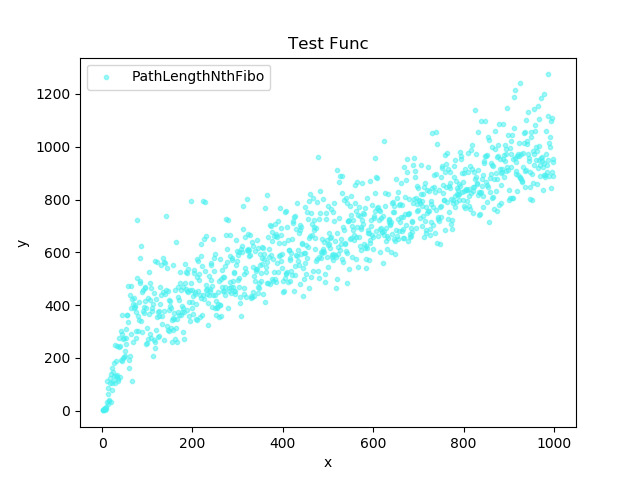

In [47]:
#Plot the Data
#PlotUtil.PlotUtil.plot({'data':[x_2,y_2],"name":"length"})
#PlotUtil.PlotUtil.plotSeries([{"name":"PathLengthNthFibo","x":x_2,"y":y_2},{"name":"collatz","x":x_3,"y":y_3}],title="Test Func")
PlotUtil.PlotUtil.plotSeries([{"name":"PathLengthNthFibo","x":x_2,"y":y_2}],title="Test Func")

## Collatz Tree (Revision)
> WARNING: this not even meant to be accedemic nor rigorous ... it might not even make sense at some points ... it is a quick jot down of a question I had ... rather a series of questions that i am trying to formulate... in essence this is my rough rough draft or even just intuition...

- I decided to interpret collatz sequences as belonging to a tree; The code below is a efficient way of building a tree. 
- Memoized Collatz functions will calculate the new subtrees to add to the main tree
- Note that n=log_k(d) where d is depth and n is number of nodes (the Split factor is k, ex. binary tree has k=2, quadtree k=4)
- What is the Average Split per each level of the tree? 
- What is the Average Split for the tree overall? 
- What is the Distribution (across the different levels) for the Splits
- How *complete* is the Tree? Given a known max depth d, and known number of nodes n what is k? compare this to knowing the average split value for k in the tree and known number of nodes n what is the computed value for d? 
- How do different Tree Properties (or constants) change as more nodes are added onto the tree for sequential collatz sequence additions?
- Example... Consider the collatz length for any given number x ∈ [1,n] what is what is ave k? median k? ave d? medain d? etc...
- Consider path lengths as a sort of inverse weight: how does the tree grow when we filter based on path length --> the larger the path length the greater priority that number n has for having it's sequence merged into the tree. How would this tree structure compare?
- There is much potential for interpreting collatz sequences as tree structures

## Tree Node  Class
- This is a class for creating a tree structure

In [9]:
#VERY basic tree class....
class TreeNode():
    def __init__(self,value):
        self.value = value
        self.children = []
    #Adds a Child to the node
    def addChild(self,otherNode):
        self.children.append(otherNode)
    #Searches Depth first for a value in a tree and if it is not found returns None
    def searchDepth(self,value):
        if self.value == value:
            return self
        else:
            loc = None
            for c in self.children:
                loc = c.searchDepth(value)
                if loc != None:
                    break
            return loc   
    #tree value structure...
    def structure(self):
        s = str({self.value:[c.structure() for c in self.children]})
        return s
    def __str__(self):
        return str(self.structure())
    def __lt__(self,other):
        return self.value < other.value
    def __gt__(self,other):
        return self.value > other.value
    def __eq__(self,other):
        return self.value == other.value
    def __le__(self,other):
        return self.value <= other.value
    def __ge__(self,other):
        return self.value >= other.value
    def preOrderTraversal(self,func):
        #preforms a preorder traversal calling the func on the node at the apprpiate time
        func(self)
        for child in self.children:
            child.preOrderTraversal(func)

## Build Tree (Revision 3)
- Builds a collatz tree:
##### Approach
- Create a Root node with value 1 (the last number in the non trrivial iteration in the colatz sequence)
- Use a dictionary to store references to each node in the tree first initilizing the dictionary with one entry: Key = 1 Value= Root Reference
- The reason for using a dictionary is this will enable fast lookup of nodes in the collatz tree. More often than not Collatz Sequences return to 1 relativly quickly. Heuristically this means that many Sequences are the same after a certian point ... I will refer to this point as the 'collision point'; The collision point for numbers p and k  is the point at which the subsequences till 1 are the same. 
- So instead of traversing & searching the tree (which is constantly growing) to get to the desired node a dictionary is used to quickly find that node ...
- The calculation uses a memoized collatz function to first compute the sequence for a value n
- Iterating over that sequence we build a subtree backwards from all the sequence values not already in the dictionary. During this iteration sequence values that are not already in the dictionary are added with the reference to the node. 
- Because there is no branching we can build the subtree backwards as we go along...
- Once the iteration hits a value already in the tree we append the already constructed subtree as a child of that tree ... here the dictionary can be used to quickly look up the reference to that node ...
##### Approach TLDR:
- On a high level I am building the tree from partial sequences that are not already in the tree using a dictionary to keep track of references to nodes in the tree and to know when to stop building the subtree. 

In [10]:
def addNSequenceToTree(found,n):
    #Where found is the dictionary of nodes and n is the number to calculate the sequence for then update the tree
    #calculate the sequence for n: inclusive of start and stop ... n-->1 [n....1]
    s = memoized_collatz_sequence(n)
    #Edge error case: the user called this func redundanly ... n is already in the tree
    if n in found:
        return
    #otherwise build the subtree: init the first 
    prev = TreeNode(n)
    found[n] = prev
    #iterate forwards building the chain
    for i in range(1,len(s)):#exclude the first... (handled by the init)
        if s[i] not in found: 
            newNode = TreeNode(s[i])
            #print(newNode)
            found[s[i]] = newNode
            newNode.addChild(prev)
            #print(prev)
            prev = newNode#change ref
        else:
            found[s[i]].addChild(prev)#append the entire subtree to the tree by linking it in found
            return#exit ...       

## Hypothesis testing
- Now that there is a working tree building code  (addNSequenceToTree)  I will begin my analysis of the tree's structure

#### Determine the Average Split across the entire Tree: ave k
- Determine the average 'split' i.e binary tree two nodes for every unless leaf... 
- Graph how the Average Split: ave k changes as sequences for increasing values of n are added to the tree

100%|█████████████████████████████████████| 5000/5000 [00:19<00:00, 256.71it/s]


<IPython.core.display.Javascript object>


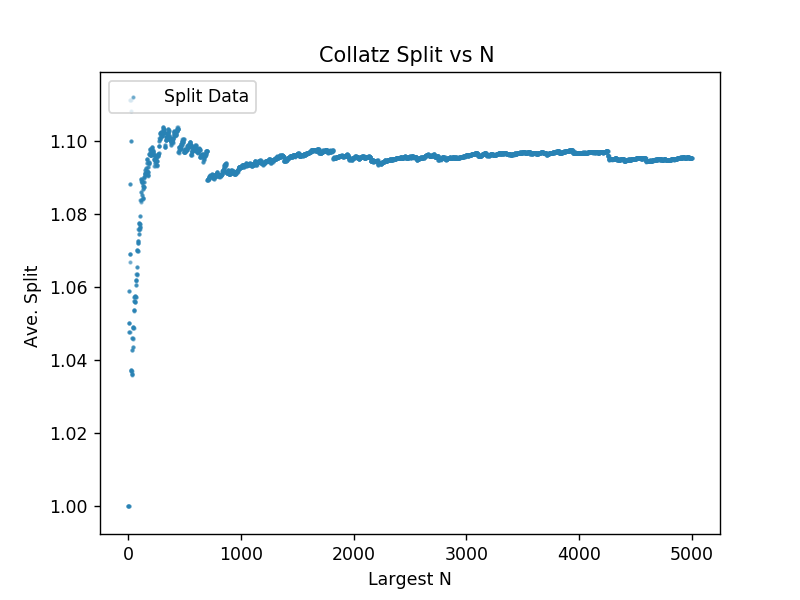

In [11]:
#Settings
MAX_N = 5000

#Function to calculate averaeg split for all nodes in the tree
def calc_ave_split(root_node):
    lengths = []
    root_node.preOrderTraversal(lambda n: lengths.append(len(n.children)) if len(n.children)!=0 else None)
    ave = sum(lengths)/len(lengths) if len(lengths)!=0 else None
    return ave

#Store the Point Data
x = []
y = []

#Init the calculation
root = TreeNode(1)
ref_cache = {root.value:root}# store Key: (value of tree item)  Value: Tree Node Reference

#Add sequences for increasing values of n are added to the tree
for n in tqdm.tqdm(range(1,MAX_N+1)):
    #Add the sequence for n to the tree 
    addNSequenceToTree(ref_cache,n)
    #Store the Input Domain number in a list
    x.append(n)
    #Calculate the Average Split: ave k 
    ave_k = calc_ave_split(root)
    #Add to the output data : handle edge cases (leaf nodes)
    y.append(ave_k if ave_k!=None else ave_k)
#Convert to Numpy Array
x = np.array(x)
y = np.array(y)

#Plot the Data
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"Split Data"},x_name="Largest N", y_name="Ave. Split ",title="Collatz Split vs N ")

#### Calculate the Average Age of Nodes in the Tree
- Nodes are considered the 'same age' if they were inserted in the same sequence
- To keep track of the age: insert a nodes for a sequence with age 'a' (if nodes were inserted) increment 'a' before the next sequence;
- After all nodes have been inserted for all sequences you have a final value for a ... call it a_final
- For any given node in the tree its true age is a_final+1-a_node .... 
- This can be done when the age is calculated ... 

In [12]:
#Modify the Add a sequence to tree to keep track of age .... returns true if the age was used (i.e a node inserted)
def addNSequenceToTree(found,n,age):
    #Where found is the dictionary of nodes and n is the number to calculate the sequence for then update the tree
    #calculate the sequence for n: inclusive of start and stop ... n-->1 [n....1]
    s = memoized_collatz_sequence(n)
    #Edge error case: the user called this func redundanly ... n is already in the tree
    if n in found:
        return False#the age was not
    #otherwise build the subtree: init the first 
    prev = TreeNode(n)
    prev.age = age
    found[n] = prev
    #iterate forwards building the chain
    for i in range(1,len(s)):#exclude the first... (handled by the init)
        if s[i] not in found: 
            newNode = TreeNode(s[i])
            newNode.age = age
            #print(newNode)
            found[s[i]] = newNode
            newNode.addChild(prev)
            #print(prev)
            prev = newNode#change ref
        else:
            found[s[i]].addChild(prev)#append the entire subtree to the tree by linking it in found
            return True#exit ...     

100%|█████████████████████████████████████| 5000/5000 [00:18<00:00, 277.31it/s]


<IPython.core.display.Javascript object>


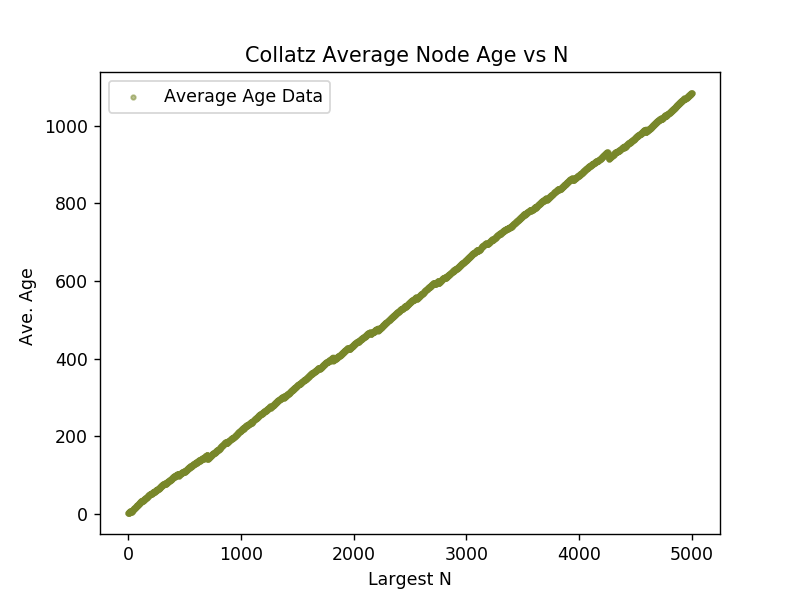

In [13]:
#Settings
MAX_N = 5000

#Function to calculate averaeg split for all nodes in the tree
def calc_ave_age(root_node,a_final):
    true_ages = []
    root_node.preOrderTraversal(lambda n: true_ages.append((a_final+1-n.age)))
    ave = sum(true_ages)/len(true_ages) if len(true_ages)!=0 else None
    return ave

#Store the Point Data
x = []
y = []

#Init the calculation
root = TreeNode(1)
root.age=0
ref_cache = {root.value:root}# store Key: (value of tree item)  Value: Tree Node Reference
#Store the age counter
age = 1
#Add sequences for increasing values of n are added to the tree
for n in tqdm.tqdm(range(1,MAX_N+1)):
    #Add the sequence for n to the tree 
    age_was_used = addNSequenceToTree(ref_cache,n,age)
    #Was that age used? 
    if(age_was_used):
        age +=1
    #Store the Input Domain number in a list
    x.append(n)
    #Calculate the Average Age 
    ave_a= calc_ave_age(root,age)
    #Add to the output data : handle edge cases (leaf nodes)
    y.append(ave_a if ave_a!=None else ave_a)
#Convert to Numpy Array
x = np.array(x)
y = np.array(y)

#Plot the Data
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"Average Age Data"},x_name="Largest N", y_name="Ave. Age ",title="Collatz Average Node Age vs N ")

## Plot 3D Collatz
- A parametric Plot of  i, Collatz_length(i), Collatz_length(N-i) for all i in [0,N]
- Just thought it looked interestng because for the 'right' value of N ... N approx 1000, There appear four adjacent tiped rectangular prisims for which if N increases they become more dense and eventually merge

100%|██████████████████████████████████| 1001/1001 [00:00<00:00, 500476.61it/s]


<IPython.core.display.Javascript object>


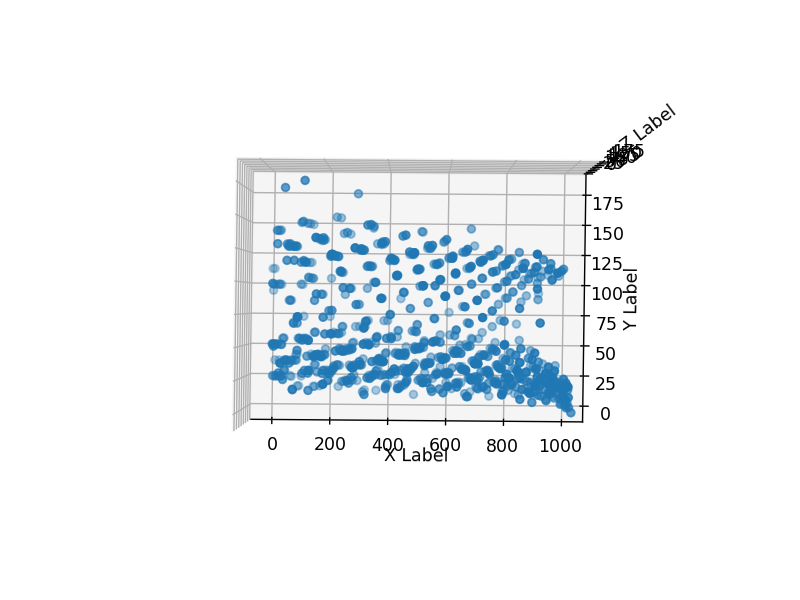

In [17]:
#Settings 
N=1000

#Caluclation 
x =[i for i in range(0,N+1)]
y =[ memoized_collatz_sequence_length(N-i) for i in tqdm.tqdm(range(0,N+1))]
z =[memoized_collatz_sequence_length(i) for i in tqdm.tqdm(range(0,N+1))]

#plot
PlotUtil.PlotUtil.plot3D(x,y,z)

In [ ]:
#